In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import roc_auc_score
from scipy import stats
import matplotlib.style as style
from matplotlib.patches import Patch
from sklearn.preprocessing import StandardScaler

In [2]:
diseases=['breast_cancer', 'colorectal_cancer', 'gastric_cancer', 'pd', 'ckd',
                                'osteoporosis', 'cad', 'hyperlipidemia', 'osteoarthritis']

In [3]:
metadata = pd.read_csv('./metadata.phenotypes.csv')
metadata

barcode  pd  breast_cancer  gastric_cancer  cad  ckd  \
0      110839298924   1              0               0    0    0   
1      902112642700   1              0               0    0    0   
2      942623487500   1              0               0    0    0   
3      056757324500   1              0               0    0    0   
4      183612967900   1              0               0    0    0   
...             ...  ..            ...             ...  ...  ...   
1603  VN_04_01_0288   0              0               0    0    0   
1604  VN_04_01_0289   0              0               0    0    0   
1605  VN_04_01_0291   0              0               0    0    0   
1606  VN_04_01_0292   0              0               0    0    0   
1607  VN_04_01_0295   0              0               0    0    0   

      hyperlipidemia  osteoporosis  osteoarthritis  ad  colorectal_cancer  
0                  0             0               0   0                  0  
1                  0             0               0   0                  0  
2                  0             0               0   0                  0  
3                  0             0               0   0                  0  
4                  0             0               0   0                  0  
...              ...           ...             ...  ..                ...  
1603               0             0               0   0                  0  
1604               0             0               0   0                  0  
1605               0             0               0   0                  0  
1606               0             0               0   0                  0  
1607               0             0               0   0                  0  

[1608 rows x 11 columns]

In [ ]:
# concat prscs score:
def concat_prscs_output(out_dir='./results/breast_cancer/',
                        out_name='prscs.', phi='1e-02'):
    res = pd.DataFrame([], columns=['CHROM', 'SNP', 'POS', 'A1', 'A2', 'pst_eff'])
    for f in os.listdir(out_dir):
        if f.startswith(out_name) and ('pst_eff' in f) and (phi in f):
            file_path = os.path.join(out_dir, f)
            temp = pd.read_table(file_path, header=None)
            temp.columns = ['CHROM', 'SNP', 'POS', 'A1', 'A2', 'pst_eff']
            res = pd.concat([res, temp], axis=0)
    return res.sort_values(by=['CHROM', 'POS'], ignore_index=True)

def prscs_score(target_prefix='./data/target_data/target.data.impute',
                out_dir='./results/breast_cancer/',
                out_name='prscs.', phi='1e-02'):
    prscs_output = concat_prscs_output(out_dir=out_dir, out_name=out_name, phi=phi)
    file_path = os.path.join(out_dir, out_name + f'phi{phi}.concat.txt')
    prscs_output.to_csv(file_path, sep='\t', index=False)
    os.system(f'plink --bfile {target_prefix} \
                        --allow-no-sex \
                        --score {file_path} 2 4 6 header sum \
                        --out {file_path[:-11]}')
    print(f'Output file saved to {file_path[:-11]}.profile \nPRS-CS done!')

## PRS-CS: Concat score files and calculate PRS scores

In [4]:
# prscs
for d in ['breast_cancer', 'colorectal_cancer', 'gastric_cancer', 'pd', 'ckd',
          'osteoporosis', 'cad', 'ad', 'hyperlipidemia', 'osteoarthritis']:
    if d == 'ad' or d == 'cad':
        continue
    for phi in ['1e+00', '1e-02', '1e-04', '1e-06']:
        prscs_score(target_prefix='/home/sangnv/Desktop/VGP_10_diseases/target_data/target.data.impute',
                            out_dir=f'/home/sangnv/Desktop/VGP_10_diseases/results/{d}/',
                            out_name='prscs.ckb', phi=phi)

PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to /home/sangnv/Desktop/VGP_10_diseases/results/breast_cancer/prscs.ckbphi1e+00.log.
Options in effect:
  --allow-no-sex
  --bfile /home/sangnv/Desktop/VGP_10_diseases/target_data/target.data.impute
  --out /home/sangnv/Desktop/VGP_10_diseases/results/breast_cancer/prscs.ckbphi1e+00
  --score /home/sangnv/Desktop/VGP_10_diseases/results/breast_cancer/prscs.ckbphi1e+00.concat.txt 2 4 6 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
/home/sangnv/Desktop/VGP_10_diseases/results/breast_cancer/prscs.ckbphi1e+00.nosex
.
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele freque

In [9]:
# prscs concat and plink --score for shaPRS + PRS-CS
for i, d in enumerate(['breast_cancer', 'colorectal_cancer', 'gastric_cancer', 'pd']):
    for phi in ['1e+00', '1e-02', '1e-04', '1e-06', 'auto']:
        prscs_score(target_prefix='/home/sangnv/Desktop/VGP_10_diseases/target_data/target.data.impute',
                    out_dir=f'/home/sangnv/Desktop/VGP_10_diseases/results/{d}/',
                    out_name=f'prscs.shaPRS.BBJ.EUR',
                    phi=phi)

PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to /home/sangnv/Desktop/VGP_10_diseases/results/breast_cancer/prscs.shaPRS.BBJ.EURphi1e+00.log.
Options in effect:
  --allow-no-sex
  --bfile /home/sangnv/Desktop/VGP_10_diseases/target_data/target.data.impute
  --out /home/sangnv/Desktop/VGP_10_diseases/results/breast_cancer/prscs.shaPRS.BBJ.EURphi1e+00
  --score /home/sangnv/Desktop/VGP_10_diseases/results/breast_cancer/prscs.shaPRS.BBJ.EURphi1e+00.concat.txt 2 4 6 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
/home/sangnv/Desktop/VGP_10_diseases/results/breast_cancer/prscs.shaPRS.BBJ.EURphi1e+00.nosex
.
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 no

## PRS-CSx: Concat score files and calculate PRS scores

In [4]:
def concat_prscsx_output(out_dir='./results/breast_cancer/',
                        out_name='prscsx.hum0197.v3',
                        phi='1e+00',
                        pop='META'):
    res = pd.DataFrame([], columns=['CHROM', 'SNP', 'POS', 'A1', 'A2', 'pst_eff'])
    for f in os.listdir(out_dir):
        if f.startswith(out_name) and ('pst_eff' in f) and (pop in f) and (phi in f):
            file_path = os.path.join(out_dir, f)
            temp = pd.read_table(file_path, header=None)
            temp.columns = ['CHROM', 'SNP', 'POS', 'A1', 'A2', 'pst_eff']
            res = pd.concat([res, temp], axis=0)
    return res.sort_values(by=['CHROM', 'POS'], ignore_index=True)

def prscsx_score(target_prefix='./target_data/target.data.impute',
                out_dir='./results/breast_cancer/',
                out_name='prscsx.hum0197.v3',
                pop='META',
                phi='1e+00'):
    prscsx_output = concat_prscsx_output(out_dir=out_dir, out_name=out_name, pop=pop, phi=phi)
    file_path = os.path.join(out_dir, out_name + pop + f'.phi{phi}.concat.txt')
    prscsx_output.to_csv(file_path, sep='\t', index=False)
    os.system(f'plink --bfile {target_prefix} \
                        --allow-no-sex \
                        --score {file_path} 2 4 6 header sum \
                        --out {file_path[:-11]}')
    print('PRS-CSx done!')

In [46]:
for pop in ['META', 'EAS', 'EUR']:
    for phi in ['1e+00', '1e-02', '1e-04', '1e-06']:
        prscsx_score(target_prefix='./target_data/target.data.impute',
                    out_dir=f'./results/{d}/',
                    out_name='prscsx.',
                    pop=pop,
                    phi=phi)

PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/pd/prscsx.META.phi1e+00.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/pd/prscsx.META.phi1e+00
  --score ./results/pd/prscsx.META.phi1e+00.concat.txt 2 4 6 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/pd/prscsx.META.phi1e+00.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364656667686970717273747576777879808182838485868788899091929394959697989 done.
Total genoty

## Get PRS-score file for LDpred2-auto, LDpred2-grid:

In [10]:
# LDpred2 run with gwas EAS
def process_PRS_LDpred2(disease='breast_cancer',
                        ldpred2_betafile='LDpred2.pst.beta.txt'):
    beta_path = f'./results/{disease}/{ldpred2_betafile}'     # change file name to here
    beta_file = pd.read_table(beta_path) 
    score_df = pd.read_table('./target_data/samples.all.txt')

    for i in range(4, beta_file.shape[1]):
        if beta_file.iloc[:, i].isna().any():
            continue
        os.system(f"plink --bfile ./target_data/target.data.impute \
                            --allow-no-sex \
                            --score {beta_path} 2 4 {i+1} header sum \
                            --out ./results/{disease}/LDpred2.{disease}.PRS")
        score_temp = pd.read_table(f'./results/{disease}/LDpred2.{disease}.PRS.profile', sep='\s+')[['IID', 'SCORESUM']]
        if i == 4:
            score_temp.columns = ['IID', 'score.auto']
        else:
            score_temp.columns = ['IID', f'score.grid.{i-4}']
        
        score_df = pd.merge(score_df, score_temp)
    output_file = f'{ldpred2_betafile[:-12]}' + 'all.PRS.profile'
    score_df.to_csv(f'./results/{disease}/{output_file}', sep='\t', index=False)

In [11]:
for d in ['breast_cancer', 'colorectal_cancer', 'gastric_cancer', 'pd', 'ckd',
          'osteoporosis', 'cad', 'hyperlipidemia', 'osteoarthritis']:
    process_PRS_LDpred2(disease=d,
                        ldpred2_betafile='LDpred2.pst.beta.txt')

PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/breast_cancer/LDpred2.breast_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/breast_cancer/LDpred2.breast_cancer.PRS
  --score ./results/breast_cancer/LDpred2.pst.beta.txt 2 4 5 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 101112131415161718192021222324252627282930313233343536373839404142434445464748495051525354555657585960616263646566676869707172737475767778798081828384

mismatch, 0 due to allele code mismatch); see
./results/breast_cancer/LDpred2.breast_cancer.PRS.nopred for details.


--score: 853203 valid predictors loaded.
--score: Results written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/breast_cancer/LDpred2.breast_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/breast_cancer/LDpred2.breast_cancer.PRS
  --score ./results/breast_cancer/LDpred2.pst.beta.txt 2 4 6 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 101112131415161718192

mismatch, 0 due to allele code mismatch); see
./results/breast_cancer/LDpred2.breast_cancer.PRS.nopred for details.


 done.
Total genotyping rate is 0.993892.
5605066 variants and 1608 people pass filters and QC.
Note: No phenotypes present.
--score: 853203 valid predictors loaded.
--score: Results written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/breast_cancer/LDpred2.breast_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/breast_cancer/LDpred2.breast_cancer.PRS
  --score ./results/breast_cancer/LDpred2.pst.beta.txt 2 4 7 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).


mismatch, 0 due to allele code mismatch); see
./results/breast_cancer/LDpred2.breast_cancer.PRS.nopred for details.


 done.
Total genotyping rate is 0.993892.
5605066 variants and 1608 people pass filters and QC.
Note: No phenotypes present.
--score: 853203 valid predictors loaded.
--score: Results written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/breast_cancer/LDpred2.breast_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/breast_cancer/LDpred2.breast_cancer.PRS
  --score ./results/breast_cancer/LDpred2.pst.beta.txt 2 4 8 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).


mismatch, 0 due to allele code mismatch); see
./results/breast_cancer/LDpred2.breast_cancer.PRS.nopred for details.


--score: 853203 valid predictors loaded.
--score: Results written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/breast_cancer/LDpred2.breast_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/breast_cancer/LDpred2.breast_cancer.PRS
  --score ./results/breast_cancer/LDpred2.pst.beta.txt 2 4 11 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819

mismatch, 0 due to allele code mismatch); see
./results/breast_cancer/LDpred2.breast_cancer.PRS.nopred for details.


 done.
Total genotyping rate is 0.993892.
5605066 variants and 1608 people pass filters and QC.
Note: No phenotypes present.
--score: 853203 valid predictors loaded.
--score: Results written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/breast_cancer/LDpred2.breast_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/breast_cancer/LDpred2.breast_cancer.PRS
  --score ./results/breast_cancer/LDpred2.pst.beta.txt 2 4 12 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).

mismatch, 0 due to allele code mismatch); see
./results/breast_cancer/LDpred2.breast_cancer.PRS.nopred for details.


 done.
Total genotyping rate is 0.993892.
5605066 variants and 1608 people pass filters and QC.
Note: No phenotypes present.
--score: 853203 valid predictors loaded.
--score: Results written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/breast_cancer/LDpred2.breast_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/breast_cancer/LDpred2.breast_cancer.PRS
  --score ./results/breast_cancer/LDpred2.pst.beta.txt 2 4 13 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).

mismatch, 0 due to allele code mismatch); see
./results/breast_cancer/LDpred2.breast_cancer.PRS.nopred for details.


 done.
Total genotyping rate is 0.993892.
5605066 variants and 1608 people pass filters and QC.
Note: No phenotypes present.
--score: 853203 valid predictors loaded.
--score: Results written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/breast_cancer/LDpred2.breast_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/breast_cancer/LDpred2.breast_cancer.PRS
  --score ./results/breast_cancer/LDpred2.pst.beta.txt 2 4 14 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).

mismatch, 0 due to allele code mismatch); see
./results/breast_cancer/LDpred2.breast_cancer.PRS.nopred for details.


--score: 853203 valid predictors loaded.
--score: Results written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/breast_cancer/LDpred2.breast_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/breast_cancer/LDpred2.breast_cancer.PRS
  --score ./results/breast_cancer/LDpred2.pst.beta.txt 2 4 15 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819

mismatch, 0 due to allele code mismatch); see
./results/breast_cancer/LDpred2.breast_cancer.PRS.nopred for details.


--score: 853203 valid predictors loaded.
--score: Results written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/breast_cancer/LDpred2.breast_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/breast_cancer/LDpred2.breast_cancer.PRS
  --score ./results/breast_cancer/LDpred2.pst.beta.txt 2 4 16 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819

mismatch, 0 due to allele code mismatch); see
./results/breast_cancer/LDpred2.breast_cancer.PRS.nopred for details.


--score: 853203 valid predictors loaded.
--score: Results written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/breast_cancer/LDpred2.breast_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/breast_cancer/LDpred2.breast_cancer.PRS
  --score ./results/breast_cancer/LDpred2.pst.beta.txt 2 4 17 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819

mismatch, 0 due to allele code mismatch); see
./results/breast_cancer/LDpred2.breast_cancer.PRS.nopred for details.


--score: 853203 valid predictors loaded.
--score: Results written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/breast_cancer/LDpred2.breast_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/breast_cancer/LDpred2.breast_cancer.PRS
  --score ./results/breast_cancer/LDpred2.pst.beta.txt 2 4 18 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819

mismatch, 0 due to allele code mismatch); see
./results/breast_cancer/LDpred2.breast_cancer.PRS.nopred for details.


--score: 853203 valid predictors loaded.
--score: Results written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/breast_cancer/LDpred2.breast_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/breast_cancer/LDpred2.breast_cancer.PRS
  --score ./results/breast_cancer/LDpred2.pst.beta.txt 2 4 19 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819

mismatch, 0 due to allele code mismatch); see
./results/breast_cancer/LDpred2.breast_cancer.PRS.nopred for details.


 done.
Total genotyping rate is 0.993892.
5605066 variants and 1608 people pass filters and QC.
Note: No phenotypes present.
--score: 853203 valid predictors loaded.
--score: Results written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/breast_cancer/LDpred2.breast_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/breast_cancer/LDpred2.breast_cancer.PRS
  --score ./results/breast_cancer/LDpred2.pst.beta.txt 2 4 20 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).

mismatch, 0 due to allele code mismatch); see
./results/breast_cancer/LDpred2.breast_cancer.PRS.nopred for details.


--score: 853203 valid predictors loaded.
--score: Results written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/breast_cancer/LDpred2.breast_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/breast_cancer/LDpred2.breast_cancer.PRS
  --score ./results/breast_cancer/LDpred2.pst.beta.txt 2 4 21 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819

mismatch, 0 due to allele code mismatch); see
./results/breast_cancer/LDpred2.breast_cancer.PRS.nopred for details.


--score: 853203 valid predictors loaded.
--score: Results written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/breast_cancer/LDpred2.breast_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/breast_cancer/LDpred2.breast_cancer.PRS
  --score ./results/breast_cancer/LDpred2.pst.beta.txt 2 4 22 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819

mismatch, 0 due to allele code mismatch); see
./results/breast_cancer/LDpred2.breast_cancer.PRS.nopred for details.


--score: 853203 valid predictors loaded.
--score: Results written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/breast_cancer/LDpred2.breast_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/breast_cancer/LDpred2.breast_cancer.PRS
  --score ./results/breast_cancer/LDpred2.pst.beta.txt 2 4 23 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819

mismatch, 0 due to allele code mismatch); see
./results/breast_cancer/LDpred2.breast_cancer.PRS.nopred for details.


--score: 853203 valid predictors loaded.
--score: Results written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/breast_cancer/LDpred2.breast_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/breast_cancer/LDpred2.breast_cancer.PRS
  --score ./results/breast_cancer/LDpred2.pst.beta.txt 2 4 27 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819

mismatch, 0 due to allele code mismatch); see
./results/breast_cancer/LDpred2.breast_cancer.PRS.nopred for details.


--score: 853203 valid predictors loaded.
--score: Results written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/breast_cancer/LDpred2.breast_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/breast_cancer/LDpred2.breast_cancer.PRS
  --score ./results/breast_cancer/LDpred2.pst.beta.txt 2 4 28 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819

mismatch, 0 due to allele code mismatch); see
./results/breast_cancer/LDpred2.breast_cancer.PRS.nopred for details.


--score: 853203 valid predictors loaded.
--score: Results written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/breast_cancer/LDpred2.breast_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/breast_cancer/LDpred2.breast_cancer.PRS
  --score ./results/breast_cancer/LDpred2.pst.beta.txt 2 4 29 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819

mismatch, 0 due to allele code mismatch); see
./results/breast_cancer/LDpred2.breast_cancer.PRS.nopred for details.


--score: 853203 valid predictors loaded.
--score: Results written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/breast_cancer/LDpred2.breast_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/breast_cancer/LDpred2.breast_cancer.PRS
  --score ./results/breast_cancer/LDpred2.pst.beta.txt 2 4 30 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819

mismatch, 0 due to allele code mismatch); see
./results/breast_cancer/LDpred2.breast_cancer.PRS.nopred for details.


--score: 853203 valid predictors loaded.
--score: Results written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/breast_cancer/LDpred2.breast_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/breast_cancer/LDpred2.breast_cancer.PRS
  --score ./results/breast_cancer/LDpred2.pst.beta.txt 2 4 31 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819

mismatch, 0 due to allele code mismatch); see
./results/breast_cancer/LDpred2.breast_cancer.PRS.nopred for details.


--score: 853203 valid predictors loaded.
--score: Results written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/breast_cancer/LDpred2.breast_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/breast_cancer/LDpred2.breast_cancer.PRS
  --score ./results/breast_cancer/LDpred2.pst.beta.txt 2 4 32 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819

mismatch, 0 due to allele code mismatch); see
./results/breast_cancer/LDpred2.breast_cancer.PRS.nopred for details.


--score: 853203 valid predictors loaded.
--score: Results written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/breast_cancer/LDpred2.breast_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/breast_cancer/LDpred2.breast_cancer.PRS
  --score ./results/breast_cancer/LDpred2.pst.beta.txt 2 4 33 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819

mismatch, 0 due to allele code mismatch); see
./results/breast_cancer/LDpred2.breast_cancer.PRS.nopred for details.


--score: 853203 valid predictors loaded.
--score: Results written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/breast_cancer/LDpred2.breast_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/breast_cancer/LDpred2.breast_cancer.PRS
  --score ./results/breast_cancer/LDpred2.pst.beta.txt 2 4 34 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819

mismatch, 0 due to allele code mismatch); see
./results/breast_cancer/LDpred2.breast_cancer.PRS.nopred for details.


--score: 853203 valid predictors loaded.
--score: Results written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/breast_cancer/LDpred2.breast_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/breast_cancer/LDpred2.breast_cancer.PRS
  --score ./results/breast_cancer/LDpred2.pst.beta.txt 2 4 35 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819

mismatch, 0 due to allele code mismatch); see
./results/breast_cancer/LDpred2.breast_cancer.PRS.nopred for details.


--score: 853203 valid predictors loaded.
--score: Results written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/breast_cancer/LDpred2.breast_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/breast_cancer/LDpred2.breast_cancer.PRS
  --score ./results/breast_cancer/LDpred2.pst.beta.txt 2 4 36 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819

mismatch, 0 due to allele code mismatch); see
./results/breast_cancer/LDpred2.breast_cancer.PRS.nopred for details.


--score: 853203 valid predictors loaded.
--score: Results written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/breast_cancer/LDpred2.breast_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/breast_cancer/LDpred2.breast_cancer.PRS
  --score ./results/breast_cancer/LDpred2.pst.beta.txt 2 4 37 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819

mismatch, 0 due to allele code mismatch); see
./results/breast_cancer/LDpred2.breast_cancer.PRS.nopred for details.


--score: 853203 valid predictors loaded.
--score: Results written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/breast_cancer/LDpred2.breast_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/breast_cancer/LDpred2.breast_cancer.PRS
  --score ./results/breast_cancer/LDpred2.pst.beta.txt 2 4 38 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819

mismatch, 0 due to allele code mismatch); see
./results/breast_cancer/LDpred2.breast_cancer.PRS.nopred for details.


--score: 853203 valid predictors loaded.
--score: Results written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/breast_cancer/LDpred2.breast_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/breast_cancer/LDpred2.breast_cancer.PRS
  --score ./results/breast_cancer/LDpred2.pst.beta.txt 2 4 43 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819

mismatch, 0 due to allele code mismatch); see
./results/breast_cancer/LDpred2.breast_cancer.PRS.nopred for details.


--score: 853203 valid predictors loaded.
--score: Results written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/breast_cancer/LDpred2.breast_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/breast_cancer/LDpred2.breast_cancer.PRS
  --score ./results/breast_cancer/LDpred2.pst.beta.txt 2 4 44 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819

mismatch, 0 due to allele code mismatch); see
./results/breast_cancer/LDpred2.breast_cancer.PRS.nopred for details.


--score: 853203 valid predictors loaded.
--score: Results written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/breast_cancer/LDpred2.breast_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/breast_cancer/LDpred2.breast_cancer.PRS
  --score ./results/breast_cancer/LDpred2.pst.beta.txt 2 4 45 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819

mismatch, 0 due to allele code mismatch); see
./results/breast_cancer/LDpred2.breast_cancer.PRS.nopred for details.


--score: 853203 valid predictors loaded.
--score: Results written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/breast_cancer/LDpred2.breast_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/breast_cancer/LDpred2.breast_cancer.PRS
  --score ./results/breast_cancer/LDpred2.pst.beta.txt 2 4 46 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819

mismatch, 0 due to allele code mismatch); see
./results/breast_cancer/LDpred2.breast_cancer.PRS.nopred for details.


--score: 853203 valid predictors loaded.
--score: Results written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/breast_cancer/LDpred2.breast_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/breast_cancer/LDpred2.breast_cancer.PRS
  --score ./results/breast_cancer/LDpred2.pst.beta.txt 2 4 47 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819

mismatch, 0 due to allele code mismatch); see
./results/breast_cancer/LDpred2.breast_cancer.PRS.nopred for details.


--score: 853203 valid predictors loaded.
--score: Results written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/breast_cancer/LDpred2.breast_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/breast_cancer/LDpred2.breast_cancer.PRS
  --score ./results/breast_cancer/LDpred2.pst.beta.txt 2 4 48 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819

mismatch, 0 due to allele code mismatch); see
./results/breast_cancer/LDpred2.breast_cancer.PRS.nopred for details.


--score: 853203 valid predictors loaded.
--score: Results written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/breast_cancer/LDpred2.breast_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/breast_cancer/LDpred2.breast_cancer.PRS
  --score ./results/breast_cancer/LDpred2.pst.beta.txt 2 4 49 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819

mismatch, 0 due to allele code mismatch); see
./results/breast_cancer/LDpred2.breast_cancer.PRS.nopred for details.


--score: 853203 valid predictors loaded.
--score: Results written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/breast_cancer/LDpred2.breast_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/breast_cancer/LDpred2.breast_cancer.PRS
  --score ./results/breast_cancer/LDpred2.pst.beta.txt 2 4 50 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819

mismatch, 0 due to allele code mismatch); see
./results/breast_cancer/LDpred2.breast_cancer.PRS.nopred for details.


--score: 853203 valid predictors loaded.
--score: Results written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/breast_cancer/LDpred2.breast_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/breast_cancer/LDpred2.breast_cancer.PRS
  --score ./results/breast_cancer/LDpred2.pst.beta.txt 2 4 51 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819

mismatch, 0 due to allele code mismatch); see
./results/breast_cancer/LDpred2.breast_cancer.PRS.nopred for details.


--score: 853203 valid predictors loaded.
--score: Results written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/breast_cancer/LDpred2.breast_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/breast_cancer/LDpred2.breast_cancer.PRS
  --score ./results/breast_cancer/LDpred2.pst.beta.txt 2 4 52 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819

mismatch, 0 due to allele code mismatch); see
./results/breast_cancer/LDpred2.breast_cancer.PRS.nopred for details.


--score: 853203 valid predictors loaded.
--score: Results written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/breast_cancer/LDpred2.breast_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/breast_cancer/LDpred2.breast_cancer.PRS
  --score ./results/breast_cancer/LDpred2.pst.beta.txt 2 4 53 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819

mismatch, 0 due to allele code mismatch); see
./results/breast_cancer/LDpred2.breast_cancer.PRS.nopred for details.


--score: 853203 valid predictors loaded.
--score: Results written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/breast_cancer/LDpred2.breast_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/breast_cancer/LDpred2.breast_cancer.PRS
  --score ./results/breast_cancer/LDpred2.pst.beta.txt 2 4 57 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819

mismatch, 0 due to allele code mismatch); see
./results/breast_cancer/LDpred2.breast_cancer.PRS.nopred for details.


--score: 853203 valid predictors loaded.
--score: Results written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/breast_cancer/LDpred2.breast_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/breast_cancer/LDpred2.breast_cancer.PRS
  --score ./results/breast_cancer/LDpred2.pst.beta.txt 2 4 58 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819

mismatch, 0 due to allele code mismatch); see
./results/breast_cancer/LDpred2.breast_cancer.PRS.nopred for details.


--score: 853203 valid predictors loaded.
--score: Results written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/breast_cancer/LDpred2.breast_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/breast_cancer/LDpred2.breast_cancer.PRS
  --score ./results/breast_cancer/LDpred2.pst.beta.txt 2 4 59 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819

mismatch, 0 due to allele code mismatch); see
./results/breast_cancer/LDpred2.breast_cancer.PRS.nopred for details.


--score: 853203 valid predictors loaded.
--score: Results written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/breast_cancer/LDpred2.breast_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/breast_cancer/LDpred2.breast_cancer.PRS
  --score ./results/breast_cancer/LDpred2.pst.beta.txt 2 4 60 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819

mismatch, 0 due to allele code mismatch); see
./results/breast_cancer/LDpred2.breast_cancer.PRS.nopred for details.


--score: 853203 valid predictors loaded.
--score: Results written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/breast_cancer/LDpred2.breast_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/breast_cancer/LDpred2.breast_cancer.PRS
  --score ./results/breast_cancer/LDpred2.pst.beta.txt 2 4 61 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819

mismatch, 0 due to allele code mismatch); see
./results/breast_cancer/LDpred2.breast_cancer.PRS.nopred for details.


--score: 853203 valid predictors loaded.
--score: Results written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/breast_cancer/LDpred2.breast_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/breast_cancer/LDpred2.breast_cancer.PRS
  --score ./results/breast_cancer/LDpred2.pst.beta.txt 2 4 62 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819

mismatch, 0 due to allele code mismatch); see
./results/breast_cancer/LDpred2.breast_cancer.PRS.nopred for details.


--score: 853203 valid predictors loaded.
--score: Results written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/breast_cancer/LDpred2.breast_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/breast_cancer/LDpred2.breast_cancer.PRS
  --score ./results/breast_cancer/LDpred2.pst.beta.txt 2 4 63 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819

mismatch, 0 due to allele code mismatch); see
./results/breast_cancer/LDpred2.breast_cancer.PRS.nopred for details.


--score: 853203 valid predictors loaded.
--score: Results written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/breast_cancer/LDpred2.breast_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/breast_cancer/LDpred2.breast_cancer.PRS
  --score ./results/breast_cancer/LDpred2.pst.beta.txt 2 4 64 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819

mismatch, 0 due to allele code mismatch); see
./results/breast_cancer/LDpred2.breast_cancer.PRS.nopred for details.


--score: 853203 valid predictors loaded.
--score: Results written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/breast_cancer/LDpred2.breast_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/breast_cancer/LDpred2.breast_cancer.PRS
  --score ./results/breast_cancer/LDpred2.pst.beta.txt 2 4 65 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819

mismatch, 0 due to allele code mismatch); see
./results/breast_cancer/LDpred2.breast_cancer.PRS.nopred for details.


--score: 853203 valid predictors loaded.
--score: Results written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/breast_cancer/LDpred2.breast_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/breast_cancer/LDpred2.breast_cancer.PRS
  --score ./results/breast_cancer/LDpred2.pst.beta.txt 2 4 66 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819

mismatch, 0 due to allele code mismatch); see
./results/breast_cancer/LDpred2.breast_cancer.PRS.nopred for details.


--score: 853203 valid predictors loaded.
--score: Results written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/breast_cancer/LDpred2.breast_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/breast_cancer/LDpred2.breast_cancer.PRS
  --score ./results/breast_cancer/LDpred2.pst.beta.txt 2 4 67 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819

mismatch, 0 due to allele code mismatch); see
./results/breast_cancer/LDpred2.breast_cancer.PRS.nopred for details.


 done.
Total genotyping rate is 0.993892.
5605066 variants and 1608 people pass filters and QC.
Note: No phenotypes present.
--score: 853203 valid predictors loaded.
--score: Results written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/breast_cancer/LDpred2.breast_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/breast_cancer/LDpred2.breast_cancer.PRS
  --score ./results/breast_cancer/LDpred2.pst.beta.txt 2 4 68 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).

mismatch, 0 due to allele code mismatch); see
./results/breast_cancer/LDpred2.breast_cancer.PRS.nopred for details.


 done.
Total genotyping rate is 0.993892.
5605066 variants and 1608 people pass filters and QC.
Note: No phenotypes present.
--score: 853203 valid predictors loaded.
--score: Results written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/breast_cancer/LDpred2.breast_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/breast_cancer/LDpred2.breast_cancer.PRS
  --score ./results/breast_cancer/LDpred2.pst.beta.txt 2 4 69 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).

mismatch, 0 due to allele code mismatch); see
./results/breast_cancer/LDpred2.breast_cancer.PRS.nopred for details.


--score: 853203 valid predictors loaded.
--score: Results written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/breast_cancer/LDpred2.breast_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/breast_cancer/LDpred2.breast_cancer.PRS
  --score ./results/breast_cancer/LDpred2.pst.beta.txt 2 4 73 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819

mismatch, 0 due to allele code mismatch); see
./results/breast_cancer/LDpred2.breast_cancer.PRS.nopred for details.


--score: 853203 valid predictors loaded.
--score: Results written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/breast_cancer/LDpred2.breast_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/breast_cancer/LDpred2.breast_cancer.PRS
  --score ./results/breast_cancer/LDpred2.pst.beta.txt 2 4 74 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819

mismatch, 0 due to allele code mismatch); see
./results/breast_cancer/LDpred2.breast_cancer.PRS.nopred for details.


--score: 853203 valid predictors loaded.
--score: Results written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/breast_cancer/LDpred2.breast_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/breast_cancer/LDpred2.breast_cancer.PRS
  --score ./results/breast_cancer/LDpred2.pst.beta.txt 2 4 75 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819

mismatch, 0 due to allele code mismatch); see
./results/breast_cancer/LDpred2.breast_cancer.PRS.nopred for details.


--score: 853203 valid predictors loaded.
--score: Results written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/breast_cancer/LDpred2.breast_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/breast_cancer/LDpred2.breast_cancer.PRS
  --score ./results/breast_cancer/LDpred2.pst.beta.txt 2 4 76 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819

mismatch, 0 due to allele code mismatch); see
./results/breast_cancer/LDpred2.breast_cancer.PRS.nopred for details.


 done.
Total genotyping rate is 0.993892.
5605066 variants and 1608 people pass filters and QC.
Note: No phenotypes present.
--score: 853203 valid predictors loaded.
--score: Results written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/breast_cancer/LDpred2.breast_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/breast_cancer/LDpred2.breast_cancer.PRS
  --score ./results/breast_cancer/LDpred2.pst.beta.txt 2 4 77 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).

mismatch, 0 due to allele code mismatch); see
./results/breast_cancer/LDpred2.breast_cancer.PRS.nopred for details.


 done.
Total genotyping rate is 0.993892.
5605066 variants and 1608 people pass filters and QC.
Note: No phenotypes present.
--score: 853203 valid predictors loaded.
--score: Results written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/breast_cancer/LDpred2.breast_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/breast_cancer/LDpred2.breast_cancer.PRS
  --score ./results/breast_cancer/LDpred2.pst.beta.txt 2 4 78 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).

Error: Line 2 of --score file has fewer tokens than expected.


PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/breast_cancer/LDpred2.breast_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/breast_cancer/LDpred2.breast_cancer.PRS
  --score ./results/breast_cancer/LDpred2.pst.beta.txt 2 4 79 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364656667686970717273747576777879808182838

Error: Line 2 of --score file has fewer tokens than expected.


 done.
Total genotyping rate is 0.993892.
5605066 variants and 1608 people pass filters and QC.
Note: No phenotypes present.
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/breast_cancer/LDpred2.breast_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/breast_cancer/LDpred2.breast_cancer.PRS
  --score ./results/breast_cancer/LDpred2.pst.beta.txt 2 4 80 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 101112131415161718192021

Error: Line 2 of --score file has fewer tokens than expected.


 done.
Total genotyping rate is 0.993892.
5605066 variants and 1608 people pass filters and QC.
Note: No phenotypes present.
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/breast_cancer/LDpred2.breast_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/breast_cancer/LDpred2.breast_cancer.PRS
  --score ./results/breast_cancer/LDpred2.pst.beta.txt 2 4 81 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 101112131415161718192021

Error: Line 2 of --score file has fewer tokens than expected.


PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/breast_cancer/LDpred2.breast_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/breast_cancer/LDpred2.breast_cancer.PRS
  --score ./results/breast_cancer/LDpred2.pst.beta.txt 2 4 82 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364656667686970717273747576777879808182838

Error: Line 2 of --score file has fewer tokens than expected.


PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/breast_cancer/LDpred2.breast_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/breast_cancer/LDpred2.breast_cancer.PRS
  --score ./results/breast_cancer/LDpred2.pst.beta.txt 2 4 83 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364656667686970717273747576777879808182838

Error: Line 2 of --score file has fewer tokens than expected.


PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/breast_cancer/LDpred2.breast_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/breast_cancer/LDpred2.breast_cancer.PRS
  --score ./results/breast_cancer/LDpred2.pst.beta.txt 2 4 85 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364656667686970717273747576777879808182838

Error: Line 2 of --score file has fewer tokens than expected.


PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/breast_cancer/LDpred2.breast_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/breast_cancer/LDpred2.breast_cancer.PRS
  --score ./results/breast_cancer/LDpred2.pst.beta.txt 2 4 88 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364656667686970717273747576777879808182838

Error: Line 2 of --score file has fewer tokens than expected.


PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/breast_cancer/LDpred2.breast_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/breast_cancer/LDpred2.breast_cancer.PRS
  --score ./results/breast_cancer/LDpred2.pst.beta.txt 2 4 89 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364656667686970717273747576777879808182838

Error: Line 2 of --score file has fewer tokens than expected.


PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/breast_cancer/LDpred2.breast_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/breast_cancer/LDpred2.breast_cancer.PRS
  --score ./results/breast_cancer/LDpred2.pst.beta.txt 2 4 90 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364656667686970717273747576777879808182838

Error: Line 2 of --score file has fewer tokens than expected.


PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/breast_cancer/LDpred2.breast_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/breast_cancer/LDpred2.breast_cancer.PRS
  --score ./results/breast_cancer/LDpred2.pst.beta.txt 2 4 91 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364656667686970717273747576777879808182838

Error: Line 2 of --score file has fewer tokens than expected.


PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/breast_cancer/LDpred2.breast_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/breast_cancer/LDpred2.breast_cancer.PRS
  --score ./results/breast_cancer/LDpred2.pst.beta.txt 2 4 92 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364656667686970717273747576777879808182838

Error: Line 2 of --score file has fewer tokens than expected.


 done.
Total genotyping rate is 0.993892.
5605066 variants and 1608 people pass filters and QC.
Note: No phenotypes present.
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/breast_cancer/LDpred2.breast_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/breast_cancer/LDpred2.breast_cancer.PRS
  --score ./results/breast_cancer/LDpred2.pst.beta.txt 2 4 93 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 101112131415161718192021

Error: Line 2 of --score file has fewer tokens than expected.


PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/breast_cancer/LDpred2.breast_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/breast_cancer/LDpred2.breast_cancer.PRS
  --score ./results/breast_cancer/LDpred2.pst.beta.txt 2 4 94 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364656667686970717273747576777879808182838

Error: Line 2 of --score file has fewer tokens than expected.


 done.
Total genotyping rate is 0.993892.
5605066 variants and 1608 people pass filters and QC.
Note: No phenotypes present.
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/breast_cancer/LDpred2.breast_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/breast_cancer/LDpred2.breast_cancer.PRS
  --score ./results/breast_cancer/LDpred2.pst.beta.txt 2 4 95 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 101112131415161718192021

Error: Line 2 of --score file has fewer tokens than expected.


PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS
  --score ./results/colorectal_cancer/LDpred2.pst.beta.txt 2 4 5 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364656667686970

mismatch, 0 due to allele code mismatch); see
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nopred for details.


--score: 850673 valid predictors loaded.
--score: Results written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS
  --score ./results/colorectal_cancer/LDpred2.pst.beta.txt 2 4 6 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele 

mismatch, 0 due to allele code mismatch); see
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nopred for details.


--score: 850673 valid predictors loaded.
--score: Results written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS
  --score ./results/colorectal_cancer/LDpred2.pst.beta.txt 2 4 7 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele 

mismatch, 0 due to allele code mismatch); see
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nopred for details.


--score: 850673 valid predictors loaded.
--score: Results written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS
  --score ./results/colorectal_cancer/LDpred2.pst.beta.txt 2 4 8 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele 

mismatch, 0 due to allele code mismatch); see
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nopred for details.


--score: 850673 valid predictors loaded.
--score: Results written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS
  --score ./results/colorectal_cancer/LDpred2.pst.beta.txt 2 4 12 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele

mismatch, 0 due to allele code mismatch); see
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nopred for details.


--score: 850673 valid predictors loaded.
--score: Results written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS
  --score ./results/colorectal_cancer/LDpred2.pst.beta.txt 2 4 13 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele

mismatch, 0 due to allele code mismatch); see
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nopred for details.


 done.
Total genotyping rate is 0.993892.
5605066 variants and 1608 people pass filters and QC.
Note: No phenotypes present.
--score: 850673 valid predictors loaded.
--score: Results written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS
  --score ./results/colorectal_cancer/LDpred2.pst.beta.txt 2 4 14 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nosex .
Using 1 thread (no 

mismatch, 0 due to allele code mismatch); see
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nopred for details.


 done.
Total genotyping rate is 0.993892.
5605066 variants and 1608 people pass filters and QC.
Note: No phenotypes present.
--score: 850673 valid predictors loaded.
--score: Results written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS
  --score ./results/colorectal_cancer/LDpred2.pst.beta.txt 2 4 15 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nosex .
Using 1 thread (no 

mismatch, 0 due to allele code mismatch); see
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nopred for details.


 done.
Total genotyping rate is 0.993892.
5605066 variants and 1608 people pass filters and QC.
Note: No phenotypes present.
--score: 850673 valid predictors loaded.
--score: Results written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS
  --score ./results/colorectal_cancer/LDpred2.pst.beta.txt 2 4 16 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nosex .
Using 1 thread (no 

mismatch, 0 due to allele code mismatch); see
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nopred for details.


--score: 850673 valid predictors loaded.
--score: Results written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS
  --score ./results/colorectal_cancer/LDpred2.pst.beta.txt 2 4 17 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele

mismatch, 0 due to allele code mismatch); see
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nopred for details.


--score: 850673 valid predictors loaded.
--score: Results written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS
  --score ./results/colorectal_cancer/LDpred2.pst.beta.txt 2 4 18 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele

mismatch, 0 due to allele code mismatch); see
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nopred for details.


--score: 850673 valid predictors loaded.
--score: Results written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS
  --score ./results/colorectal_cancer/LDpred2.pst.beta.txt 2 4 19 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele

mismatch, 0 due to allele code mismatch); see
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nopred for details.


--score: 850673 valid predictors loaded.
--score: Results written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS
  --score ./results/colorectal_cancer/LDpred2.pst.beta.txt 2 4 20 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele

mismatch, 0 due to allele code mismatch); see
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nopred for details.


--score: 850673 valid predictors loaded.
--score: Results written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS
  --score ./results/colorectal_cancer/LDpred2.pst.beta.txt 2 4 21 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele

mismatch, 0 due to allele code mismatch); see
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nopred for details.


--score: 850673 valid predictors loaded.
--score: Results written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS
  --score ./results/colorectal_cancer/LDpred2.pst.beta.txt 2 4 22 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele

mismatch, 0 due to allele code mismatch); see
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nopred for details.


--score: 850673 valid predictors loaded.
--score: Results written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS
  --score ./results/colorectal_cancer/LDpred2.pst.beta.txt 2 4 28 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele

mismatch, 0 due to allele code mismatch); see
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nopred for details.


 done.
Total genotyping rate is 0.993892.
5605066 variants and 1608 people pass filters and QC.
Note: No phenotypes present.
--score: 850673 valid predictors loaded.
--score: Results written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS
  --score ./results/colorectal_cancer/LDpred2.pst.beta.txt 2 4 29 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nosex .
Using 1 thread (no 

mismatch, 0 due to allele code mismatch); see
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nopred for details.


--score: 850673 valid predictors loaded.
--score: Results written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS
  --score ./results/colorectal_cancer/LDpred2.pst.beta.txt 2 4 30 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele

mismatch, 0 due to allele code mismatch); see
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nopred for details.


 done.
Total genotyping rate is 0.993892.
5605066 variants and 1608 people pass filters and QC.
Note: No phenotypes present.
--score: 850673 valid predictors loaded.
--score: Results written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS
  --score ./results/colorectal_cancer/LDpred2.pst.beta.txt 2 4 31 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nosex .
Using 1 thread (no 

mismatch, 0 due to allele code mismatch); see
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nopred for details.


 done.
Total genotyping rate is 0.993892.
5605066 variants and 1608 people pass filters and QC.
Note: No phenotypes present.
--score: 850673 valid predictors loaded.
--score: Results written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS
  --score ./results/colorectal_cancer/LDpred2.pst.beta.txt 2 4 32 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nosex .
Using 1 thread (no 

mismatch, 0 due to allele code mismatch); see
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nopred for details.


--score: 850673 valid predictors loaded.
--score: Results written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS
  --score ./results/colorectal_cancer/LDpred2.pst.beta.txt 2 4 33 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele

mismatch, 0 due to allele code mismatch); see
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nopred for details.


--score: 850673 valid predictors loaded.
--score: Results written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS
  --score ./results/colorectal_cancer/LDpred2.pst.beta.txt 2 4 34 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele

mismatch, 0 due to allele code mismatch); see
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nopred for details.


--score: 850673 valid predictors loaded.
--score: Results written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS
  --score ./results/colorectal_cancer/LDpred2.pst.beta.txt 2 4 35 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele

mismatch, 0 due to allele code mismatch); see
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nopred for details.


 done.
Total genotyping rate is 0.993892.
5605066 variants and 1608 people pass filters and QC.
Note: No phenotypes present.
--score: 850673 valid predictors loaded.
--score: Results written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS
  --score ./results/colorectal_cancer/LDpred2.pst.beta.txt 2 4 36 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nosex .
Using 1 thread (no 

mismatch, 0 due to allele code mismatch); see
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nopred for details.


--score: 850673 valid predictors loaded.
--score: Results written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS
  --score ./results/colorectal_cancer/LDpred2.pst.beta.txt 2 4 44 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele

mismatch, 0 due to allele code mismatch); see
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nopred for details.


--score: 850673 valid predictors loaded.
--score: Results written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS
  --score ./results/colorectal_cancer/LDpred2.pst.beta.txt 2 4 45 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele

mismatch, 0 due to allele code mismatch); see
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nopred for details.


--score: 850673 valid predictors loaded.
--score: Results written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS
  --score ./results/colorectal_cancer/LDpred2.pst.beta.txt 2 4 46 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele

mismatch, 0 due to allele code mismatch); see
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nopred for details.


--score: 850673 valid predictors loaded.
--score: Results written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS
  --score ./results/colorectal_cancer/LDpred2.pst.beta.txt 2 4 47 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele

mismatch, 0 due to allele code mismatch); see
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nopred for details.


 done.
Total genotyping rate is 0.993892.
5605066 variants and 1608 people pass filters and QC.
Note: No phenotypes present.
--score: 850673 valid predictors loaded.
--score: Results written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS
  --score ./results/colorectal_cancer/LDpred2.pst.beta.txt 2 4 48 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nosex .
Using 1 thread (no 

mismatch, 0 due to allele code mismatch); see
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nopred for details.


--score: 850673 valid predictors loaded.
--score: Results written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS
  --score ./results/colorectal_cancer/LDpred2.pst.beta.txt 2 4 49 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele

mismatch, 0 due to allele code mismatch); see
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nopred for details.


 done.
Total genotyping rate is 0.993892.
5605066 variants and 1608 people pass filters and QC.
Note: No phenotypes present.
--score: 850673 valid predictors loaded.
--score: Results written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS
  --score ./results/colorectal_cancer/LDpred2.pst.beta.txt 2 4 50 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nosex .
Using 1 thread (no 

mismatch, 0 due to allele code mismatch); see
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nopred for details.


--score: 850673 valid predictors loaded.
--score: Results written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS
  --score ./results/colorectal_cancer/LDpred2.pst.beta.txt 2 4 52 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele

mismatch, 0 due to allele code mismatch); see
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nopred for details.


--score: 850673 valid predictors loaded.
--score: Results written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS
  --score ./results/colorectal_cancer/LDpred2.pst.beta.txt 2 4 58 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele

mismatch, 0 due to allele code mismatch); see
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nopred for details.


--score: 850673 valid predictors loaded.
--score: Results written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS
  --score ./results/colorectal_cancer/LDpred2.pst.beta.txt 2 4 59 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele

mismatch, 0 due to allele code mismatch); see
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nopred for details.


 done.
Total genotyping rate is 0.993892.
5605066 variants and 1608 people pass filters and QC.
Note: No phenotypes present.
--score: 850673 valid predictors loaded.
--score: Results written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS
  --score ./results/colorectal_cancer/LDpred2.pst.beta.txt 2 4 60 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nosex .
Using 1 thread (no 

mismatch, 0 due to allele code mismatch); see
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nopred for details.


--score: 850673 valid predictors loaded.
--score: Results written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS
  --score ./results/colorectal_cancer/LDpred2.pst.beta.txt 2 4 61 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele

mismatch, 0 due to allele code mismatch); see
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nopred for details.


--score: 850673 valid predictors loaded.
--score: Results written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS
  --score ./results/colorectal_cancer/LDpred2.pst.beta.txt 2 4 62 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele

mismatch, 0 due to allele code mismatch); see
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nopred for details.


 done.
Total genotyping rate is 0.993892.
5605066 variants and 1608 people pass filters and QC.
Note: No phenotypes present.
--score: 850673 valid predictors loaded.
--score: Results written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS
  --score ./results/colorectal_cancer/LDpred2.pst.beta.txt 2 4 63 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nosex .
Using 1 thread (no 

mismatch, 0 due to allele code mismatch); see
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nopred for details.


--score: 850673 valid predictors loaded.
--score: Results written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS
  --score ./results/colorectal_cancer/LDpred2.pst.beta.txt 2 4 64 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele

Error: Line 2 of --score file has fewer tokens than expected.


PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS
  --score ./results/colorectal_cancer/LDpred2.pst.beta.txt 2 4 65 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617181920212223242526272829303132333435363738394041424344454647484950515253545556575859606162636465666768697

Error: Line 2 of --score file has fewer tokens than expected.


PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS
  --score ./results/colorectal_cancer/LDpred2.pst.beta.txt 2 4 66 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617181920212223242526272829303132333435363738394041424344454647484950515253545556575859606162636465666768697

Error: Line 2 of --score file has fewer tokens than expected.


PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS
  --score ./results/colorectal_cancer/LDpred2.pst.beta.txt 2 4 67 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617181920212223242526272829303132333435363738394041424344454647484950515253545556575859606162636465666768697

Error: Line 2 of --score file has fewer tokens than expected.


 done.
Total genotyping rate is 0.993892.
5605066 variants and 1608 people pass filters and QC.
Note: No phenotypes present.
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS
  --score ./results/colorectal_cancer/LDpred2.pst.beta.txt 2 4 73 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies

Error: Line 2 of --score file has fewer tokens than expected.


PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS
  --score ./results/colorectal_cancer/LDpred2.pst.beta.txt 2 4 74 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617181920212223242526272829303132333435363738394041424344454647484950515253545556575859606162636465666768697

Error: Line 2 of --score file has fewer tokens than expected.


PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS
  --score ./results/colorectal_cancer/LDpred2.pst.beta.txt 2 4 75 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617181920212223242526272829303132333435363738394041424344454647484950515253545556575859606162636465666768697

Error: Line 2 of --score file has fewer tokens than expected.


PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS
  --score ./results/colorectal_cancer/LDpred2.pst.beta.txt 2 4 76 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617181920212223242526272829303132333435363738394041424344454647484950515253545556575859606162636465666768697

Error: Line 2 of --score file has fewer tokens than expected.


PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS
  --score ./results/colorectal_cancer/LDpred2.pst.beta.txt 2 4 77 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617181920212223242526272829303132333435363738394041424344454647484950515253545556575859606162636465666768697

Error: Line 2 of --score file has fewer tokens than expected.


PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS
  --score ./results/colorectal_cancer/LDpred2.pst.beta.txt 2 4 78 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617181920212223242526272829303132333435363738394041424344454647484950515253545556575859606162636465666768697

Error: Line 2 of --score file has fewer tokens than expected.


PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS
  --score ./results/colorectal_cancer/LDpred2.pst.beta.txt 2 4 79 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617181920212223242526272829303132333435363738394041424344454647484950515253545556575859606162636465666768697

Error: Line 2 of --score file has fewer tokens than expected.


PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS
  --score ./results/colorectal_cancer/LDpred2.pst.beta.txt 2 4 80 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617181920212223242526272829303132333435363738394041424344454647484950515253545556575859606162636465666768697

Error: Line 2 of --score file has fewer tokens than expected.


PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS
  --score ./results/colorectal_cancer/LDpred2.pst.beta.txt 2 4 81 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617181920212223242526272829303132333435363738394041424344454647484950515253545556575859606162636465666768697

Error: Line 2 of --score file has fewer tokens than expected.


PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS
  --score ./results/colorectal_cancer/LDpred2.pst.beta.txt 2 4 83 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617181920212223242526272829303132333435363738394041424344454647484950515253545556575859606162636465666768697

Error: Line 2 of --score file has fewer tokens than expected.


PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS
  --score ./results/colorectal_cancer/LDpred2.pst.beta.txt 2 4 89 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617181920212223242526272829303132333435363738394041424344454647484950515253545556575859606162636465666768697

Error: Line 2 of --score file has fewer tokens than expected.


 done.
Total genotyping rate is 0.993892.
5605066 variants and 1608 people pass filters and QC.
Note: No phenotypes present.
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS
  --score ./results/colorectal_cancer/LDpred2.pst.beta.txt 2 4 90 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies

Error: Line 2 of --score file has fewer tokens than expected.


 done.
Total genotyping rate is 0.993892.
5605066 variants and 1608 people pass filters and QC.
Note: No phenotypes present.
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS
  --score ./results/colorectal_cancer/LDpred2.pst.beta.txt 2 4 91 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies

Error: Line 2 of --score file has fewer tokens than expected.


PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS
  --score ./results/colorectal_cancer/LDpred2.pst.beta.txt 2 4 92 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617181920212223242526272829303132333435363738394041424344454647484950515253545556575859606162636465666768697

Error: Line 2 of --score file has fewer tokens than expected.


PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS
  --score ./results/colorectal_cancer/LDpred2.pst.beta.txt 2 4 93 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617181920212223242526272829303132333435363738394041424344454647484950515253545556575859606162636465666768697

Error: Line 2 of --score file has fewer tokens than expected.


PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS
  --score ./results/colorectal_cancer/LDpred2.pst.beta.txt 2 4 94 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617181920212223242526272829303132333435363738394041424344454647484950515253545556575859606162636465666768697

Error: Line 2 of --score file has fewer tokens than expected.


PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS
  --score ./results/colorectal_cancer/LDpred2.pst.beta.txt 2 4 95 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617181920212223242526272829303132333435363738394041424344454647484950515253545556575859606162636465666768697

Error: Line 2 of --score file has fewer tokens than expected.


PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/gastric_cancer/LDpred2.gastric_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/gastric_cancer/LDpred2.gastric_cancer.PRS
  --score ./results/gastric_cancer/LDpred2.pst.beta.txt 2 4 5 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364656667686970717273747576777879808

mismatch, 0 due to allele code mismatch); see
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.nopred for details.


--score: 850675 valid predictors loaded.
--score: Results written to
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/gastric_cancer/LDpred2.gastric_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/gastric_cancer/LDpred2.gastric_cancer.PRS
  --score ./results/gastric_cancer/LDpred2.pst.beta.txt 2 4 14 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141

mismatch, 0 due to allele code mismatch); see
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.nopred for details.


--score: 850675 valid predictors loaded.
--score: Results written to
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/gastric_cancer/LDpred2.gastric_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/gastric_cancer/LDpred2.gastric_cancer.PRS
  --score ./results/gastric_cancer/LDpred2.pst.beta.txt 2 4 15 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141

mismatch, 0 due to allele code mismatch); see
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.nopred for details.


--score: 850675 valid predictors loaded.
--score: Results written to
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/gastric_cancer/LDpred2.gastric_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/gastric_cancer/LDpred2.gastric_cancer.PRS
  --score ./results/gastric_cancer/LDpred2.pst.beta.txt 2 4 16 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141

mismatch, 0 due to allele code mismatch); see
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.nopred for details.


--score: 850675 valid predictors loaded.
--score: Results written to
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/gastric_cancer/LDpred2.gastric_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/gastric_cancer/LDpred2.gastric_cancer.PRS
  --score ./results/gastric_cancer/LDpred2.pst.beta.txt 2 4 17 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141

mismatch, 0 due to allele code mismatch); see
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.nopred for details.


--score: 850675 valid predictors loaded.
--score: Results written to
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/gastric_cancer/LDpred2.gastric_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/gastric_cancer/LDpred2.gastric_cancer.PRS
  --score ./results/gastric_cancer/LDpred2.pst.beta.txt 2 4 18 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141

mismatch, 0 due to allele code mismatch); see
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.nopred for details.


--score: 850675 valid predictors loaded.
--score: Results written to
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/gastric_cancer/LDpred2.gastric_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/gastric_cancer/LDpred2.gastric_cancer.PRS
  --score ./results/gastric_cancer/LDpred2.pst.beta.txt 2 4 19 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141

mismatch, 0 due to allele code mismatch); see
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.nopred for details.


--score: 850675 valid predictors loaded.
--score: Results written to
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/gastric_cancer/LDpred2.gastric_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/gastric_cancer/LDpred2.gastric_cancer.PRS
  --score ./results/gastric_cancer/LDpred2.pst.beta.txt 2 4 20 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141

mismatch, 0 due to allele code mismatch); see
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.nopred for details.


--score: 850675 valid predictors loaded.
--score: Results written to
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/gastric_cancer/LDpred2.gastric_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/gastric_cancer/LDpred2.gastric_cancer.PRS
  --score ./results/gastric_cancer/LDpred2.pst.beta.txt 2 4 29 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141

mismatch, 0 due to allele code mismatch); see
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.nopred for details.


--score: 850675 valid predictors loaded.
--score: Results written to
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/gastric_cancer/LDpred2.gastric_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/gastric_cancer/LDpred2.gastric_cancer.PRS
  --score ./results/gastric_cancer/LDpred2.pst.beta.txt 2 4 30 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141

mismatch, 0 due to allele code mismatch); see
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.nopred for details.


--score: 850675 valid predictors loaded.
--score: Results written to
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/gastric_cancer/LDpred2.gastric_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/gastric_cancer/LDpred2.gastric_cancer.PRS
  --score ./results/gastric_cancer/LDpred2.pst.beta.txt 2 4 31 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141

mismatch, 0 due to allele code mismatch); see
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.nopred for details.


--score: 850675 valid predictors loaded.
--score: Results written to
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/gastric_cancer/LDpred2.gastric_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/gastric_cancer/LDpred2.gastric_cancer.PRS
  --score ./results/gastric_cancer/LDpred2.pst.beta.txt 2 4 32 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141

mismatch, 0 due to allele code mismatch); see
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.nopred for details.


--score: 850675 valid predictors loaded.
--score: Results written to
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/gastric_cancer/LDpred2.gastric_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/gastric_cancer/LDpred2.gastric_cancer.PRS
  --score ./results/gastric_cancer/LDpred2.pst.beta.txt 2 4 33 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141

mismatch, 0 due to allele code mismatch); see
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.nopred for details.


--score: 850675 valid predictors loaded.
--score: Results written to
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/gastric_cancer/LDpred2.gastric_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/gastric_cancer/LDpred2.gastric_cancer.PRS
  --score ./results/gastric_cancer/LDpred2.pst.beta.txt 2 4 34 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141

mismatch, 0 due to allele code mismatch); see
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.nopred for details.


--score: 850675 valid predictors loaded.
--score: Results written to
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/gastric_cancer/LDpred2.gastric_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/gastric_cancer/LDpred2.gastric_cancer.PRS
  --score ./results/gastric_cancer/LDpred2.pst.beta.txt 2 4 35 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141

mismatch, 0 due to allele code mismatch); see
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.nopred for details.


--score: 850675 valid predictors loaded.
--score: Results written to
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/gastric_cancer/LDpred2.gastric_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/gastric_cancer/LDpred2.gastric_cancer.PRS
  --score ./results/gastric_cancer/LDpred2.pst.beta.txt 2 4 45 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141

mismatch, 0 due to allele code mismatch); see
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.nopred for details.


--score: 850675 valid predictors loaded.
--score: Results written to
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/gastric_cancer/LDpred2.gastric_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/gastric_cancer/LDpred2.gastric_cancer.PRS
  --score ./results/gastric_cancer/LDpred2.pst.beta.txt 2 4 46 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141

Error: Line 2 of --score file has fewer tokens than expected.


PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/gastric_cancer/LDpred2.gastric_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/gastric_cancer/LDpred2.gastric_cancer.PRS
  --score ./results/gastric_cancer/LDpred2.pst.beta.txt 2 4 47 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617181920212223242526272829303132333435363738394041424344454647484950515253545556575859606162636465666768697071727374757677787980

Error: Line 2 of --score file has fewer tokens than expected.


PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/gastric_cancer/LDpred2.gastric_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/gastric_cancer/LDpred2.gastric_cancer.PRS
  --score ./results/gastric_cancer/LDpred2.pst.beta.txt 2 4 48 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617181920212223242526272829303132333435363738394041424344454647484950515253545556575859606162636465666768697071727374757677787980

Error: Line 2 of --score file has fewer tokens than expected.


PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/gastric_cancer/LDpred2.gastric_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/gastric_cancer/LDpred2.gastric_cancer.PRS
  --score ./results/gastric_cancer/LDpred2.pst.beta.txt 2 4 49 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617181920212223242526272829303132333435363738394041424344454647484950515253545556575859606162636465666768697071727374757677787980

Error: Line 2 of --score file has fewer tokens than expected.


PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/gastric_cancer/LDpred2.gastric_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/gastric_cancer/LDpred2.gastric_cancer.PRS
  --score ./results/gastric_cancer/LDpred2.pst.beta.txt 2 4 50 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617181920212223242526272829303132333435363738394041424344454647484950515253545556575859606162636465666768697071727374757677787980

Error: Line 2 of --score file has fewer tokens than expected.


 done.
Total genotyping rate is 0.993892.
5605066 variants and 1608 people pass filters and QC.
Note: No phenotypes present.
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/gastric_cancer/LDpred2.gastric_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/gastric_cancer/LDpred2.gastric_cancer.PRS
  --score ./results/gastric_cancer/LDpred2.pst.beta.txt 2 4 59 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171

Error: Line 2 of --score file has fewer tokens than expected.


PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/gastric_cancer/LDpred2.gastric_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/gastric_cancer/LDpred2.gastric_cancer.PRS
  --score ./results/gastric_cancer/LDpred2.pst.beta.txt 2 4 60 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617181920212223242526272829303132333435363738394041424344454647484950515253545556575859606162636465666768697071727374757677787980

Error: Line 2 of --score file has fewer tokens than expected.


 done.
Total genotyping rate is 0.993892.
5605066 variants and 1608 people pass filters and QC.
Note: No phenotypes present.
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/gastric_cancer/LDpred2.gastric_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/gastric_cancer/LDpred2.gastric_cancer.PRS
  --score ./results/gastric_cancer/LDpred2.pst.beta.txt 2 4 61 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171

Error: Line 2 of --score file has fewer tokens than expected.


PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/gastric_cancer/LDpred2.gastric_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/gastric_cancer/LDpred2.gastric_cancer.PRS
  --score ./results/gastric_cancer/LDpred2.pst.beta.txt 2 4 62 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617181920212223242526272829303132333435363738394041424344454647484950515253545556575859606162636465666768697071727374757677787980

Error: Line 2 of --score file has fewer tokens than expected.


PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/gastric_cancer/LDpred2.gastric_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/gastric_cancer/LDpred2.gastric_cancer.PRS
  --score ./results/gastric_cancer/LDpred2.pst.beta.txt 2 4 63 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617181920212223242526272829303132333435363738394041424344454647484950515253545556575859606162636465666768697071727374757677787980

Error: Line 2 of --score file has fewer tokens than expected.


PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/gastric_cancer/LDpred2.gastric_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/gastric_cancer/LDpred2.gastric_cancer.PRS
  --score ./results/gastric_cancer/LDpred2.pst.beta.txt 2 4 64 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617181920212223242526272829303132333435363738394041424344454647484950515253545556575859606162636465666768697071727374757677787980

Error: Line 2 of --score file has fewer tokens than expected.


PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/gastric_cancer/LDpred2.gastric_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/gastric_cancer/LDpred2.gastric_cancer.PRS
  --score ./results/gastric_cancer/LDpred2.pst.beta.txt 2 4 65 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617181920212223242526272829303132333435363738394041424344454647484950515253545556575859606162636465666768697071727374757677787980

Error: Line 2 of --score file has fewer tokens than expected.


PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/gastric_cancer/LDpred2.gastric_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/gastric_cancer/LDpred2.gastric_cancer.PRS
  --score ./results/gastric_cancer/LDpred2.pst.beta.txt 2 4 74 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617181920212223242526272829303132333435363738394041424344454647484950515253545556575859606162636465666768697071727374757677787980

Error: Line 2 of --score file has fewer tokens than expected.


PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/gastric_cancer/LDpred2.gastric_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/gastric_cancer/LDpred2.gastric_cancer.PRS
  --score ./results/gastric_cancer/LDpred2.pst.beta.txt 2 4 75 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617181920212223242526272829303132333435363738394041424344454647484950515253545556575859606162636465666768697071727374757677787980

Error: Line 2 of --score file has fewer tokens than expected.


PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/gastric_cancer/LDpred2.gastric_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/gastric_cancer/LDpred2.gastric_cancer.PRS
  --score ./results/gastric_cancer/LDpred2.pst.beta.txt 2 4 76 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617181920212223242526272829303132333435363738394041424344454647484950515253545556575859606162636465666768697071727374757677787980

Error: Line 2 of --score file has fewer tokens than expected.


PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/gastric_cancer/LDpred2.gastric_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/gastric_cancer/LDpred2.gastric_cancer.PRS
  --score ./results/gastric_cancer/LDpred2.pst.beta.txt 2 4 77 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617181920212223242526272829303132333435363738394041424344454647484950515253545556575859606162636465666768697071727374757677787980

Error: Line 2 of --score file has fewer tokens than expected.


PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/gastric_cancer/LDpred2.gastric_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/gastric_cancer/LDpred2.gastric_cancer.PRS
  --score ./results/gastric_cancer/LDpred2.pst.beta.txt 2 4 78 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617181920212223242526272829303132333435363738394041424344454647484950515253545556575859606162636465666768697071727374757677787980

Error: Line 2 of --score file has fewer tokens than expected.


PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/gastric_cancer/LDpred2.gastric_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/gastric_cancer/LDpred2.gastric_cancer.PRS
  --score ./results/gastric_cancer/LDpred2.pst.beta.txt 2 4 79 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617181920212223242526272829303132333435363738394041424344454647484950515253545556575859606162636465666768697071727374757677787980

Error: Line 2 of --score file has fewer tokens than expected.


PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/gastric_cancer/LDpred2.gastric_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/gastric_cancer/LDpred2.gastric_cancer.PRS
  --score ./results/gastric_cancer/LDpred2.pst.beta.txt 2 4 80 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617181920212223242526272829303132333435363738394041424344454647484950515253545556575859606162636465666768697071727374757677787980

Error: Line 2 of --score file has fewer tokens than expected.


PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/gastric_cancer/LDpred2.gastric_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/gastric_cancer/LDpred2.gastric_cancer.PRS
  --score ./results/gastric_cancer/LDpred2.pst.beta.txt 2 4 90 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617181920212223242526272829303132333435363738394041424344454647484950515253545556575859606162636465666768697071727374757677787980

Error: Line 2 of --score file has fewer tokens than expected.


PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/gastric_cancer/LDpred2.gastric_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/gastric_cancer/LDpred2.gastric_cancer.PRS
  --score ./results/gastric_cancer/LDpred2.pst.beta.txt 2 4 91 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617181920212223242526272829303132333435363738394041424344454647484950515253545556575859606162636465666768697071727374757677787980

Error: Line 2 of --score file has fewer tokens than expected.


PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/gastric_cancer/LDpred2.gastric_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/gastric_cancer/LDpred2.gastric_cancer.PRS
  --score ./results/gastric_cancer/LDpred2.pst.beta.txt 2 4 92 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617181920212223242526272829303132333435363738394041424344454647484950515253545556575859606162636465666768697071727374757677787980

Error: Line 2 of --score file has fewer tokens than expected.


PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/gastric_cancer/LDpred2.gastric_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/gastric_cancer/LDpred2.gastric_cancer.PRS
  --score ./results/gastric_cancer/LDpred2.pst.beta.txt 2 4 93 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617181920212223242526272829303132333435363738394041424344454647484950515253545556575859606162636465666768697071727374757677787980

Error: Line 2 of --score file has fewer tokens than expected.


PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/gastric_cancer/LDpred2.gastric_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/gastric_cancer/LDpred2.gastric_cancer.PRS
  --score ./results/gastric_cancer/LDpred2.pst.beta.txt 2 4 94 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617181920212223242526272829303132333435363738394041424344454647484950515253545556575859606162636465666768697071727374757677787980

Error: Line 2 of --score file has fewer tokens than expected.


PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/gastric_cancer/LDpred2.gastric_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/gastric_cancer/LDpred2.gastric_cancer.PRS
  --score ./results/gastric_cancer/LDpred2.pst.beta.txt 2 4 95 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617181920212223242526272829303132333435363738394041424344454647484950515253545556575859606162636465666768697071727374757677787980

Error: Line 2 of --score file has fewer tokens than expected.


PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/pd/LDpred2.pd.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/pd/LDpred2.pd.PRS
  --score ./results/pd/LDpred2.pst.beta.txt 2 4 5 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/pd/LDpred2.pd.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364656667686970717273747576777879808182838485868788899091929394959697989 done.
Total genotyping rate is 0.993892.
560506

0 due to allele code mismatch); see ./results/pd/LDpred2.pd.PRS.nopred for
details.


--score: 107171 valid predictors loaded.
--score: Results written to ./results/pd/LDpred2.pd.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/pd/LDpred2.pd.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/pd/LDpred2.pd.PRS
  --score ./results/pd/LDpred2.pst.beta.txt 2 4 6 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/pd/LDpred2.pd.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 101112131415161718192021222324252627282930313233343536373839404142434445464748495051525354555657585960616263646566676869

0 due to allele code mismatch); see ./results/pd/LDpred2.pd.PRS.nopred for
details.


--score: 107171 valid predictors loaded.
--score: Results written to ./results/pd/LDpred2.pd.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/pd/LDpred2.pd.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/pd/LDpred2.pd.PRS
  --score ./results/pd/LDpred2.pst.beta.txt 2 4 7 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/pd/LDpred2.pd.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 101112131415161718192021222324252627282930313233343536373839404142434445464748495051525354555657585960616263646566676869

0 due to allele code mismatch); see ./results/pd/LDpred2.pd.PRS.nopred for
details.


--score: 107171 valid predictors loaded.
--score: Results written to ./results/pd/LDpred2.pd.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/pd/LDpred2.pd.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/pd/LDpred2.pd.PRS
  --score ./results/pd/LDpred2.pst.beta.txt 2 4 8 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/pd/LDpred2.pd.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 101112131415161718192021222324252627282930313233343536373839404142434445464748495051525354555657585960616263646566676869

0 due to allele code mismatch); see ./results/pd/LDpred2.pd.PRS.nopred for
details.


--score: 107171 valid predictors loaded.
--score: Results written to ./results/pd/LDpred2.pd.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/pd/LDpred2.pd.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/pd/LDpred2.pd.PRS
  --score ./results/pd/LDpred2.pst.beta.txt 2 4 14 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/pd/LDpred2.pd.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364656667686

0 due to allele code mismatch); see ./results/pd/LDpred2.pd.PRS.nopred for
details.


 done.
Total genotyping rate is 0.993892.
5605066 variants and 1608 people pass filters and QC.
Note: No phenotypes present.
--score: 107171 valid predictors loaded.
--score: Results written to ./results/pd/LDpred2.pd.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/pd/LDpred2.pd.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/pd/LDpred2.pd.PRS
  --score ./results/pd/LDpred2.pst.beta.txt 2 4 15 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/pd/LDpred2.pd.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequenci

0 due to allele code mismatch); see ./results/pd/LDpred2.pd.PRS.nopred for
details.


--score: 107171 valid predictors loaded.
--score: Results written to ./results/pd/LDpred2.pd.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/pd/LDpred2.pd.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/pd/LDpred2.pd.PRS
  --score ./results/pd/LDpred2.pst.beta.txt 2 4 16 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/pd/LDpred2.pd.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364656667686

0 due to allele code mismatch); see ./results/pd/LDpred2.pd.PRS.nopred for
details.


 done.
Total genotyping rate is 0.993892.
5605066 variants and 1608 people pass filters and QC.
Note: No phenotypes present.
--score: 107171 valid predictors loaded.
--score: Results written to ./results/pd/LDpred2.pd.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/pd/LDpred2.pd.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/pd/LDpred2.pd.PRS
  --score ./results/pd/LDpred2.pst.beta.txt 2 4 17 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/pd/LDpred2.pd.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequenci

0 due to allele code mismatch); see ./results/pd/LDpred2.pd.PRS.nopred for
details.


 done.
Total genotyping rate is 0.993892.
5605066 variants and 1608 people pass filters and QC.
Note: No phenotypes present.
--score: 107171 valid predictors loaded.
--score: Results written to ./results/pd/LDpred2.pd.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/pd/LDpred2.pd.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/pd/LDpred2.pd.PRS
  --score ./results/pd/LDpred2.pst.beta.txt 2 4 18 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/pd/LDpred2.pd.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequenci

0 due to allele code mismatch); see ./results/pd/LDpred2.pd.PRS.nopred for
details.


 done.
Total genotyping rate is 0.993892.
5605066 variants and 1608 people pass filters and QC.
Note: No phenotypes present.
--score: 107171 valid predictors loaded.
--score: Results written to ./results/pd/LDpred2.pd.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/pd/LDpred2.pd.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/pd/LDpred2.pd.PRS
  --score ./results/pd/LDpred2.pst.beta.txt 2 4 19 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/pd/LDpred2.pd.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequenci

0 due to allele code mismatch); see ./results/pd/LDpred2.pd.PRS.nopred for
details.


--score: 107171 valid predictors loaded.
--score: Results written to ./results/pd/LDpred2.pd.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/pd/LDpred2.pd.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/pd/LDpred2.pd.PRS
  --score ./results/pd/LDpred2.pst.beta.txt 2 4 20 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/pd/LDpred2.pd.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364656667686

0 due to allele code mismatch); see ./results/pd/LDpred2.pd.PRS.nopred for
details.


--score: 107171 valid predictors loaded.
--score: Results written to ./results/pd/LDpred2.pd.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/pd/LDpred2.pd.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/pd/LDpred2.pd.PRS
  --score ./results/pd/LDpred2.pst.beta.txt 2 4 21 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/pd/LDpred2.pd.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364656667686

0 due to allele code mismatch); see ./results/pd/LDpred2.pd.PRS.nopred for
details.


--score: 107171 valid predictors loaded.
--score: Results written to ./results/pd/LDpred2.pd.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/pd/LDpred2.pd.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/pd/LDpred2.pd.PRS
  --score ./results/pd/LDpred2.pst.beta.txt 2 4 22 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/pd/LDpred2.pd.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364656667686

0 due to allele code mismatch); see ./results/pd/LDpred2.pd.PRS.nopred for
details.


 done.
Total genotyping rate is 0.993892.
5605066 variants and 1608 people pass filters and QC.
Note: No phenotypes present.
--score: 107171 valid predictors loaded.
--score: Results written to ./results/pd/LDpred2.pd.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/pd/LDpred2.pd.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/pd/LDpred2.pd.PRS
  --score ./results/pd/LDpred2.pst.beta.txt 2 4 23 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/pd/LDpred2.pd.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequenci

0 due to allele code mismatch); see ./results/pd/LDpred2.pd.PRS.nopred for
details.


--score: 107171 valid predictors loaded.
--score: Results written to ./results/pd/LDpred2.pd.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/pd/LDpred2.pd.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/pd/LDpred2.pd.PRS
  --score ./results/pd/LDpred2.pst.beta.txt 2 4 30 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/pd/LDpred2.pd.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364656667686

0 due to allele code mismatch); see ./results/pd/LDpred2.pd.PRS.nopred for
details.


 done.
Total genotyping rate is 0.993892.
5605066 variants and 1608 people pass filters and QC.
Note: No phenotypes present.
--score: 107171 valid predictors loaded.
--score: Results written to ./results/pd/LDpred2.pd.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/pd/LDpred2.pd.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/pd/LDpred2.pd.PRS
  --score ./results/pd/LDpred2.pst.beta.txt 2 4 31 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/pd/LDpred2.pd.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequenci

0 due to allele code mismatch); see ./results/pd/LDpred2.pd.PRS.nopred for
details.


--score: 107171 valid predictors loaded.
--score: Results written to ./results/pd/LDpred2.pd.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/pd/LDpred2.pd.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/pd/LDpred2.pd.PRS
  --score ./results/pd/LDpred2.pst.beta.txt 2 4 32 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/pd/LDpred2.pd.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364656667686

0 due to allele code mismatch); see ./results/pd/LDpred2.pd.PRS.nopred for
details.


 done.
Total genotyping rate is 0.993892.
5605066 variants and 1608 people pass filters and QC.
Note: No phenotypes present.
--score: 107171 valid predictors loaded.
--score: Results written to ./results/pd/LDpred2.pd.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/pd/LDpred2.pd.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/pd/LDpred2.pd.PRS
  --score ./results/pd/LDpred2.pst.beta.txt 2 4 33 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/pd/LDpred2.pd.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequenci

0 due to allele code mismatch); see ./results/pd/LDpred2.pd.PRS.nopred for
details.


--score: 107171 valid predictors loaded.
--score: Results written to ./results/pd/LDpred2.pd.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/pd/LDpred2.pd.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/pd/LDpred2.pd.PRS
  --score ./results/pd/LDpred2.pst.beta.txt 2 4 34 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/pd/LDpred2.pd.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364656667686

0 due to allele code mismatch); see ./results/pd/LDpred2.pd.PRS.nopred for
details.


--score: 107171 valid predictors loaded.
--score: Results written to ./results/pd/LDpred2.pd.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/pd/LDpred2.pd.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/pd/LDpred2.pd.PRS
  --score ./results/pd/LDpred2.pst.beta.txt 2 4 35 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/pd/LDpred2.pd.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364656667686

0 due to allele code mismatch); see ./results/pd/LDpred2.pd.PRS.nopred for
details.


--score: 107171 valid predictors loaded.
--score: Results written to ./results/pd/LDpred2.pd.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/pd/LDpred2.pd.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/pd/LDpred2.pd.PRS
  --score ./results/pd/LDpred2.pst.beta.txt 2 4 36 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/pd/LDpred2.pd.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364656667686

0 due to allele code mismatch); see ./results/pd/LDpred2.pd.PRS.nopred for
details.


--score: 107171 valid predictors loaded.
--score: Results written to ./results/pd/LDpred2.pd.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/pd/LDpred2.pd.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/pd/LDpred2.pd.PRS
  --score ./results/pd/LDpred2.pst.beta.txt 2 4 37 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/pd/LDpred2.pd.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364656667686

0 due to allele code mismatch); see ./results/pd/LDpred2.pd.PRS.nopred for
details.


 done.
Total genotyping rate is 0.993892.
5605066 variants and 1608 people pass filters and QC.
Note: No phenotypes present.
--score: 107171 valid predictors loaded.
--score: Results written to ./results/pd/LDpred2.pd.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/pd/LDpred2.pd.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/pd/LDpred2.pd.PRS
  --score ./results/pd/LDpred2.pst.beta.txt 2 4 38 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/pd/LDpred2.pd.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequenci

0 due to allele code mismatch); see ./results/pd/LDpred2.pd.PRS.nopred for
details.


--score: 107171 valid predictors loaded.
--score: Results written to ./results/pd/LDpred2.pd.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/pd/LDpred2.pd.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/pd/LDpred2.pd.PRS
  --score ./results/pd/LDpred2.pst.beta.txt 2 4 46 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/pd/LDpred2.pd.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364656667686

0 due to allele code mismatch); see ./results/pd/LDpred2.pd.PRS.nopred for
details.


--score: 107171 valid predictors loaded.
--score: Results written to ./results/pd/LDpred2.pd.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/pd/LDpred2.pd.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/pd/LDpred2.pd.PRS
  --score ./results/pd/LDpred2.pst.beta.txt 2 4 47 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/pd/LDpred2.pd.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364656667686

0 due to allele code mismatch); see ./results/pd/LDpred2.pd.PRS.nopred for
details.


--score: 107171 valid predictors loaded.
--score: Results written to ./results/pd/LDpred2.pd.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/pd/LDpred2.pd.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/pd/LDpred2.pd.PRS
  --score ./results/pd/LDpred2.pst.beta.txt 2 4 48 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/pd/LDpred2.pd.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364656667686

0 due to allele code mismatch); see ./results/pd/LDpred2.pd.PRS.nopred for
details.


--score: 107171 valid predictors loaded.
--score: Results written to ./results/pd/LDpred2.pd.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/pd/LDpred2.pd.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/pd/LDpred2.pd.PRS
  --score ./results/pd/LDpred2.pst.beta.txt 2 4 49 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/pd/LDpred2.pd.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364656667686

0 due to allele code mismatch); see ./results/pd/LDpred2.pd.PRS.nopred for
details.


--score: 107171 valid predictors loaded.
--score: Results written to ./results/pd/LDpred2.pd.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/pd/LDpred2.pd.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/pd/LDpred2.pd.PRS
  --score ./results/pd/LDpred2.pst.beta.txt 2 4 50 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/pd/LDpred2.pd.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364656667686

0 due to allele code mismatch); see ./results/pd/LDpred2.pd.PRS.nopred for
details.


--score: 107171 valid predictors loaded.
--score: Results written to ./results/pd/LDpred2.pd.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/pd/LDpred2.pd.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/pd/LDpred2.pd.PRS
  --score ./results/pd/LDpred2.pst.beta.txt 2 4 51 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/pd/LDpred2.pd.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364656667686

0 due to allele code mismatch); see ./results/pd/LDpred2.pd.PRS.nopred for
details.


--score: 107171 valid predictors loaded.
--score: Results written to ./results/pd/LDpred2.pd.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/pd/LDpred2.pd.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/pd/LDpred2.pd.PRS
  --score ./results/pd/LDpred2.pst.beta.txt 2 4 52 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/pd/LDpred2.pd.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364656667686

0 due to allele code mismatch); see ./results/pd/LDpred2.pd.PRS.nopred for
details.


 done.
Total genotyping rate is 0.993892.
5605066 variants and 1608 people pass filters and QC.
Note: No phenotypes present.
--score: 107171 valid predictors loaded.
--score: Results written to ./results/pd/LDpred2.pd.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/pd/LDpred2.pd.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/pd/LDpred2.pd.PRS
  --score ./results/pd/LDpred2.pst.beta.txt 2 4 53 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/pd/LDpred2.pd.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequenci

0 due to allele code mismatch); see ./results/pd/LDpred2.pd.PRS.nopred for
details.


--score: 107171 valid predictors loaded.
--score: Results written to ./results/pd/LDpred2.pd.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/pd/LDpred2.pd.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/pd/LDpred2.pd.PRS
  --score ./results/pd/LDpred2.pst.beta.txt 2 4 59 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/pd/LDpred2.pd.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364656667686

0 due to allele code mismatch); see ./results/pd/LDpred2.pd.PRS.nopred for
details.


--score: 107171 valid predictors loaded.
--score: Results written to ./results/pd/LDpred2.pd.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/pd/LDpred2.pd.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/pd/LDpred2.pd.PRS
  --score ./results/pd/LDpred2.pst.beta.txt 2 4 60 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/pd/LDpred2.pd.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364656667686

0 due to allele code mismatch); see ./results/pd/LDpred2.pd.PRS.nopred for
details.


--score: 107171 valid predictors loaded.
--score: Results written to ./results/pd/LDpred2.pd.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/pd/LDpred2.pd.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/pd/LDpred2.pd.PRS
  --score ./results/pd/LDpred2.pst.beta.txt 2 4 61 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/pd/LDpred2.pd.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364656667686

Error: Line 2 of --score file has fewer tokens than expected.


 done.
Total genotyping rate is 0.993892.
5605066 variants and 1608 people pass filters and QC.
Note: No phenotypes present.
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/pd/LDpred2.pd.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/pd/LDpred2.pd.PRS
  --score ./results/pd/LDpred2.pst.beta.txt 2 4 62 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/pd/LDpred2.pd.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596

Error: Line 2 of --score file has fewer tokens than expected.


PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/pd/LDpred2.pd.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/pd/LDpred2.pd.PRS
  --score ./results/pd/LDpred2.pst.beta.txt 2 4 63 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/pd/LDpred2.pd.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364656667686970717273747576777879808182838485868788899091929394959697989 done.
Total genotyping rate is 0.993892.
56050

Error: Line 2 of --score file has fewer tokens than expected.


PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/pd/LDpred2.pd.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/pd/LDpred2.pd.PRS
  --score ./results/pd/LDpred2.pst.beta.txt 2 4 64 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/pd/LDpred2.pd.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364656667686970717273747576777879808182838485868788899091929394959697989 done.
Total genotyping rate is 0.993892.
56050

Error: Line 2 of --score file has fewer tokens than expected.


PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/pd/LDpred2.pd.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/pd/LDpred2.pd.PRS
  --score ./results/pd/LDpred2.pst.beta.txt 2 4 65 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/pd/LDpred2.pd.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364656667686970717273747576777879808182838485868788899091929394959697989 done.
Total genotyping rate is 0.993892.
56050

Error: Line 2 of --score file has fewer tokens than expected.


PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/pd/LDpred2.pd.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/pd/LDpred2.pd.PRS
  --score ./results/pd/LDpred2.pst.beta.txt 2 4 66 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/pd/LDpred2.pd.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364656667686970717273747576777879808182838485868788899091929394959697989 done.
Total genotyping rate is 0.993892.
56050

Error: Line 2 of --score file has fewer tokens than expected.


PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/pd/LDpred2.pd.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/pd/LDpred2.pd.PRS
  --score ./results/pd/LDpred2.pst.beta.txt 2 4 67 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/pd/LDpred2.pd.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364656667686970717273747576777879808182838485868788899091929394959697989 done.
Total genotyping rate is 0.993892.
56050

Error: Line 2 of --score file has fewer tokens than expected.


PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/pd/LDpred2.pd.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/pd/LDpred2.pd.PRS
  --score ./results/pd/LDpred2.pst.beta.txt 2 4 68 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/pd/LDpred2.pd.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364656667686970717273747576777879808182838485868788899091929394959697989 done.
Total genotyping rate is 0.993892.
56050

Error: Line 2 of --score file has fewer tokens than expected.


PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/pd/LDpred2.pd.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/pd/LDpred2.pd.PRS
  --score ./results/pd/LDpred2.pst.beta.txt 2 4 69 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/pd/LDpred2.pd.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364656667686970717273747576777879808182838485868788899091929394959697989 done.
Total genotyping rate is 0.993892.
56050

Error: Line 2 of --score file has fewer tokens than expected.


PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/pd/LDpred2.pd.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/pd/LDpred2.pd.PRS
  --score ./results/pd/LDpred2.pst.beta.txt 2 4 75 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/pd/LDpred2.pd.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364656667686970717273747576777879808182838485868788899091929394959697989 done.
Total genotyping rate is 0.993892.
56050

Error: Line 2 of --score file has fewer tokens than expected.


PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/pd/LDpred2.pd.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/pd/LDpred2.pd.PRS
  --score ./results/pd/LDpred2.pst.beta.txt 2 4 76 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/pd/LDpred2.pd.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364656667686970717273747576777879808182838485868788899091929394959697989 done.
Total genotyping rate is 0.993892.
56050

Error: Line 2 of --score file has fewer tokens than expected.


PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/pd/LDpred2.pd.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/pd/LDpred2.pd.PRS
  --score ./results/pd/LDpred2.pst.beta.txt 2 4 77 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/pd/LDpred2.pd.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 101112131415161718192021222324252627282930313233343536373839404142434445464748495051525354555657585960616263646566676869707172737475767778798081828384858687888990919293949596979899%

Error: Line 2 of --score file has fewer tokens than expected.


 done.
Total genotyping rate is 0.993892.
5605066 variants and 1608 people pass filters and QC.
Note: No phenotypes present.
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/pd/LDpred2.pd.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/pd/LDpred2.pd.PRS
  --score ./results/pd/LDpred2.pst.beta.txt 2 4 78 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/pd/LDpred2.pd.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596

Error: Line 2 of --score file has fewer tokens than expected.


 done.
Total genotyping rate is 0.993892.
5605066 variants and 1608 people pass filters and QC.
Note: No phenotypes present.
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/pd/LDpred2.pd.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/pd/LDpred2.pd.PRS
  --score ./results/pd/LDpred2.pst.beta.txt 2 4 79 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/pd/LDpred2.pd.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596

Error: Line 2 of --score file has fewer tokens than expected.


PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/pd/LDpred2.pd.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/pd/LDpred2.pd.PRS
  --score ./results/pd/LDpred2.pst.beta.txt 2 4 80 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/pd/LDpred2.pd.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364656667686970717273747576777879808182838485868788899091929394959697989 done.
Total genotyping rate is 0.993892.
56050

Error: Line 2 of --score file has fewer tokens than expected.


PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/pd/LDpred2.pd.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/pd/LDpred2.pd.PRS
  --score ./results/pd/LDpred2.pst.beta.txt 2 4 81 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/pd/LDpred2.pd.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364656667686970717273747576777879808182838485868788899091929394959697989 done.
Total genotyping rate is 0.993892.
56050

Error: Line 2 of --score file has fewer tokens than expected.


PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/pd/LDpred2.pd.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/pd/LDpred2.pd.PRS
  --score ./results/pd/LDpred2.pst.beta.txt 2 4 82 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/pd/LDpred2.pd.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364656667686970717273747576777879808182838485868788899091929394959697989 done.
Total genotyping rate is 0.993892.
56050

Error: Line 2 of --score file has fewer tokens than expected.


PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/pd/LDpred2.pd.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/pd/LDpred2.pd.PRS
  --score ./results/pd/LDpred2.pst.beta.txt 2 4 83 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/pd/LDpred2.pd.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 101112131415161718192021222324252627282930313233343536373839404142434445464748495051525354555657585960616263646566676869707172737475767778798081828384858687888990919293949596979899%

Error: Line 2 of --score file has fewer tokens than expected.


 done.
Total genotyping rate is 0.993892.
5605066 variants and 1608 people pass filters and QC.
Note: No phenotypes present.
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/pd/LDpred2.pd.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/pd/LDpred2.pd.PRS
  --score ./results/pd/LDpred2.pst.beta.txt 2 4 91 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/pd/LDpred2.pd.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596

Error: Line 2 of --score file has fewer tokens than expected.


PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/pd/LDpred2.pd.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/pd/LDpred2.pd.PRS
  --score ./results/pd/LDpred2.pst.beta.txt 2 4 92 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/pd/LDpred2.pd.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364656667686970717273747576777879808182838485868788899091929394959697989 done.
Total genotyping rate is 0.993892.
56050

Error: Line 2 of --score file has fewer tokens than expected.


PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/pd/LDpred2.pd.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/pd/LDpred2.pd.PRS
  --score ./results/pd/LDpred2.pst.beta.txt 2 4 93 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/pd/LDpred2.pd.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 101112131415161718192021222324252627282930313233343536373839404142434445464748495051525354555657585960616263646566676869707172737475767778798081828384858687888990919293949596979899%

Error: Line 2 of --score file has fewer tokens than expected.


 done.
Total genotyping rate is 0.993892.
5605066 variants and 1608 people pass filters and QC.
Note: No phenotypes present.
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/pd/LDpred2.pd.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/pd/LDpred2.pd.PRS
  --score ./results/pd/LDpred2.pst.beta.txt 2 4 94 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/pd/LDpred2.pd.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596

Error: Line 2 of --score file has fewer tokens than expected.


PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/pd/LDpred2.pd.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/pd/LDpred2.pd.PRS
  --score ./results/pd/LDpred2.pst.beta.txt 2 4 95 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/pd/LDpred2.pd.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 101112131415161718192021222324252627282930313233343536373839404142434445464748495051525354555657585960616263646566676869707172737475767778798081828384858687888990919293949596979899%

Error: Line 2 of --score file has fewer tokens than expected.


 done.
Total genotyping rate is 0.993892.
5605066 variants and 1608 people pass filters and QC.
Note: No phenotypes present.
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/ckd/LDpred2.ckd.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/ckd/LDpred2.ckd.PRS
  --score ./results/ckd/LDpred2.pst.beta.txt 2 4 5 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/ckd/LDpred2.ckd.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565

mismatch, 0 due to allele code mismatch); see
./results/ckd/LDpred2.ckd.PRS.nopred for details.


 done.
Total genotyping rate is 0.993892.
5605066 variants and 1608 people pass filters and QC.
Note: No phenotypes present.
--score: 853443 valid predictors loaded.
--score: Results written to ./results/ckd/LDpred2.ckd.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/ckd/LDpred2.ckd.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/ckd/LDpred2.ckd.PRS
  --score ./results/ckd/LDpred2.pst.beta.txt 2 4 6 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/ckd/LDpred2.ckd.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele f

mismatch, 0 due to allele code mismatch); see
./results/ckd/LDpred2.ckd.PRS.nopred for details.


--score: 853443 valid predictors loaded.
--score: Results written to ./results/ckd/LDpred2.ckd.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/ckd/LDpred2.ckd.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/ckd/LDpred2.ckd.PRS
  --score ./results/ckd/LDpred2.pst.beta.txt 2 4 7 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/ckd/LDpred2.ckd.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 101112131415161718192021222324252627282930313233343536373839404142434445464748495051525354555657585960616263646

mismatch, 0 due to allele code mismatch); see
./results/ckd/LDpred2.ckd.PRS.nopred for details.


 done.
Total genotyping rate is 0.993892.
5605066 variants and 1608 people pass filters and QC.
Note: No phenotypes present.
--score: 853443 valid predictors loaded.
--score: Results written to ./results/ckd/LDpred2.ckd.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/ckd/LDpred2.ckd.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/ckd/LDpred2.ckd.PRS
  --score ./results/ckd/LDpred2.pst.beta.txt 2 4 8 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/ckd/LDpred2.ckd.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele f

mismatch, 0 due to allele code mismatch); see
./results/ckd/LDpred2.ckd.PRS.nopred for details.


--score: 853443 valid predictors loaded.
--score: Results written to ./results/ckd/LDpred2.ckd.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/ckd/LDpred2.ckd.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/ckd/LDpred2.ckd.PRS
  --score ./results/ckd/LDpred2.pst.beta.txt 2 4 9 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/ckd/LDpred2.ckd.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 101112131415161718192021222324252627282930313233343536373839404142434445464748495051525354555657585960616263646

mismatch, 0 due to allele code mismatch); see
./results/ckd/LDpred2.ckd.PRS.nopred for details.


--score: 853443 valid predictors loaded.
--score: Results written to ./results/ckd/LDpred2.ckd.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/ckd/LDpred2.ckd.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/ckd/LDpred2.ckd.PRS
  --score ./results/ckd/LDpred2.pst.beta.txt 2 4 10 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/ckd/LDpred2.ckd.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364

mismatch, 0 due to allele code mismatch); see
./results/ckd/LDpred2.ckd.PRS.nopred for details.


--score: 853443 valid predictors loaded.
--score: Results written to ./results/ckd/LDpred2.ckd.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/ckd/LDpred2.ckd.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/ckd/LDpred2.ckd.PRS
  --score ./results/ckd/LDpred2.pst.beta.txt 2 4 11 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/ckd/LDpred2.ckd.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364

mismatch, 0 due to allele code mismatch); see
./results/ckd/LDpred2.ckd.PRS.nopred for details.


 done.
Total genotyping rate is 0.993892.
5605066 variants and 1608 people pass filters and QC.
Note: No phenotypes present.
--score: 853443 valid predictors loaded.
--score: Results written to ./results/ckd/LDpred2.ckd.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/ckd/LDpred2.ckd.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/ckd/LDpred2.ckd.PRS
  --score ./results/ckd/LDpred2.pst.beta.txt 2 4 12 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/ckd/LDpred2.ckd.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele 

mismatch, 0 due to allele code mismatch); see
./results/ckd/LDpred2.ckd.PRS.nopred for details.


--score: 853443 valid predictors loaded.
--score: Results written to ./results/ckd/LDpred2.ckd.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/ckd/LDpred2.ckd.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/ckd/LDpred2.ckd.PRS
  --score ./results/ckd/LDpred2.pst.beta.txt 2 4 13 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/ckd/LDpred2.ckd.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364

mismatch, 0 due to allele code mismatch); see
./results/ckd/LDpred2.ckd.PRS.nopred for details.


--score: 853443 valid predictors loaded.
--score: Results written to ./results/ckd/LDpred2.ckd.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/ckd/LDpred2.ckd.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/ckd/LDpred2.ckd.PRS
  --score ./results/ckd/LDpred2.pst.beta.txt 2 4 14 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/ckd/LDpred2.ckd.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364

mismatch, 0 due to allele code mismatch); see
./results/ckd/LDpred2.ckd.PRS.nopred for details.


--score: 853443 valid predictors loaded.
--score: Results written to ./results/ckd/LDpred2.ckd.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/ckd/LDpred2.ckd.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/ckd/LDpred2.ckd.PRS
  --score ./results/ckd/LDpred2.pst.beta.txt 2 4 15 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/ckd/LDpred2.ckd.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364

mismatch, 0 due to allele code mismatch); see
./results/ckd/LDpred2.ckd.PRS.nopred for details.


--score: 853443 valid predictors loaded.
--score: Results written to ./results/ckd/LDpred2.ckd.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/ckd/LDpred2.ckd.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/ckd/LDpred2.ckd.PRS
  --score ./results/ckd/LDpred2.pst.beta.txt 2 4 16 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/ckd/LDpred2.ckd.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364

mismatch, 0 due to allele code mismatch); see
./results/ckd/LDpred2.ckd.PRS.nopred for details.


--score: 853443 valid predictors loaded.
--score: Results written to ./results/ckd/LDpred2.ckd.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/ckd/LDpred2.ckd.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/ckd/LDpred2.ckd.PRS
  --score ./results/ckd/LDpred2.pst.beta.txt 2 4 17 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/ckd/LDpred2.ckd.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364

mismatch, 0 due to allele code mismatch); see
./results/ckd/LDpred2.ckd.PRS.nopred for details.


 done.
Total genotyping rate is 0.993892.
5605066 variants and 1608 people pass filters and QC.
Note: No phenotypes present.
--score: 853443 valid predictors loaded.
--score: Results written to ./results/ckd/LDpred2.ckd.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/ckd/LDpred2.ckd.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/ckd/LDpred2.ckd.PRS
  --score ./results/ckd/LDpred2.pst.beta.txt 2 4 18 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/ckd/LDpred2.ckd.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele 

mismatch, 0 due to allele code mismatch); see
./results/ckd/LDpred2.ckd.PRS.nopred for details.


--score: 853443 valid predictors loaded.
--score: Results written to ./results/ckd/LDpred2.ckd.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/ckd/LDpred2.ckd.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/ckd/LDpred2.ckd.PRS
  --score ./results/ckd/LDpred2.pst.beta.txt 2 4 19 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/ckd/LDpred2.ckd.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364

mismatch, 0 due to allele code mismatch); see
./results/ckd/LDpred2.ckd.PRS.nopred for details.


--score: 853443 valid predictors loaded.
--score: Results written to ./results/ckd/LDpred2.ckd.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/ckd/LDpred2.ckd.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/ckd/LDpred2.ckd.PRS
  --score ./results/ckd/LDpred2.pst.beta.txt 2 4 20 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/ckd/LDpred2.ckd.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364

mismatch, 0 due to allele code mismatch); see
./results/ckd/LDpred2.ckd.PRS.nopred for details.


--score: 853443 valid predictors loaded.
--score: Results written to ./results/ckd/LDpred2.ckd.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/ckd/LDpred2.ckd.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/ckd/LDpred2.ckd.PRS
  --score ./results/ckd/LDpred2.pst.beta.txt 2 4 21 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/ckd/LDpred2.ckd.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364

mismatch, 0 due to allele code mismatch); see
./results/ckd/LDpred2.ckd.PRS.nopred for details.


--score: 853443 valid predictors loaded.
--score: Results written to ./results/ckd/LDpred2.ckd.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/ckd/LDpred2.ckd.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/ckd/LDpred2.ckd.PRS
  --score ./results/ckd/LDpred2.pst.beta.txt 2 4 22 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/ckd/LDpred2.ckd.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364

mismatch, 0 due to allele code mismatch); see
./results/ckd/LDpred2.ckd.PRS.nopred for details.


 done.
Total genotyping rate is 0.993892.
5605066 variants and 1608 people pass filters and QC.
Note: No phenotypes present.
--score: 853443 valid predictors loaded.
--score: Results written to ./results/ckd/LDpred2.ckd.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/ckd/LDpred2.ckd.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/ckd/LDpred2.ckd.PRS
  --score ./results/ckd/LDpred2.pst.beta.txt 2 4 23 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/ckd/LDpred2.ckd.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele 

mismatch, 0 due to allele code mismatch); see
./results/ckd/LDpred2.ckd.PRS.nopred for details.


--score: 853443 valid predictors loaded.
--score: Results written to ./results/ckd/LDpred2.ckd.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/ckd/LDpred2.ckd.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/ckd/LDpred2.ckd.PRS
  --score ./results/ckd/LDpred2.pst.beta.txt 2 4 24 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/ckd/LDpred2.ckd.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364

mismatch, 0 due to allele code mismatch); see
./results/ckd/LDpred2.ckd.PRS.nopred for details.


--score: 853443 valid predictors loaded.
--score: Results written to ./results/ckd/LDpred2.ckd.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/ckd/LDpred2.ckd.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/ckd/LDpred2.ckd.PRS
  --score ./results/ckd/LDpred2.pst.beta.txt 2 4 25 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/ckd/LDpred2.ckd.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364

mismatch, 0 due to allele code mismatch); see
./results/ckd/LDpred2.ckd.PRS.nopred for details.


--score: 853443 valid predictors loaded.
--score: Results written to ./results/ckd/LDpred2.ckd.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/ckd/LDpred2.ckd.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/ckd/LDpred2.ckd.PRS
  --score ./results/ckd/LDpred2.pst.beta.txt 2 4 26 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/ckd/LDpred2.ckd.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364

mismatch, 0 due to allele code mismatch); see
./results/ckd/LDpred2.ckd.PRS.nopred for details.


--score: 853443 valid predictors loaded.
--score: Results written to ./results/ckd/LDpred2.ckd.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/ckd/LDpred2.ckd.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/ckd/LDpred2.ckd.PRS
  --score ./results/ckd/LDpred2.pst.beta.txt 2 4 27 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/ckd/LDpred2.ckd.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364

mismatch, 0 due to allele code mismatch); see
./results/ckd/LDpred2.ckd.PRS.nopred for details.


--score: 853443 valid predictors loaded.
--score: Results written to ./results/ckd/LDpred2.ckd.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/ckd/LDpred2.ckd.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/ckd/LDpred2.ckd.PRS
  --score ./results/ckd/LDpred2.pst.beta.txt 2 4 28 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/ckd/LDpred2.ckd.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364

mismatch, 0 due to allele code mismatch); see
./results/ckd/LDpred2.ckd.PRS.nopred for details.


--score: 853443 valid predictors loaded.
--score: Results written to ./results/ckd/LDpred2.ckd.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/ckd/LDpred2.ckd.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/ckd/LDpred2.ckd.PRS
  --score ./results/ckd/LDpred2.pst.beta.txt 2 4 29 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/ckd/LDpred2.ckd.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364

mismatch, 0 due to allele code mismatch); see
./results/ckd/LDpred2.ckd.PRS.nopred for details.


--score: 853443 valid predictors loaded.
--score: Results written to ./results/ckd/LDpred2.ckd.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/ckd/LDpred2.ckd.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/ckd/LDpred2.ckd.PRS
  --score ./results/ckd/LDpred2.pst.beta.txt 2 4 30 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/ckd/LDpred2.ckd.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364

mismatch, 0 due to allele code mismatch); see
./results/ckd/LDpred2.ckd.PRS.nopred for details.


 done.
Total genotyping rate is 0.993892.
5605066 variants and 1608 people pass filters and QC.
Note: No phenotypes present.
--score: 853443 valid predictors loaded.
--score: Results written to ./results/ckd/LDpred2.ckd.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/ckd/LDpred2.ckd.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/ckd/LDpred2.ckd.PRS
  --score ./results/ckd/LDpred2.pst.beta.txt 2 4 31 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/ckd/LDpred2.ckd.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele 

mismatch, 0 due to allele code mismatch); see
./results/ckd/LDpred2.ckd.PRS.nopred for details.


 done.
Total genotyping rate is 0.993892.
5605066 variants and 1608 people pass filters and QC.
Note: No phenotypes present.
--score: 853443 valid predictors loaded.
--score: Results written to ./results/ckd/LDpred2.ckd.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/ckd/LDpred2.ckd.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/ckd/LDpred2.ckd.PRS
  --score ./results/ckd/LDpred2.pst.beta.txt 2 4 32 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/ckd/LDpred2.ckd.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele 

mismatch, 0 due to allele code mismatch); see
./results/ckd/LDpred2.ckd.PRS.nopred for details.


 done.
Total genotyping rate is 0.993892.
5605066 variants and 1608 people pass filters and QC.
Note: No phenotypes present.
--score: 853443 valid predictors loaded.
--score: Results written to ./results/ckd/LDpred2.ckd.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/ckd/LDpred2.ckd.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/ckd/LDpred2.ckd.PRS
  --score ./results/ckd/LDpred2.pst.beta.txt 2 4 33 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/ckd/LDpred2.ckd.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele 

mismatch, 0 due to allele code mismatch); see
./results/ckd/LDpred2.ckd.PRS.nopred for details.


--score: 853443 valid predictors loaded.
--score: Results written to ./results/ckd/LDpred2.ckd.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/ckd/LDpred2.ckd.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/ckd/LDpred2.ckd.PRS
  --score ./results/ckd/LDpred2.pst.beta.txt 2 4 34 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/ckd/LDpred2.ckd.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364

mismatch, 0 due to allele code mismatch); see
./results/ckd/LDpred2.ckd.PRS.nopred for details.


--score: 853443 valid predictors loaded.
--score: Results written to ./results/ckd/LDpred2.ckd.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/ckd/LDpred2.ckd.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/ckd/LDpred2.ckd.PRS
  --score ./results/ckd/LDpred2.pst.beta.txt 2 4 35 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/ckd/LDpred2.ckd.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364

mismatch, 0 due to allele code mismatch); see
./results/ckd/LDpred2.ckd.PRS.nopred for details.


--score: 853443 valid predictors loaded.
--score: Results written to ./results/ckd/LDpred2.ckd.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/ckd/LDpred2.ckd.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/ckd/LDpred2.ckd.PRS
  --score ./results/ckd/LDpred2.pst.beta.txt 2 4 36 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/ckd/LDpred2.ckd.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364

mismatch, 0 due to allele code mismatch); see
./results/ckd/LDpred2.ckd.PRS.nopred for details.


--score: 853443 valid predictors loaded.
--score: Results written to ./results/ckd/LDpred2.ckd.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/ckd/LDpred2.ckd.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/ckd/LDpred2.ckd.PRS
  --score ./results/ckd/LDpred2.pst.beta.txt 2 4 37 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/ckd/LDpred2.ckd.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364

mismatch, 0 due to allele code mismatch); see
./results/ckd/LDpred2.ckd.PRS.nopred for details.


--score: 853443 valid predictors loaded.
--score: Results written to ./results/ckd/LDpred2.ckd.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/ckd/LDpred2.ckd.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/ckd/LDpred2.ckd.PRS
  --score ./results/ckd/LDpred2.pst.beta.txt 2 4 38 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/ckd/LDpred2.ckd.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364

mismatch, 0 due to allele code mismatch); see
./results/ckd/LDpred2.ckd.PRS.nopred for details.


 done.
Total genotyping rate is 0.993892.
5605066 variants and 1608 people pass filters and QC.
Note: No phenotypes present.
--score: 853443 valid predictors loaded.
--score: Results written to ./results/ckd/LDpred2.ckd.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/ckd/LDpred2.ckd.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/ckd/LDpred2.ckd.PRS
  --score ./results/ckd/LDpred2.pst.beta.txt 2 4 39 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/ckd/LDpred2.ckd.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele 

mismatch, 0 due to allele code mismatch); see
./results/ckd/LDpred2.ckd.PRS.nopred for details.


--score: 853443 valid predictors loaded.
--score: Results written to ./results/ckd/LDpred2.ckd.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/ckd/LDpred2.ckd.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/ckd/LDpred2.ckd.PRS
  --score ./results/ckd/LDpred2.pst.beta.txt 2 4 40 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/ckd/LDpred2.ckd.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364

mismatch, 0 due to allele code mismatch); see
./results/ckd/LDpred2.ckd.PRS.nopred for details.


--score: 853443 valid predictors loaded.
--score: Results written to ./results/ckd/LDpred2.ckd.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/ckd/LDpred2.ckd.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/ckd/LDpred2.ckd.PRS
  --score ./results/ckd/LDpred2.pst.beta.txt 2 4 41 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/ckd/LDpred2.ckd.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364

mismatch, 0 due to allele code mismatch); see
./results/ckd/LDpred2.ckd.PRS.nopred for details.


--score: 853443 valid predictors loaded.
--score: Results written to ./results/ckd/LDpred2.ckd.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/ckd/LDpred2.ckd.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/ckd/LDpred2.ckd.PRS
  --score ./results/ckd/LDpred2.pst.beta.txt 2 4 42 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/ckd/LDpred2.ckd.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364

mismatch, 0 due to allele code mismatch); see
./results/ckd/LDpred2.ckd.PRS.nopred for details.


--score: 853443 valid predictors loaded.
--score: Results written to ./results/ckd/LDpred2.ckd.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/ckd/LDpred2.ckd.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/ckd/LDpred2.ckd.PRS
  --score ./results/ckd/LDpred2.pst.beta.txt 2 4 43 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/ckd/LDpred2.ckd.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364

mismatch, 0 due to allele code mismatch); see
./results/ckd/LDpred2.ckd.PRS.nopred for details.


--score: 853443 valid predictors loaded.
--score: Results written to ./results/ckd/LDpred2.ckd.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/ckd/LDpred2.ckd.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/ckd/LDpred2.ckd.PRS
  --score ./results/ckd/LDpred2.pst.beta.txt 2 4 44 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/ckd/LDpred2.ckd.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364

mismatch, 0 due to allele code mismatch); see
./results/ckd/LDpred2.ckd.PRS.nopred for details.


--score: 853443 valid predictors loaded.
--score: Results written to ./results/ckd/LDpred2.ckd.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/ckd/LDpred2.ckd.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/ckd/LDpred2.ckd.PRS
  --score ./results/ckd/LDpred2.pst.beta.txt 2 4 45 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/ckd/LDpred2.ckd.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364

mismatch, 0 due to allele code mismatch); see
./results/ckd/LDpred2.ckd.PRS.nopred for details.


--score: 853443 valid predictors loaded.
--score: Results written to ./results/ckd/LDpred2.ckd.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/ckd/LDpred2.ckd.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/ckd/LDpred2.ckd.PRS
  --score ./results/ckd/LDpred2.pst.beta.txt 2 4 46 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/ckd/LDpred2.ckd.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364

mismatch, 0 due to allele code mismatch); see
./results/ckd/LDpred2.ckd.PRS.nopred for details.


--score: 853443 valid predictors loaded.
--score: Results written to ./results/ckd/LDpred2.ckd.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/ckd/LDpred2.ckd.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/ckd/LDpred2.ckd.PRS
  --score ./results/ckd/LDpred2.pst.beta.txt 2 4 47 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/ckd/LDpred2.ckd.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364

mismatch, 0 due to allele code mismatch); see
./results/ckd/LDpred2.ckd.PRS.nopred for details.


--score: 853443 valid predictors loaded.
--score: Results written to ./results/ckd/LDpred2.ckd.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/ckd/LDpred2.ckd.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/ckd/LDpred2.ckd.PRS
  --score ./results/ckd/LDpred2.pst.beta.txt 2 4 48 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/ckd/LDpred2.ckd.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364

mismatch, 0 due to allele code mismatch); see
./results/ckd/LDpred2.ckd.PRS.nopred for details.


--score: 853443 valid predictors loaded.
--score: Results written to ./results/ckd/LDpred2.ckd.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/ckd/LDpred2.ckd.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/ckd/LDpred2.ckd.PRS
  --score ./results/ckd/LDpred2.pst.beta.txt 2 4 49 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/ckd/LDpred2.ckd.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364

mismatch, 0 due to allele code mismatch); see
./results/ckd/LDpred2.ckd.PRS.nopred for details.


 done.
Total genotyping rate is 0.993892.
5605066 variants and 1608 people pass filters and QC.
Note: No phenotypes present.
--score: 853443 valid predictors loaded.
--score: Results written to ./results/ckd/LDpred2.ckd.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/ckd/LDpred2.ckd.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/ckd/LDpred2.ckd.PRS
  --score ./results/ckd/LDpred2.pst.beta.txt 2 4 50 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/ckd/LDpred2.ckd.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele 

mismatch, 0 due to allele code mismatch); see
./results/ckd/LDpred2.ckd.PRS.nopred for details.


--score: 853443 valid predictors loaded.
--score: Results written to ./results/ckd/LDpred2.ckd.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/ckd/LDpred2.ckd.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/ckd/LDpred2.ckd.PRS
  --score ./results/ckd/LDpred2.pst.beta.txt 2 4 51 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/ckd/LDpred2.ckd.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364

mismatch, 0 due to allele code mismatch); see
./results/ckd/LDpred2.ckd.PRS.nopred for details.


--score: 853443 valid predictors loaded.
--score: Results written to ./results/ckd/LDpred2.ckd.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/ckd/LDpred2.ckd.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/ckd/LDpred2.ckd.PRS
  --score ./results/ckd/LDpred2.pst.beta.txt 2 4 52 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/ckd/LDpred2.ckd.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364

mismatch, 0 due to allele code mismatch); see
./results/ckd/LDpred2.ckd.PRS.nopred for details.


--score: 853443 valid predictors loaded.
--score: Results written to ./results/ckd/LDpred2.ckd.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/ckd/LDpred2.ckd.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/ckd/LDpred2.ckd.PRS
  --score ./results/ckd/LDpred2.pst.beta.txt 2 4 53 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/ckd/LDpred2.ckd.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364

mismatch, 0 due to allele code mismatch); see
./results/ckd/LDpred2.ckd.PRS.nopred for details.


--score: 853443 valid predictors loaded.
--score: Results written to ./results/ckd/LDpred2.ckd.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/ckd/LDpred2.ckd.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/ckd/LDpred2.ckd.PRS
  --score ./results/ckd/LDpred2.pst.beta.txt 2 4 54 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/ckd/LDpred2.ckd.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364

mismatch, 0 due to allele code mismatch); see
./results/ckd/LDpred2.ckd.PRS.nopred for details.


 done.
Total genotyping rate is 0.993892.
5605066 variants and 1608 people pass filters and QC.
Note: No phenotypes present.
--score: 853443 valid predictors loaded.
--score: Results written to ./results/ckd/LDpred2.ckd.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/ckd/LDpred2.ckd.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/ckd/LDpred2.ckd.PRS
  --score ./results/ckd/LDpred2.pst.beta.txt 2 4 55 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/ckd/LDpred2.ckd.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele 

mismatch, 0 due to allele code mismatch); see
./results/ckd/LDpred2.ckd.PRS.nopred for details.


--score: 853443 valid predictors loaded.
--score: Results written to ./results/ckd/LDpred2.ckd.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/ckd/LDpred2.ckd.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/ckd/LDpred2.ckd.PRS
  --score ./results/ckd/LDpred2.pst.beta.txt 2 4 56 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/ckd/LDpred2.ckd.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364

mismatch, 0 due to allele code mismatch); see
./results/ckd/LDpred2.ckd.PRS.nopred for details.


--score: 853443 valid predictors loaded.
--score: Results written to ./results/ckd/LDpred2.ckd.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/ckd/LDpred2.ckd.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/ckd/LDpred2.ckd.PRS
  --score ./results/ckd/LDpred2.pst.beta.txt 2 4 57 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/ckd/LDpred2.ckd.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364

mismatch, 0 due to allele code mismatch); see
./results/ckd/LDpred2.ckd.PRS.nopred for details.


--score: 853443 valid predictors loaded.
--score: Results written to ./results/ckd/LDpred2.ckd.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/ckd/LDpred2.ckd.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/ckd/LDpred2.ckd.PRS
  --score ./results/ckd/LDpred2.pst.beta.txt 2 4 58 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/ckd/LDpred2.ckd.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364

mismatch, 0 due to allele code mismatch); see
./results/ckd/LDpred2.ckd.PRS.nopred for details.


--score: 853443 valid predictors loaded.
--score: Results written to ./results/ckd/LDpred2.ckd.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/ckd/LDpred2.ckd.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/ckd/LDpred2.ckd.PRS
  --score ./results/ckd/LDpred2.pst.beta.txt 2 4 59 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/ckd/LDpred2.ckd.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364

mismatch, 0 due to allele code mismatch); see
./results/ckd/LDpred2.ckd.PRS.nopred for details.


--score: 853443 valid predictors loaded.
--score: Results written to ./results/ckd/LDpred2.ckd.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/ckd/LDpred2.ckd.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/ckd/LDpred2.ckd.PRS
  --score ./results/ckd/LDpred2.pst.beta.txt 2 4 60 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/ckd/LDpred2.ckd.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364

mismatch, 0 due to allele code mismatch); see
./results/ckd/LDpred2.ckd.PRS.nopred for details.


--score: 853443 valid predictors loaded.
--score: Results written to ./results/ckd/LDpred2.ckd.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/ckd/LDpred2.ckd.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/ckd/LDpred2.ckd.PRS
  --score ./results/ckd/LDpred2.pst.beta.txt 2 4 61 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/ckd/LDpred2.ckd.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364

mismatch, 0 due to allele code mismatch); see
./results/ckd/LDpred2.ckd.PRS.nopred for details.


 done.
Total genotyping rate is 0.993892.
5605066 variants and 1608 people pass filters and QC.
Note: No phenotypes present.
--score: 853443 valid predictors loaded.
--score: Results written to ./results/ckd/LDpred2.ckd.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/ckd/LDpred2.ckd.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/ckd/LDpred2.ckd.PRS
  --score ./results/ckd/LDpred2.pst.beta.txt 2 4 62 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/ckd/LDpred2.ckd.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele 

mismatch, 0 due to allele code mismatch); see
./results/ckd/LDpred2.ckd.PRS.nopred for details.


--score: 853443 valid predictors loaded.
--score: Results written to ./results/ckd/LDpred2.ckd.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/ckd/LDpred2.ckd.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/ckd/LDpred2.ckd.PRS
  --score ./results/ckd/LDpred2.pst.beta.txt 2 4 63 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/ckd/LDpred2.ckd.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364

mismatch, 0 due to allele code mismatch); see
./results/ckd/LDpred2.ckd.PRS.nopred for details.


 done.
Total genotyping rate is 0.993892.
5605066 variants and 1608 people pass filters and QC.
Note: No phenotypes present.
--score: 853443 valid predictors loaded.
--score: Results written to ./results/ckd/LDpred2.ckd.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/ckd/LDpred2.ckd.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/ckd/LDpred2.ckd.PRS
  --score ./results/ckd/LDpred2.pst.beta.txt 2 4 64 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/ckd/LDpred2.ckd.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele 

mismatch, 0 due to allele code mismatch); see
./results/ckd/LDpred2.ckd.PRS.nopred for details.


--score: 853443 valid predictors loaded.
--score: Results written to ./results/ckd/LDpred2.ckd.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/ckd/LDpred2.ckd.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/ckd/LDpred2.ckd.PRS
  --score ./results/ckd/LDpred2.pst.beta.txt 2 4 65 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/ckd/LDpred2.ckd.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364

mismatch, 0 due to allele code mismatch); see
./results/ckd/LDpred2.ckd.PRS.nopred for details.


--score: 853443 valid predictors loaded.
--score: Results written to ./results/ckd/LDpred2.ckd.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/ckd/LDpred2.ckd.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/ckd/LDpred2.ckd.PRS
  --score ./results/ckd/LDpred2.pst.beta.txt 2 4 66 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/ckd/LDpred2.ckd.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364

mismatch, 0 due to allele code mismatch); see
./results/ckd/LDpred2.ckd.PRS.nopred for details.


--score: 853443 valid predictors loaded.
--score: Results written to ./results/ckd/LDpred2.ckd.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/ckd/LDpred2.ckd.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/ckd/LDpred2.ckd.PRS
  --score ./results/ckd/LDpred2.pst.beta.txt 2 4 67 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/ckd/LDpred2.ckd.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364

mismatch, 0 due to allele code mismatch); see
./results/ckd/LDpred2.ckd.PRS.nopred for details.


--score: 853443 valid predictors loaded.
--score: Results written to ./results/ckd/LDpred2.ckd.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/ckd/LDpred2.ckd.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/ckd/LDpred2.ckd.PRS
  --score ./results/ckd/LDpred2.pst.beta.txt 2 4 68 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/ckd/LDpred2.ckd.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364

mismatch, 0 due to allele code mismatch); see
./results/ckd/LDpred2.ckd.PRS.nopred for details.


--score: 853443 valid predictors loaded.
--score: Results written to ./results/ckd/LDpred2.ckd.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/ckd/LDpred2.ckd.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/ckd/LDpred2.ckd.PRS
  --score ./results/ckd/LDpred2.pst.beta.txt 2 4 69 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/ckd/LDpred2.ckd.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364

mismatch, 0 due to allele code mismatch); see
./results/ckd/LDpred2.ckd.PRS.nopred for details.


 done.
Total genotyping rate is 0.993892.
5605066 variants and 1608 people pass filters and QC.
Note: No phenotypes present.
--score: 853443 valid predictors loaded.
--score: Results written to ./results/ckd/LDpred2.ckd.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/ckd/LDpred2.ckd.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/ckd/LDpred2.ckd.PRS
  --score ./results/ckd/LDpred2.pst.beta.txt 2 4 70 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/ckd/LDpred2.ckd.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele 

mismatch, 0 due to allele code mismatch); see
./results/ckd/LDpred2.ckd.PRS.nopred for details.


--score: 853443 valid predictors loaded.
--score: Results written to ./results/ckd/LDpred2.ckd.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/ckd/LDpred2.ckd.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/ckd/LDpred2.ckd.PRS
  --score ./results/ckd/LDpred2.pst.beta.txt 2 4 71 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/ckd/LDpred2.ckd.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364

mismatch, 0 due to allele code mismatch); see
./results/ckd/LDpred2.ckd.PRS.nopred for details.


--score: 853443 valid predictors loaded.
--score: Results written to ./results/ckd/LDpred2.ckd.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/ckd/LDpred2.ckd.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/ckd/LDpred2.ckd.PRS
  --score ./results/ckd/LDpred2.pst.beta.txt 2 4 72 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/ckd/LDpred2.ckd.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364

mismatch, 0 due to allele code mismatch); see
./results/ckd/LDpred2.ckd.PRS.nopred for details.


 done.
Total genotyping rate is 0.993892.
5605066 variants and 1608 people pass filters and QC.
Note: No phenotypes present.
--score: 853443 valid predictors loaded.
--score: Results written to ./results/ckd/LDpred2.ckd.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/ckd/LDpred2.ckd.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/ckd/LDpred2.ckd.PRS
  --score ./results/ckd/LDpred2.pst.beta.txt 2 4 73 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/ckd/LDpred2.ckd.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele 

mismatch, 0 due to allele code mismatch); see
./results/ckd/LDpred2.ckd.PRS.nopred for details.


--score: 853443 valid predictors loaded.
--score: Results written to ./results/ckd/LDpred2.ckd.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/ckd/LDpred2.ckd.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/ckd/LDpred2.ckd.PRS
  --score ./results/ckd/LDpred2.pst.beta.txt 2 4 74 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/ckd/LDpred2.ckd.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364

mismatch, 0 due to allele code mismatch); see
./results/ckd/LDpred2.ckd.PRS.nopred for details.


--score: 853443 valid predictors loaded.
--score: Results written to ./results/ckd/LDpred2.ckd.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/ckd/LDpred2.ckd.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/ckd/LDpred2.ckd.PRS
  --score ./results/ckd/LDpred2.pst.beta.txt 2 4 75 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/ckd/LDpred2.ckd.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364

mismatch, 0 due to allele code mismatch); see
./results/ckd/LDpred2.ckd.PRS.nopred for details.


--score: 853443 valid predictors loaded.
--score: Results written to ./results/ckd/LDpred2.ckd.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/ckd/LDpred2.ckd.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/ckd/LDpred2.ckd.PRS
  --score ./results/ckd/LDpred2.pst.beta.txt 2 4 76 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/ckd/LDpred2.ckd.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364

mismatch, 0 due to allele code mismatch); see
./results/ckd/LDpred2.ckd.PRS.nopred for details.


--score: 853443 valid predictors loaded.
--score: Results written to ./results/ckd/LDpred2.ckd.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/ckd/LDpred2.ckd.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/ckd/LDpred2.ckd.PRS
  --score ./results/ckd/LDpred2.pst.beta.txt 2 4 77 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/ckd/LDpred2.ckd.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364

mismatch, 0 due to allele code mismatch); see
./results/ckd/LDpred2.ckd.PRS.nopred for details.


--score: 853443 valid predictors loaded.
--score: Results written to ./results/ckd/LDpred2.ckd.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/ckd/LDpred2.ckd.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/ckd/LDpred2.ckd.PRS
  --score ./results/ckd/LDpred2.pst.beta.txt 2 4 78 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/ckd/LDpred2.ckd.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364

mismatch, 0 due to allele code mismatch); see
./results/ckd/LDpred2.ckd.PRS.nopred for details.


--score: 853443 valid predictors loaded.
--score: Results written to ./results/ckd/LDpred2.ckd.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/ckd/LDpred2.ckd.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/ckd/LDpred2.ckd.PRS
  --score ./results/ckd/LDpred2.pst.beta.txt 2 4 79 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/ckd/LDpred2.ckd.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364

mismatch, 0 due to allele code mismatch); see
./results/ckd/LDpred2.ckd.PRS.nopred for details.


--score: 853443 valid predictors loaded.
--score: Results written to ./results/ckd/LDpred2.ckd.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/ckd/LDpred2.ckd.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/ckd/LDpred2.ckd.PRS
  --score ./results/ckd/LDpred2.pst.beta.txt 2 4 80 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/ckd/LDpred2.ckd.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364

mismatch, 0 due to allele code mismatch); see
./results/ckd/LDpred2.ckd.PRS.nopred for details.


 done.
Total genotyping rate is 0.993892.
5605066 variants and 1608 people pass filters and QC.
Note: No phenotypes present.
--score: 853443 valid predictors loaded.
--score: Results written to ./results/ckd/LDpred2.ckd.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/ckd/LDpred2.ckd.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/ckd/LDpred2.ckd.PRS
  --score ./results/ckd/LDpred2.pst.beta.txt 2 4 81 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/ckd/LDpred2.ckd.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele 

mismatch, 0 due to allele code mismatch); see
./results/ckd/LDpred2.ckd.PRS.nopred for details.


 done.
Total genotyping rate is 0.993892.
5605066 variants and 1608 people pass filters and QC.
Note: No phenotypes present.
--score: 853443 valid predictors loaded.
--score: Results written to ./results/ckd/LDpred2.ckd.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/ckd/LDpred2.ckd.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/ckd/LDpred2.ckd.PRS
  --score ./results/ckd/LDpred2.pst.beta.txt 2 4 82 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/ckd/LDpred2.ckd.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele 

mismatch, 0 due to allele code mismatch); see
./results/ckd/LDpred2.ckd.PRS.nopred for details.


--score: 853443 valid predictors loaded.
--score: Results written to ./results/ckd/LDpred2.ckd.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/ckd/LDpred2.ckd.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/ckd/LDpred2.ckd.PRS
  --score ./results/ckd/LDpred2.pst.beta.txt 2 4 83 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/ckd/LDpred2.ckd.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364

mismatch, 0 due to allele code mismatch); see
./results/ckd/LDpred2.ckd.PRS.nopred for details.


--score: 853443 valid predictors loaded.
--score: Results written to ./results/ckd/LDpred2.ckd.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/ckd/LDpred2.ckd.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/ckd/LDpred2.ckd.PRS
  --score ./results/ckd/LDpred2.pst.beta.txt 2 4 84 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/ckd/LDpred2.ckd.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364

mismatch, 0 due to allele code mismatch); see
./results/ckd/LDpred2.ckd.PRS.nopred for details.


 done.
Total genotyping rate is 0.993892.
5605066 variants and 1608 people pass filters and QC.
Note: No phenotypes present.
--score: 853443 valid predictors loaded.
--score: Results written to ./results/ckd/LDpred2.ckd.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/ckd/LDpred2.ckd.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/ckd/LDpred2.ckd.PRS
  --score ./results/ckd/LDpred2.pst.beta.txt 2 4 85 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/ckd/LDpred2.ckd.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele 

mismatch, 0 due to allele code mismatch); see
./results/ckd/LDpred2.ckd.PRS.nopred for details.


--score: 853443 valid predictors loaded.
--score: Results written to ./results/ckd/LDpred2.ckd.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/ckd/LDpred2.ckd.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/ckd/LDpred2.ckd.PRS
  --score ./results/ckd/LDpred2.pst.beta.txt 2 4 86 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/ckd/LDpred2.ckd.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364

mismatch, 0 due to allele code mismatch); see
./results/ckd/LDpred2.ckd.PRS.nopred for details.


--score: 853443 valid predictors loaded.
--score: Results written to ./results/ckd/LDpred2.ckd.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/ckd/LDpred2.ckd.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/ckd/LDpred2.ckd.PRS
  --score ./results/ckd/LDpred2.pst.beta.txt 2 4 87 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/ckd/LDpred2.ckd.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364

mismatch, 0 due to allele code mismatch); see
./results/ckd/LDpred2.ckd.PRS.nopred for details.


--score: 853443 valid predictors loaded.
--score: Results written to ./results/ckd/LDpred2.ckd.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/ckd/LDpred2.ckd.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/ckd/LDpred2.ckd.PRS
  --score ./results/ckd/LDpred2.pst.beta.txt 2 4 88 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/ckd/LDpred2.ckd.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364

mismatch, 0 due to allele code mismatch); see
./results/ckd/LDpred2.ckd.PRS.nopred for details.


--score: 853443 valid predictors loaded.
--score: Results written to ./results/ckd/LDpred2.ckd.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/ckd/LDpred2.ckd.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/ckd/LDpred2.ckd.PRS
  --score ./results/ckd/LDpred2.pst.beta.txt 2 4 89 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/ckd/LDpred2.ckd.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364

mismatch, 0 due to allele code mismatch); see
./results/ckd/LDpred2.ckd.PRS.nopred for details.


--score: 853443 valid predictors loaded.
--score: Results written to ./results/ckd/LDpred2.ckd.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/ckd/LDpred2.ckd.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/ckd/LDpred2.ckd.PRS
  --score ./results/ckd/LDpred2.pst.beta.txt 2 4 90 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/ckd/LDpred2.ckd.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364

mismatch, 0 due to allele code mismatch); see
./results/ckd/LDpred2.ckd.PRS.nopred for details.


--score: 853443 valid predictors loaded.
--score: Results written to ./results/ckd/LDpred2.ckd.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/ckd/LDpred2.ckd.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/ckd/LDpred2.ckd.PRS
  --score ./results/ckd/LDpred2.pst.beta.txt 2 4 91 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/ckd/LDpred2.ckd.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364

mismatch, 0 due to allele code mismatch); see
./results/ckd/LDpred2.ckd.PRS.nopred for details.


--score: 853443 valid predictors loaded.
--score: Results written to ./results/ckd/LDpred2.ckd.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/ckd/LDpred2.ckd.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/ckd/LDpred2.ckd.PRS
  --score ./results/ckd/LDpred2.pst.beta.txt 2 4 92 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/ckd/LDpred2.ckd.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364

mismatch, 0 due to allele code mismatch); see
./results/ckd/LDpred2.ckd.PRS.nopred for details.


--score: 853443 valid predictors loaded.
--score: Results written to ./results/ckd/LDpred2.ckd.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/ckd/LDpred2.ckd.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/ckd/LDpred2.ckd.PRS
  --score ./results/ckd/LDpred2.pst.beta.txt 2 4 93 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/ckd/LDpred2.ckd.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364

mismatch, 0 due to allele code mismatch); see
./results/ckd/LDpred2.ckd.PRS.nopred for details.


--score: 853443 valid predictors loaded.
--score: Results written to ./results/ckd/LDpred2.ckd.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/ckd/LDpred2.ckd.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/ckd/LDpred2.ckd.PRS
  --score ./results/ckd/LDpred2.pst.beta.txt 2 4 94 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/ckd/LDpred2.ckd.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364

mismatch, 0 due to allele code mismatch); see
./results/ckd/LDpred2.ckd.PRS.nopred for details.


--score: 853443 valid predictors loaded.
--score: Results written to ./results/ckd/LDpred2.ckd.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/ckd/LDpred2.ckd.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/ckd/LDpred2.ckd.PRS
  --score ./results/ckd/LDpred2.pst.beta.txt 2 4 95 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/ckd/LDpred2.ckd.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364

mismatch, 0 due to allele code mismatch); see
./results/ckd/LDpred2.ckd.PRS.nopred for details.


--score: 853443 valid predictors loaded.
--score: Results written to ./results/ckd/LDpred2.ckd.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoporosis/LDpred2.osteoporosis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoporosis/LDpred2.osteoporosis.PRS
  --score ./results/osteoporosis/LDpred2.pst.beta.txt 2 4 5 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoporosis/LDpred2.osteoporosis.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 101112131415161718192021222324252627282930313233

mismatch, 0 due to allele code mismatch); see
./results/osteoporosis/LDpred2.osteoporosis.PRS.nopred for details.


 done.
Total genotyping rate is 0.993892.
5605066 variants and 1608 people pass filters and QC.
Note: No phenotypes present.
--score: 853412 valid predictors loaded.
--score: Results written to
./results/osteoporosis/LDpred2.osteoporosis.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoporosis/LDpred2.osteoporosis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoporosis/LDpred2.osteoporosis.PRS
  --score ./results/osteoporosis/LDpred2.pst.beta.txt 2 4 13 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoporosis/LDpred2.osteoporosis.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before m

mismatch, 0 due to allele code mismatch); see
./results/osteoporosis/LDpred2.osteoporosis.PRS.nopred for details.


--score: 853412 valid predictors loaded.
--score: Results written to
./results/osteoporosis/LDpred2.osteoporosis.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoporosis/LDpred2.osteoporosis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoporosis/LDpred2.osteoporosis.PRS
  --score ./results/osteoporosis/LDpred2.pst.beta.txt 2 4 14 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoporosis/LDpred2.osteoporosis.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232

mismatch, 0 due to allele code mismatch); see
./results/osteoporosis/LDpred2.osteoporosis.PRS.nopred for details.


--score: 853412 valid predictors loaded.
--score: Results written to
./results/osteoporosis/LDpred2.osteoporosis.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoporosis/LDpred2.osteoporosis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoporosis/LDpred2.osteoporosis.PRS
  --score ./results/osteoporosis/LDpred2.pst.beta.txt 2 4 15 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoporosis/LDpred2.osteoporosis.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232

mismatch, 0 due to allele code mismatch); see
./results/osteoporosis/LDpred2.osteoporosis.PRS.nopred for details.


--score: 853412 valid predictors loaded.
--score: Results written to
./results/osteoporosis/LDpred2.osteoporosis.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoporosis/LDpred2.osteoporosis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoporosis/LDpred2.osteoporosis.PRS
  --score ./results/osteoporosis/LDpred2.pst.beta.txt 2 4 16 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoporosis/LDpred2.osteoporosis.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232

mismatch, 0 due to allele code mismatch); see
./results/osteoporosis/LDpred2.osteoporosis.PRS.nopred for details.


--score: 853412 valid predictors loaded.
--score: Results written to
./results/osteoporosis/LDpred2.osteoporosis.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoporosis/LDpred2.osteoporosis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoporosis/LDpred2.osteoporosis.PRS
  --score ./results/osteoporosis/LDpred2.pst.beta.txt 2 4 17 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoporosis/LDpred2.osteoporosis.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232

mismatch, 0 due to allele code mismatch); see
./results/osteoporosis/LDpred2.osteoporosis.PRS.nopred for details.


 done.
Total genotyping rate is 0.993892.
5605066 variants and 1608 people pass filters and QC.
Note: No phenotypes present.
--score: 853412 valid predictors loaded.
--score: Results written to
./results/osteoporosis/LDpred2.osteoporosis.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoporosis/LDpred2.osteoporosis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoporosis/LDpred2.osteoporosis.PRS
  --score ./results/osteoporosis/LDpred2.pst.beta.txt 2 4 18 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoporosis/LDpred2.osteoporosis.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before m

mismatch, 0 due to allele code mismatch); see
./results/osteoporosis/LDpred2.osteoporosis.PRS.nopred for details.


--score: 853412 valid predictors loaded.
--score: Results written to
./results/osteoporosis/LDpred2.osteoporosis.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoporosis/LDpred2.osteoporosis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoporosis/LDpred2.osteoporosis.PRS
  --score ./results/osteoporosis/LDpred2.pst.beta.txt 2 4 19 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoporosis/LDpred2.osteoporosis.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232

mismatch, 0 due to allele code mismatch); see
./results/osteoporosis/LDpred2.osteoporosis.PRS.nopred for details.


 done.
Total genotyping rate is 0.993892.
5605066 variants and 1608 people pass filters and QC.
Note: No phenotypes present.
--score: 853412 valid predictors loaded.
--score: Results written to
./results/osteoporosis/LDpred2.osteoporosis.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoporosis/LDpred2.osteoporosis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoporosis/LDpred2.osteoporosis.PRS
  --score ./results/osteoporosis/LDpred2.pst.beta.txt 2 4 20 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoporosis/LDpred2.osteoporosis.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before m

mismatch, 0 due to allele code mismatch); see
./results/osteoporosis/LDpred2.osteoporosis.PRS.nopred for details.


--score: 853412 valid predictors loaded.
--score: Results written to
./results/osteoporosis/LDpred2.osteoporosis.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoporosis/LDpred2.osteoporosis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoporosis/LDpred2.osteoporosis.PRS
  --score ./results/osteoporosis/LDpred2.pst.beta.txt 2 4 21 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoporosis/LDpred2.osteoporosis.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232

mismatch, 0 due to allele code mismatch); see
./results/osteoporosis/LDpred2.osteoporosis.PRS.nopred for details.


 done.
Total genotyping rate is 0.993892.
5605066 variants and 1608 people pass filters and QC.
Note: No phenotypes present.
--score: 853412 valid predictors loaded.
--score: Results written to
./results/osteoporosis/LDpred2.osteoporosis.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoporosis/LDpred2.osteoporosis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoporosis/LDpred2.osteoporosis.PRS
  --score ./results/osteoporosis/LDpred2.pst.beta.txt 2 4 22 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoporosis/LDpred2.osteoporosis.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before m

mismatch, 0 due to allele code mismatch); see
./results/osteoporosis/LDpred2.osteoporosis.PRS.nopred for details.


--score: 853412 valid predictors loaded.
--score: Results written to
./results/osteoporosis/LDpred2.osteoporosis.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoporosis/LDpred2.osteoporosis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoporosis/LDpred2.osteoporosis.PRS
  --score ./results/osteoporosis/LDpred2.pst.beta.txt 2 4 28 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoporosis/LDpred2.osteoporosis.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232

mismatch, 0 due to allele code mismatch); see
./results/osteoporosis/LDpred2.osteoporosis.PRS.nopred for details.


--score: 853412 valid predictors loaded.
--score: Results written to
./results/osteoporosis/LDpred2.osteoporosis.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoporosis/LDpred2.osteoporosis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoporosis/LDpred2.osteoporosis.PRS
  --score ./results/osteoporosis/LDpred2.pst.beta.txt 2 4 29 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoporosis/LDpred2.osteoporosis.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232

mismatch, 0 due to allele code mismatch); see
./results/osteoporosis/LDpred2.osteoporosis.PRS.nopred for details.


 done.
Total genotyping rate is 0.993892.
5605066 variants and 1608 people pass filters and QC.
Note: No phenotypes present.
--score: 853412 valid predictors loaded.
--score: Results written to
./results/osteoporosis/LDpred2.osteoporosis.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoporosis/LDpred2.osteoporosis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoporosis/LDpred2.osteoporosis.PRS
  --score ./results/osteoporosis/LDpred2.pst.beta.txt 2 4 30 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoporosis/LDpred2.osteoporosis.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before m

mismatch, 0 due to allele code mismatch); see
./results/osteoporosis/LDpred2.osteoporosis.PRS.nopred for details.


--score: 853412 valid predictors loaded.
--score: Results written to
./results/osteoporosis/LDpred2.osteoporosis.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoporosis/LDpred2.osteoporosis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoporosis/LDpred2.osteoporosis.PRS
  --score ./results/osteoporosis/LDpred2.pst.beta.txt 2 4 31 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoporosis/LDpred2.osteoporosis.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232

mismatch, 0 due to allele code mismatch); see
./results/osteoporosis/LDpred2.osteoporosis.PRS.nopred for details.


 done.
Total genotyping rate is 0.993892.
5605066 variants and 1608 people pass filters and QC.
Note: No phenotypes present.
--score: 853412 valid predictors loaded.
--score: Results written to
./results/osteoporosis/LDpred2.osteoporosis.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoporosis/LDpred2.osteoporosis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoporosis/LDpred2.osteoporosis.PRS
  --score ./results/osteoporosis/LDpred2.pst.beta.txt 2 4 32 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoporosis/LDpred2.osteoporosis.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before m

mismatch, 0 due to allele code mismatch); see
./results/osteoporosis/LDpred2.osteoporosis.PRS.nopred for details.


--score: 853412 valid predictors loaded.
--score: Results written to
./results/osteoporosis/LDpred2.osteoporosis.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoporosis/LDpred2.osteoporosis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoporosis/LDpred2.osteoporosis.PRS
  --score ./results/osteoporosis/LDpred2.pst.beta.txt 2 4 33 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoporosis/LDpred2.osteoporosis.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232

mismatch, 0 due to allele code mismatch); see
./results/osteoporosis/LDpred2.osteoporosis.PRS.nopred for details.


--score: 853412 valid predictors loaded.
--score: Results written to
./results/osteoporosis/LDpred2.osteoporosis.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoporosis/LDpred2.osteoporosis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoporosis/LDpred2.osteoporosis.PRS
  --score ./results/osteoporosis/LDpred2.pst.beta.txt 2 4 34 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoporosis/LDpred2.osteoporosis.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232

mismatch, 0 due to allele code mismatch); see
./results/osteoporosis/LDpred2.osteoporosis.PRS.nopred for details.


--score: 853412 valid predictors loaded.
--score: Results written to
./results/osteoporosis/LDpred2.osteoporosis.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoporosis/LDpred2.osteoporosis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoporosis/LDpred2.osteoporosis.PRS
  --score ./results/osteoporosis/LDpred2.pst.beta.txt 2 4 35 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoporosis/LDpred2.osteoporosis.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232

mismatch, 0 due to allele code mismatch); see
./results/osteoporosis/LDpred2.osteoporosis.PRS.nopred for details.


--score: 853412 valid predictors loaded.
--score: Results written to
./results/osteoporosis/LDpred2.osteoporosis.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoporosis/LDpred2.osteoporosis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoporosis/LDpred2.osteoporosis.PRS
  --score ./results/osteoporosis/LDpred2.pst.beta.txt 2 4 36 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoporosis/LDpred2.osteoporosis.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232

mismatch, 0 due to allele code mismatch); see
./results/osteoporosis/LDpred2.osteoporosis.PRS.nopred for details.


 done.
Total genotyping rate is 0.993892.
5605066 variants and 1608 people pass filters and QC.
Note: No phenotypes present.
--score: 853412 valid predictors loaded.
--score: Results written to
./results/osteoporosis/LDpred2.osteoporosis.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoporosis/LDpred2.osteoporosis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoporosis/LDpred2.osteoporosis.PRS
  --score ./results/osteoporosis/LDpred2.pst.beta.txt 2 4 44 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoporosis/LDpred2.osteoporosis.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before m

mismatch, 0 due to allele code mismatch); see
./results/osteoporosis/LDpred2.osteoporosis.PRS.nopred for details.


--score: 853412 valid predictors loaded.
--score: Results written to
./results/osteoporosis/LDpred2.osteoporosis.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoporosis/LDpred2.osteoporosis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoporosis/LDpred2.osteoporosis.PRS
  --score ./results/osteoporosis/LDpred2.pst.beta.txt 2 4 45 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoporosis/LDpred2.osteoporosis.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232

mismatch, 0 due to allele code mismatch); see
./results/osteoporosis/LDpred2.osteoporosis.PRS.nopred for details.


--score: 853412 valid predictors loaded.
--score: Results written to
./results/osteoporosis/LDpred2.osteoporosis.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoporosis/LDpred2.osteoporosis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoporosis/LDpred2.osteoporosis.PRS
  --score ./results/osteoporosis/LDpred2.pst.beta.txt 2 4 46 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoporosis/LDpred2.osteoporosis.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232

mismatch, 0 due to allele code mismatch); see
./results/osteoporosis/LDpred2.osteoporosis.PRS.nopred for details.


--score: 853412 valid predictors loaded.
--score: Results written to
./results/osteoporosis/LDpred2.osteoporosis.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoporosis/LDpred2.osteoporosis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoporosis/LDpred2.osteoporosis.PRS
  --score ./results/osteoporosis/LDpred2.pst.beta.txt 2 4 47 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoporosis/LDpred2.osteoporosis.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232

mismatch, 0 due to allele code mismatch); see
./results/osteoporosis/LDpred2.osteoporosis.PRS.nopred for details.


--score: 853412 valid predictors loaded.
--score: Results written to
./results/osteoporosis/LDpred2.osteoporosis.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoporosis/LDpred2.osteoporosis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoporosis/LDpred2.osteoporosis.PRS
  --score ./results/osteoporosis/LDpred2.pst.beta.txt 2 4 48 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoporosis/LDpred2.osteoporosis.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232

mismatch, 0 due to allele code mismatch); see
./results/osteoporosis/LDpred2.osteoporosis.PRS.nopred for details.


--score: 853412 valid predictors loaded.
--score: Results written to
./results/osteoporosis/LDpred2.osteoporosis.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoporosis/LDpred2.osteoporosis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoporosis/LDpred2.osteoporosis.PRS
  --score ./results/osteoporosis/LDpred2.pst.beta.txt 2 4 49 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoporosis/LDpred2.osteoporosis.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232

mismatch, 0 due to allele code mismatch); see
./results/osteoporosis/LDpred2.osteoporosis.PRS.nopred for details.


--score: 853412 valid predictors loaded.
--score: Results written to
./results/osteoporosis/LDpred2.osteoporosis.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoporosis/LDpred2.osteoporosis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoporosis/LDpred2.osteoporosis.PRS
  --score ./results/osteoporosis/LDpred2.pst.beta.txt 2 4 50 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoporosis/LDpred2.osteoporosis.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232

mismatch, 0 due to allele code mismatch); see
./results/osteoporosis/LDpred2.osteoporosis.PRS.nopred for details.


--score: 853412 valid predictors loaded.
--score: Results written to
./results/osteoporosis/LDpred2.osteoporosis.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoporosis/LDpred2.osteoporosis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoporosis/LDpred2.osteoporosis.PRS
  --score ./results/osteoporosis/LDpred2.pst.beta.txt 2 4 58 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoporosis/LDpred2.osteoporosis.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232

Error: Line 2 of --score file has fewer tokens than expected.


PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoporosis/LDpred2.osteoporosis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoporosis/LDpred2.osteoporosis.PRS
  --score ./results/osteoporosis/LDpred2.pst.beta.txt 2 4 59 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoporosis/LDpred2.osteoporosis.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 101112131415161718192021222324252627282930313233343536373839404142434445464748495051525354555657585960616263646566676869707172737475767778798081828384858687

Error: Line 2 of --score file has fewer tokens than expected.


PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoporosis/LDpred2.osteoporosis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoporosis/LDpred2.osteoporosis.PRS
  --score ./results/osteoporosis/LDpred2.pst.beta.txt 2 4 60 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoporosis/LDpred2.osteoporosis.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 101112131415161718192021222324252627282930313233343536373839404142434445464748495051525354555657585960616263646566676869707172737475767778798081828384858687

Error: Line 2 of --score file has fewer tokens than expected.


PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoporosis/LDpred2.osteoporosis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoporosis/LDpred2.osteoporosis.PRS
  --score ./results/osteoporosis/LDpred2.pst.beta.txt 2 4 61 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoporosis/LDpred2.osteoporosis.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 101112131415161718192021222324252627282930313233343536373839404142434445464748495051525354555657585960616263646566676869707172737475767778798081828384858687

Error: Line 2 of --score file has fewer tokens than expected.


PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoporosis/LDpred2.osteoporosis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoporosis/LDpred2.osteoporosis.PRS
  --score ./results/osteoporosis/LDpred2.pst.beta.txt 2 4 62 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoporosis/LDpred2.osteoporosis.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 101112131415161718192021222324252627282930313233343536373839404142434445464748495051525354555657585960616263646566676869707172737475767778798081828384858687

Error: Line 2 of --score file has fewer tokens than expected.


PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoporosis/LDpred2.osteoporosis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoporosis/LDpred2.osteoporosis.PRS
  --score ./results/osteoporosis/LDpred2.pst.beta.txt 2 4 63 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoporosis/LDpred2.osteoporosis.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 101112131415161718192021222324252627282930313233343536373839404142434445464748495051525354555657585960616263646566676869707172737475767778798081828384858687

Error: Line 2 of --score file has fewer tokens than expected.


PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoporosis/LDpred2.osteoporosis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoporosis/LDpred2.osteoporosis.PRS
  --score ./results/osteoporosis/LDpred2.pst.beta.txt 2 4 64 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoporosis/LDpred2.osteoporosis.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 101112131415161718192021222324252627282930313233343536373839404142434445464748495051525354555657585960616263646566676869707172737475767778798081828384858687

Error: Line 2 of --score file has fewer tokens than expected.


 done.
Total genotyping rate is 0.993892.
5605066 variants and 1608 people pass filters and QC.
Note: No phenotypes present.
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoporosis/LDpred2.osteoporosis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoporosis/LDpred2.osteoporosis.PRS
  --score ./results/osteoporosis/LDpred2.pst.beta.txt 2 4 65 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoporosis/LDpred2.osteoporosis.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617181920212223242

Error: Line 2 of --score file has fewer tokens than expected.


 done.
Total genotyping rate is 0.993892.
5605066 variants and 1608 people pass filters and QC.
Note: No phenotypes present.
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoporosis/LDpred2.osteoporosis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoporosis/LDpred2.osteoporosis.PRS
  --score ./results/osteoporosis/LDpred2.pst.beta.txt 2 4 73 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoporosis/LDpred2.osteoporosis.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617181920212223242

Error: Line 2 of --score file has fewer tokens than expected.


 done.
Total genotyping rate is 0.993892.
5605066 variants and 1608 people pass filters and QC.
Note: No phenotypes present.
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoporosis/LDpred2.osteoporosis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoporosis/LDpred2.osteoporosis.PRS
  --score ./results/osteoporosis/LDpred2.pst.beta.txt 2 4 74 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoporosis/LDpred2.osteoporosis.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617181920212223242

Error: Line 2 of --score file has fewer tokens than expected.


PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoporosis/LDpred2.osteoporosis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoporosis/LDpred2.osteoporosis.PRS
  --score ./results/osteoporosis/LDpred2.pst.beta.txt 2 4 75 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoporosis/LDpred2.osteoporosis.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 101112131415161718192021222324252627282930313233343536373839404142434445464748495051525354555657585960616263646566676869707172737475767778798081828384858687

Error: Line 2 of --score file has fewer tokens than expected.


 done.
Total genotyping rate is 0.993892.
5605066 variants and 1608 people pass filters and QC.
Note: No phenotypes present.
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoporosis/LDpred2.osteoporosis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoporosis/LDpred2.osteoporosis.PRS
  --score ./results/osteoporosis/LDpred2.pst.beta.txt 2 4 76 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoporosis/LDpred2.osteoporosis.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617181920212223242

Error: Line 2 of --score file has fewer tokens than expected.


PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoporosis/LDpred2.osteoporosis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoporosis/LDpred2.osteoporosis.PRS
  --score ./results/osteoporosis/LDpred2.pst.beta.txt 2 4 77 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoporosis/LDpred2.osteoporosis.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 101112131415161718192021222324252627282930313233343536373839404142434445464748495051525354555657585960616263646566676869707172737475767778798081828384858687

Error: Line 2 of --score file has fewer tokens than expected.


 done.
Total genotyping rate is 0.993892.
5605066 variants and 1608 people pass filters and QC.
Note: No phenotypes present.
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoporosis/LDpred2.osteoporosis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoporosis/LDpred2.osteoporosis.PRS
  --score ./results/osteoporosis/LDpred2.pst.beta.txt 2 4 78 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoporosis/LDpred2.osteoporosis.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617181920212223242

Error: Line 2 of --score file has fewer tokens than expected.


PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoporosis/LDpred2.osteoporosis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoporosis/LDpred2.osteoporosis.PRS
  --score ./results/osteoporosis/LDpred2.pst.beta.txt 2 4 79 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoporosis/LDpred2.osteoporosis.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 101112131415161718192021222324252627282930313233343536373839404142434445464748495051525354555657585960616263646566676869707172737475767778798081828384858687

Error: Line 2 of --score file has fewer tokens than expected.


PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoporosis/LDpred2.osteoporosis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoporosis/LDpred2.osteoporosis.PRS
  --score ./results/osteoporosis/LDpred2.pst.beta.txt 2 4 80 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoporosis/LDpred2.osteoporosis.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 101112131415161718192021222324252627282930313233343536373839404142434445464748495051525354555657585960616263646566676869707172737475767778798081828384858687

Error: Line 2 of --score file has fewer tokens than expected.


PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoporosis/LDpred2.osteoporosis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoporosis/LDpred2.osteoporosis.PRS
  --score ./results/osteoporosis/LDpred2.pst.beta.txt 2 4 89 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoporosis/LDpred2.osteoporosis.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 101112131415161718192021222324252627282930313233343536373839404142434445464748495051525354555657585960616263646566676869707172737475767778798081828384858687

Error: Line 2 of --score file has fewer tokens than expected.


PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoporosis/LDpred2.osteoporosis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoporosis/LDpred2.osteoporosis.PRS
  --score ./results/osteoporosis/LDpred2.pst.beta.txt 2 4 90 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoporosis/LDpred2.osteoporosis.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 101112131415161718192021222324252627282930313233343536373839404142434445464748495051525354555657585960616263646566676869707172737475767778798081828384858687

Error: Line 2 of --score file has fewer tokens than expected.


PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoporosis/LDpred2.osteoporosis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoporosis/LDpred2.osteoporosis.PRS
  --score ./results/osteoporosis/LDpred2.pst.beta.txt 2 4 91 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoporosis/LDpred2.osteoporosis.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 101112131415161718192021222324252627282930313233343536373839404142434445464748495051525354555657585960616263646566676869707172737475767778798081828384858687

Error: Line 2 of --score file has fewer tokens than expected.


PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoporosis/LDpred2.osteoporosis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoporosis/LDpred2.osteoporosis.PRS
  --score ./results/osteoporosis/LDpred2.pst.beta.txt 2 4 92 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoporosis/LDpred2.osteoporosis.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 101112131415161718192021222324252627282930313233343536373839404142434445464748495051525354555657585960616263646566676869707172737475767778798081828384858687

Error: Line 2 of --score file has fewer tokens than expected.


 done.
Total genotyping rate is 0.993892.
5605066 variants and 1608 people pass filters and QC.
Note: No phenotypes present.
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoporosis/LDpred2.osteoporosis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoporosis/LDpred2.osteoporosis.PRS
  --score ./results/osteoporosis/LDpred2.pst.beta.txt 2 4 93 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoporosis/LDpred2.osteoporosis.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617181920212223242

Error: Line 2 of --score file has fewer tokens than expected.


 done.
Total genotyping rate is 0.993892.
5605066 variants and 1608 people pass filters and QC.
Note: No phenotypes present.
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoporosis/LDpred2.osteoporosis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoporosis/LDpred2.osteoporosis.PRS
  --score ./results/osteoporosis/LDpred2.pst.beta.txt 2 4 94 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoporosis/LDpred2.osteoporosis.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617181920212223242

Error: Line 2 of --score file has fewer tokens than expected.


 done.
Total genotyping rate is 0.993892.
5605066 variants and 1608 people pass filters and QC.
Note: No phenotypes present.
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoporosis/LDpred2.osteoporosis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoporosis/LDpred2.osteoporosis.PRS
  --score ./results/osteoporosis/LDpred2.pst.beta.txt 2 4 95 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoporosis/LDpred2.osteoporosis.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617181920212223242

Error: Line 2 of --score file has fewer tokens than expected.


PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/cad/LDpred2.cad.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/cad/LDpred2.cad.PRS
  --score ./results/cad/LDpred2.pst.beta.txt 2 4 5 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/cad/LDpred2.cad.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364656667686970717273747576777879808182838485868788899091929394959697989 done.
Total genotyping rate is 0.993892.

mismatch, 0 due to allele code mismatch); see
./results/cad/LDpred2.cad.PRS.nopred for details.


--score: 848605 valid predictors loaded.
--score: Results written to ./results/cad/LDpred2.cad.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/cad/LDpred2.cad.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/cad/LDpred2.cad.PRS
  --score ./results/cad/LDpred2.pst.beta.txt 2 4 17 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/cad/LDpred2.cad.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364

mismatch, 0 due to allele code mismatch); see
./results/cad/LDpred2.cad.PRS.nopred for details.


 done.
Total genotyping rate is 0.993892.
5605066 variants and 1608 people pass filters and QC.
Note: No phenotypes present.
--score: 848605 valid predictors loaded.
--score: Results written to ./results/cad/LDpred2.cad.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/cad/LDpred2.cad.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/cad/LDpred2.cad.PRS
  --score ./results/cad/LDpred2.pst.beta.txt 2 4 18 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/cad/LDpred2.cad.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele 

mismatch, 0 due to allele code mismatch); see
./results/cad/LDpred2.cad.PRS.nopred for details.


--score: 848605 valid predictors loaded.
--score: Results written to ./results/cad/LDpred2.cad.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/cad/LDpred2.cad.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/cad/LDpred2.cad.PRS
  --score ./results/cad/LDpred2.pst.beta.txt 2 4 19 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/cad/LDpred2.cad.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364

mismatch, 0 due to allele code mismatch); see
./results/cad/LDpred2.cad.PRS.nopred for details.


--score: 848605 valid predictors loaded.
--score: Results written to ./results/cad/LDpred2.cad.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/cad/LDpred2.cad.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/cad/LDpred2.cad.PRS
  --score ./results/cad/LDpred2.pst.beta.txt 2 4 20 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/cad/LDpred2.cad.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364

mismatch, 0 due to allele code mismatch); see
./results/cad/LDpred2.cad.PRS.nopred for details.


 done.
Total genotyping rate is 0.993892.
5605066 variants and 1608 people pass filters and QC.
Note: No phenotypes present.
--score: 848605 valid predictors loaded.
--score: Results written to ./results/cad/LDpred2.cad.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/cad/LDpred2.cad.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/cad/LDpred2.cad.PRS
  --score ./results/cad/LDpred2.pst.beta.txt 2 4 33 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/cad/LDpred2.cad.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele 

Error: Line 2 of --score file has fewer tokens than expected.


PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/cad/LDpred2.cad.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/cad/LDpred2.cad.PRS
  --score ./results/cad/LDpred2.pst.beta.txt 2 4 34 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/cad/LDpred2.cad.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364656667686970717273747576777879808182838485868788899091929394959697989 done.
Total genotyping rate is 0.993892

Error: Line 2 of --score file has fewer tokens than expected.


PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/cad/LDpred2.cad.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/cad/LDpred2.cad.PRS
  --score ./results/cad/LDpred2.pst.beta.txt 2 4 35 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/cad/LDpred2.cad.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 101112131415161718192021222324252627282930313233343536373839404142434445464748495051525354555657585960616263646566676869707172737475767778798081828384858687888990919293949596979899%

Error: Line 2 of --score file has fewer tokens than expected.


 done.
Total genotyping rate is 0.993892.
5605066 variants and 1608 people pass filters and QC.
Note: No phenotypes present.
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/cad/LDpred2.cad.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/cad/LDpred2.cad.PRS
  --score ./results/cad/LDpred2.pst.beta.txt 2 4 50 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/cad/LDpred2.cad.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617181920212223242526272829303132333435363738394041424344454647484950515253545556

Error: Line 2 of --score file has fewer tokens than expected.


PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/cad/LDpred2.cad.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/cad/LDpred2.cad.PRS
  --score ./results/cad/LDpred2.pst.beta.txt 2 4 62 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/cad/LDpred2.cad.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364656667686970717273747576777879808182838485868788899091929394959697989 done.
Total genotyping rate is 0.993892

Error: Line 2 of --score file has fewer tokens than expected.


PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/cad/LDpred2.cad.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/cad/LDpred2.cad.PRS
  --score ./results/cad/LDpred2.pst.beta.txt 2 4 63 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/cad/LDpred2.cad.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364656667686970717273747576777879808182838485868788899091929394959697989 done.
Total genotyping rate is 0.993892

Error: Line 2 of --score file has fewer tokens than expected.


PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/cad/LDpred2.cad.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/cad/LDpred2.cad.PRS
  --score ./results/cad/LDpred2.pst.beta.txt 2 4 64 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/cad/LDpred2.cad.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364656667686970717273747576777879808182838485868788899091929394959697989 done.
Total genotyping rate is 0.993892

Error: Line 2 of --score file has fewer tokens than expected.


PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/cad/LDpred2.cad.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/cad/LDpred2.cad.PRS
  --score ./results/cad/LDpred2.pst.beta.txt 2 4 65 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/cad/LDpred2.cad.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 101112131415161718192021222324252627282930313233343536373839404142434445464748495051525354555657585960616263646566676869707172737475767778798081828384858687888990919293949596979899%

Error: Line 2 of --score file has fewer tokens than expected.


 done.
Total genotyping rate is 0.993892.
5605066 variants and 1608 people pass filters and QC.
Note: No phenotypes present.
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/cad/LDpred2.cad.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/cad/LDpred2.cad.PRS
  --score ./results/cad/LDpred2.pst.beta.txt 2 4 78 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/cad/LDpred2.cad.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617181920212223242526272829303132333435363738394041424344454647484950515253545556

Error: Line 2 of --score file has fewer tokens than expected.


PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/cad/LDpred2.cad.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/cad/LDpred2.cad.PRS
  --score ./results/cad/LDpred2.pst.beta.txt 2 4 79 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/cad/LDpred2.cad.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364656667686970717273747576777879808182838485868788899091929394959697989 done.
Total genotyping rate is 0.993892

Error: Line 2 of --score file has fewer tokens than expected.


PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/cad/LDpred2.cad.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/cad/LDpred2.cad.PRS
  --score ./results/cad/LDpred2.pst.beta.txt 2 4 80 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/cad/LDpred2.cad.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364656667686970717273747576777879808182838485868788899091929394959697989 done.
Total genotyping rate is 0.993892

Error: Line 2 of --score file has fewer tokens than expected.


PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/cad/LDpred2.cad.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/cad/LDpred2.cad.PRS
  --score ./results/cad/LDpred2.pst.beta.txt 2 4 94 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/cad/LDpred2.cad.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364656667686970717273747576777879808182838485868788899091929394959697989 done.
Total genotyping rate is 0.993892

Error: Line 2 of --score file has fewer tokens than expected.


PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/cad/LDpred2.cad.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/cad/LDpred2.cad.PRS
  --score ./results/cad/LDpred2.pst.beta.txt 2 4 95 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/cad/LDpred2.cad.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364656667686970717273747576777879808182838485868788899091929394959697989 done.
Total genotyping rate is 0.993892

Error: Line 2 of --score file has fewer tokens than expected.


PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS
  --score ./results/hyperlipidemia/LDpred2.pst.beta.txt 2 4 5 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364656667686970717273747576777879808

0 due to allele code mismatch); see
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nopred for details.


--score: 227563 valid predictors loaded.
--score: Results written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS
  --score ./results/hyperlipidemia/LDpred2.pst.beta.txt 2 4 6 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 101112131415

0 due to allele code mismatch); see
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nopred for details.


--score: 227563 valid predictors loaded.
--score: Results written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS
  --score ./results/hyperlipidemia/LDpred2.pst.beta.txt 2 4 7 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 101112131415

0 due to allele code mismatch); see
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nopred for details.


 done.
Total genotyping rate is 0.993892.
5605066 variants and 1608 people pass filters and QC.
Note: No phenotypes present.
--score: 227563 valid predictors loaded.
--score: Results written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS
  --score ./results/hyperlipidemia/LDpred2.pst.beta.txt 2 4 8 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nosex .
Using 1 thread (no multithreaded calculations i

0 due to allele code mismatch); see
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nopred for details.


--score: 227563 valid predictors loaded.
--score: Results written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS
  --score ./results/hyperlipidemia/LDpred2.pst.beta.txt 2 4 9 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 101112131415

0 due to allele code mismatch); see
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nopred for details.


 done.
Total genotyping rate is 0.993892.
5605066 variants and 1608 people pass filters and QC.
Note: No phenotypes present.
--score: 227563 valid predictors loaded.
--score: Results written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS
  --score ./results/hyperlipidemia/LDpred2.pst.beta.txt 2 4 10 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nosex .
Using 1 thread (no multithreaded calculations 

0 due to allele code mismatch); see
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nopred for details.


--score: 227563 valid predictors loaded.
--score: Results written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS
  --score ./results/hyperlipidemia/LDpred2.pst.beta.txt 2 4 11 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141

0 due to allele code mismatch); see
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nopred for details.


 done.
Total genotyping rate is 0.993892.
5605066 variants and 1608 people pass filters and QC.
Note: No phenotypes present.
--score: 227563 valid predictors loaded.
--score: Results written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS
  --score ./results/hyperlipidemia/LDpred2.pst.beta.txt 2 4 12 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nosex .
Using 1 thread (no multithreaded calculations 

0 due to allele code mismatch); see
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nopred for details.


--score: 227563 valid predictors loaded.
--score: Results written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS
  --score ./results/hyperlipidemia/LDpred2.pst.beta.txt 2 4 14 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141

0 due to allele code mismatch); see
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nopred for details.


--score: 227563 valid predictors loaded.
--score: Results written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS
  --score ./results/hyperlipidemia/LDpred2.pst.beta.txt 2 4 15 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141

0 due to allele code mismatch); see
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nopred for details.


--score: 227563 valid predictors loaded.
--score: Results written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS
  --score ./results/hyperlipidemia/LDpred2.pst.beta.txt 2 4 16 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141

0 due to allele code mismatch); see
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nopred for details.


 done.
Total genotyping rate is 0.993892.
5605066 variants and 1608 people pass filters and QC.
Note: No phenotypes present.
--score: 227563 valid predictors loaded.
--score: Results written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS
  --score ./results/hyperlipidemia/LDpred2.pst.beta.txt 2 4 17 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nosex .
Using 1 thread (no multithreaded calculations 

0 due to allele code mismatch); see
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nopred for details.


--score: 227563 valid predictors loaded.
--score: Results written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS
  --score ./results/hyperlipidemia/LDpred2.pst.beta.txt 2 4 18 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141

0 due to allele code mismatch); see
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nopred for details.


--score: 227563 valid predictors loaded.
--score: Results written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS
  --score ./results/hyperlipidemia/LDpred2.pst.beta.txt 2 4 19 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141

0 due to allele code mismatch); see
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nopred for details.


--score: 227563 valid predictors loaded.
--score: Results written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS
  --score ./results/hyperlipidemia/LDpred2.pst.beta.txt 2 4 20 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141

0 due to allele code mismatch); see
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nopred for details.


--score: 227563 valid predictors loaded.
--score: Results written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS
  --score ./results/hyperlipidemia/LDpred2.pst.beta.txt 2 4 21 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141

0 due to allele code mismatch); see
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nopred for details.


 done.
Total genotyping rate is 0.993892.
5605066 variants and 1608 people pass filters and QC.
Note: No phenotypes present.
--score: 227563 valid predictors loaded.
--score: Results written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS
  --score ./results/hyperlipidemia/LDpred2.pst.beta.txt 2 4 22 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nosex .
Using 1 thread (no multithreaded calculations 

0 due to allele code mismatch); see
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nopred for details.


--score: 227563 valid predictors loaded.
--score: Results written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS
  --score ./results/hyperlipidemia/LDpred2.pst.beta.txt 2 4 23 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141

0 due to allele code mismatch); see
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nopred for details.


--score: 227563 valid predictors loaded.
--score: Results written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS
  --score ./results/hyperlipidemia/LDpred2.pst.beta.txt 2 4 24 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141

0 due to allele code mismatch); see
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nopred for details.


--score: 227563 valid predictors loaded.
--score: Results written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS
  --score ./results/hyperlipidemia/LDpred2.pst.beta.txt 2 4 25 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141

0 due to allele code mismatch); see
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nopred for details.


--score: 227563 valid predictors loaded.
--score: Results written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS
  --score ./results/hyperlipidemia/LDpred2.pst.beta.txt 2 4 26 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141

0 due to allele code mismatch); see
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nopred for details.


--score: 227563 valid predictors loaded.
--score: Results written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS
  --score ./results/hyperlipidemia/LDpred2.pst.beta.txt 2 4 27 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141

0 due to allele code mismatch); see
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nopred for details.


--score: 227563 valid predictors loaded.
--score: Results written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS
  --score ./results/hyperlipidemia/LDpred2.pst.beta.txt 2 4 28 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141

0 due to allele code mismatch); see
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nopred for details.


--score: 227563 valid predictors loaded.
--score: Results written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS
  --score ./results/hyperlipidemia/LDpred2.pst.beta.txt 2 4 29 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141

0 due to allele code mismatch); see
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nopred for details.


--score: 227563 valid predictors loaded.
--score: Results written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS
  --score ./results/hyperlipidemia/LDpred2.pst.beta.txt 2 4 30 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141

0 due to allele code mismatch); see
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nopred for details.


--score: 227563 valid predictors loaded.
--score: Results written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS
  --score ./results/hyperlipidemia/LDpred2.pst.beta.txt 2 4 31 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141

0 due to allele code mismatch); see
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nopred for details.


--score: 227563 valid predictors loaded.
--score: Results written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS
  --score ./results/hyperlipidemia/LDpred2.pst.beta.txt 2 4 32 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141

0 due to allele code mismatch); see
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nopred for details.


 done.
Total genotyping rate is 0.993892.
5605066 variants and 1608 people pass filters and QC.
Note: No phenotypes present.
--score: 227563 valid predictors loaded.
--score: Results written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS
  --score ./results/hyperlipidemia/LDpred2.pst.beta.txt 2 4 33 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nosex .
Using 1 thread (no multithreaded calculations 

0 due to allele code mismatch); see
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nopred for details.


 done.
Total genotyping rate is 0.993892.
5605066 variants and 1608 people pass filters and QC.
Note: No phenotypes present.
--score: 227563 valid predictors loaded.
--score: Results written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS
  --score ./results/hyperlipidemia/LDpred2.pst.beta.txt 2 4 34 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nosex .
Using 1 thread (no multithreaded calculations 

0 due to allele code mismatch); see
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nopred for details.


--score: 227563 valid predictors loaded.
--score: Results written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS
  --score ./results/hyperlipidemia/LDpred2.pst.beta.txt 2 4 35 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141

0 due to allele code mismatch); see
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nopred for details.


--score: 227563 valid predictors loaded.
--score: Results written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS
  --score ./results/hyperlipidemia/LDpred2.pst.beta.txt 2 4 36 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141

0 due to allele code mismatch); see
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nopred for details.


--score: 227563 valid predictors loaded.
--score: Results written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS
  --score ./results/hyperlipidemia/LDpred2.pst.beta.txt 2 4 37 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141

0 due to allele code mismatch); see
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nopred for details.


--score: 227563 valid predictors loaded.
--score: Results written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS
  --score ./results/hyperlipidemia/LDpred2.pst.beta.txt 2 4 38 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141

0 due to allele code mismatch); see
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nopred for details.


--score: 227563 valid predictors loaded.
--score: Results written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS
  --score ./results/hyperlipidemia/LDpred2.pst.beta.txt 2 4 39 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141

0 due to allele code mismatch); see
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nopred for details.


--score: 227563 valid predictors loaded.
--score: Results written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS
  --score ./results/hyperlipidemia/LDpred2.pst.beta.txt 2 4 40 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141

0 due to allele code mismatch); see
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nopred for details.


--score: 227563 valid predictors loaded.
--score: Results written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS
  --score ./results/hyperlipidemia/LDpred2.pst.beta.txt 2 4 41 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141

0 due to allele code mismatch); see
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nopred for details.


--score: 227563 valid predictors loaded.
--score: Results written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS
  --score ./results/hyperlipidemia/LDpred2.pst.beta.txt 2 4 42 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141

0 due to allele code mismatch); see
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nopred for details.


--score: 227563 valid predictors loaded.
--score: Results written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS
  --score ./results/hyperlipidemia/LDpred2.pst.beta.txt 2 4 43 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141

0 due to allele code mismatch); see
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nopred for details.


 done.
Total genotyping rate is 0.993892.
5605066 variants and 1608 people pass filters and QC.
Note: No phenotypes present.
--score: 227563 valid predictors loaded.
--score: Results written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS
  --score ./results/hyperlipidemia/LDpred2.pst.beta.txt 2 4 44 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nosex .
Using 1 thread (no multithreaded calculations 

0 due to allele code mismatch); see
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nopred for details.


--score: 227563 valid predictors loaded.
--score: Results written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS
  --score ./results/hyperlipidemia/LDpred2.pst.beta.txt 2 4 45 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141

0 due to allele code mismatch); see
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nopred for details.


--score: 227563 valid predictors loaded.
--score: Results written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS
  --score ./results/hyperlipidemia/LDpred2.pst.beta.txt 2 4 46 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141

0 due to allele code mismatch); see
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nopred for details.


--score: 227563 valid predictors loaded.
--score: Results written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS
  --score ./results/hyperlipidemia/LDpred2.pst.beta.txt 2 4 47 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141

0 due to allele code mismatch); see
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nopred for details.


--score: 227563 valid predictors loaded.
--score: Results written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS
  --score ./results/hyperlipidemia/LDpred2.pst.beta.txt 2 4 48 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141

0 due to allele code mismatch); see
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nopred for details.


--score: 227563 valid predictors loaded.
--score: Results written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS
  --score ./results/hyperlipidemia/LDpred2.pst.beta.txt 2 4 49 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141

0 due to allele code mismatch); see
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nopred for details.


--score: 227563 valid predictors loaded.
--score: Results written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS
  --score ./results/hyperlipidemia/LDpred2.pst.beta.txt 2 4 50 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141

0 due to allele code mismatch); see
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nopred for details.


--score: 227563 valid predictors loaded.
--score: Results written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS
  --score ./results/hyperlipidemia/LDpred2.pst.beta.txt 2 4 51 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141

0 due to allele code mismatch); see
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nopred for details.


--score: 227563 valid predictors loaded.
--score: Results written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS
  --score ./results/hyperlipidemia/LDpred2.pst.beta.txt 2 4 52 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141

0 due to allele code mismatch); see
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nopred for details.


--score: 227563 valid predictors loaded.
--score: Results written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS
  --score ./results/hyperlipidemia/LDpred2.pst.beta.txt 2 4 53 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141

0 due to allele code mismatch); see
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nopred for details.


--score: 227563 valid predictors loaded.
--score: Results written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS
  --score ./results/hyperlipidemia/LDpred2.pst.beta.txt 2 4 54 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141

0 due to allele code mismatch); see
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nopred for details.


--score: 227563 valid predictors loaded.
--score: Results written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS
  --score ./results/hyperlipidemia/LDpred2.pst.beta.txt 2 4 55 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141

0 due to allele code mismatch); see
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nopred for details.


--score: 227563 valid predictors loaded.
--score: Results written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS
  --score ./results/hyperlipidemia/LDpred2.pst.beta.txt 2 4 56 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141

0 due to allele code mismatch); see
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nopred for details.


 done.
Total genotyping rate is 0.993892.
5605066 variants and 1608 people pass filters and QC.
Note: No phenotypes present.
--score: 227563 valid predictors loaded.
--score: Results written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS
  --score ./results/hyperlipidemia/LDpred2.pst.beta.txt 2 4 57 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nosex .
Using 1 thread (no multithreaded calculations 

0 due to allele code mismatch); see
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nopred for details.


--score: 227563 valid predictors loaded.
--score: Results written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS
  --score ./results/hyperlipidemia/LDpred2.pst.beta.txt 2 4 58 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141

0 due to allele code mismatch); see
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nopred for details.


--score: 227563 valid predictors loaded.
--score: Results written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS
  --score ./results/hyperlipidemia/LDpred2.pst.beta.txt 2 4 59 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141

0 due to allele code mismatch); see
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nopred for details.


--score: 227563 valid predictors loaded.
--score: Results written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS
  --score ./results/hyperlipidemia/LDpred2.pst.beta.txt 2 4 60 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141

0 due to allele code mismatch); see
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nopred for details.


--score: 227563 valid predictors loaded.
--score: Results written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS
  --score ./results/hyperlipidemia/LDpred2.pst.beta.txt 2 4 61 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141

0 due to allele code mismatch); see
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nopred for details.


--score: 227563 valid predictors loaded.
--score: Results written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS
  --score ./results/hyperlipidemia/LDpred2.pst.beta.txt 2 4 62 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141

0 due to allele code mismatch); see
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nopred for details.


--score: 227563 valid predictors loaded.
--score: Results written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS
  --score ./results/hyperlipidemia/LDpred2.pst.beta.txt 2 4 63 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141

0 due to allele code mismatch); see
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nopred for details.


 done.
Total genotyping rate is 0.993892.
5605066 variants and 1608 people pass filters and QC.
Note: No phenotypes present.
--score: 227563 valid predictors loaded.
--score: Results written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS
  --score ./results/hyperlipidemia/LDpred2.pst.beta.txt 2 4 64 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nosex .
Using 1 thread (no multithreaded calculations 

0 due to allele code mismatch); see
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nopred for details.


 done.
Total genotyping rate is 0.993892.
5605066 variants and 1608 people pass filters and QC.
Note: No phenotypes present.
--score: 227563 valid predictors loaded.
--score: Results written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS
  --score ./results/hyperlipidemia/LDpred2.pst.beta.txt 2 4 65 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nosex .
Using 1 thread (no multithreaded calculations 

0 due to allele code mismatch); see
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nopred for details.


--score: 227563 valid predictors loaded.
--score: Results written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS
  --score ./results/hyperlipidemia/LDpred2.pst.beta.txt 2 4 66 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141

0 due to allele code mismatch); see
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nopred for details.


--score: 227563 valid predictors loaded.
--score: Results written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS
  --score ./results/hyperlipidemia/LDpred2.pst.beta.txt 2 4 67 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141

0 due to allele code mismatch); see
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nopred for details.


 done.
Total genotyping rate is 0.993892.
5605066 variants and 1608 people pass filters and QC.
Note: No phenotypes present.
--score: 227563 valid predictors loaded.
--score: Results written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS
  --score ./results/hyperlipidemia/LDpred2.pst.beta.txt 2 4 68 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nosex .
Using 1 thread (no multithreaded calculations 

0 due to allele code mismatch); see
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nopred for details.


 done.
Total genotyping rate is 0.993892.
5605066 variants and 1608 people pass filters and QC.
Note: No phenotypes present.
--score: 227563 valid predictors loaded.
--score: Results written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS
  --score ./results/hyperlipidemia/LDpred2.pst.beta.txt 2 4 69 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nosex .
Using 1 thread (no multithreaded calculations 

0 due to allele code mismatch); see
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nopred for details.


--score: 227563 valid predictors loaded.
--score: Results written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS
  --score ./results/hyperlipidemia/LDpred2.pst.beta.txt 2 4 70 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141

0 due to allele code mismatch); see
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nopred for details.


--score: 227563 valid predictors loaded.
--score: Results written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS
  --score ./results/hyperlipidemia/LDpred2.pst.beta.txt 2 4 71 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141

0 due to allele code mismatch); see
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nopred for details.


--score: 227563 valid predictors loaded.
--score: Results written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS
  --score ./results/hyperlipidemia/LDpred2.pst.beta.txt 2 4 72 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141

0 due to allele code mismatch); see
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nopred for details.


--score: 227563 valid predictors loaded.
--score: Results written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS
  --score ./results/hyperlipidemia/LDpred2.pst.beta.txt 2 4 73 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141

0 due to allele code mismatch); see
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nopred for details.


 done.
Total genotyping rate is 0.993892.
5605066 variants and 1608 people pass filters and QC.
Note: No phenotypes present.
--score: 227563 valid predictors loaded.
--score: Results written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS
  --score ./results/hyperlipidemia/LDpred2.pst.beta.txt 2 4 74 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nosex .
Using 1 thread (no multithreaded calculations 

0 due to allele code mismatch); see
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nopred for details.


 done.
Total genotyping rate is 0.993892.
5605066 variants and 1608 people pass filters and QC.
Note: No phenotypes present.
--score: 227563 valid predictors loaded.
--score: Results written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS
  --score ./results/hyperlipidemia/LDpred2.pst.beta.txt 2 4 75 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nosex .
Using 1 thread (no multithreaded calculations 

0 due to allele code mismatch); see
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nopred for details.


--score: 227563 valid predictors loaded.
--score: Results written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS
  --score ./results/hyperlipidemia/LDpred2.pst.beta.txt 2 4 76 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141

0 due to allele code mismatch); see
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nopred for details.


--score: 227563 valid predictors loaded.
--score: Results written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS
  --score ./results/hyperlipidemia/LDpred2.pst.beta.txt 2 4 77 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141

0 due to allele code mismatch); see
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nopred for details.


--score: 227563 valid predictors loaded.
--score: Results written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS
  --score ./results/hyperlipidemia/LDpred2.pst.beta.txt 2 4 78 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141

0 due to allele code mismatch); see
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nopred for details.


 done.
Total genotyping rate is 0.993892.
5605066 variants and 1608 people pass filters and QC.
Note: No phenotypes present.
--score: 227563 valid predictors loaded.
--score: Results written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS
  --score ./results/hyperlipidemia/LDpred2.pst.beta.txt 2 4 79 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nosex .
Using 1 thread (no multithreaded calculations 

0 due to allele code mismatch); see
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nopred for details.


 done.
Total genotyping rate is 0.993892.
5605066 variants and 1608 people pass filters and QC.
Note: No phenotypes present.
--score: 227563 valid predictors loaded.
--score: Results written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS
  --score ./results/hyperlipidemia/LDpred2.pst.beta.txt 2 4 80 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nosex .
Using 1 thread (no multithreaded calculations 

0 due to allele code mismatch); see
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nopred for details.


--score: 227563 valid predictors loaded.
--score: Results written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS
  --score ./results/hyperlipidemia/LDpred2.pst.beta.txt 2 4 81 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141

0 due to allele code mismatch); see
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nopred for details.


--score: 227563 valid predictors loaded.
--score: Results written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS
  --score ./results/hyperlipidemia/LDpred2.pst.beta.txt 2 4 82 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141

0 due to allele code mismatch); see
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nopred for details.


--score: 227563 valid predictors loaded.
--score: Results written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS
  --score ./results/hyperlipidemia/LDpred2.pst.beta.txt 2 4 83 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141

0 due to allele code mismatch); see
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nopred for details.


--score: 227563 valid predictors loaded.
--score: Results written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS
  --score ./results/hyperlipidemia/LDpred2.pst.beta.txt 2 4 84 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141

0 due to allele code mismatch); see
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nopred for details.


--score: 227563 valid predictors loaded.
--score: Results written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS
  --score ./results/hyperlipidemia/LDpred2.pst.beta.txt 2 4 85 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141

0 due to allele code mismatch); see
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nopred for details.


--score: 227563 valid predictors loaded.
--score: Results written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS
  --score ./results/hyperlipidemia/LDpred2.pst.beta.txt 2 4 86 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141

0 due to allele code mismatch); see
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nopred for details.


--score: 227563 valid predictors loaded.
--score: Results written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS
  --score ./results/hyperlipidemia/LDpred2.pst.beta.txt 2 4 87 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141

0 due to allele code mismatch); see
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nopred for details.


--score: 227563 valid predictors loaded.
--score: Results written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS
  --score ./results/hyperlipidemia/LDpred2.pst.beta.txt 2 4 88 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141

0 due to allele code mismatch); see
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nopred for details.


--score: 227563 valid predictors loaded.
--score: Results written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS
  --score ./results/hyperlipidemia/LDpred2.pst.beta.txt 2 4 89 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141

0 due to allele code mismatch); see
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nopred for details.


--score: 227563 valid predictors loaded.
--score: Results written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS
  --score ./results/hyperlipidemia/LDpred2.pst.beta.txt 2 4 90 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141

0 due to allele code mismatch); see
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nopred for details.


--score: 227563 valid predictors loaded.
--score: Results written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS
  --score ./results/hyperlipidemia/LDpred2.pst.beta.txt 2 4 91 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141

0 due to allele code mismatch); see
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nopred for details.


--score: 227563 valid predictors loaded.
--score: Results written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS
  --score ./results/hyperlipidemia/LDpred2.pst.beta.txt 2 4 92 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141

0 due to allele code mismatch); see
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nopred for details.


 done.
Total genotyping rate is 0.993892.
5605066 variants and 1608 people pass filters and QC.
Note: No phenotypes present.
--score: 227563 valid predictors loaded.
--score: Results written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS
  --score ./results/hyperlipidemia/LDpred2.pst.beta.txt 2 4 93 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nosex .
Using 1 thread (no multithreaded calculations 

0 due to allele code mismatch); see
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nopred for details.


--score: 227563 valid predictors loaded.
--score: Results written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS
  --score ./results/hyperlipidemia/LDpred2.pst.beta.txt 2 4 94 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141

0 due to allele code mismatch); see
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nopred for details.


--score: 227563 valid predictors loaded.
--score: Results written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS
  --score ./results/hyperlipidemia/LDpred2.pst.beta.txt 2 4 95 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141

Error: Line 2 of --score file has fewer tokens than expected.


PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoarthritis/LDpred2.osteoarthritis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoarthritis/LDpred2.osteoarthritis.PRS
  --score ./results/osteoarthritis/LDpred2.pst.beta.txt 2 4 5 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364656667686970717273747576777879808

mismatch, 0 due to allele code mismatch); see
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nopred for details.


--score: 871490 valid predictors loaded.
--score: Results written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoarthritis/LDpred2.osteoarthritis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoarthritis/LDpred2.osteoarthritis.PRS
  --score ./results/osteoarthritis/LDpred2.pst.beta.txt 2 4 6 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 101112131415

mismatch, 0 due to allele code mismatch); see
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nopred for details.


--score: 871490 valid predictors loaded.
--score: Results written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoarthritis/LDpred2.osteoarthritis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoarthritis/LDpred2.osteoarthritis.PRS
  --score ./results/osteoarthritis/LDpred2.pst.beta.txt 2 4 7 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 101112131415

mismatch, 0 due to allele code mismatch); see
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nopred for details.


 done.
Total genotyping rate is 0.993892.
5605066 variants and 1608 people pass filters and QC.
Note: No phenotypes present.
--score: 871490 valid predictors loaded.
--score: Results written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoarthritis/LDpred2.osteoarthritis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoarthritis/LDpred2.osteoarthritis.PRS
  --score ./results/osteoarthritis/LDpred2.pst.beta.txt 2 4 8 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nosex .
Using 1 thread (no multithreaded calculations i

mismatch, 0 due to allele code mismatch); see
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nopred for details.


 done.
Total genotyping rate is 0.993892.
5605066 variants and 1608 people pass filters and QC.
Note: No phenotypes present.
--score: 871490 valid predictors loaded.
--score: Results written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoarthritis/LDpred2.osteoarthritis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoarthritis/LDpred2.osteoarthritis.PRS
  --score ./results/osteoarthritis/LDpred2.pst.beta.txt 2 4 9 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nosex .
Using 1 thread (no multithreaded calculations i

mismatch, 0 due to allele code mismatch); see
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nopred for details.


--score: 871490 valid predictors loaded.
--score: Results written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoarthritis/LDpred2.osteoarthritis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoarthritis/LDpred2.osteoarthritis.PRS
  --score ./results/osteoarthritis/LDpred2.pst.beta.txt 2 4 10 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141

mismatch, 0 due to allele code mismatch); see
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nopred for details.


--score: 871490 valid predictors loaded.
--score: Results written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoarthritis/LDpred2.osteoarthritis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoarthritis/LDpred2.osteoarthritis.PRS
  --score ./results/osteoarthritis/LDpred2.pst.beta.txt 2 4 11 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141

mismatch, 0 due to allele code mismatch); see
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nopred for details.


--score: 871490 valid predictors loaded.
--score: Results written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoarthritis/LDpred2.osteoarthritis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoarthritis/LDpred2.osteoarthritis.PRS
  --score ./results/osteoarthritis/LDpred2.pst.beta.txt 2 4 12 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141

mismatch, 0 due to allele code mismatch); see
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nopred for details.


 done.
Total genotyping rate is 0.993892.
5605066 variants and 1608 people pass filters and QC.
Note: No phenotypes present.
--score: 871490 valid predictors loaded.
--score: Results written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoarthritis/LDpred2.osteoarthritis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoarthritis/LDpred2.osteoarthritis.PRS
  --score ./results/osteoarthritis/LDpred2.pst.beta.txt 2 4 13 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nosex .
Using 1 thread (no multithreaded calculations 

mismatch, 0 due to allele code mismatch); see
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nopred for details.


--score: 871490 valid predictors loaded.
--score: Results written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoarthritis/LDpred2.osteoarthritis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoarthritis/LDpred2.osteoarthritis.PRS
  --score ./results/osteoarthritis/LDpred2.pst.beta.txt 2 4 14 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141

mismatch, 0 due to allele code mismatch); see
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nopred for details.


 done.
Total genotyping rate is 0.993892.
5605066 variants and 1608 people pass filters and QC.
Note: No phenotypes present.
--score: 871490 valid predictors loaded.
--score: Results written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoarthritis/LDpred2.osteoarthritis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoarthritis/LDpred2.osteoarthritis.PRS
  --score ./results/osteoarthritis/LDpred2.pst.beta.txt 2 4 15 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nosex .
Using 1 thread (no multithreaded calculations 

mismatch, 0 due to allele code mismatch); see
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nopred for details.


--score: 871490 valid predictors loaded.
--score: Results written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoarthritis/LDpred2.osteoarthritis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoarthritis/LDpred2.osteoarthritis.PRS
  --score ./results/osteoarthritis/LDpred2.pst.beta.txt 2 4 16 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141

mismatch, 0 due to allele code mismatch); see
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nopred for details.


--score: 871490 valid predictors loaded.
--score: Results written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoarthritis/LDpred2.osteoarthritis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoarthritis/LDpred2.osteoarthritis.PRS
  --score ./results/osteoarthritis/LDpred2.pst.beta.txt 2 4 17 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141

mismatch, 0 due to allele code mismatch); see
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nopred for details.


 done.
Total genotyping rate is 0.993892.
5605066 variants and 1608 people pass filters and QC.
Note: No phenotypes present.
--score: 871490 valid predictors loaded.
--score: Results written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoarthritis/LDpred2.osteoarthritis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoarthritis/LDpred2.osteoarthritis.PRS
  --score ./results/osteoarthritis/LDpred2.pst.beta.txt 2 4 18 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nosex .
Using 1 thread (no multithreaded calculations 

mismatch, 0 due to allele code mismatch); see
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nopred for details.


--score: 871490 valid predictors loaded.
--score: Results written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoarthritis/LDpred2.osteoarthritis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoarthritis/LDpred2.osteoarthritis.PRS
  --score ./results/osteoarthritis/LDpred2.pst.beta.txt 2 4 19 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141

mismatch, 0 due to allele code mismatch); see
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nopred for details.


 done.
Total genotyping rate is 0.993892.
5605066 variants and 1608 people pass filters and QC.
Note: No phenotypes present.
--score: 871490 valid predictors loaded.
--score: Results written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoarthritis/LDpred2.osteoarthritis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoarthritis/LDpred2.osteoarthritis.PRS
  --score ./results/osteoarthritis/LDpred2.pst.beta.txt 2 4 20 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nosex .
Using 1 thread (no multithreaded calculations 

mismatch, 0 due to allele code mismatch); see
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nopred for details.


--score: 871490 valid predictors loaded.
--score: Results written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoarthritis/LDpred2.osteoarthritis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoarthritis/LDpred2.osteoarthritis.PRS
  --score ./results/osteoarthritis/LDpred2.pst.beta.txt 2 4 21 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141

mismatch, 0 due to allele code mismatch); see
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nopred for details.


 done.
Total genotyping rate is 0.993892.
5605066 variants and 1608 people pass filters and QC.
Note: No phenotypes present.
--score: 871490 valid predictors loaded.
--score: Results written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoarthritis/LDpred2.osteoarthritis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoarthritis/LDpred2.osteoarthritis.PRS
  --score ./results/osteoarthritis/LDpred2.pst.beta.txt 2 4 22 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nosex .
Using 1 thread (no multithreaded calculations 

mismatch, 0 due to allele code mismatch); see
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nopred for details.


 done.
Total genotyping rate is 0.993892.
5605066 variants and 1608 people pass filters and QC.
Note: No phenotypes present.
--score: 871490 valid predictors loaded.
--score: Results written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoarthritis/LDpred2.osteoarthritis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoarthritis/LDpred2.osteoarthritis.PRS
  --score ./results/osteoarthritis/LDpred2.pst.beta.txt 2 4 23 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nosex .
Using 1 thread (no multithreaded calculations 

mismatch, 0 due to allele code mismatch); see
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nopred for details.


--score: 871490 valid predictors loaded.
--score: Results written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoarthritis/LDpred2.osteoarthritis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoarthritis/LDpred2.osteoarthritis.PRS
  --score ./results/osteoarthritis/LDpred2.pst.beta.txt 2 4 24 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141

mismatch, 0 due to allele code mismatch); see
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nopred for details.


 done.
Total genotyping rate is 0.993892.
5605066 variants and 1608 people pass filters and QC.
Note: No phenotypes present.
--score: 871490 valid predictors loaded.
--score: Results written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoarthritis/LDpred2.osteoarthritis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoarthritis/LDpred2.osteoarthritis.PRS
  --score ./results/osteoarthritis/LDpred2.pst.beta.txt 2 4 25 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nosex .
Using 1 thread (no multithreaded calculations 

mismatch, 0 due to allele code mismatch); see
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nopred for details.


 done.
Total genotyping rate is 0.993892.
5605066 variants and 1608 people pass filters and QC.
Note: No phenotypes present.
--score: 871490 valid predictors loaded.
--score: Results written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoarthritis/LDpred2.osteoarthritis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoarthritis/LDpred2.osteoarthritis.PRS
  --score ./results/osteoarthritis/LDpred2.pst.beta.txt 2 4 26 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nosex .
Using 1 thread (no multithreaded calculations 

mismatch, 0 due to allele code mismatch); see
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nopred for details.


--score: 871490 valid predictors loaded.
--score: Results written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoarthritis/LDpred2.osteoarthritis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoarthritis/LDpred2.osteoarthritis.PRS
  --score ./results/osteoarthritis/LDpred2.pst.beta.txt 2 4 27 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141

mismatch, 0 due to allele code mismatch); see
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nopred for details.


--score: 871490 valid predictors loaded.
--score: Results written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoarthritis/LDpred2.osteoarthritis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoarthritis/LDpred2.osteoarthritis.PRS
  --score ./results/osteoarthritis/LDpred2.pst.beta.txt 2 4 28 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141

mismatch, 0 due to allele code mismatch); see
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nopred for details.


 done.
Total genotyping rate is 0.993892.
5605066 variants and 1608 people pass filters and QC.
Note: No phenotypes present.
--score: 871490 valid predictors loaded.
--score: Results written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoarthritis/LDpred2.osteoarthritis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoarthritis/LDpred2.osteoarthritis.PRS
  --score ./results/osteoarthritis/LDpred2.pst.beta.txt 2 4 29 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nosex .
Using 1 thread (no multithreaded calculations 

mismatch, 0 due to allele code mismatch); see
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nopred for details.


 done.
Total genotyping rate is 0.993892.
5605066 variants and 1608 people pass filters and QC.
Note: No phenotypes present.
--score: 871490 valid predictors loaded.
--score: Results written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoarthritis/LDpred2.osteoarthritis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoarthritis/LDpred2.osteoarthritis.PRS
  --score ./results/osteoarthritis/LDpred2.pst.beta.txt 2 4 30 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nosex .
Using 1 thread (no multithreaded calculations 

mismatch, 0 due to allele code mismatch); see
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nopred for details.


 done.
Total genotyping rate is 0.993892.
5605066 variants and 1608 people pass filters and QC.
Note: No phenotypes present.
--score: 871490 valid predictors loaded.
--score: Results written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoarthritis/LDpred2.osteoarthritis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoarthritis/LDpred2.osteoarthritis.PRS
  --score ./results/osteoarthritis/LDpred2.pst.beta.txt 2 4 31 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nosex .
Using 1 thread (no multithreaded calculations 

mismatch, 0 due to allele code mismatch); see
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nopred for details.


 done.
Total genotyping rate is 0.993892.
5605066 variants and 1608 people pass filters and QC.
Note: No phenotypes present.
--score: 871490 valid predictors loaded.
--score: Results written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoarthritis/LDpred2.osteoarthritis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoarthritis/LDpred2.osteoarthritis.PRS
  --score ./results/osteoarthritis/LDpred2.pst.beta.txt 2 4 32 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nosex .
Using 1 thread (no multithreaded calculations 

mismatch, 0 due to allele code mismatch); see
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nopred for details.


--score: 871490 valid predictors loaded.
--score: Results written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoarthritis/LDpred2.osteoarthritis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoarthritis/LDpred2.osteoarthritis.PRS
  --score ./results/osteoarthritis/LDpred2.pst.beta.txt 2 4 33 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141

mismatch, 0 due to allele code mismatch); see
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nopred for details.


--score: 871490 valid predictors loaded.
--score: Results written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoarthritis/LDpred2.osteoarthritis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoarthritis/LDpred2.osteoarthritis.PRS
  --score ./results/osteoarthritis/LDpred2.pst.beta.txt 2 4 34 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141

mismatch, 0 due to allele code mismatch); see
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nopred for details.


--score: 871490 valid predictors loaded.
--score: Results written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoarthritis/LDpred2.osteoarthritis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoarthritis/LDpred2.osteoarthritis.PRS
  --score ./results/osteoarthritis/LDpred2.pst.beta.txt 2 4 35 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141

mismatch, 0 due to allele code mismatch); see
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nopred for details.


--score: 871490 valid predictors loaded.
--score: Results written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoarthritis/LDpred2.osteoarthritis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoarthritis/LDpred2.osteoarthritis.PRS
  --score ./results/osteoarthritis/LDpred2.pst.beta.txt 2 4 36 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141

mismatch, 0 due to allele code mismatch); see
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nopred for details.


 done.
Total genotyping rate is 0.993892.
5605066 variants and 1608 people pass filters and QC.
Note: No phenotypes present.
--score: 871490 valid predictors loaded.
--score: Results written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoarthritis/LDpred2.osteoarthritis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoarthritis/LDpred2.osteoarthritis.PRS
  --score ./results/osteoarthritis/LDpred2.pst.beta.txt 2 4 37 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nosex .
Using 1 thread (no multithreaded calculations 

mismatch, 0 due to allele code mismatch); see
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nopred for details.


 done.
Total genotyping rate is 0.993892.
5605066 variants and 1608 people pass filters and QC.
Note: No phenotypes present.
--score: 871490 valid predictors loaded.
--score: Results written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoarthritis/LDpred2.osteoarthritis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoarthritis/LDpred2.osteoarthritis.PRS
  --score ./results/osteoarthritis/LDpred2.pst.beta.txt 2 4 38 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nosex .
Using 1 thread (no multithreaded calculations 

mismatch, 0 due to allele code mismatch); see
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nopred for details.


 done.
Total genotyping rate is 0.993892.
5605066 variants and 1608 people pass filters and QC.
Note: No phenotypes present.
--score: 871490 valid predictors loaded.
--score: Results written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoarthritis/LDpred2.osteoarthritis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoarthritis/LDpred2.osteoarthritis.PRS
  --score ./results/osteoarthritis/LDpred2.pst.beta.txt 2 4 39 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nosex .
Using 1 thread (no multithreaded calculations 

mismatch, 0 due to allele code mismatch); see
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nopred for details.


 done.
Total genotyping rate is 0.993892.
5605066 variants and 1608 people pass filters and QC.
Note: No phenotypes present.
--score: 871490 valid predictors loaded.
--score: Results written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoarthritis/LDpred2.osteoarthritis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoarthritis/LDpred2.osteoarthritis.PRS
  --score ./results/osteoarthritis/LDpred2.pst.beta.txt 2 4 40 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nosex .
Using 1 thread (no multithreaded calculations 

mismatch, 0 due to allele code mismatch); see
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nopred for details.


--score: 871490 valid predictors loaded.
--score: Results written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoarthritis/LDpred2.osteoarthritis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoarthritis/LDpred2.osteoarthritis.PRS
  --score ./results/osteoarthritis/LDpred2.pst.beta.txt 2 4 41 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141

mismatch, 0 due to allele code mismatch); see
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nopred for details.


--score: 871490 valid predictors loaded.
--score: Results written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoarthritis/LDpred2.osteoarthritis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoarthritis/LDpred2.osteoarthritis.PRS
  --score ./results/osteoarthritis/LDpred2.pst.beta.txt 2 4 42 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141

mismatch, 0 due to allele code mismatch); see
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nopred for details.


--score: 871490 valid predictors loaded.
--score: Results written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoarthritis/LDpred2.osteoarthritis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoarthritis/LDpred2.osteoarthritis.PRS
  --score ./results/osteoarthritis/LDpred2.pst.beta.txt 2 4 43 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141

mismatch, 0 due to allele code mismatch); see
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nopred for details.


--score: 871490 valid predictors loaded.
--score: Results written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoarthritis/LDpred2.osteoarthritis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoarthritis/LDpred2.osteoarthritis.PRS
  --score ./results/osteoarthritis/LDpred2.pst.beta.txt 2 4 44 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141

mismatch, 0 due to allele code mismatch); see
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nopred for details.


--score: 871490 valid predictors loaded.
--score: Results written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoarthritis/LDpred2.osteoarthritis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoarthritis/LDpred2.osteoarthritis.PRS
  --score ./results/osteoarthritis/LDpred2.pst.beta.txt 2 4 45 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141

mismatch, 0 due to allele code mismatch); see
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nopred for details.


--score: 871490 valid predictors loaded.
--score: Results written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoarthritis/LDpred2.osteoarthritis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoarthritis/LDpred2.osteoarthritis.PRS
  --score ./results/osteoarthritis/LDpred2.pst.beta.txt 2 4 46 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141

mismatch, 0 due to allele code mismatch); see
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nopred for details.


 done.
Total genotyping rate is 0.993892.
5605066 variants and 1608 people pass filters and QC.
Note: No phenotypes present.
--score: 871490 valid predictors loaded.
--score: Results written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoarthritis/LDpred2.osteoarthritis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoarthritis/LDpred2.osteoarthritis.PRS
  --score ./results/osteoarthritis/LDpred2.pst.beta.txt 2 4 47 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nosex .
Using 1 thread (no multithreaded calculations 

mismatch, 0 due to allele code mismatch); see
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nopred for details.


--score: 871490 valid predictors loaded.
--score: Results written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoarthritis/LDpred2.osteoarthritis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoarthritis/LDpred2.osteoarthritis.PRS
  --score ./results/osteoarthritis/LDpred2.pst.beta.txt 2 4 48 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141

mismatch, 0 due to allele code mismatch); see
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nopred for details.


--score: 871490 valid predictors loaded.
--score: Results written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoarthritis/LDpred2.osteoarthritis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoarthritis/LDpred2.osteoarthritis.PRS
  --score ./results/osteoarthritis/LDpred2.pst.beta.txt 2 4 49 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141

mismatch, 0 due to allele code mismatch); see
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nopred for details.


--score: 871490 valid predictors loaded.
--score: Results written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoarthritis/LDpred2.osteoarthritis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoarthritis/LDpred2.osteoarthritis.PRS
  --score ./results/osteoarthritis/LDpred2.pst.beta.txt 2 4 50 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141

mismatch, 0 due to allele code mismatch); see
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nopred for details.


--score: 871490 valid predictors loaded.
--score: Results written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoarthritis/LDpred2.osteoarthritis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoarthritis/LDpred2.osteoarthritis.PRS
  --score ./results/osteoarthritis/LDpred2.pst.beta.txt 2 4 51 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141

mismatch, 0 due to allele code mismatch); see
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nopred for details.


--score: 871490 valid predictors loaded.
--score: Results written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoarthritis/LDpred2.osteoarthritis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoarthritis/LDpred2.osteoarthritis.PRS
  --score ./results/osteoarthritis/LDpred2.pst.beta.txt 2 4 52 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141

mismatch, 0 due to allele code mismatch); see
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nopred for details.


 done.
Total genotyping rate is 0.993892.
5605066 variants and 1608 people pass filters and QC.
Note: No phenotypes present.
--score: 871490 valid predictors loaded.
--score: Results written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoarthritis/LDpred2.osteoarthritis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoarthritis/LDpred2.osteoarthritis.PRS
  --score ./results/osteoarthritis/LDpred2.pst.beta.txt 2 4 53 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nosex .
Using 1 thread (no multithreaded calculations 

mismatch, 0 due to allele code mismatch); see
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nopred for details.


--score: 871490 valid predictors loaded.
--score: Results written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoarthritis/LDpred2.osteoarthritis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoarthritis/LDpred2.osteoarthritis.PRS
  --score ./results/osteoarthritis/LDpred2.pst.beta.txt 2 4 54 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141

mismatch, 0 due to allele code mismatch); see
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nopred for details.


--score: 871490 valid predictors loaded.
--score: Results written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoarthritis/LDpred2.osteoarthritis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoarthritis/LDpred2.osteoarthritis.PRS
  --score ./results/osteoarthritis/LDpred2.pst.beta.txt 2 4 55 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141

mismatch, 0 due to allele code mismatch); see
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nopred for details.


--score: 871490 valid predictors loaded.
--score: Results written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoarthritis/LDpred2.osteoarthritis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoarthritis/LDpred2.osteoarthritis.PRS
  --score ./results/osteoarthritis/LDpred2.pst.beta.txt 2 4 56 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141

mismatch, 0 due to allele code mismatch); see
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nopred for details.


--score: 871490 valid predictors loaded.
--score: Results written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoarthritis/LDpred2.osteoarthritis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoarthritis/LDpred2.osteoarthritis.PRS
  --score ./results/osteoarthritis/LDpred2.pst.beta.txt 2 4 57 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141

mismatch, 0 due to allele code mismatch); see
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nopred for details.


--score: 871490 valid predictors loaded.
--score: Results written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoarthritis/LDpred2.osteoarthritis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoarthritis/LDpred2.osteoarthritis.PRS
  --score ./results/osteoarthritis/LDpred2.pst.beta.txt 2 4 58 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141

mismatch, 0 due to allele code mismatch); see
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nopred for details.


--score: 871490 valid predictors loaded.
--score: Results written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoarthritis/LDpred2.osteoarthritis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoarthritis/LDpred2.osteoarthritis.PRS
  --score ./results/osteoarthritis/LDpred2.pst.beta.txt 2 4 59 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141

mismatch, 0 due to allele code mismatch); see
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nopred for details.


 done.
Total genotyping rate is 0.993892.
5605066 variants and 1608 people pass filters and QC.
Note: No phenotypes present.
--score: 871490 valid predictors loaded.
--score: Results written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoarthritis/LDpred2.osteoarthritis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoarthritis/LDpred2.osteoarthritis.PRS
  --score ./results/osteoarthritis/LDpred2.pst.beta.txt 2 4 60 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nosex .
Using 1 thread (no multithreaded calculations 

mismatch, 0 due to allele code mismatch); see
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nopred for details.


--score: 871490 valid predictors loaded.
--score: Results written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoarthritis/LDpred2.osteoarthritis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoarthritis/LDpred2.osteoarthritis.PRS
  --score ./results/osteoarthritis/LDpred2.pst.beta.txt 2 4 61 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141

mismatch, 0 due to allele code mismatch); see
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nopred for details.


--score: 871490 valid predictors loaded.
--score: Results written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoarthritis/LDpred2.osteoarthritis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoarthritis/LDpred2.osteoarthritis.PRS
  --score ./results/osteoarthritis/LDpred2.pst.beta.txt 2 4 62 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141

mismatch, 0 due to allele code mismatch); see
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nopred for details.


--score: 871490 valid predictors loaded.
--score: Results written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoarthritis/LDpred2.osteoarthritis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoarthritis/LDpred2.osteoarthritis.PRS
  --score ./results/osteoarthritis/LDpred2.pst.beta.txt 2 4 63 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141

mismatch, 0 due to allele code mismatch); see
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nopred for details.


--score: 871490 valid predictors loaded.
--score: Results written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoarthritis/LDpred2.osteoarthritis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoarthritis/LDpred2.osteoarthritis.PRS
  --score ./results/osteoarthritis/LDpred2.pst.beta.txt 2 4 64 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141

mismatch, 0 due to allele code mismatch); see
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nopred for details.


--score: 871490 valid predictors loaded.
--score: Results written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoarthritis/LDpred2.osteoarthritis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoarthritis/LDpred2.osteoarthritis.PRS
  --score ./results/osteoarthritis/LDpred2.pst.beta.txt 2 4 65 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141

mismatch, 0 due to allele code mismatch); see
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nopred for details.


--score: 871490 valid predictors loaded.
--score: Results written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoarthritis/LDpred2.osteoarthritis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoarthritis/LDpred2.osteoarthritis.PRS
  --score ./results/osteoarthritis/LDpred2.pst.beta.txt 2 4 66 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141

mismatch, 0 due to allele code mismatch); see
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nopred for details.


 done.
Total genotyping rate is 0.993892.
5605066 variants and 1608 people pass filters and QC.
Note: No phenotypes present.
--score: 871490 valid predictors loaded.
--score: Results written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoarthritis/LDpred2.osteoarthritis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoarthritis/LDpred2.osteoarthritis.PRS
  --score ./results/osteoarthritis/LDpred2.pst.beta.txt 2 4 67 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nosex .
Using 1 thread (no multithreaded calculations 

mismatch, 0 due to allele code mismatch); see
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nopred for details.


 done.
Total genotyping rate is 0.993892.
5605066 variants and 1608 people pass filters and QC.
Note: No phenotypes present.
--score: 871490 valid predictors loaded.
--score: Results written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoarthritis/LDpred2.osteoarthritis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoarthritis/LDpred2.osteoarthritis.PRS
  --score ./results/osteoarthritis/LDpred2.pst.beta.txt 2 4 68 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nosex .
Using 1 thread (no multithreaded calculations 

mismatch, 0 due to allele code mismatch); see
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nopred for details.


--score: 871490 valid predictors loaded.
--score: Results written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoarthritis/LDpred2.osteoarthritis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoarthritis/LDpred2.osteoarthritis.PRS
  --score ./results/osteoarthritis/LDpred2.pst.beta.txt 2 4 69 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141

mismatch, 0 due to allele code mismatch); see
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nopred for details.


--score: 871490 valid predictors loaded.
--score: Results written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoarthritis/LDpred2.osteoarthritis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoarthritis/LDpred2.osteoarthritis.PRS
  --score ./results/osteoarthritis/LDpred2.pst.beta.txt 2 4 70 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141

mismatch, 0 due to allele code mismatch); see
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nopred for details.


--score: 871490 valid predictors loaded.
--score: Results written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoarthritis/LDpred2.osteoarthritis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoarthritis/LDpred2.osteoarthritis.PRS
  --score ./results/osteoarthritis/LDpred2.pst.beta.txt 2 4 71 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141

mismatch, 0 due to allele code mismatch); see
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nopred for details.


--score: 871490 valid predictors loaded.
--score: Results written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoarthritis/LDpred2.osteoarthritis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoarthritis/LDpred2.osteoarthritis.PRS
  --score ./results/osteoarthritis/LDpred2.pst.beta.txt 2 4 72 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141

mismatch, 0 due to allele code mismatch); see
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nopred for details.


--score: 871490 valid predictors loaded.
--score: Results written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoarthritis/LDpred2.osteoarthritis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoarthritis/LDpred2.osteoarthritis.PRS
  --score ./results/osteoarthritis/LDpred2.pst.beta.txt 2 4 73 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141

mismatch, 0 due to allele code mismatch); see
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nopred for details.


--score: 871490 valid predictors loaded.
--score: Results written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoarthritis/LDpred2.osteoarthritis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoarthritis/LDpred2.osteoarthritis.PRS
  --score ./results/osteoarthritis/LDpred2.pst.beta.txt 2 4 74 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141

mismatch, 0 due to allele code mismatch); see
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nopred for details.


 done.
Total genotyping rate is 0.993892.
5605066 variants and 1608 people pass filters and QC.
Note: No phenotypes present.
--score: 871490 valid predictors loaded.
--score: Results written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoarthritis/LDpred2.osteoarthritis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoarthritis/LDpred2.osteoarthritis.PRS
  --score ./results/osteoarthritis/LDpred2.pst.beta.txt 2 4 75 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nosex .
Using 1 thread (no multithreaded calculations 

mismatch, 0 due to allele code mismatch); see
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nopred for details.


--score: 871490 valid predictors loaded.
--score: Results written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoarthritis/LDpred2.osteoarthritis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoarthritis/LDpred2.osteoarthritis.PRS
  --score ./results/osteoarthritis/LDpred2.pst.beta.txt 2 4 76 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141

mismatch, 0 due to allele code mismatch); see
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nopred for details.


--score: 871490 valid predictors loaded.
--score: Results written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoarthritis/LDpred2.osteoarthritis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoarthritis/LDpred2.osteoarthritis.PRS
  --score ./results/osteoarthritis/LDpred2.pst.beta.txt 2 4 77 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141

mismatch, 0 due to allele code mismatch); see
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nopred for details.


--score: 871490 valid predictors loaded.
--score: Results written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoarthritis/LDpred2.osteoarthritis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoarthritis/LDpred2.osteoarthritis.PRS
  --score ./results/osteoarthritis/LDpred2.pst.beta.txt 2 4 78 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141

mismatch, 0 due to allele code mismatch); see
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nopred for details.


--score: 871490 valid predictors loaded.
--score: Results written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoarthritis/LDpred2.osteoarthritis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoarthritis/LDpred2.osteoarthritis.PRS
  --score ./results/osteoarthritis/LDpred2.pst.beta.txt 2 4 79 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141

mismatch, 0 due to allele code mismatch); see
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nopred for details.


--score: 871490 valid predictors loaded.
--score: Results written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoarthritis/LDpred2.osteoarthritis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoarthritis/LDpred2.osteoarthritis.PRS
  --score ./results/osteoarthritis/LDpred2.pst.beta.txt 2 4 80 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141

mismatch, 0 due to allele code mismatch); see
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nopred for details.


--score: 871490 valid predictors loaded.
--score: Results written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoarthritis/LDpred2.osteoarthritis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoarthritis/LDpred2.osteoarthritis.PRS
  --score ./results/osteoarthritis/LDpred2.pst.beta.txt 2 4 81 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141

mismatch, 0 due to allele code mismatch); see
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nopred for details.


--score: 871490 valid predictors loaded.
--score: Results written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoarthritis/LDpred2.osteoarthritis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoarthritis/LDpred2.osteoarthritis.PRS
  --score ./results/osteoarthritis/LDpred2.pst.beta.txt 2 4 82 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141

mismatch, 0 due to allele code mismatch); see
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nopred for details.


--score: 871490 valid predictors loaded.
--score: Results written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoarthritis/LDpred2.osteoarthritis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoarthritis/LDpred2.osteoarthritis.PRS
  --score ./results/osteoarthritis/LDpred2.pst.beta.txt 2 4 83 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141

mismatch, 0 due to allele code mismatch); see
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nopred for details.


 done.
Total genotyping rate is 0.993892.
5605066 variants and 1608 people pass filters and QC.
Note: No phenotypes present.
--score: 871490 valid predictors loaded.
--score: Results written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoarthritis/LDpred2.osteoarthritis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoarthritis/LDpred2.osteoarthritis.PRS
  --score ./results/osteoarthritis/LDpred2.pst.beta.txt 2 4 84 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nosex .
Using 1 thread (no multithreaded calculations 

mismatch, 0 due to allele code mismatch); see
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nopred for details.


--score: 871490 valid predictors loaded.
--score: Results written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoarthritis/LDpred2.osteoarthritis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoarthritis/LDpred2.osteoarthritis.PRS
  --score ./results/osteoarthritis/LDpred2.pst.beta.txt 2 4 85 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141

mismatch, 0 due to allele code mismatch); see
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nopred for details.


--score: 871490 valid predictors loaded.
--score: Results written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoarthritis/LDpred2.osteoarthritis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoarthritis/LDpred2.osteoarthritis.PRS
  --score ./results/osteoarthritis/LDpred2.pst.beta.txt 2 4 86 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141

mismatch, 0 due to allele code mismatch); see
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nopred for details.


--score: 871490 valid predictors loaded.
--score: Results written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoarthritis/LDpred2.osteoarthritis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoarthritis/LDpred2.osteoarthritis.PRS
  --score ./results/osteoarthritis/LDpred2.pst.beta.txt 2 4 87 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141

mismatch, 0 due to allele code mismatch); see
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nopred for details.


--score: 871490 valid predictors loaded.
--score: Results written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoarthritis/LDpred2.osteoarthritis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoarthritis/LDpred2.osteoarthritis.PRS
  --score ./results/osteoarthritis/LDpred2.pst.beta.txt 2 4 88 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141

mismatch, 0 due to allele code mismatch); see
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nopred for details.


 done.
Total genotyping rate is 0.993892.
5605066 variants and 1608 people pass filters and QC.
Note: No phenotypes present.
--score: 871490 valid predictors loaded.
--score: Results written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoarthritis/LDpred2.osteoarthritis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoarthritis/LDpred2.osteoarthritis.PRS
  --score ./results/osteoarthritis/LDpred2.pst.beta.txt 2 4 89 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nosex .
Using 1 thread (no multithreaded calculations 

mismatch, 0 due to allele code mismatch); see
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nopred for details.


 done.
Total genotyping rate is 0.993892.
5605066 variants and 1608 people pass filters and QC.
Note: No phenotypes present.
--score: 871490 valid predictors loaded.
--score: Results written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoarthritis/LDpred2.osteoarthritis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoarthritis/LDpred2.osteoarthritis.PRS
  --score ./results/osteoarthritis/LDpred2.pst.beta.txt 2 4 90 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nosex .
Using 1 thread (no multithreaded calculations 

mismatch, 0 due to allele code mismatch); see
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nopred for details.


--score: 871490 valid predictors loaded.
--score: Results written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoarthritis/LDpred2.osteoarthritis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoarthritis/LDpred2.osteoarthritis.PRS
  --score ./results/osteoarthritis/LDpred2.pst.beta.txt 2 4 91 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141

mismatch, 0 due to allele code mismatch); see
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nopred for details.


--score: 871490 valid predictors loaded.
--score: Results written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoarthritis/LDpred2.osteoarthritis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoarthritis/LDpred2.osteoarthritis.PRS
  --score ./results/osteoarthritis/LDpred2.pst.beta.txt 2 4 92 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141

mismatch, 0 due to allele code mismatch); see
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nopred for details.


--score: 871490 valid predictors loaded.
--score: Results written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoarthritis/LDpred2.osteoarthritis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoarthritis/LDpred2.osteoarthritis.PRS
  --score ./results/osteoarthritis/LDpred2.pst.beta.txt 2 4 93 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141

mismatch, 0 due to allele code mismatch); see
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nopred for details.


--score: 871490 valid predictors loaded.
--score: Results written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoarthritis/LDpred2.osteoarthritis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoarthritis/LDpred2.osteoarthritis.PRS
  --score ./results/osteoarthritis/LDpred2.pst.beta.txt 2 4 94 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141

mismatch, 0 due to allele code mismatch); see
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nopred for details.


--score: 871490 valid predictors loaded.
--score: Results written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoarthritis/LDpred2.osteoarthritis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoarthritis/LDpred2.osteoarthritis.PRS
  --score ./results/osteoarthritis/LDpred2.pst.beta.txt 2 4 95 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141

mismatch, 0 due to allele code mismatch); see
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nopred for details.


 done.
Total genotyping rate is 0.993892.
5605066 variants and 1608 people pass filters and QC.
Note: No phenotypes present.
--score: 871490 valid predictors loaded.
--score: Results written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.profile .


In [12]:
for d in ['breast_cancer', 'colorectal_cancer', 'gastric_cancer', 'pd', 'ckd',
          'osteoporosis', 'cad', 'hyperlipidemia', 'osteoarthritis']:
    process_PRS_LDpred2(disease=d,
                        ldpred2_betafile='LDpred2.shaprs.BBJ.EUR.pst.beta.txt')

PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/breast_cancer/LDpred2.breast_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/breast_cancer/LDpred2.breast_cancer.PRS
  --score ./results/breast_cancer/LDpred2.shaprs.BBJ.EUR.pst.beta.txt 2 4 5 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 101112131415161718192021222324252627282930313233343536373839404142434445464748495051525354555657585960616263646566676869707172737475767

mismatch, 0 due to allele code mismatch); see
./results/breast_cancer/LDpred2.breast_cancer.PRS.nopred for details.


 done.
Total genotyping rate is 0.993892.
5605066 variants and 1608 people pass filters and QC.
Note: No phenotypes present.
--score: 853203 valid predictors loaded.
--score: Results written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/breast_cancer/LDpred2.breast_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/breast_cancer/LDpred2.breast_cancer.PRS
  --score ./results/breast_cancer/LDpred2.shaprs.BBJ.EUR.pst.beta.txt 2 4 14 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.nosex .
Using 1 thread (no multithreaded calcula

mismatch, 0 due to allele code mismatch); see
./results/breast_cancer/LDpred2.breast_cancer.PRS.nopred for details.


--score: 853203 valid predictors loaded.
--score: Results written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/breast_cancer/LDpred2.breast_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/breast_cancer/LDpred2.breast_cancer.PRS
  --score ./results/breast_cancer/LDpred2.shaprs.BBJ.EUR.pst.beta.txt 2 4 15 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111

mismatch, 0 due to allele code mismatch); see
./results/breast_cancer/LDpred2.breast_cancer.PRS.nopred for details.


--score: 853203 valid predictors loaded.
--score: Results written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/breast_cancer/LDpred2.breast_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/breast_cancer/LDpred2.breast_cancer.PRS
  --score ./results/breast_cancer/LDpred2.shaprs.BBJ.EUR.pst.beta.txt 2 4 16 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111

mismatch, 0 due to allele code mismatch); see
./results/breast_cancer/LDpred2.breast_cancer.PRS.nopred for details.


--score: 853203 valid predictors loaded.
--score: Results written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/breast_cancer/LDpred2.breast_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/breast_cancer/LDpred2.breast_cancer.PRS
  --score ./results/breast_cancer/LDpred2.shaprs.BBJ.EUR.pst.beta.txt 2 4 17 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111

mismatch, 0 due to allele code mismatch); see
./results/breast_cancer/LDpred2.breast_cancer.PRS.nopred for details.


--score: 853203 valid predictors loaded.
--score: Results written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/breast_cancer/LDpred2.breast_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/breast_cancer/LDpred2.breast_cancer.PRS
  --score ./results/breast_cancer/LDpred2.shaprs.BBJ.EUR.pst.beta.txt 2 4 18 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111

mismatch, 0 due to allele code mismatch); see
./results/breast_cancer/LDpred2.breast_cancer.PRS.nopred for details.


--score: 853203 valid predictors loaded.
--score: Results written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/breast_cancer/LDpred2.breast_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/breast_cancer/LDpred2.breast_cancer.PRS
  --score ./results/breast_cancer/LDpred2.shaprs.BBJ.EUR.pst.beta.txt 2 4 19 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111

mismatch, 0 due to allele code mismatch); see
./results/breast_cancer/LDpred2.breast_cancer.PRS.nopred for details.


--score: 853203 valid predictors loaded.
--score: Results written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/breast_cancer/LDpred2.breast_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/breast_cancer/LDpred2.breast_cancer.PRS
  --score ./results/breast_cancer/LDpred2.shaprs.BBJ.EUR.pst.beta.txt 2 4 20 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111

mismatch, 0 due to allele code mismatch); see
./results/breast_cancer/LDpred2.breast_cancer.PRS.nopred for details.


--score: 853203 valid predictors loaded.
--score: Results written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/breast_cancer/LDpred2.breast_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/breast_cancer/LDpred2.breast_cancer.PRS
  --score ./results/breast_cancer/LDpred2.shaprs.BBJ.EUR.pst.beta.txt 2 4 30 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111

mismatch, 0 due to allele code mismatch); see
./results/breast_cancer/LDpred2.breast_cancer.PRS.nopred for details.


--score: 853203 valid predictors loaded.
--score: Results written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/breast_cancer/LDpred2.breast_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/breast_cancer/LDpred2.breast_cancer.PRS
  --score ./results/breast_cancer/LDpred2.shaprs.BBJ.EUR.pst.beta.txt 2 4 31 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111

mismatch, 0 due to allele code mismatch); see
./results/breast_cancer/LDpred2.breast_cancer.PRS.nopred for details.


--score: 853203 valid predictors loaded.
--score: Results written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/breast_cancer/LDpred2.breast_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/breast_cancer/LDpred2.breast_cancer.PRS
  --score ./results/breast_cancer/LDpred2.shaprs.BBJ.EUR.pst.beta.txt 2 4 32 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111

mismatch, 0 due to allele code mismatch); see
./results/breast_cancer/LDpred2.breast_cancer.PRS.nopred for details.


--score: 853203 valid predictors loaded.
--score: Results written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/breast_cancer/LDpred2.breast_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/breast_cancer/LDpred2.breast_cancer.PRS
  --score ./results/breast_cancer/LDpred2.shaprs.BBJ.EUR.pst.beta.txt 2 4 33 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111

mismatch, 0 due to allele code mismatch); see
./results/breast_cancer/LDpred2.breast_cancer.PRS.nopred for details.


 done.
Total genotyping rate is 0.993892.
5605066 variants and 1608 people pass filters and QC.
Note: No phenotypes present.
--score: 853203 valid predictors loaded.
--score: Results written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/breast_cancer/LDpred2.breast_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/breast_cancer/LDpred2.breast_cancer.PRS
  --score ./results/breast_cancer/LDpred2.shaprs.BBJ.EUR.pst.beta.txt 2 4 34 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.nosex .
Using 1 thread (no multithreaded calcula

mismatch, 0 due to allele code mismatch); see
./results/breast_cancer/LDpred2.breast_cancer.PRS.nopred for details.


--score: 853203 valid predictors loaded.
--score: Results written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/breast_cancer/LDpred2.breast_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/breast_cancer/LDpred2.breast_cancer.PRS
  --score ./results/breast_cancer/LDpred2.shaprs.BBJ.EUR.pst.beta.txt 2 4 35 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111

mismatch, 0 due to allele code mismatch); see
./results/breast_cancer/LDpred2.breast_cancer.PRS.nopred for details.


--score: 853203 valid predictors loaded.
--score: Results written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/breast_cancer/LDpred2.breast_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/breast_cancer/LDpred2.breast_cancer.PRS
  --score ./results/breast_cancer/LDpred2.shaprs.BBJ.EUR.pst.beta.txt 2 4 46 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111

Error: Line 2 of --score file has fewer tokens than expected.


 done.
Total genotyping rate is 0.993892.
5605066 variants and 1608 people pass filters and QC.
Note: No phenotypes present.
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/breast_cancer/LDpred2.breast_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/breast_cancer/LDpred2.breast_cancer.PRS
  --score ./results/breast_cancer/LDpred2.shaprs.BBJ.EUR.pst.beta.txt 2 4 47 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 101112131

Error: Line 2 of --score file has fewer tokens than expected.


PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/breast_cancer/LDpred2.breast_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/breast_cancer/LDpred2.breast_cancer.PRS
  --score ./results/breast_cancer/LDpred2.shaprs.BBJ.EUR.pst.beta.txt 2 4 48 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364656667686970717273747576

Error: Line 2 of --score file has fewer tokens than expected.


 done.
Total genotyping rate is 0.993892.
5605066 variants and 1608 people pass filters and QC.
Note: No phenotypes present.
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/breast_cancer/LDpred2.breast_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/breast_cancer/LDpred2.breast_cancer.PRS
  --score ./results/breast_cancer/LDpred2.shaprs.BBJ.EUR.pst.beta.txt 2 4 49 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 101112131

Error: Line 2 of --score file has fewer tokens than expected.


PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/breast_cancer/LDpred2.breast_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/breast_cancer/LDpred2.breast_cancer.PRS
  --score ./results/breast_cancer/LDpred2.shaprs.BBJ.EUR.pst.beta.txt 2 4 50 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364656667686970717273747576

Error: Line 2 of --score file has fewer tokens than expected.


PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/breast_cancer/LDpred2.breast_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/breast_cancer/LDpred2.breast_cancer.PRS
  --score ./results/breast_cancer/LDpred2.shaprs.BBJ.EUR.pst.beta.txt 2 4 59 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364656667686970717273747576

Error: Line 2 of --score file has fewer tokens than expected.


 done.
Total genotyping rate is 0.993892.
5605066 variants and 1608 people pass filters and QC.
Note: No phenotypes present.
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/breast_cancer/LDpred2.breast_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/breast_cancer/LDpred2.breast_cancer.PRS
  --score ./results/breast_cancer/LDpred2.shaprs.BBJ.EUR.pst.beta.txt 2 4 60 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 101112131

Error: Line 2 of --score file has fewer tokens than expected.


 done.
Total genotyping rate is 0.993892.
5605066 variants and 1608 people pass filters and QC.
Note: No phenotypes present.
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/breast_cancer/LDpred2.breast_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/breast_cancer/LDpred2.breast_cancer.PRS
  --score ./results/breast_cancer/LDpred2.shaprs.BBJ.EUR.pst.beta.txt 2 4 61 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 101112131

Error: Line 2 of --score file has fewer tokens than expected.


PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/breast_cancer/LDpred2.breast_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/breast_cancer/LDpred2.breast_cancer.PRS
  --score ./results/breast_cancer/LDpred2.shaprs.BBJ.EUR.pst.beta.txt 2 4 62 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364656667686970717273747576

Error: Line 2 of --score file has fewer tokens than expected.


PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/breast_cancer/LDpred2.breast_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/breast_cancer/LDpred2.breast_cancer.PRS
  --score ./results/breast_cancer/LDpred2.shaprs.BBJ.EUR.pst.beta.txt 2 4 63 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364656667686970717273747576

Error: Line 2 of --score file has fewer tokens than expected.


PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/breast_cancer/LDpred2.breast_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/breast_cancer/LDpred2.breast_cancer.PRS
  --score ./results/breast_cancer/LDpred2.shaprs.BBJ.EUR.pst.beta.txt 2 4 64 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364656667686970717273747576

Error: Line 2 of --score file has fewer tokens than expected.


 done.
Total genotyping rate is 0.993892.
5605066 variants and 1608 people pass filters and QC.
Note: No phenotypes present.
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/breast_cancer/LDpred2.breast_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/breast_cancer/LDpred2.breast_cancer.PRS
  --score ./results/breast_cancer/LDpred2.shaprs.BBJ.EUR.pst.beta.txt 2 4 65 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 101112131

Error: Line 2 of --score file has fewer tokens than expected.


 done.
Total genotyping rate is 0.993892.
5605066 variants and 1608 people pass filters and QC.
Note: No phenotypes present.
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/breast_cancer/LDpred2.breast_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/breast_cancer/LDpred2.breast_cancer.PRS
  --score ./results/breast_cancer/LDpred2.shaprs.BBJ.EUR.pst.beta.txt 2 4 75 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 101112131

Error: Line 2 of --score file has fewer tokens than expected.


 done.
Total genotyping rate is 0.993892.
5605066 variants and 1608 people pass filters and QC.
Note: No phenotypes present.
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/breast_cancer/LDpred2.breast_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/breast_cancer/LDpred2.breast_cancer.PRS
  --score ./results/breast_cancer/LDpred2.shaprs.BBJ.EUR.pst.beta.txt 2 4 76 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 101112131

Error: Line 2 of --score file has fewer tokens than expected.


 done.
Total genotyping rate is 0.993892.
5605066 variants and 1608 people pass filters and QC.
Note: No phenotypes present.
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/breast_cancer/LDpred2.breast_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/breast_cancer/LDpred2.breast_cancer.PRS
  --score ./results/breast_cancer/LDpred2.shaprs.BBJ.EUR.pst.beta.txt 2 4 77 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 101112131

Error: Line 2 of --score file has fewer tokens than expected.


 done.
Total genotyping rate is 0.993892.
5605066 variants and 1608 people pass filters and QC.
Note: No phenotypes present.
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/breast_cancer/LDpred2.breast_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/breast_cancer/LDpred2.breast_cancer.PRS
  --score ./results/breast_cancer/LDpred2.shaprs.BBJ.EUR.pst.beta.txt 2 4 78 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 101112131

Error: Line 2 of --score file has fewer tokens than expected.


 done.
Total genotyping rate is 0.993892.
5605066 variants and 1608 people pass filters and QC.
Note: No phenotypes present.
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/breast_cancer/LDpred2.breast_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/breast_cancer/LDpred2.breast_cancer.PRS
  --score ./results/breast_cancer/LDpred2.shaprs.BBJ.EUR.pst.beta.txt 2 4 79 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 101112131

Error: Line 2 of --score file has fewer tokens than expected.


PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/breast_cancer/LDpred2.breast_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/breast_cancer/LDpred2.breast_cancer.PRS
  --score ./results/breast_cancer/LDpred2.shaprs.BBJ.EUR.pst.beta.txt 2 4 80 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364656667686970717273747576

Error: Line 2 of --score file has fewer tokens than expected.


 done.
Total genotyping rate is 0.993892.
5605066 variants and 1608 people pass filters and QC.
Note: No phenotypes present.
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/breast_cancer/LDpred2.breast_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/breast_cancer/LDpred2.breast_cancer.PRS
  --score ./results/breast_cancer/LDpred2.shaprs.BBJ.EUR.pst.beta.txt 2 4 91 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 101112131

Error: Line 2 of --score file has fewer tokens than expected.


PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/breast_cancer/LDpred2.breast_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/breast_cancer/LDpred2.breast_cancer.PRS
  --score ./results/breast_cancer/LDpred2.shaprs.BBJ.EUR.pst.beta.txt 2 4 92 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364656667686970717273747576

Error: Line 2 of --score file has fewer tokens than expected.


PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/breast_cancer/LDpred2.breast_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/breast_cancer/LDpred2.breast_cancer.PRS
  --score ./results/breast_cancer/LDpred2.shaprs.BBJ.EUR.pst.beta.txt 2 4 93 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364656667686970717273747576

Error: Line 2 of --score file has fewer tokens than expected.


 done.
Total genotyping rate is 0.993892.
5605066 variants and 1608 people pass filters and QC.
Note: No phenotypes present.
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/breast_cancer/LDpred2.breast_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/breast_cancer/LDpred2.breast_cancer.PRS
  --score ./results/breast_cancer/LDpred2.shaprs.BBJ.EUR.pst.beta.txt 2 4 94 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 101112131

Error: Line 2 of --score file has fewer tokens than expected.


PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/breast_cancer/LDpred2.breast_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/breast_cancer/LDpred2.breast_cancer.PRS
  --score ./results/breast_cancer/LDpred2.shaprs.BBJ.EUR.pst.beta.txt 2 4 95 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364656667686970717273747576

Error: Line 2 of --score file has fewer tokens than expected.


 done.
Total genotyping rate is 0.993892.
5605066 variants and 1608 people pass filters and QC.
Note: No phenotypes present.
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS
  --score ./results/colorectal_cancer/LDpred2.shaprs.BBJ.EUR.pst.beta.txt 2 4 5 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating alle

mismatch, 0 due to allele code mismatch); see
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nopred for details.


--score: 850673 valid predictors loaded.
--score: Results written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS
  --score ./results/colorectal_cancer/LDpred2.shaprs.BBJ.EUR.pst.beta.txt 2 4 6 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calc

mismatch, 0 due to allele code mismatch); see
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nopred for details.


--score: 850673 valid predictors loaded.
--score: Results written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS
  --score ./results/colorectal_cancer/LDpred2.shaprs.BBJ.EUR.pst.beta.txt 2 4 7 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calc

mismatch, 0 due to allele code mismatch); see
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nopred for details.


--score: 850673 valid predictors loaded.
--score: Results written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS
  --score ./results/colorectal_cancer/LDpred2.shaprs.BBJ.EUR.pst.beta.txt 2 4 14 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Cal

mismatch, 0 due to allele code mismatch); see
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nopred for details.


--score: 850673 valid predictors loaded.
--score: Results written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS
  --score ./results/colorectal_cancer/LDpred2.shaprs.BBJ.EUR.pst.beta.txt 2 4 15 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Cal

mismatch, 0 due to allele code mismatch); see
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nopred for details.


--score: 850673 valid predictors loaded.
--score: Results written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS
  --score ./results/colorectal_cancer/LDpred2.shaprs.BBJ.EUR.pst.beta.txt 2 4 16 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Cal

mismatch, 0 due to allele code mismatch); see
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nopred for details.


 done.
Total genotyping rate is 0.993892.
5605066 variants and 1608 people pass filters and QC.
Note: No phenotypes present.
--score: 850673 valid predictors loaded.
--score: Results written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS
  --score ./results/colorectal_cancer/LDpred2.shaprs.BBJ.EUR.pst.beta.txt 2 4 17 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nosex .
Usin

mismatch, 0 due to allele code mismatch); see
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nopred for details.


 done.
Total genotyping rate is 0.993892.
5605066 variants and 1608 people pass filters and QC.
Note: No phenotypes present.
--score: 850673 valid predictors loaded.
--score: Results written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS
  --score ./results/colorectal_cancer/LDpred2.shaprs.BBJ.EUR.pst.beta.txt 2 4 18 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nosex .
Usin

mismatch, 0 due to allele code mismatch); see
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nopred for details.


--score: 850673 valid predictors loaded.
--score: Results written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS
  --score ./results/colorectal_cancer/LDpred2.shaprs.BBJ.EUR.pst.beta.txt 2 4 19 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Cal

mismatch, 0 due to allele code mismatch); see
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nopred for details.


--score: 850673 valid predictors loaded.
--score: Results written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS
  --score ./results/colorectal_cancer/LDpred2.shaprs.BBJ.EUR.pst.beta.txt 2 4 20 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Cal

mismatch, 0 due to allele code mismatch); see
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nopred for details.


--score: 850673 valid predictors loaded.
--score: Results written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS
  --score ./results/colorectal_cancer/LDpred2.shaprs.BBJ.EUR.pst.beta.txt 2 4 22 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Cal

mismatch, 0 due to allele code mismatch); see
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nopred for details.


--score: 850673 valid predictors loaded.
--score: Results written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS
  --score ./results/colorectal_cancer/LDpred2.shaprs.BBJ.EUR.pst.beta.txt 2 4 29 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Cal

mismatch, 0 due to allele code mismatch); see
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nopred for details.


 done.
Total genotyping rate is 0.993892.
5605066 variants and 1608 people pass filters and QC.
Note: No phenotypes present.
--score: 850673 valid predictors loaded.
--score: Results written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS
  --score ./results/colorectal_cancer/LDpred2.shaprs.BBJ.EUR.pst.beta.txt 2 4 30 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nosex .
Usin

mismatch, 0 due to allele code mismatch); see
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nopred for details.


 done.
Total genotyping rate is 0.993892.
5605066 variants and 1608 people pass filters and QC.
Note: No phenotypes present.
--score: 850673 valid predictors loaded.
--score: Results written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS
  --score ./results/colorectal_cancer/LDpred2.shaprs.BBJ.EUR.pst.beta.txt 2 4 31 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nosex .
Usin

mismatch, 0 due to allele code mismatch); see
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nopred for details.


--score: 850673 valid predictors loaded.
--score: Results written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS
  --score ./results/colorectal_cancer/LDpred2.shaprs.BBJ.EUR.pst.beta.txt 2 4 32 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Cal

mismatch, 0 due to allele code mismatch); see
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nopred for details.


--score: 850673 valid predictors loaded.
--score: Results written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS
  --score ./results/colorectal_cancer/LDpred2.shaprs.BBJ.EUR.pst.beta.txt 2 4 33 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Cal

mismatch, 0 due to allele code mismatch); see
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nopred for details.


--score: 850673 valid predictors loaded.
--score: Results written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS
  --score ./results/colorectal_cancer/LDpred2.shaprs.BBJ.EUR.pst.beta.txt 2 4 34 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Cal

mismatch, 0 due to allele code mismatch); see
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nopred for details.


 done.
Total genotyping rate is 0.993892.
5605066 variants and 1608 people pass filters and QC.
Note: No phenotypes present.
--score: 850673 valid predictors loaded.
--score: Results written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS
  --score ./results/colorectal_cancer/LDpred2.shaprs.BBJ.EUR.pst.beta.txt 2 4 35 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nosex .
Usin

mismatch, 0 due to allele code mismatch); see
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nopred for details.


 done.
Total genotyping rate is 0.993892.
5605066 variants and 1608 people pass filters and QC.
Note: No phenotypes present.
--score: 850673 valid predictors loaded.
--score: Results written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS
  --score ./results/colorectal_cancer/LDpred2.shaprs.BBJ.EUR.pst.beta.txt 2 4 36 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nosex .
Usin

mismatch, 0 due to allele code mismatch); see
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nopred for details.


--score: 850673 valid predictors loaded.
--score: Results written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS
  --score ./results/colorectal_cancer/LDpred2.shaprs.BBJ.EUR.pst.beta.txt 2 4 37 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Cal

mismatch, 0 due to allele code mismatch); see
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nopred for details.


 done.
Total genotyping rate is 0.993892.
5605066 variants and 1608 people pass filters and QC.
Note: No phenotypes present.
--score: 850673 valid predictors loaded.
--score: Results written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS
  --score ./results/colorectal_cancer/LDpred2.shaprs.BBJ.EUR.pst.beta.txt 2 4 38 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nosex .
Usin

mismatch, 0 due to allele code mismatch); see
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nopred for details.


--score: 850673 valid predictors loaded.
--score: Results written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS
  --score ./results/colorectal_cancer/LDpred2.shaprs.BBJ.EUR.pst.beta.txt 2 4 45 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Cal

mismatch, 0 due to allele code mismatch); see
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nopred for details.


--score: 850673 valid predictors loaded.
--score: Results written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS
  --score ./results/colorectal_cancer/LDpred2.shaprs.BBJ.EUR.pst.beta.txt 2 4 46 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Cal

mismatch, 0 due to allele code mismatch); see
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nopred for details.


--score: 850673 valid predictors loaded.
--score: Results written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS
  --score ./results/colorectal_cancer/LDpred2.shaprs.BBJ.EUR.pst.beta.txt 2 4 47 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Cal

mismatch, 0 due to allele code mismatch); see
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nopred for details.


--score: 850673 valid predictors loaded.
--score: Results written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS
  --score ./results/colorectal_cancer/LDpred2.shaprs.BBJ.EUR.pst.beta.txt 2 4 48 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Cal

mismatch, 0 due to allele code mismatch); see
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nopred for details.


--score: 850673 valid predictors loaded.
--score: Results written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS
  --score ./results/colorectal_cancer/LDpred2.shaprs.BBJ.EUR.pst.beta.txt 2 4 49 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Cal

mismatch, 0 due to allele code mismatch); see
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nopred for details.


--score: 850673 valid predictors loaded.
--score: Results written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS
  --score ./results/colorectal_cancer/LDpred2.shaprs.BBJ.EUR.pst.beta.txt 2 4 50 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Cal

mismatch, 0 due to allele code mismatch); see
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nopred for details.


--score: 850673 valid predictors loaded.
--score: Results written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS
  --score ./results/colorectal_cancer/LDpred2.shaprs.BBJ.EUR.pst.beta.txt 2 4 51 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Cal

mismatch, 0 due to allele code mismatch); see
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nopred for details.


--score: 850673 valid predictors loaded.
--score: Results written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS
  --score ./results/colorectal_cancer/LDpred2.shaprs.BBJ.EUR.pst.beta.txt 2 4 52 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Cal

mismatch, 0 due to allele code mismatch); see
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nopred for details.


 done.
Total genotyping rate is 0.993892.
5605066 variants and 1608 people pass filters and QC.
Note: No phenotypes present.
--score: 850673 valid predictors loaded.
--score: Results written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS
  --score ./results/colorectal_cancer/LDpred2.shaprs.BBJ.EUR.pst.beta.txt 2 4 59 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nosex .
Usin

Error: Line 2 of --score file has fewer tokens than expected.


PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS
  --score ./results/colorectal_cancer/LDpred2.shaprs.BBJ.EUR.pst.beta.txt 2 4 60 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617181920212223242526272829303132333435363738394041424344454647484950515253545556575859606162

Error: Line 2 of --score file has fewer tokens than expected.


 done.
Total genotyping rate is 0.993892.
5605066 variants and 1608 people pass filters and QC.
Note: No phenotypes present.
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS
  --score ./results/colorectal_cancer/LDpred2.shaprs.BBJ.EUR.pst.beta.txt 2 4 61 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating all

Error: Line 2 of --score file has fewer tokens than expected.


PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS
  --score ./results/colorectal_cancer/LDpred2.shaprs.BBJ.EUR.pst.beta.txt 2 4 62 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617181920212223242526272829303132333435363738394041424344454647484950515253545556575859606162

Error: Line 2 of --score file has fewer tokens than expected.


PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS
  --score ./results/colorectal_cancer/LDpred2.shaprs.BBJ.EUR.pst.beta.txt 2 4 63 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617181920212223242526272829303132333435363738394041424344454647484950515253545556575859606162

Error: Line 2 of --score file has fewer tokens than expected.


PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS
  --score ./results/colorectal_cancer/LDpred2.shaprs.BBJ.EUR.pst.beta.txt 2 4 64 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617181920212223242526272829303132333435363738394041424344454647484950515253545556575859606162

Error: Line 2 of --score file has fewer tokens than expected.


PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS
  --score ./results/colorectal_cancer/LDpred2.shaprs.BBJ.EUR.pst.beta.txt 2 4 65 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617181920212223242526272829303132333435363738394041424344454647484950515253545556575859606162

Error: Line 2 of --score file has fewer tokens than expected.


PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS
  --score ./results/colorectal_cancer/LDpred2.shaprs.BBJ.EUR.pst.beta.txt 2 4 66 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617181920212223242526272829303132333435363738394041424344454647484950515253545556575859606162

Error: Line 2 of --score file has fewer tokens than expected.


PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS
  --score ./results/colorectal_cancer/LDpred2.shaprs.BBJ.EUR.pst.beta.txt 2 4 67 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617181920212223242526272829303132333435363738394041424344454647484950515253545556575859606162

Error: Line 2 of --score file has fewer tokens than expected.


PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS
  --score ./results/colorectal_cancer/LDpred2.shaprs.BBJ.EUR.pst.beta.txt 2 4 74 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617181920212223242526272829303132333435363738394041424344454647484950515253545556575859606162

Error: Line 2 of --score file has fewer tokens than expected.


PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS
  --score ./results/colorectal_cancer/LDpred2.shaprs.BBJ.EUR.pst.beta.txt 2 4 75 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617181920212223242526272829303132333435363738394041424344454647484950515253545556575859606162

Error: Line 2 of --score file has fewer tokens than expected.


 done.
Total genotyping rate is 0.993892.
5605066 variants and 1608 people pass filters and QC.
Note: No phenotypes present.
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS
  --score ./results/colorectal_cancer/LDpred2.shaprs.BBJ.EUR.pst.beta.txt 2 4 76 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating all

Error: Line 2 of --score file has fewer tokens than expected.


PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS
  --score ./results/colorectal_cancer/LDpred2.shaprs.BBJ.EUR.pst.beta.txt 2 4 77 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617181920212223242526272829303132333435363738394041424344454647484950515253545556575859606162

Error: Line 2 of --score file has fewer tokens than expected.


PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS
  --score ./results/colorectal_cancer/LDpred2.shaprs.BBJ.EUR.pst.beta.txt 2 4 78 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617181920212223242526272829303132333435363738394041424344454647484950515253545556575859606162

Error: Line 2 of --score file has fewer tokens than expected.


PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS
  --score ./results/colorectal_cancer/LDpred2.shaprs.BBJ.EUR.pst.beta.txt 2 4 79 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617181920212223242526272829303132333435363738394041424344454647484950515253545556575859606162

Error: Line 2 of --score file has fewer tokens than expected.


PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS
  --score ./results/colorectal_cancer/LDpred2.shaprs.BBJ.EUR.pst.beta.txt 2 4 80 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617181920212223242526272829303132333435363738394041424344454647484950515253545556575859606162

Error: Line 2 of --score file has fewer tokens than expected.


PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS
  --score ./results/colorectal_cancer/LDpred2.shaprs.BBJ.EUR.pst.beta.txt 2 4 81 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617181920212223242526272829303132333435363738394041424344454647484950515253545556575859606162

Error: Line 2 of --score file has fewer tokens than expected.


PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS
  --score ./results/colorectal_cancer/LDpred2.shaprs.BBJ.EUR.pst.beta.txt 2 4 82 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617181920212223242526272829303132333435363738394041424344454647484950515253545556575859606162

Error: Line 2 of --score file has fewer tokens than expected.


PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS
  --score ./results/colorectal_cancer/LDpred2.shaprs.BBJ.EUR.pst.beta.txt 2 4 83 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617181920212223242526272829303132333435363738394041424344454647484950515253545556575859606162

Error: Line 2 of --score file has fewer tokens than expected.


PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS
  --score ./results/colorectal_cancer/LDpred2.shaprs.BBJ.EUR.pst.beta.txt 2 4 90 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617181920212223242526272829303132333435363738394041424344454647484950515253545556575859606162

Error: Line 2 of --score file has fewer tokens than expected.


PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS
  --score ./results/colorectal_cancer/LDpred2.shaprs.BBJ.EUR.pst.beta.txt 2 4 91 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617181920212223242526272829303132333435363738394041424344454647484950515253545556575859606162

Error: Line 2 of --score file has fewer tokens than expected.


PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS
  --score ./results/colorectal_cancer/LDpred2.shaprs.BBJ.EUR.pst.beta.txt 2 4 92 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617181920212223242526272829303132333435363738394041424344454647484950515253545556575859606162

Error: Line 2 of --score file has fewer tokens than expected.


PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS
  --score ./results/colorectal_cancer/LDpred2.shaprs.BBJ.EUR.pst.beta.txt 2 4 93 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617181920212223242526272829303132333435363738394041424344454647484950515253545556575859606162

Error: Line 2 of --score file has fewer tokens than expected.


PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS
  --score ./results/colorectal_cancer/LDpred2.shaprs.BBJ.EUR.pst.beta.txt 2 4 94 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617181920212223242526272829303132333435363738394041424344454647484950515253545556575859606162

Error: Line 2 of --score file has fewer tokens than expected.


PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS
  --score ./results/colorectal_cancer/LDpred2.shaprs.BBJ.EUR.pst.beta.txt 2 4 95 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617181920212223242526272829303132333435363738394041424344454647484950515253545556575859606162

Error: Line 2 of --score file has fewer tokens than expected.


PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/gastric_cancer/LDpred2.gastric_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/gastric_cancer/LDpred2.gastric_cancer.PRS
  --score ./results/gastric_cancer/LDpred2.shaprs.BBJ.EUR.pst.beta.txt 2 4 5 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364656667686970717273

mismatch, 0 due to allele code mismatch); see
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.nopred for details.


--score: 850675 valid predictors loaded.
--score: Results written to
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/gastric_cancer/LDpred2.gastric_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/gastric_cancer/LDpred2.gastric_cancer.PRS
  --score ./results/gastric_cancer/LDpred2.shaprs.BBJ.EUR.pst.beta.txt 2 4 13 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies

mismatch, 0 due to allele code mismatch); see
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.nopred for details.


--score: 850675 valid predictors loaded.
--score: Results written to
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/gastric_cancer/LDpred2.gastric_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/gastric_cancer/LDpred2.gastric_cancer.PRS
  --score ./results/gastric_cancer/LDpred2.shaprs.BBJ.EUR.pst.beta.txt 2 4 14 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies

mismatch, 0 due to allele code mismatch); see
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.nopred for details.


--score: 850675 valid predictors loaded.
--score: Results written to
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/gastric_cancer/LDpred2.gastric_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/gastric_cancer/LDpred2.gastric_cancer.PRS
  --score ./results/gastric_cancer/LDpred2.shaprs.BBJ.EUR.pst.beta.txt 2 4 15 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies

mismatch, 0 due to allele code mismatch); see
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.nopred for details.


--score: 850675 valid predictors loaded.
--score: Results written to
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/gastric_cancer/LDpred2.gastric_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/gastric_cancer/LDpred2.gastric_cancer.PRS
  --score ./results/gastric_cancer/LDpred2.shaprs.BBJ.EUR.pst.beta.txt 2 4 16 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies

mismatch, 0 due to allele code mismatch); see
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.nopred for details.


--score: 850675 valid predictors loaded.
--score: Results written to
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/gastric_cancer/LDpred2.gastric_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/gastric_cancer/LDpred2.gastric_cancer.PRS
  --score ./results/gastric_cancer/LDpred2.shaprs.BBJ.EUR.pst.beta.txt 2 4 17 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies

mismatch, 0 due to allele code mismatch); see
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.nopred for details.


--score: 850675 valid predictors loaded.
--score: Results written to
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/gastric_cancer/LDpred2.gastric_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/gastric_cancer/LDpred2.gastric_cancer.PRS
  --score ./results/gastric_cancer/LDpred2.shaprs.BBJ.EUR.pst.beta.txt 2 4 18 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies

mismatch, 0 due to allele code mismatch); see
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.nopred for details.


--score: 850675 valid predictors loaded.
--score: Results written to
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/gastric_cancer/LDpred2.gastric_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/gastric_cancer/LDpred2.gastric_cancer.PRS
  --score ./results/gastric_cancer/LDpred2.shaprs.BBJ.EUR.pst.beta.txt 2 4 19 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies

mismatch, 0 due to allele code mismatch); see
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.nopred for details.


--score: 850675 valid predictors loaded.
--score: Results written to
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/gastric_cancer/LDpred2.gastric_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/gastric_cancer/LDpred2.gastric_cancer.PRS
  --score ./results/gastric_cancer/LDpred2.shaprs.BBJ.EUR.pst.beta.txt 2 4 20 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies

mismatch, 0 due to allele code mismatch); see
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.nopred for details.


--score: 850675 valid predictors loaded.
--score: Results written to
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/gastric_cancer/LDpred2.gastric_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/gastric_cancer/LDpred2.gastric_cancer.PRS
  --score ./results/gastric_cancer/LDpred2.shaprs.BBJ.EUR.pst.beta.txt 2 4 29 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies

mismatch, 0 due to allele code mismatch); see
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.nopred for details.


--score: 850675 valid predictors loaded.
--score: Results written to
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/gastric_cancer/LDpred2.gastric_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/gastric_cancer/LDpred2.gastric_cancer.PRS
  --score ./results/gastric_cancer/LDpred2.shaprs.BBJ.EUR.pst.beta.txt 2 4 30 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies

mismatch, 0 due to allele code mismatch); see
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.nopred for details.


--score: 850675 valid predictors loaded.
--score: Results written to
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/gastric_cancer/LDpred2.gastric_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/gastric_cancer/LDpred2.gastric_cancer.PRS
  --score ./results/gastric_cancer/LDpred2.shaprs.BBJ.EUR.pst.beta.txt 2 4 31 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies

mismatch, 0 due to allele code mismatch); see
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.nopred for details.


--score: 850675 valid predictors loaded.
--score: Results written to
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/gastric_cancer/LDpred2.gastric_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/gastric_cancer/LDpred2.gastric_cancer.PRS
  --score ./results/gastric_cancer/LDpred2.shaprs.BBJ.EUR.pst.beta.txt 2 4 32 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies

mismatch, 0 due to allele code mismatch); see
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.nopred for details.


 done.
Total genotyping rate is 0.993892.
5605066 variants and 1608 people pass filters and QC.
Note: No phenotypes present.
--score: 850675 valid predictors loaded.
--score: Results written to
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/gastric_cancer/LDpred2.gastric_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/gastric_cancer/LDpred2.gastric_cancer.PRS
  --score ./results/gastric_cancer/LDpred2.shaprs.BBJ.EUR.pst.beta.txt 2 4 33 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.nosex .
Using 1 thread (no multithreade

mismatch, 0 due to allele code mismatch); see
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.nopred for details.


--score: 850675 valid predictors loaded.
--score: Results written to
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/gastric_cancer/LDpred2.gastric_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/gastric_cancer/LDpred2.gastric_cancer.PRS
  --score ./results/gastric_cancer/LDpred2.shaprs.BBJ.EUR.pst.beta.txt 2 4 34 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies

mismatch, 0 due to allele code mismatch); see
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.nopred for details.


 done.
Total genotyping rate is 0.993892.
5605066 variants and 1608 people pass filters and QC.
Note: No phenotypes present.
--score: 850675 valid predictors loaded.
--score: Results written to
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/gastric_cancer/LDpred2.gastric_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/gastric_cancer/LDpred2.gastric_cancer.PRS
  --score ./results/gastric_cancer/LDpred2.shaprs.BBJ.EUR.pst.beta.txt 2 4 35 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.nosex .
Using 1 thread (no multithreade

mismatch, 0 due to allele code mismatch); see
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.nopred for details.


 done.
Total genotyping rate is 0.993892.
5605066 variants and 1608 people pass filters and QC.
Note: No phenotypes present.
--score: 850675 valid predictors loaded.
--score: Results written to
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/gastric_cancer/LDpred2.gastric_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/gastric_cancer/LDpred2.gastric_cancer.PRS
  --score ./results/gastric_cancer/LDpred2.shaprs.BBJ.EUR.pst.beta.txt 2 4 44 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.nosex .
Using 1 thread (no multithreade

mismatch, 0 due to allele code mismatch); see
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.nopred for details.


--score: 850675 valid predictors loaded.
--score: Results written to
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/gastric_cancer/LDpred2.gastric_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/gastric_cancer/LDpred2.gastric_cancer.PRS
  --score ./results/gastric_cancer/LDpred2.shaprs.BBJ.EUR.pst.beta.txt 2 4 45 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies

mismatch, 0 due to allele code mismatch); see
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.nopred for details.


 done.
Total genotyping rate is 0.993892.
5605066 variants and 1608 people pass filters and QC.
Note: No phenotypes present.
--score: 850675 valid predictors loaded.
--score: Results written to
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/gastric_cancer/LDpred2.gastric_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/gastric_cancer/LDpred2.gastric_cancer.PRS
  --score ./results/gastric_cancer/LDpred2.shaprs.BBJ.EUR.pst.beta.txt 2 4 46 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.nosex .
Using 1 thread (no multithreade

mismatch, 0 due to allele code mismatch); see
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.nopred for details.


--score: 850675 valid predictors loaded.
--score: Results written to
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/gastric_cancer/LDpred2.gastric_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/gastric_cancer/LDpred2.gastric_cancer.PRS
  --score ./results/gastric_cancer/LDpred2.shaprs.BBJ.EUR.pst.beta.txt 2 4 47 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies

mismatch, 0 due to allele code mismatch); see
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.nopred for details.


--score: 850675 valid predictors loaded.
--score: Results written to
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/gastric_cancer/LDpred2.gastric_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/gastric_cancer/LDpred2.gastric_cancer.PRS
  --score ./results/gastric_cancer/LDpred2.shaprs.BBJ.EUR.pst.beta.txt 2 4 48 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies

mismatch, 0 due to allele code mismatch); see
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.nopred for details.


 done.
Total genotyping rate is 0.993892.
5605066 variants and 1608 people pass filters and QC.
Note: No phenotypes present.
--score: 850675 valid predictors loaded.
--score: Results written to
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/gastric_cancer/LDpred2.gastric_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/gastric_cancer/LDpred2.gastric_cancer.PRS
  --score ./results/gastric_cancer/LDpred2.shaprs.BBJ.EUR.pst.beta.txt 2 4 49 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.nosex .
Using 1 thread (no multithreade

Error: Line 2 of --score file has fewer tokens than expected.


PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/gastric_cancer/LDpred2.gastric_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/gastric_cancer/LDpred2.gastric_cancer.PRS
  --score ./results/gastric_cancer/LDpred2.shaprs.BBJ.EUR.pst.beta.txt 2 4 50 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617181920212223242526272829303132333435363738394041424344454647484950515253545556575859606162636465666768697071727

Error: Line 2 of --score file has fewer tokens than expected.


PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/gastric_cancer/LDpred2.gastric_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/gastric_cancer/LDpred2.gastric_cancer.PRS
  --score ./results/gastric_cancer/LDpred2.shaprs.BBJ.EUR.pst.beta.txt 2 4 58 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617181920212223242526272829303132333435363738394041424344454647484950515253545556575859606162636465666768697071727

Error: Line 2 of --score file has fewer tokens than expected.


PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/gastric_cancer/LDpred2.gastric_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/gastric_cancer/LDpred2.gastric_cancer.PRS
  --score ./results/gastric_cancer/LDpred2.shaprs.BBJ.EUR.pst.beta.txt 2 4 59 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617181920212223242526272829303132333435363738394041424344454647484950515253545556575859606162636465666768697071727

Error: Line 2 of --score file has fewer tokens than expected.


 done.
Total genotyping rate is 0.993892.
5605066 variants and 1608 people pass filters and QC.
Note: No phenotypes present.
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/gastric_cancer/LDpred2.gastric_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/gastric_cancer/LDpred2.gastric_cancer.PRS
  --score ./results/gastric_cancer/LDpred2.shaprs.BBJ.EUR.pst.beta.txt 2 4 60 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10

Error: Line 2 of --score file has fewer tokens than expected.


 done.
Total genotyping rate is 0.993892.
5605066 variants and 1608 people pass filters and QC.
Note: No phenotypes present.
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/gastric_cancer/LDpred2.gastric_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/gastric_cancer/LDpred2.gastric_cancer.PRS
  --score ./results/gastric_cancer/LDpred2.shaprs.BBJ.EUR.pst.beta.txt 2 4 61 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10

Error: Line 2 of --score file has fewer tokens than expected.


 done.
Total genotyping rate is 0.993892.
5605066 variants and 1608 people pass filters and QC.
Note: No phenotypes present.
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/gastric_cancer/LDpred2.gastric_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/gastric_cancer/LDpred2.gastric_cancer.PRS
  --score ./results/gastric_cancer/LDpred2.shaprs.BBJ.EUR.pst.beta.txt 2 4 62 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10

Error: Line 2 of --score file has fewer tokens than expected.


PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/gastric_cancer/LDpred2.gastric_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/gastric_cancer/LDpred2.gastric_cancer.PRS
  --score ./results/gastric_cancer/LDpred2.shaprs.BBJ.EUR.pst.beta.txt 2 4 63 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617181920212223242526272829303132333435363738394041424344454647484950515253545556575859606162636465666768697071727

Error: Line 2 of --score file has fewer tokens than expected.


 done.
Total genotyping rate is 0.993892.
5605066 variants and 1608 people pass filters and QC.
Note: No phenotypes present.
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/gastric_cancer/LDpred2.gastric_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/gastric_cancer/LDpred2.gastric_cancer.PRS
  --score ./results/gastric_cancer/LDpred2.shaprs.BBJ.EUR.pst.beta.txt 2 4 64 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10

Error: Line 2 of --score file has fewer tokens than expected.


PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/gastric_cancer/LDpred2.gastric_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/gastric_cancer/LDpred2.gastric_cancer.PRS
  --score ./results/gastric_cancer/LDpred2.shaprs.BBJ.EUR.pst.beta.txt 2 4 65 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617181920212223242526272829303132333435363738394041424344454647484950515253545556575859606162636465666768697071727

Error: Line 2 of --score file has fewer tokens than expected.


PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/gastric_cancer/LDpred2.gastric_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/gastric_cancer/LDpred2.gastric_cancer.PRS
  --score ./results/gastric_cancer/LDpred2.shaprs.BBJ.EUR.pst.beta.txt 2 4 74 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617181920212223242526272829303132333435363738394041424344454647484950515253545556575859606162636465666768697071727

Error: Line 2 of --score file has fewer tokens than expected.


PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/gastric_cancer/LDpred2.gastric_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/gastric_cancer/LDpred2.gastric_cancer.PRS
  --score ./results/gastric_cancer/LDpred2.shaprs.BBJ.EUR.pst.beta.txt 2 4 75 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617181920212223242526272829303132333435363738394041424344454647484950515253545556575859606162636465666768697071727

Error: Line 2 of --score file has fewer tokens than expected.


PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/gastric_cancer/LDpred2.gastric_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/gastric_cancer/LDpred2.gastric_cancer.PRS
  --score ./results/gastric_cancer/LDpred2.shaprs.BBJ.EUR.pst.beta.txt 2 4 76 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617181920212223242526272829303132333435363738394041424344454647484950515253545556575859606162636465666768697071727

Error: Line 2 of --score file has fewer tokens than expected.


PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/gastric_cancer/LDpred2.gastric_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/gastric_cancer/LDpred2.gastric_cancer.PRS
  --score ./results/gastric_cancer/LDpred2.shaprs.BBJ.EUR.pst.beta.txt 2 4 77 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617181920212223242526272829303132333435363738394041424344454647484950515253545556575859606162636465666768697071727

Error: Line 2 of --score file has fewer tokens than expected.


PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/gastric_cancer/LDpred2.gastric_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/gastric_cancer/LDpred2.gastric_cancer.PRS
  --score ./results/gastric_cancer/LDpred2.shaprs.BBJ.EUR.pst.beta.txt 2 4 78 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617181920212223242526272829303132333435363738394041424344454647484950515253545556575859606162636465666768697071727

Error: Line 2 of --score file has fewer tokens than expected.


PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/gastric_cancer/LDpred2.gastric_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/gastric_cancer/LDpred2.gastric_cancer.PRS
  --score ./results/gastric_cancer/LDpred2.shaprs.BBJ.EUR.pst.beta.txt 2 4 79 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617181920212223242526272829303132333435363738394041424344454647484950515253545556575859606162636465666768697071727

Error: Line 2 of --score file has fewer tokens than expected.


 done.
Total genotyping rate is 0.993892.
5605066 variants and 1608 people pass filters and QC.
Note: No phenotypes present.
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/gastric_cancer/LDpred2.gastric_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/gastric_cancer/LDpred2.gastric_cancer.PRS
  --score ./results/gastric_cancer/LDpred2.shaprs.BBJ.EUR.pst.beta.txt 2 4 80 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10

Error: Line 2 of --score file has fewer tokens than expected.


PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/gastric_cancer/LDpred2.gastric_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/gastric_cancer/LDpred2.gastric_cancer.PRS
  --score ./results/gastric_cancer/LDpred2.shaprs.BBJ.EUR.pst.beta.txt 2 4 90 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617181920212223242526272829303132333435363738394041424344454647484950515253545556575859606162636465666768697071727

Error: Line 2 of --score file has fewer tokens than expected.


PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/gastric_cancer/LDpred2.gastric_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/gastric_cancer/LDpred2.gastric_cancer.PRS
  --score ./results/gastric_cancer/LDpred2.shaprs.BBJ.EUR.pst.beta.txt 2 4 91 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617181920212223242526272829303132333435363738394041424344454647484950515253545556575859606162636465666768697071727

Error: Line 2 of --score file has fewer tokens than expected.


PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/gastric_cancer/LDpred2.gastric_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/gastric_cancer/LDpred2.gastric_cancer.PRS
  --score ./results/gastric_cancer/LDpred2.shaprs.BBJ.EUR.pst.beta.txt 2 4 92 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617181920212223242526272829303132333435363738394041424344454647484950515253545556575859606162636465666768697071727

Error: Line 2 of --score file has fewer tokens than expected.


 done.
Total genotyping rate is 0.993892.
5605066 variants and 1608 people pass filters and QC.
Note: No phenotypes present.
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/gastric_cancer/LDpred2.gastric_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/gastric_cancer/LDpred2.gastric_cancer.PRS
  --score ./results/gastric_cancer/LDpred2.shaprs.BBJ.EUR.pst.beta.txt 2 4 93 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10

Error: Line 2 of --score file has fewer tokens than expected.


PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/gastric_cancer/LDpred2.gastric_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/gastric_cancer/LDpred2.gastric_cancer.PRS
  --score ./results/gastric_cancer/LDpred2.shaprs.BBJ.EUR.pst.beta.txt 2 4 94 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617181920212223242526272829303132333435363738394041424344454647484950515253545556575859606162636465666768697071727

Error: Line 2 of --score file has fewer tokens than expected.


PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/gastric_cancer/LDpred2.gastric_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/gastric_cancer/LDpred2.gastric_cancer.PRS
  --score ./results/gastric_cancer/LDpred2.shaprs.BBJ.EUR.pst.beta.txt 2 4 95 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617181920212223242526272829303132333435363738394041424344454647484950515253545556575859606162636465666768697071727

Error: Line 2 of --score file has fewer tokens than expected.


PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/pd/LDpred2.pd.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/pd/LDpred2.pd.PRS
  --score ./results/pd/LDpred2.shaprs.BBJ.EUR.pst.beta.txt 2 4 5 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/pd/LDpred2.pd.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364656667686970717273747576777879808182838485868788899091929394959697989 done.
Total genotyping rate is 0

0 due to allele code mismatch); see ./results/pd/LDpred2.pd.PRS.nopred for
details.


--score: 107171 valid predictors loaded.
--score: Results written to ./results/pd/LDpred2.pd.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/pd/LDpred2.pd.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/pd/LDpred2.pd.PRS
  --score ./results/pd/LDpred2.shaprs.BBJ.EUR.pst.beta.txt 2 4 6 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/pd/LDpred2.pd.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 101112131415161718192021222324252627282930313233343536373839404142434445464748495051525354555657585960616

0 due to allele code mismatch); see ./results/pd/LDpred2.pd.PRS.nopred for
details.


 done.
Total genotyping rate is 0.993892.
5605066 variants and 1608 people pass filters and QC.
Note: No phenotypes present.
--score: 107171 valid predictors loaded.
--score: Results written to ./results/pd/LDpred2.pd.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/pd/LDpred2.pd.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/pd/LDpred2.pd.PRS
  --score ./results/pd/LDpred2.shaprs.BBJ.EUR.pst.beta.txt 2 4 14 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/pd/LDpred2.pd.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating a

0 due to allele code mismatch); see ./results/pd/LDpred2.pd.PRS.nopred for
details.


--score: 107171 valid predictors loaded.
--score: Results written to ./results/pd/LDpred2.pd.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/pd/LDpred2.pd.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/pd/LDpred2.pd.PRS
  --score ./results/pd/LDpred2.shaprs.BBJ.EUR.pst.beta.txt 2 4 15 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/pd/LDpred2.pd.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061

0 due to allele code mismatch); see ./results/pd/LDpred2.pd.PRS.nopred for
details.


--score: 107171 valid predictors loaded.
--score: Results written to ./results/pd/LDpred2.pd.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/pd/LDpred2.pd.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/pd/LDpred2.pd.PRS
  --score ./results/pd/LDpred2.shaprs.BBJ.EUR.pst.beta.txt 2 4 16 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/pd/LDpred2.pd.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061

0 due to allele code mismatch); see ./results/pd/LDpred2.pd.PRS.nopred for
details.


 done.
Total genotyping rate is 0.993892.
5605066 variants and 1608 people pass filters and QC.
Note: No phenotypes present.
--score: 107171 valid predictors loaded.
--score: Results written to ./results/pd/LDpred2.pd.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/pd/LDpred2.pd.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/pd/LDpred2.pd.PRS
  --score ./results/pd/LDpred2.shaprs.BBJ.EUR.pst.beta.txt 2 4 17 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/pd/LDpred2.pd.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating a

0 due to allele code mismatch); see ./results/pd/LDpred2.pd.PRS.nopred for
details.


--score: 107171 valid predictors loaded.
--score: Results written to ./results/pd/LDpred2.pd.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/pd/LDpred2.pd.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/pd/LDpred2.pd.PRS
  --score ./results/pd/LDpred2.shaprs.BBJ.EUR.pst.beta.txt 2 4 18 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/pd/LDpred2.pd.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061

0 due to allele code mismatch); see ./results/pd/LDpred2.pd.PRS.nopred for
details.


 done.
Total genotyping rate is 0.993892.
5605066 variants and 1608 people pass filters and QC.
Note: No phenotypes present.
--score: 107171 valid predictors loaded.
--score: Results written to ./results/pd/LDpred2.pd.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/pd/LDpred2.pd.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/pd/LDpred2.pd.PRS
  --score ./results/pd/LDpred2.shaprs.BBJ.EUR.pst.beta.txt 2 4 19 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/pd/LDpred2.pd.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating a

0 due to allele code mismatch); see ./results/pd/LDpred2.pd.PRS.nopred for
details.


 done.
Total genotyping rate is 0.993892.
5605066 variants and 1608 people pass filters and QC.
Note: No phenotypes present.
--score: 107171 valid predictors loaded.
--score: Results written to ./results/pd/LDpred2.pd.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/pd/LDpred2.pd.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/pd/LDpred2.pd.PRS
  --score ./results/pd/LDpred2.shaprs.BBJ.EUR.pst.beta.txt 2 4 20 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/pd/LDpred2.pd.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating a

0 due to allele code mismatch); see ./results/pd/LDpred2.pd.PRS.nopred for
details.


 done.
Total genotyping rate is 0.993892.
5605066 variants and 1608 people pass filters and QC.
Note: No phenotypes present.
--score: 107171 valid predictors loaded.
--score: Results written to ./results/pd/LDpred2.pd.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/pd/LDpred2.pd.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/pd/LDpred2.pd.PRS
  --score ./results/pd/LDpred2.shaprs.BBJ.EUR.pst.beta.txt 2 4 21 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/pd/LDpred2.pd.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating a

0 due to allele code mismatch); see ./results/pd/LDpred2.pd.PRS.nopred for
details.


--score: 107171 valid predictors loaded.
--score: Results written to ./results/pd/LDpred2.pd.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/pd/LDpred2.pd.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/pd/LDpred2.pd.PRS
  --score ./results/pd/LDpred2.shaprs.BBJ.EUR.pst.beta.txt 2 4 29 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/pd/LDpred2.pd.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061

0 due to allele code mismatch); see ./results/pd/LDpred2.pd.PRS.nopred for
details.


--score: 107171 valid predictors loaded.
--score: Results written to ./results/pd/LDpred2.pd.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/pd/LDpred2.pd.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/pd/LDpred2.pd.PRS
  --score ./results/pd/LDpred2.shaprs.BBJ.EUR.pst.beta.txt 2 4 30 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/pd/LDpred2.pd.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061

0 due to allele code mismatch); see ./results/pd/LDpred2.pd.PRS.nopred for
details.


--score: 107171 valid predictors loaded.
--score: Results written to ./results/pd/LDpred2.pd.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/pd/LDpred2.pd.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/pd/LDpred2.pd.PRS
  --score ./results/pd/LDpred2.shaprs.BBJ.EUR.pst.beta.txt 2 4 31 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/pd/LDpred2.pd.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061

0 due to allele code mismatch); see ./results/pd/LDpred2.pd.PRS.nopred for
details.


--score: 107171 valid predictors loaded.
--score: Results written to ./results/pd/LDpred2.pd.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/pd/LDpred2.pd.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/pd/LDpred2.pd.PRS
  --score ./results/pd/LDpred2.shaprs.BBJ.EUR.pst.beta.txt 2 4 32 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/pd/LDpred2.pd.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061

0 due to allele code mismatch); see ./results/pd/LDpred2.pd.PRS.nopred for
details.


--score: 107171 valid predictors loaded.
--score: Results written to ./results/pd/LDpred2.pd.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/pd/LDpred2.pd.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/pd/LDpred2.pd.PRS
  --score ./results/pd/LDpred2.shaprs.BBJ.EUR.pst.beta.txt 2 4 33 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/pd/LDpred2.pd.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061

0 due to allele code mismatch); see ./results/pd/LDpred2.pd.PRS.nopred for
details.


--score: 107171 valid predictors loaded.
--score: Results written to ./results/pd/LDpred2.pd.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/pd/LDpred2.pd.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/pd/LDpred2.pd.PRS
  --score ./results/pd/LDpred2.shaprs.BBJ.EUR.pst.beta.txt 2 4 34 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/pd/LDpred2.pd.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061

0 due to allele code mismatch); see ./results/pd/LDpred2.pd.PRS.nopred for
details.


--score: 107171 valid predictors loaded.
--score: Results written to ./results/pd/LDpred2.pd.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/pd/LDpred2.pd.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/pd/LDpred2.pd.PRS
  --score ./results/pd/LDpred2.shaprs.BBJ.EUR.pst.beta.txt 2 4 35 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/pd/LDpred2.pd.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061

0 due to allele code mismatch); see ./results/pd/LDpred2.pd.PRS.nopred for
details.


--score: 107171 valid predictors loaded.
--score: Results written to ./results/pd/LDpred2.pd.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/pd/LDpred2.pd.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/pd/LDpred2.pd.PRS
  --score ./results/pd/LDpred2.shaprs.BBJ.EUR.pst.beta.txt 2 4 36 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/pd/LDpred2.pd.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061

0 due to allele code mismatch); see ./results/pd/LDpred2.pd.PRS.nopred for
details.


 done.
Total genotyping rate is 0.993892.
5605066 variants and 1608 people pass filters and QC.
Note: No phenotypes present.
--score: 107171 valid predictors loaded.
--score: Results written to ./results/pd/LDpred2.pd.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/pd/LDpred2.pd.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/pd/LDpred2.pd.PRS
  --score ./results/pd/LDpred2.shaprs.BBJ.EUR.pst.beta.txt 2 4 45 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/pd/LDpred2.pd.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating a

0 due to allele code mismatch); see ./results/pd/LDpred2.pd.PRS.nopred for
details.


 done.
Total genotyping rate is 0.993892.
5605066 variants and 1608 people pass filters and QC.
Note: No phenotypes present.
--score: 107171 valid predictors loaded.
--score: Results written to ./results/pd/LDpred2.pd.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/pd/LDpred2.pd.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/pd/LDpred2.pd.PRS
  --score ./results/pd/LDpred2.shaprs.BBJ.EUR.pst.beta.txt 2 4 46 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/pd/LDpred2.pd.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating a

0 due to allele code mismatch); see ./results/pd/LDpred2.pd.PRS.nopred for
details.


--score: 107171 valid predictors loaded.
--score: Results written to ./results/pd/LDpred2.pd.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/pd/LDpred2.pd.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/pd/LDpred2.pd.PRS
  --score ./results/pd/LDpred2.shaprs.BBJ.EUR.pst.beta.txt 2 4 47 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/pd/LDpred2.pd.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061

0 due to allele code mismatch); see ./results/pd/LDpred2.pd.PRS.nopred for
details.


--score: 107171 valid predictors loaded.
--score: Results written to ./results/pd/LDpred2.pd.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/pd/LDpred2.pd.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/pd/LDpred2.pd.PRS
  --score ./results/pd/LDpred2.shaprs.BBJ.EUR.pst.beta.txt 2 4 48 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/pd/LDpred2.pd.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061

0 due to allele code mismatch); see ./results/pd/LDpred2.pd.PRS.nopred for
details.


--score: 107171 valid predictors loaded.
--score: Results written to ./results/pd/LDpred2.pd.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/pd/LDpred2.pd.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/pd/LDpred2.pd.PRS
  --score ./results/pd/LDpred2.shaprs.BBJ.EUR.pst.beta.txt 2 4 49 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/pd/LDpred2.pd.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061

0 due to allele code mismatch); see ./results/pd/LDpred2.pd.PRS.nopred for
details.


 done.
Total genotyping rate is 0.993892.
5605066 variants and 1608 people pass filters and QC.
Note: No phenotypes present.
--score: 107171 valid predictors loaded.
--score: Results written to ./results/pd/LDpred2.pd.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/pd/LDpred2.pd.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/pd/LDpred2.pd.PRS
  --score ./results/pd/LDpred2.shaprs.BBJ.EUR.pst.beta.txt 2 4 50 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/pd/LDpred2.pd.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating a

0 due to allele code mismatch); see ./results/pd/LDpred2.pd.PRS.nopred for
details.


--score: 107171 valid predictors loaded.
--score: Results written to ./results/pd/LDpred2.pd.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/pd/LDpred2.pd.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/pd/LDpred2.pd.PRS
  --score ./results/pd/LDpred2.shaprs.BBJ.EUR.pst.beta.txt 2 4 51 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/pd/LDpred2.pd.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061

0 due to allele code mismatch); see ./results/pd/LDpred2.pd.PRS.nopred for
details.


--score: 107171 valid predictors loaded.
--score: Results written to ./results/pd/LDpred2.pd.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/pd/LDpred2.pd.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/pd/LDpred2.pd.PRS
  --score ./results/pd/LDpred2.shaprs.BBJ.EUR.pst.beta.txt 2 4 59 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/pd/LDpred2.pd.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061

Error: Line 2 of --score file has fewer tokens than expected.


PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/pd/LDpred2.pd.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/pd/LDpred2.pd.PRS
  --score ./results/pd/LDpred2.shaprs.BBJ.EUR.pst.beta.txt 2 4 60 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/pd/LDpred2.pd.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364656667686970717273747576777879808182838485868788899091929394959697989 done.
Total genotyping rate is 

Error: Line 2 of --score file has fewer tokens than expected.


PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/pd/LDpred2.pd.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/pd/LDpred2.pd.PRS
  --score ./results/pd/LDpred2.shaprs.BBJ.EUR.pst.beta.txt 2 4 61 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/pd/LDpred2.pd.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364656667686970717273747576777879808182838485868788899091929394959697989 done.
Total genotyping rate is 

Error: Line 2 of --score file has fewer tokens than expected.


PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/pd/LDpred2.pd.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/pd/LDpred2.pd.PRS
  --score ./results/pd/LDpred2.shaprs.BBJ.EUR.pst.beta.txt 2 4 62 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/pd/LDpred2.pd.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364656667686970717273747576777879808182838485868788899091929394959697989 done.
Total genotyping rate is 

Error: Line 2 of --score file has fewer tokens than expected.


PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/pd/LDpred2.pd.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/pd/LDpred2.pd.PRS
  --score ./results/pd/LDpred2.shaprs.BBJ.EUR.pst.beta.txt 2 4 63 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/pd/LDpred2.pd.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 101112131415161718192021222324252627282930313233343536373839404142434445464748495051525354555657585960616263646566676869707172737475767778798081828384858687888990919293949596979899%

Error: Line 2 of --score file has fewer tokens than expected.


 done.
Total genotyping rate is 0.993892.
5605066 variants and 1608 people pass filters and QC.
Note: No phenotypes present.
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/pd/LDpred2.pd.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/pd/LDpred2.pd.PRS
  --score ./results/pd/LDpred2.shaprs.BBJ.EUR.pst.beta.txt 2 4 64 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/pd/LDpred2.pd.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152

Error: Line 2 of --score file has fewer tokens than expected.


 done.
Total genotyping rate is 0.993892.
5605066 variants and 1608 people pass filters and QC.
Note: No phenotypes present.
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/pd/LDpred2.pd.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/pd/LDpred2.pd.PRS
  --score ./results/pd/LDpred2.shaprs.BBJ.EUR.pst.beta.txt 2 4 65 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/pd/LDpred2.pd.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152

Error: Line 2 of --score file has fewer tokens than expected.


 done.
Total genotyping rate is 0.993892.
5605066 variants and 1608 people pass filters and QC.
Note: No phenotypes present.
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/pd/LDpred2.pd.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/pd/LDpred2.pd.PRS
  --score ./results/pd/LDpred2.shaprs.BBJ.EUR.pst.beta.txt 2 4 66 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/pd/LDpred2.pd.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152

Error: Line 2 of --score file has fewer tokens than expected.


 done.
Total genotyping rate is 0.993892.
5605066 variants and 1608 people pass filters and QC.
Note: No phenotypes present.
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/pd/LDpred2.pd.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/pd/LDpred2.pd.PRS
  --score ./results/pd/LDpred2.shaprs.BBJ.EUR.pst.beta.txt 2 4 74 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/pd/LDpred2.pd.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152

Error: Line 2 of --score file has fewer tokens than expected.


PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/pd/LDpred2.pd.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/pd/LDpred2.pd.PRS
  --score ./results/pd/LDpred2.shaprs.BBJ.EUR.pst.beta.txt 2 4 75 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/pd/LDpred2.pd.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 101112131415161718192021222324252627282930313233343536373839404142434445464748495051525354555657585960616263646566676869707172737475767778798081828384858687888990919293949596979899%

Error: Line 2 of --score file has fewer tokens than expected.


 done.
Total genotyping rate is 0.993892.
5605066 variants and 1608 people pass filters and QC.
Note: No phenotypes present.
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/pd/LDpred2.pd.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/pd/LDpred2.pd.PRS
  --score ./results/pd/LDpred2.shaprs.BBJ.EUR.pst.beta.txt 2 4 76 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/pd/LDpred2.pd.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152

Error: Line 2 of --score file has fewer tokens than expected.


PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/pd/LDpred2.pd.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/pd/LDpred2.pd.PRS
  --score ./results/pd/LDpred2.shaprs.BBJ.EUR.pst.beta.txt 2 4 77 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/pd/LDpred2.pd.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364656667686970717273747576777879808182838485868788899091929394959697989 done.
Total genotyping rate is 

Error: Line 2 of --score file has fewer tokens than expected.


PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/pd/LDpred2.pd.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/pd/LDpred2.pd.PRS
  --score ./results/pd/LDpred2.shaprs.BBJ.EUR.pst.beta.txt 2 4 78 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/pd/LDpred2.pd.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364656667686970717273747576777879808182838485868788899091929394959697989 done.
Total genotyping rate is 

Error: Line 2 of --score file has fewer tokens than expected.


PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/pd/LDpred2.pd.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/pd/LDpred2.pd.PRS
  --score ./results/pd/LDpred2.shaprs.BBJ.EUR.pst.beta.txt 2 4 79 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/pd/LDpred2.pd.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364656667686970717273747576777879808182838485868788899091929394959697989 done.
Total genotyping rate is 

Error: Line 2 of --score file has fewer tokens than expected.


PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/pd/LDpred2.pd.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/pd/LDpred2.pd.PRS
  --score ./results/pd/LDpred2.shaprs.BBJ.EUR.pst.beta.txt 2 4 80 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/pd/LDpred2.pd.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364656667686970717273747576777879808182838485868788899091929394959697989 done.
Total genotyping rate is 

Error: Line 2 of --score file has fewer tokens than expected.


PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/pd/LDpred2.pd.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/pd/LDpred2.pd.PRS
  --score ./results/pd/LDpred2.shaprs.BBJ.EUR.pst.beta.txt 2 4 81 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/pd/LDpred2.pd.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364656667686970717273747576777879808182838485868788899091929394959697989 done.
Total genotyping rate is 

Error: Line 2 of --score file has fewer tokens than expected.


PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/pd/LDpred2.pd.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/pd/LDpred2.pd.PRS
  --score ./results/pd/LDpred2.shaprs.BBJ.EUR.pst.beta.txt 2 4 90 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/pd/LDpred2.pd.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364656667686970717273747576777879808182838485868788899091929394959697989 done.
Total genotyping rate is 

Error: Line 2 of --score file has fewer tokens than expected.


PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/pd/LDpred2.pd.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/pd/LDpred2.pd.PRS
  --score ./results/pd/LDpred2.shaprs.BBJ.EUR.pst.beta.txt 2 4 91 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/pd/LDpred2.pd.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 101112131415161718192021222324252627282930313233343536373839404142434445464748495051525354555657585960616263646566676869707172737475767778798081828384858687888990919293949596979899%

Error: Line 2 of --score file has fewer tokens than expected.


 done.
Total genotyping rate is 0.993892.
5605066 variants and 1608 people pass filters and QC.
Note: No phenotypes present.
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/pd/LDpred2.pd.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/pd/LDpred2.pd.PRS
  --score ./results/pd/LDpred2.shaprs.BBJ.EUR.pst.beta.txt 2 4 92 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/pd/LDpred2.pd.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152

Error: Line 2 of --score file has fewer tokens than expected.


PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/pd/LDpred2.pd.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/pd/LDpred2.pd.PRS
  --score ./results/pd/LDpred2.shaprs.BBJ.EUR.pst.beta.txt 2 4 93 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/pd/LDpred2.pd.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364656667686970717273747576777879808182838485868788899091929394959697989 done.
Total genotyping rate is 

Error: Line 2 of --score file has fewer tokens than expected.


PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/pd/LDpred2.pd.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/pd/LDpred2.pd.PRS
  --score ./results/pd/LDpred2.shaprs.BBJ.EUR.pst.beta.txt 2 4 94 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/pd/LDpred2.pd.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364656667686970717273747576777879808182838485868788899091929394959697989 done.
Total genotyping rate is 

Error: Line 2 of --score file has fewer tokens than expected.


PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/pd/LDpred2.pd.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/pd/LDpred2.pd.PRS
  --score ./results/pd/LDpred2.shaprs.BBJ.EUR.pst.beta.txt 2 4 95 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/pd/LDpred2.pd.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364656667686970717273747576777879808182838485868788899091929394959697989 done.
Total genotyping rate is 

Error: Line 2 of --score file has fewer tokens than expected.


PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/ckd/LDpred2.ckd.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/ckd/LDpred2.ckd.PRS
  --score ./results/ckd/LDpred2.shaprs.BBJ.EUR.pst.beta.txt 2 4 5 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/ckd/LDpred2.ckd.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364656667686970717273747576777879808182838485868788899091929394959697989 done.
Total genotyping ra

mismatch, 0 due to allele code mismatch); see
./results/ckd/LDpred2.ckd.PRS.nopred for details.


--score: 853443 valid predictors loaded.
--score: Results written to ./results/ckd/LDpred2.ckd.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/ckd/LDpred2.ckd.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/ckd/LDpred2.ckd.PRS
  --score ./results/ckd/LDpred2.shaprs.BBJ.EUR.pst.beta.txt 2 4 14 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/ckd/LDpred2.ckd.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565

mismatch, 0 due to allele code mismatch); see
./results/ckd/LDpred2.ckd.PRS.nopred for details.


--score: 853443 valid predictors loaded.
--score: Results written to ./results/ckd/LDpred2.ckd.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/ckd/LDpred2.ckd.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/ckd/LDpred2.ckd.PRS
  --score ./results/ckd/LDpred2.shaprs.BBJ.EUR.pst.beta.txt 2 4 15 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/ckd/LDpred2.ckd.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565

mismatch, 0 due to allele code mismatch); see
./results/ckd/LDpred2.ckd.PRS.nopred for details.


--score: 853443 valid predictors loaded.
--score: Results written to ./results/ckd/LDpred2.ckd.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/ckd/LDpred2.ckd.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/ckd/LDpred2.ckd.PRS
  --score ./results/ckd/LDpred2.shaprs.BBJ.EUR.pst.beta.txt 2 4 16 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/ckd/LDpred2.ckd.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565

mismatch, 0 due to allele code mismatch); see
./results/ckd/LDpred2.ckd.PRS.nopred for details.


--score: 853443 valid predictors loaded.
--score: Results written to ./results/ckd/LDpred2.ckd.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/ckd/LDpred2.ckd.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/ckd/LDpred2.ckd.PRS
  --score ./results/ckd/LDpred2.shaprs.BBJ.EUR.pst.beta.txt 2 4 17 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/ckd/LDpred2.ckd.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565

mismatch, 0 due to allele code mismatch); see
./results/ckd/LDpred2.ckd.PRS.nopred for details.


--score: 853443 valid predictors loaded.
--score: Results written to ./results/ckd/LDpred2.ckd.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/ckd/LDpred2.ckd.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/ckd/LDpred2.ckd.PRS
  --score ./results/ckd/LDpred2.shaprs.BBJ.EUR.pst.beta.txt 2 4 18 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/ckd/LDpred2.ckd.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565

mismatch, 0 due to allele code mismatch); see
./results/ckd/LDpred2.ckd.PRS.nopred for details.


--score: 853443 valid predictors loaded.
--score: Results written to ./results/ckd/LDpred2.ckd.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/ckd/LDpred2.ckd.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/ckd/LDpred2.ckd.PRS
  --score ./results/ckd/LDpred2.shaprs.BBJ.EUR.pst.beta.txt 2 4 19 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/ckd/LDpred2.ckd.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565

mismatch, 0 due to allele code mismatch); see
./results/ckd/LDpred2.ckd.PRS.nopred for details.


--score: 853443 valid predictors loaded.
--score: Results written to ./results/ckd/LDpred2.ckd.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/ckd/LDpred2.ckd.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/ckd/LDpred2.ckd.PRS
  --score ./results/ckd/LDpred2.shaprs.BBJ.EUR.pst.beta.txt 2 4 20 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/ckd/LDpred2.ckd.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565

mismatch, 0 due to allele code mismatch); see
./results/ckd/LDpred2.ckd.PRS.nopred for details.


--score: 853443 valid predictors loaded.
--score: Results written to ./results/ckd/LDpred2.ckd.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/ckd/LDpred2.ckd.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/ckd/LDpred2.ckd.PRS
  --score ./results/ckd/LDpred2.shaprs.BBJ.EUR.pst.beta.txt 2 4 30 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/ckd/LDpred2.ckd.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565

mismatch, 0 due to allele code mismatch); see
./results/ckd/LDpred2.ckd.PRS.nopred for details.


--score: 853443 valid predictors loaded.
--score: Results written to ./results/ckd/LDpred2.ckd.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/ckd/LDpred2.ckd.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/ckd/LDpred2.ckd.PRS
  --score ./results/ckd/LDpred2.shaprs.BBJ.EUR.pst.beta.txt 2 4 31 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/ckd/LDpred2.ckd.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565

mismatch, 0 due to allele code mismatch); see
./results/ckd/LDpred2.ckd.PRS.nopred for details.


--score: 853443 valid predictors loaded.
--score: Results written to ./results/ckd/LDpred2.ckd.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/ckd/LDpred2.ckd.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/ckd/LDpred2.ckd.PRS
  --score ./results/ckd/LDpred2.shaprs.BBJ.EUR.pst.beta.txt 2 4 32 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/ckd/LDpred2.ckd.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565

mismatch, 0 due to allele code mismatch); see
./results/ckd/LDpred2.ckd.PRS.nopred for details.


 done.
Total genotyping rate is 0.993892.
5605066 variants and 1608 people pass filters and QC.
Note: No phenotypes present.
--score: 853443 valid predictors loaded.
--score: Results written to ./results/ckd/LDpred2.ckd.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/ckd/LDpred2.ckd.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/ckd/LDpred2.ckd.PRS
  --score ./results/ckd/LDpred2.shaprs.BBJ.EUR.pst.beta.txt 2 4 33 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/ckd/LDpred2.ckd.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calc

mismatch, 0 due to allele code mismatch); see
./results/ckd/LDpred2.ckd.PRS.nopred for details.


--score: 853443 valid predictors loaded.
--score: Results written to ./results/ckd/LDpred2.ckd.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/ckd/LDpred2.ckd.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/ckd/LDpred2.ckd.PRS
  --score ./results/ckd/LDpred2.shaprs.BBJ.EUR.pst.beta.txt 2 4 34 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/ckd/LDpred2.ckd.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565

mismatch, 0 due to allele code mismatch); see
./results/ckd/LDpred2.ckd.PRS.nopred for details.


--score: 853443 valid predictors loaded.
--score: Results written to ./results/ckd/LDpred2.ckd.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/ckd/LDpred2.ckd.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/ckd/LDpred2.ckd.PRS
  --score ./results/ckd/LDpred2.shaprs.BBJ.EUR.pst.beta.txt 2 4 35 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/ckd/LDpred2.ckd.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565

mismatch, 0 due to allele code mismatch); see
./results/ckd/LDpred2.ckd.PRS.nopred for details.


--score: 853443 valid predictors loaded.
--score: Results written to ./results/ckd/LDpred2.ckd.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/ckd/LDpred2.ckd.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/ckd/LDpred2.ckd.PRS
  --score ./results/ckd/LDpred2.shaprs.BBJ.EUR.pst.beta.txt 2 4 46 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/ckd/LDpred2.ckd.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565

Error: Line 2 of --score file has fewer tokens than expected.


PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/ckd/LDpred2.ckd.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/ckd/LDpred2.ckd.PRS
  --score ./results/ckd/LDpred2.shaprs.BBJ.EUR.pst.beta.txt 2 4 47 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/ckd/LDpred2.ckd.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364656667686970717273747576777879808182838485868788899091929394959697989 done.
Total genotyping r

Error: Line 2 of --score file has fewer tokens than expected.


PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/ckd/LDpred2.ckd.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/ckd/LDpred2.ckd.PRS
  --score ./results/ckd/LDpred2.shaprs.BBJ.EUR.pst.beta.txt 2 4 48 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/ckd/LDpred2.ckd.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364656667686970717273747576777879808182838485868788899091929394959697989 done.
Total genotyping r

Error: Line 2 of --score file has fewer tokens than expected.


PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/ckd/LDpred2.ckd.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/ckd/LDpred2.ckd.PRS
  --score ./results/ckd/LDpred2.shaprs.BBJ.EUR.pst.beta.txt 2 4 49 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/ckd/LDpred2.ckd.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 101112131415161718192021222324252627282930313233343536373839404142434445464748495051525354555657585960616263646566676869707172737475767778798081828384858687888990919293949596979899%

Error: Line 2 of --score file has fewer tokens than expected.


 done.
Total genotyping rate is 0.993892.
5605066 variants and 1608 people pass filters and QC.
Note: No phenotypes present.
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/ckd/LDpred2.ckd.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/ckd/LDpred2.ckd.PRS
  --score ./results/ckd/LDpred2.shaprs.BBJ.EUR.pst.beta.txt 2 4 50 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/ckd/LDpred2.ckd.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617181920212223242526272829303132333435363738394041424344454647484

Error: Line 2 of --score file has fewer tokens than expected.


 done.
Total genotyping rate is 0.993892.
5605066 variants and 1608 people pass filters and QC.
Note: No phenotypes present.
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/ckd/LDpred2.ckd.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/ckd/LDpred2.ckd.PRS
  --score ./results/ckd/LDpred2.shaprs.BBJ.EUR.pst.beta.txt 2 4 59 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/ckd/LDpred2.ckd.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617181920212223242526272829303132333435363738394041424344454647484

Error: Line 2 of --score file has fewer tokens than expected.


PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/ckd/LDpred2.ckd.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/ckd/LDpred2.ckd.PRS
  --score ./results/ckd/LDpred2.shaprs.BBJ.EUR.pst.beta.txt 2 4 60 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/ckd/LDpred2.ckd.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364656667686970717273747576777879808182838485868788899091929394959697989 done.
Total genotyping r

Error: Line 2 of --score file has fewer tokens than expected.


PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/ckd/LDpred2.ckd.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/ckd/LDpred2.ckd.PRS
  --score ./results/ckd/LDpred2.shaprs.BBJ.EUR.pst.beta.txt 2 4 61 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/ckd/LDpred2.ckd.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364656667686970717273747576777879808182838485868788899091929394959697989 done.
Total genotyping r

Error: Line 2 of --score file has fewer tokens than expected.


PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/ckd/LDpred2.ckd.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/ckd/LDpred2.ckd.PRS
  --score ./results/ckd/LDpred2.shaprs.BBJ.EUR.pst.beta.txt 2 4 62 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/ckd/LDpred2.ckd.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364656667686970717273747576777879808182838485868788899091929394959697989 done.
Total genotyping r

Error: Line 2 of --score file has fewer tokens than expected.


PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/ckd/LDpred2.ckd.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/ckd/LDpred2.ckd.PRS
  --score ./results/ckd/LDpred2.shaprs.BBJ.EUR.pst.beta.txt 2 4 63 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/ckd/LDpred2.ckd.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364656667686970717273747576777879808182838485868788899091929394959697989 done.
Total genotyping r

Error: Line 2 of --score file has fewer tokens than expected.


PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/ckd/LDpred2.ckd.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/ckd/LDpred2.ckd.PRS
  --score ./results/ckd/LDpred2.shaprs.BBJ.EUR.pst.beta.txt 2 4 64 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/ckd/LDpred2.ckd.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364656667686970717273747576777879808182838485868788899091929394959697989 done.
Total genotyping r

Error: Line 2 of --score file has fewer tokens than expected.


PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/ckd/LDpred2.ckd.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/ckd/LDpred2.ckd.PRS
  --score ./results/ckd/LDpred2.shaprs.BBJ.EUR.pst.beta.txt 2 4 65 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/ckd/LDpred2.ckd.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 101112131415161718192021222324252627282930313233343536373839404142434445464748495051525354555657585960616263646566676869707172737475767778798081828384858687888990919293949596979899%

Error: Line 2 of --score file has fewer tokens than expected.


 done.
Total genotyping rate is 0.993892.
5605066 variants and 1608 people pass filters and QC.
Note: No phenotypes present.
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/ckd/LDpred2.ckd.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/ckd/LDpred2.ckd.PRS
  --score ./results/ckd/LDpred2.shaprs.BBJ.EUR.pst.beta.txt 2 4 75 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/ckd/LDpred2.ckd.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617181920212223242526272829303132333435363738394041424344454647484

Error: Line 2 of --score file has fewer tokens than expected.


 done.
Total genotyping rate is 0.993892.
5605066 variants and 1608 people pass filters and QC.
Note: No phenotypes present.
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/ckd/LDpred2.ckd.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/ckd/LDpred2.ckd.PRS
  --score ./results/ckd/LDpred2.shaprs.BBJ.EUR.pst.beta.txt 2 4 76 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/ckd/LDpred2.ckd.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617181920212223242526272829303132333435363738394041424344454647484

Error: Line 2 of --score file has fewer tokens than expected.


PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/ckd/LDpred2.ckd.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/ckd/LDpred2.ckd.PRS
  --score ./results/ckd/LDpred2.shaprs.BBJ.EUR.pst.beta.txt 2 4 77 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/ckd/LDpred2.ckd.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364656667686970717273747576777879808182838485868788899091929394959697989 done.
Total genotyping r

Error: Line 2 of --score file has fewer tokens than expected.


PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/ckd/LDpred2.ckd.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/ckd/LDpred2.ckd.PRS
  --score ./results/ckd/LDpred2.shaprs.BBJ.EUR.pst.beta.txt 2 4 78 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/ckd/LDpred2.ckd.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364656667686970717273747576777879808182838485868788899091929394959697989 done.
Total genotyping r

Error: Line 2 of --score file has fewer tokens than expected.


PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/ckd/LDpred2.ckd.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/ckd/LDpred2.ckd.PRS
  --score ./results/ckd/LDpred2.shaprs.BBJ.EUR.pst.beta.txt 2 4 79 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/ckd/LDpred2.ckd.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 101112131415161718192021222324252627282930313233343536373839404142434445464748495051525354555657585960616263646566676869707172737475767778798081828384858687888990919293949596979899%

Error: Line 2 of --score file has fewer tokens than expected.


 done.
Total genotyping rate is 0.993892.
5605066 variants and 1608 people pass filters and QC.
Note: No phenotypes present.
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/ckd/LDpred2.ckd.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/ckd/LDpred2.ckd.PRS
  --score ./results/ckd/LDpred2.shaprs.BBJ.EUR.pst.beta.txt 2 4 80 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/ckd/LDpred2.ckd.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617181920212223242526272829303132333435363738394041424344454647484

Error: Line 2 of --score file has fewer tokens than expected.


PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/ckd/LDpred2.ckd.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/ckd/LDpred2.ckd.PRS
  --score ./results/ckd/LDpred2.shaprs.BBJ.EUR.pst.beta.txt 2 4 90 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/ckd/LDpred2.ckd.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364656667686970717273747576777879808182838485868788899091929394959697989 done.
Total genotyping r

Error: Line 2 of --score file has fewer tokens than expected.


PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/ckd/LDpred2.ckd.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/ckd/LDpred2.ckd.PRS
  --score ./results/ckd/LDpred2.shaprs.BBJ.EUR.pst.beta.txt 2 4 91 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/ckd/LDpred2.ckd.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364656667686970717273747576777879808182838485868788899091929394959697989 done.
Total genotyping r

Error: Line 2 of --score file has fewer tokens than expected.


PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/ckd/LDpred2.ckd.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/ckd/LDpred2.ckd.PRS
  --score ./results/ckd/LDpred2.shaprs.BBJ.EUR.pst.beta.txt 2 4 92 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/ckd/LDpred2.ckd.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 101112131415161718192021222324252627282930313233343536373839404142434445464748495051525354555657585960616263646566676869707172737475767778798081828384858687888990919293949596979899%

Error: Line 2 of --score file has fewer tokens than expected.


 done.
Total genotyping rate is 0.993892.
5605066 variants and 1608 people pass filters and QC.
Note: No phenotypes present.
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/ckd/LDpred2.ckd.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/ckd/LDpred2.ckd.PRS
  --score ./results/ckd/LDpred2.shaprs.BBJ.EUR.pst.beta.txt 2 4 93 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/ckd/LDpred2.ckd.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617181920212223242526272829303132333435363738394041424344454647484

Error: Line 2 of --score file has fewer tokens than expected.


PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/ckd/LDpred2.ckd.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/ckd/LDpred2.ckd.PRS
  --score ./results/ckd/LDpred2.shaprs.BBJ.EUR.pst.beta.txt 2 4 94 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/ckd/LDpred2.ckd.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 101112131415161718192021222324252627282930313233343536373839404142434445464748495051525354555657585960616263646566676869707172737475767778798081828384858687888990919293949596979899%

Error: Line 2 of --score file has fewer tokens than expected.


 done.
Total genotyping rate is 0.993892.
5605066 variants and 1608 people pass filters and QC.
Note: No phenotypes present.
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/ckd/LDpred2.ckd.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/ckd/LDpred2.ckd.PRS
  --score ./results/ckd/LDpred2.shaprs.BBJ.EUR.pst.beta.txt 2 4 95 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/ckd/LDpred2.ckd.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617181920212223242526272829303132333435363738394041424344454647484

Error: Line 2 of --score file has fewer tokens than expected.


PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoporosis/LDpred2.osteoporosis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoporosis/LDpred2.osteoporosis.PRS
  --score ./results/osteoporosis/LDpred2.shaprs.BBJ.EUR.pst.beta.txt 2 4 5 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoporosis/LDpred2.osteoporosis.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617181920212223242526272829303132333435363738394041424344454647484950515253545556575859606162636465666768697071727374757677787980

mismatch, 0 due to allele code mismatch); see
./results/osteoporosis/LDpred2.osteoporosis.PRS.nopred for details.


 done.
Total genotyping rate is 0.993892.
5605066 variants and 1608 people pass filters and QC.
Note: No phenotypes present.
--score: 853412 valid predictors loaded.
--score: Results written to
./results/osteoporosis/LDpred2.osteoporosis.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoporosis/LDpred2.osteoporosis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoporosis/LDpred2.osteoporosis.PRS
  --score ./results/osteoporosis/LDpred2.shaprs.BBJ.EUR.pst.beta.txt 2 4 13 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoporosis/LDpred2.osteoporosis.PRS.nosex .
Using 1 thread (no multithreaded calculations inv

mismatch, 0 due to allele code mismatch); see
./results/osteoporosis/LDpred2.osteoporosis.PRS.nopred for details.


--score: 853412 valid predictors loaded.
--score: Results written to
./results/osteoporosis/LDpred2.osteoporosis.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoporosis/LDpred2.osteoporosis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoporosis/LDpred2.osteoporosis.PRS
  --score ./results/osteoporosis/LDpred2.shaprs.BBJ.EUR.pst.beta.txt 2 4 14 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoporosis/LDpred2.osteoporosis.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516

mismatch, 0 due to allele code mismatch); see
./results/osteoporosis/LDpred2.osteoporosis.PRS.nopred for details.


--score: 853412 valid predictors loaded.
--score: Results written to
./results/osteoporosis/LDpred2.osteoporosis.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoporosis/LDpred2.osteoporosis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoporosis/LDpred2.osteoporosis.PRS
  --score ./results/osteoporosis/LDpred2.shaprs.BBJ.EUR.pst.beta.txt 2 4 15 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoporosis/LDpred2.osteoporosis.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516

mismatch, 0 due to allele code mismatch); see
./results/osteoporosis/LDpred2.osteoporosis.PRS.nopred for details.


--score: 853412 valid predictors loaded.
--score: Results written to
./results/osteoporosis/LDpred2.osteoporosis.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoporosis/LDpred2.osteoporosis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoporosis/LDpred2.osteoporosis.PRS
  --score ./results/osteoporosis/LDpred2.shaprs.BBJ.EUR.pst.beta.txt 2 4 16 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoporosis/LDpred2.osteoporosis.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516

mismatch, 0 due to allele code mismatch); see
./results/osteoporosis/LDpred2.osteoporosis.PRS.nopred for details.


 done.
Total genotyping rate is 0.993892.
5605066 variants and 1608 people pass filters and QC.
Note: No phenotypes present.
--score: 853412 valid predictors loaded.
--score: Results written to
./results/osteoporosis/LDpred2.osteoporosis.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoporosis/LDpred2.osteoporosis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoporosis/LDpred2.osteoporosis.PRS
  --score ./results/osteoporosis/LDpred2.shaprs.BBJ.EUR.pst.beta.txt 2 4 17 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoporosis/LDpred2.osteoporosis.PRS.nosex .
Using 1 thread (no multithreaded calculations inv

mismatch, 0 due to allele code mismatch); see
./results/osteoporosis/LDpred2.osteoporosis.PRS.nopred for details.


--score: 853412 valid predictors loaded.
--score: Results written to
./results/osteoporosis/LDpred2.osteoporosis.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoporosis/LDpred2.osteoporosis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoporosis/LDpred2.osteoporosis.PRS
  --score ./results/osteoporosis/LDpred2.shaprs.BBJ.EUR.pst.beta.txt 2 4 18 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoporosis/LDpred2.osteoporosis.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516

mismatch, 0 due to allele code mismatch); see
./results/osteoporosis/LDpred2.osteoporosis.PRS.nopred for details.


 done.
Total genotyping rate is 0.993892.
5605066 variants and 1608 people pass filters and QC.
Note: No phenotypes present.
--score: 853412 valid predictors loaded.
--score: Results written to
./results/osteoporosis/LDpred2.osteoporosis.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoporosis/LDpred2.osteoporosis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoporosis/LDpred2.osteoporosis.PRS
  --score ./results/osteoporosis/LDpred2.shaprs.BBJ.EUR.pst.beta.txt 2 4 19 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoporosis/LDpred2.osteoporosis.PRS.nosex .
Using 1 thread (no multithreaded calculations inv

mismatch, 0 due to allele code mismatch); see
./results/osteoporosis/LDpred2.osteoporosis.PRS.nopred for details.


--score: 853412 valid predictors loaded.
--score: Results written to
./results/osteoporosis/LDpred2.osteoporosis.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoporosis/LDpred2.osteoporosis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoporosis/LDpred2.osteoporosis.PRS
  --score ./results/osteoporosis/LDpred2.shaprs.BBJ.EUR.pst.beta.txt 2 4 20 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoporosis/LDpred2.osteoporosis.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516

mismatch, 0 due to allele code mismatch); see
./results/osteoporosis/LDpred2.osteoporosis.PRS.nopred for details.


 done.
Total genotyping rate is 0.993892.
5605066 variants and 1608 people pass filters and QC.
Note: No phenotypes present.
--score: 853412 valid predictors loaded.
--score: Results written to
./results/osteoporosis/LDpred2.osteoporosis.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoporosis/LDpred2.osteoporosis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoporosis/LDpred2.osteoporosis.PRS
  --score ./results/osteoporosis/LDpred2.shaprs.BBJ.EUR.pst.beta.txt 2 4 28 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoporosis/LDpred2.osteoporosis.PRS.nosex .
Using 1 thread (no multithreaded calculations inv

mismatch, 0 due to allele code mismatch); see
./results/osteoporosis/LDpred2.osteoporosis.PRS.nopred for details.


 done.
Total genotyping rate is 0.993892.
5605066 variants and 1608 people pass filters and QC.
Note: No phenotypes present.
--score: 853412 valid predictors loaded.
--score: Results written to
./results/osteoporosis/LDpred2.osteoporosis.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoporosis/LDpred2.osteoporosis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoporosis/LDpred2.osteoporosis.PRS
  --score ./results/osteoporosis/LDpred2.shaprs.BBJ.EUR.pst.beta.txt 2 4 29 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoporosis/LDpred2.osteoporosis.PRS.nosex .
Using 1 thread (no multithreaded calculations inv

mismatch, 0 due to allele code mismatch); see
./results/osteoporosis/LDpred2.osteoporosis.PRS.nopred for details.


--score: 853412 valid predictors loaded.
--score: Results written to
./results/osteoporosis/LDpred2.osteoporosis.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoporosis/LDpred2.osteoporosis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoporosis/LDpred2.osteoporosis.PRS
  --score ./results/osteoporosis/LDpred2.shaprs.BBJ.EUR.pst.beta.txt 2 4 30 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoporosis/LDpred2.osteoporosis.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516

mismatch, 0 due to allele code mismatch); see
./results/osteoporosis/LDpred2.osteoporosis.PRS.nopred for details.


--score: 853412 valid predictors loaded.
--score: Results written to
./results/osteoporosis/LDpred2.osteoporosis.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoporosis/LDpred2.osteoporosis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoporosis/LDpred2.osteoporosis.PRS
  --score ./results/osteoporosis/LDpred2.shaprs.BBJ.EUR.pst.beta.txt 2 4 31 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoporosis/LDpred2.osteoporosis.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516

mismatch, 0 due to allele code mismatch); see
./results/osteoporosis/LDpred2.osteoporosis.PRS.nopred for details.


--score: 853412 valid predictors loaded.
--score: Results written to
./results/osteoporosis/LDpred2.osteoporosis.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoporosis/LDpred2.osteoporosis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoporosis/LDpred2.osteoporosis.PRS
  --score ./results/osteoporosis/LDpred2.shaprs.BBJ.EUR.pst.beta.txt 2 4 32 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoporosis/LDpred2.osteoporosis.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516

mismatch, 0 due to allele code mismatch); see
./results/osteoporosis/LDpred2.osteoporosis.PRS.nopred for details.


--score: 853412 valid predictors loaded.
--score: Results written to
./results/osteoporosis/LDpred2.osteoporosis.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoporosis/LDpred2.osteoporosis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoporosis/LDpred2.osteoporosis.PRS
  --score ./results/osteoporosis/LDpred2.shaprs.BBJ.EUR.pst.beta.txt 2 4 33 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoporosis/LDpred2.osteoporosis.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516

mismatch, 0 due to allele code mismatch); see
./results/osteoporosis/LDpred2.osteoporosis.PRS.nopred for details.


--score: 853412 valid predictors loaded.
--score: Results written to
./results/osteoporosis/LDpred2.osteoporosis.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoporosis/LDpred2.osteoporosis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoporosis/LDpred2.osteoporosis.PRS
  --score ./results/osteoporosis/LDpred2.shaprs.BBJ.EUR.pst.beta.txt 2 4 34 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoporosis/LDpred2.osteoporosis.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516

mismatch, 0 due to allele code mismatch); see
./results/osteoporosis/LDpred2.osteoporosis.PRS.nopred for details.


 done.
Total genotyping rate is 0.993892.
5605066 variants and 1608 people pass filters and QC.
Note: No phenotypes present.
--score: 853412 valid predictors loaded.
--score: Results written to
./results/osteoporosis/LDpred2.osteoporosis.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoporosis/LDpred2.osteoporosis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoporosis/LDpred2.osteoporosis.PRS
  --score ./results/osteoporosis/LDpred2.shaprs.BBJ.EUR.pst.beta.txt 2 4 35 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoporosis/LDpred2.osteoporosis.PRS.nosex .
Using 1 thread (no multithreaded calculations inv

mismatch, 0 due to allele code mismatch); see
./results/osteoporosis/LDpred2.osteoporosis.PRS.nopred for details.


--score: 853412 valid predictors loaded.
--score: Results written to
./results/osteoporosis/LDpred2.osteoporosis.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoporosis/LDpred2.osteoporosis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoporosis/LDpred2.osteoporosis.PRS
  --score ./results/osteoporosis/LDpred2.shaprs.BBJ.EUR.pst.beta.txt 2 4 44 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoporosis/LDpred2.osteoporosis.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516

mismatch, 0 due to allele code mismatch); see
./results/osteoporosis/LDpred2.osteoporosis.PRS.nopred for details.


 done.
Total genotyping rate is 0.993892.
5605066 variants and 1608 people pass filters and QC.
Note: No phenotypes present.
--score: 853412 valid predictors loaded.
--score: Results written to
./results/osteoporosis/LDpred2.osteoporosis.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoporosis/LDpred2.osteoporosis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoporosis/LDpred2.osteoporosis.PRS
  --score ./results/osteoporosis/LDpred2.shaprs.BBJ.EUR.pst.beta.txt 2 4 45 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoporosis/LDpred2.osteoporosis.PRS.nosex .
Using 1 thread (no multithreaded calculations inv

mismatch, 0 due to allele code mismatch); see
./results/osteoporosis/LDpred2.osteoporosis.PRS.nopred for details.


--score: 853412 valid predictors loaded.
--score: Results written to
./results/osteoporosis/LDpred2.osteoporosis.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoporosis/LDpred2.osteoporosis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoporosis/LDpred2.osteoporosis.PRS
  --score ./results/osteoporosis/LDpred2.shaprs.BBJ.EUR.pst.beta.txt 2 4 46 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoporosis/LDpred2.osteoporosis.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516

mismatch, 0 due to allele code mismatch); see
./results/osteoporosis/LDpred2.osteoporosis.PRS.nopred for details.


--score: 853412 valid predictors loaded.
--score: Results written to
./results/osteoporosis/LDpred2.osteoporosis.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoporosis/LDpred2.osteoporosis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoporosis/LDpred2.osteoporosis.PRS
  --score ./results/osteoporosis/LDpred2.shaprs.BBJ.EUR.pst.beta.txt 2 4 47 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoporosis/LDpred2.osteoporosis.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516

mismatch, 0 due to allele code mismatch); see
./results/osteoporosis/LDpred2.osteoporosis.PRS.nopred for details.


--score: 853412 valid predictors loaded.
--score: Results written to
./results/osteoporosis/LDpred2.osteoporosis.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoporosis/LDpred2.osteoporosis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoporosis/LDpred2.osteoporosis.PRS
  --score ./results/osteoporosis/LDpred2.shaprs.BBJ.EUR.pst.beta.txt 2 4 48 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoporosis/LDpred2.osteoporosis.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516

mismatch, 0 due to allele code mismatch); see
./results/osteoporosis/LDpred2.osteoporosis.PRS.nopred for details.


--score: 853412 valid predictors loaded.
--score: Results written to
./results/osteoporosis/LDpred2.osteoporosis.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoporosis/LDpred2.osteoporosis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoporosis/LDpred2.osteoporosis.PRS
  --score ./results/osteoporosis/LDpred2.shaprs.BBJ.EUR.pst.beta.txt 2 4 49 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoporosis/LDpred2.osteoporosis.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516

mismatch, 0 due to allele code mismatch); see
./results/osteoporosis/LDpred2.osteoporosis.PRS.nopred for details.


--score: 853412 valid predictors loaded.
--score: Results written to
./results/osteoporosis/LDpred2.osteoporosis.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoporosis/LDpred2.osteoporosis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoporosis/LDpred2.osteoporosis.PRS
  --score ./results/osteoporosis/LDpred2.shaprs.BBJ.EUR.pst.beta.txt 2 4 50 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoporosis/LDpred2.osteoporosis.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516

mismatch, 0 due to allele code mismatch); see
./results/osteoporosis/LDpred2.osteoporosis.PRS.nopred for details.


 done.
Total genotyping rate is 0.993892.
5605066 variants and 1608 people pass filters and QC.
Note: No phenotypes present.
--score: 853412 valid predictors loaded.
--score: Results written to
./results/osteoporosis/LDpred2.osteoporosis.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoporosis/LDpred2.osteoporosis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoporosis/LDpred2.osteoporosis.PRS
  --score ./results/osteoporosis/LDpred2.shaprs.BBJ.EUR.pst.beta.txt 2 4 58 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoporosis/LDpred2.osteoporosis.PRS.nosex .
Using 1 thread (no multithreaded calculations inv

Error: Line 2 of --score file has fewer tokens than expected.


PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoporosis/LDpred2.osteoporosis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoporosis/LDpred2.osteoporosis.PRS
  --score ./results/osteoporosis/LDpred2.shaprs.BBJ.EUR.pst.beta.txt 2 4 59 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoporosis/LDpred2.osteoporosis.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 101112131415161718192021222324252627282930313233343536373839404142434445464748495051525354555657585960616263646566676869707172737475767778798

Error: Line 2 of --score file has fewer tokens than expected.


 done.
Total genotyping rate is 0.993892.
5605066 variants and 1608 people pass filters and QC.
Note: No phenotypes present.
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoporosis/LDpred2.osteoporosis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoporosis/LDpred2.osteoporosis.PRS
  --score ./results/osteoporosis/LDpred2.shaprs.BBJ.EUR.pst.beta.txt 2 4 60 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoporosis/LDpred2.osteoporosis.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617

Error: Line 2 of --score file has fewer tokens than expected.


 done.
Total genotyping rate is 0.993892.
5605066 variants and 1608 people pass filters and QC.
Note: No phenotypes present.
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoporosis/LDpred2.osteoporosis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoporosis/LDpred2.osteoporosis.PRS
  --score ./results/osteoporosis/LDpred2.shaprs.BBJ.EUR.pst.beta.txt 2 4 61 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoporosis/LDpred2.osteoporosis.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617

Error: Line 2 of --score file has fewer tokens than expected.


 done.
Total genotyping rate is 0.993892.
5605066 variants and 1608 people pass filters and QC.
Note: No phenotypes present.
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoporosis/LDpred2.osteoporosis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoporosis/LDpred2.osteoporosis.PRS
  --score ./results/osteoporosis/LDpred2.shaprs.BBJ.EUR.pst.beta.txt 2 4 62 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoporosis/LDpred2.osteoporosis.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617

Error: Line 2 of --score file has fewer tokens than expected.


PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoporosis/LDpred2.osteoporosis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoporosis/LDpred2.osteoporosis.PRS
  --score ./results/osteoporosis/LDpred2.shaprs.BBJ.EUR.pst.beta.txt 2 4 63 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoporosis/LDpred2.osteoporosis.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 101112131415161718192021222324252627282930313233343536373839404142434445464748495051525354555657585960616263646566676869707172737475767778798

Error: Line 2 of --score file has fewer tokens than expected.


 done.
Total genotyping rate is 0.993892.
5605066 variants and 1608 people pass filters and QC.
Note: No phenotypes present.
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoporosis/LDpred2.osteoporosis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoporosis/LDpred2.osteoporosis.PRS
  --score ./results/osteoporosis/LDpred2.shaprs.BBJ.EUR.pst.beta.txt 2 4 64 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoporosis/LDpred2.osteoporosis.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617

Error: Line 2 of --score file has fewer tokens than expected.


 done.
Total genotyping rate is 0.993892.
5605066 variants and 1608 people pass filters and QC.
Note: No phenotypes present.
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoporosis/LDpred2.osteoporosis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoporosis/LDpred2.osteoporosis.PRS
  --score ./results/osteoporosis/LDpred2.shaprs.BBJ.EUR.pst.beta.txt 2 4 65 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoporosis/LDpred2.osteoporosis.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617

Error: Line 2 of --score file has fewer tokens than expected.


PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoporosis/LDpred2.osteoporosis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoporosis/LDpred2.osteoporosis.PRS
  --score ./results/osteoporosis/LDpred2.shaprs.BBJ.EUR.pst.beta.txt 2 4 74 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoporosis/LDpred2.osteoporosis.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 101112131415161718192021222324252627282930313233343536373839404142434445464748495051525354555657585960616263646566676869707172737475767778798

Error: Line 2 of --score file has fewer tokens than expected.


 done.
Total genotyping rate is 0.993892.
5605066 variants and 1608 people pass filters and QC.
Note: No phenotypes present.
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoporosis/LDpred2.osteoporosis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoporosis/LDpred2.osteoporosis.PRS
  --score ./results/osteoporosis/LDpred2.shaprs.BBJ.EUR.pst.beta.txt 2 4 75 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoporosis/LDpred2.osteoporosis.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617

Error: Line 2 of --score file has fewer tokens than expected.


PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoporosis/LDpred2.osteoporosis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoporosis/LDpred2.osteoporosis.PRS
  --score ./results/osteoporosis/LDpred2.shaprs.BBJ.EUR.pst.beta.txt 2 4 76 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoporosis/LDpred2.osteoporosis.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 101112131415161718192021222324252627282930313233343536373839404142434445464748495051525354555657585960616263646566676869707172737475767778798

Error: Line 2 of --score file has fewer tokens than expected.


PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoporosis/LDpred2.osteoporosis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoporosis/LDpred2.osteoporosis.PRS
  --score ./results/osteoporosis/LDpred2.shaprs.BBJ.EUR.pst.beta.txt 2 4 77 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoporosis/LDpred2.osteoporosis.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 101112131415161718192021222324252627282930313233343536373839404142434445464748495051525354555657585960616263646566676869707172737475767778798

Error: Line 2 of --score file has fewer tokens than expected.


PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoporosis/LDpred2.osteoporosis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoporosis/LDpred2.osteoporosis.PRS
  --score ./results/osteoporosis/LDpred2.shaprs.BBJ.EUR.pst.beta.txt 2 4 78 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoporosis/LDpred2.osteoporosis.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 101112131415161718192021222324252627282930313233343536373839404142434445464748495051525354555657585960616263646566676869707172737475767778798

Error: Line 2 of --score file has fewer tokens than expected.


PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoporosis/LDpred2.osteoporosis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoporosis/LDpred2.osteoporosis.PRS
  --score ./results/osteoporosis/LDpred2.shaprs.BBJ.EUR.pst.beta.txt 2 4 79 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoporosis/LDpred2.osteoporosis.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 101112131415161718192021222324252627282930313233343536373839404142434445464748495051525354555657585960616263646566676869707172737475767778798

Error: Line 2 of --score file has fewer tokens than expected.


PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoporosis/LDpred2.osteoporosis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoporosis/LDpred2.osteoporosis.PRS
  --score ./results/osteoporosis/LDpred2.shaprs.BBJ.EUR.pst.beta.txt 2 4 80 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoporosis/LDpred2.osteoporosis.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 101112131415161718192021222324252627282930313233343536373839404142434445464748495051525354555657585960616263646566676869707172737475767778798

Error: Line 2 of --score file has fewer tokens than expected.


PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoporosis/LDpred2.osteoporosis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoporosis/LDpred2.osteoporosis.PRS
  --score ./results/osteoporosis/LDpred2.shaprs.BBJ.EUR.pst.beta.txt 2 4 81 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoporosis/LDpred2.osteoporosis.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 101112131415161718192021222324252627282930313233343536373839404142434445464748495051525354555657585960616263646566676869707172737475767778798

Error: Line 2 of --score file has fewer tokens than expected.


PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoporosis/LDpred2.osteoporosis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoporosis/LDpred2.osteoporosis.PRS
  --score ./results/osteoporosis/LDpred2.shaprs.BBJ.EUR.pst.beta.txt 2 4 89 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoporosis/LDpred2.osteoporosis.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 101112131415161718192021222324252627282930313233343536373839404142434445464748495051525354555657585960616263646566676869707172737475767778798

Error: Line 2 of --score file has fewer tokens than expected.


PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoporosis/LDpred2.osteoporosis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoporosis/LDpred2.osteoporosis.PRS
  --score ./results/osteoporosis/LDpred2.shaprs.BBJ.EUR.pst.beta.txt 2 4 90 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoporosis/LDpred2.osteoporosis.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 101112131415161718192021222324252627282930313233343536373839404142434445464748495051525354555657585960616263646566676869707172737475767778798

Error: Line 2 of --score file has fewer tokens than expected.


PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoporosis/LDpred2.osteoporosis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoporosis/LDpred2.osteoporosis.PRS
  --score ./results/osteoporosis/LDpred2.shaprs.BBJ.EUR.pst.beta.txt 2 4 91 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoporosis/LDpred2.osteoporosis.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 101112131415161718192021222324252627282930313233343536373839404142434445464748495051525354555657585960616263646566676869707172737475767778798

Error: Line 2 of --score file has fewer tokens than expected.


 done.
Total genotyping rate is 0.993892.
5605066 variants and 1608 people pass filters and QC.
Note: No phenotypes present.
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoporosis/LDpred2.osteoporosis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoporosis/LDpred2.osteoporosis.PRS
  --score ./results/osteoporosis/LDpred2.shaprs.BBJ.EUR.pst.beta.txt 2 4 92 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoporosis/LDpred2.osteoporosis.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617

Error: Line 2 of --score file has fewer tokens than expected.


PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoporosis/LDpred2.osteoporosis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoporosis/LDpred2.osteoporosis.PRS
  --score ./results/osteoporosis/LDpred2.shaprs.BBJ.EUR.pst.beta.txt 2 4 93 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoporosis/LDpred2.osteoporosis.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 101112131415161718192021222324252627282930313233343536373839404142434445464748495051525354555657585960616263646566676869707172737475767778798

Error: Line 2 of --score file has fewer tokens than expected.


 done.
Total genotyping rate is 0.993892.
5605066 variants and 1608 people pass filters and QC.
Note: No phenotypes present.
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoporosis/LDpred2.osteoporosis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoporosis/LDpred2.osteoporosis.PRS
  --score ./results/osteoporosis/LDpred2.shaprs.BBJ.EUR.pst.beta.txt 2 4 94 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoporosis/LDpred2.osteoporosis.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617

Error: Line 2 of --score file has fewer tokens than expected.


PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoporosis/LDpred2.osteoporosis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoporosis/LDpred2.osteoporosis.PRS
  --score ./results/osteoporosis/LDpred2.shaprs.BBJ.EUR.pst.beta.txt 2 4 95 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoporosis/LDpred2.osteoporosis.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 101112131415161718192021222324252627282930313233343536373839404142434445464748495051525354555657585960616263646566676869707172737475767778798

Error: Line 2 of --score file has fewer tokens than expected.


PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/cad/LDpred2.cad.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/cad/LDpred2.cad.PRS
  --score ./results/cad/LDpred2.shaprs.BBJ.EUR.pst.beta.txt 2 4 5 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/cad/LDpred2.cad.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364656667686970717273747576777879808182838485868788899091929394959697989 done.
Total genotyping ra

mismatch, 0 due to allele code mismatch); see
./results/cad/LDpred2.cad.PRS.nopred for details.


--score: 848605 valid predictors loaded.
--score: Results written to ./results/cad/LDpred2.cad.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/cad/LDpred2.cad.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/cad/LDpred2.cad.PRS
  --score ./results/cad/LDpred2.shaprs.BBJ.EUR.pst.beta.txt 2 4 17 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/cad/LDpred2.cad.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565

mismatch, 0 due to allele code mismatch); see
./results/cad/LDpred2.cad.PRS.nopred for details.


--score: 848605 valid predictors loaded.
--score: Results written to ./results/cad/LDpred2.cad.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/cad/LDpred2.cad.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/cad/LDpred2.cad.PRS
  --score ./results/cad/LDpred2.shaprs.BBJ.EUR.pst.beta.txt 2 4 18 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/cad/LDpred2.cad.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565

mismatch, 0 due to allele code mismatch); see
./results/cad/LDpred2.cad.PRS.nopred for details.


--score: 848605 valid predictors loaded.
--score: Results written to ./results/cad/LDpred2.cad.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/cad/LDpred2.cad.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/cad/LDpred2.cad.PRS
  --score ./results/cad/LDpred2.shaprs.BBJ.EUR.pst.beta.txt 2 4 19 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/cad/LDpred2.cad.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565

mismatch, 0 due to allele code mismatch); see
./results/cad/LDpred2.cad.PRS.nopred for details.


--score: 848605 valid predictors loaded.
--score: Results written to ./results/cad/LDpred2.cad.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/cad/LDpred2.cad.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/cad/LDpred2.cad.PRS
  --score ./results/cad/LDpred2.shaprs.BBJ.EUR.pst.beta.txt 2 4 20 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/cad/LDpred2.cad.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565

mismatch, 0 due to allele code mismatch); see
./results/cad/LDpred2.cad.PRS.nopred for details.


--score: 848605 valid predictors loaded.
--score: Results written to ./results/cad/LDpred2.cad.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/cad/LDpred2.cad.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/cad/LDpred2.cad.PRS
  --score ./results/cad/LDpred2.shaprs.BBJ.EUR.pst.beta.txt 2 4 34 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/cad/LDpred2.cad.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565

Error: Line 2 of --score file has fewer tokens than expected.


PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/cad/LDpred2.cad.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/cad/LDpred2.cad.PRS
  --score ./results/cad/LDpred2.shaprs.BBJ.EUR.pst.beta.txt 2 4 35 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/cad/LDpred2.cad.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364656667686970717273747576777879808182838485868788899091929394959697989 done.
Total genotyping r

Error: Line 2 of --score file has fewer tokens than expected.


PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/cad/LDpred2.cad.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/cad/LDpred2.cad.PRS
  --score ./results/cad/LDpred2.shaprs.BBJ.EUR.pst.beta.txt 2 4 50 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/cad/LDpred2.cad.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364656667686970717273747576777879808182838485868788899091929394959697989 done.
Total genotyping r

Error: Line 2 of --score file has fewer tokens than expected.


PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/cad/LDpred2.cad.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/cad/LDpred2.cad.PRS
  --score ./results/cad/LDpred2.shaprs.BBJ.EUR.pst.beta.txt 2 4 62 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/cad/LDpred2.cad.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 101112131415161718192021222324252627282930313233343536373839404142434445464748495051525354555657585960616263646566676869707172737475767778798081828384858687888990919293949596979899%

Error: Line 2 of --score file has fewer tokens than expected.


 done.
Total genotyping rate is 0.993892.
5605066 variants and 1608 people pass filters and QC.
Note: No phenotypes present.
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/cad/LDpred2.cad.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/cad/LDpred2.cad.PRS
  --score ./results/cad/LDpred2.shaprs.BBJ.EUR.pst.beta.txt 2 4 63 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/cad/LDpred2.cad.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617181920212223242526272829303132333435363738394041424344454647484

Error: Line 2 of --score file has fewer tokens than expected.


PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/cad/LDpred2.cad.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/cad/LDpred2.cad.PRS
  --score ./results/cad/LDpred2.shaprs.BBJ.EUR.pst.beta.txt 2 4 64 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/cad/LDpred2.cad.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364656667686970717273747576777879808182838485868788899091929394959697989 done.
Total genotyping r

Error: Line 2 of --score file has fewer tokens than expected.


PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/cad/LDpred2.cad.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/cad/LDpred2.cad.PRS
  --score ./results/cad/LDpred2.shaprs.BBJ.EUR.pst.beta.txt 2 4 65 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/cad/LDpred2.cad.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 101112131415161718192021222324252627282930313233343536373839404142434445464748495051525354555657585960616263646566676869707172737475767778798081828384858687888990919293949596979899%

Error: Line 2 of --score file has fewer tokens than expected.


 done.
Total genotyping rate is 0.993892.
5605066 variants and 1608 people pass filters and QC.
Note: No phenotypes present.
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/cad/LDpred2.cad.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/cad/LDpred2.cad.PRS
  --score ./results/cad/LDpred2.shaprs.BBJ.EUR.pst.beta.txt 2 4 78 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/cad/LDpred2.cad.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617181920212223242526272829303132333435363738394041424344454647484

Error: Line 2 of --score file has fewer tokens than expected.


PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/cad/LDpred2.cad.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/cad/LDpred2.cad.PRS
  --score ./results/cad/LDpred2.shaprs.BBJ.EUR.pst.beta.txt 2 4 79 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/cad/LDpred2.cad.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364656667686970717273747576777879808182838485868788899091929394959697989 done.
Total genotyping r

Error: Line 2 of --score file has fewer tokens than expected.


PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/cad/LDpred2.cad.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/cad/LDpred2.cad.PRS
  --score ./results/cad/LDpred2.shaprs.BBJ.EUR.pst.beta.txt 2 4 80 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/cad/LDpred2.cad.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 101112131415161718192021222324252627282930313233343536373839404142434445464748495051525354555657585960616263646566676869707172737475767778798081828384858687888990919293949596979899%

Error: Line 2 of --score file has fewer tokens than expected.


 done.
Total genotyping rate is 0.993892.
5605066 variants and 1608 people pass filters and QC.
Note: No phenotypes present.
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/cad/LDpred2.cad.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/cad/LDpred2.cad.PRS
  --score ./results/cad/LDpred2.shaprs.BBJ.EUR.pst.beta.txt 2 4 94 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/cad/LDpred2.cad.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617181920212223242526272829303132333435363738394041424344454647484

Error: Line 2 of --score file has fewer tokens than expected.


 done.
Total genotyping rate is 0.993892.
5605066 variants and 1608 people pass filters and QC.
Note: No phenotypes present.
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/cad/LDpred2.cad.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/cad/LDpred2.cad.PRS
  --score ./results/cad/LDpred2.shaprs.BBJ.EUR.pst.beta.txt 2 4 95 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/cad/LDpred2.cad.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617181920212223242526272829303132333435363738394041424344454647484

Error: Line 2 of --score file has fewer tokens than expected.


PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS
  --score ./results/hyperlipidemia/LDpred2.shaprs.BBJ.EUR.pst.beta.txt 2 4 5 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364656667686970717273

0 due to allele code mismatch); see
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nopred for details.


 done.
Total genotyping rate is 0.993892.
5605066 variants and 1608 people pass filters and QC.
Note: No phenotypes present.
--score: 227563 valid predictors loaded.
--score: Results written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS
  --score ./results/hyperlipidemia/LDpred2.shaprs.BBJ.EUR.pst.beta.txt 2 4 20 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nosex .
Using 1 thread (no multithreade

Error: Line 2 of --score file has fewer tokens than expected.


PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS
  --score ./results/hyperlipidemia/LDpred2.shaprs.BBJ.EUR.pst.beta.txt 2 4 65 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617181920212223242526272829303132333435363738394041424344454647484950515253545556575859606162636465666768697071727

Error: Line 2 of --score file has fewer tokens than expected.


PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS
  --score ./results/hyperlipidemia/LDpred2.shaprs.BBJ.EUR.pst.beta.txt 2 4 80 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617181920212223242526272829303132333435363738394041424344454647484950515253545556575859606162636465666768697071727

Error: Line 2 of --score file has fewer tokens than expected.


PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoarthritis/LDpred2.osteoarthritis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoarthritis/LDpred2.osteoarthritis.PRS
  --score ./results/osteoarthritis/LDpred2.shaprs.BBJ.EUR.pst.beta.txt 2 4 5 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364656667686970717273

mismatch, 0 due to allele code mismatch); see
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nopred for details.


--score: 871490 valid predictors loaded.
--score: Results written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoarthritis/LDpred2.osteoarthritis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoarthritis/LDpred2.osteoarthritis.PRS
  --score ./results/osteoarthritis/LDpred2.shaprs.BBJ.EUR.pst.beta.txt 2 4 17 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies

mismatch, 0 due to allele code mismatch); see
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nopred for details.


 done.
Total genotyping rate is 0.993892.
5605066 variants and 1608 people pass filters and QC.
Note: No phenotypes present.
--score: 871490 valid predictors loaded.
--score: Results written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoarthritis/LDpred2.osteoarthritis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoarthritis/LDpred2.osteoarthritis.PRS
  --score ./results/osteoarthritis/LDpred2.shaprs.BBJ.EUR.pst.beta.txt 2 4 18 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nosex .
Using 1 thread (no multithreade

mismatch, 0 due to allele code mismatch); see
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nopred for details.


--score: 871490 valid predictors loaded.
--score: Results written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoarthritis/LDpred2.osteoarthritis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoarthritis/LDpred2.osteoarthritis.PRS
  --score ./results/osteoarthritis/LDpred2.shaprs.BBJ.EUR.pst.beta.txt 2 4 19 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies

mismatch, 0 due to allele code mismatch); see
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nopred for details.


--score: 871490 valid predictors loaded.
--score: Results written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoarthritis/LDpred2.osteoarthritis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoarthritis/LDpred2.osteoarthritis.PRS
  --score ./results/osteoarthritis/LDpred2.shaprs.BBJ.EUR.pst.beta.txt 2 4 20 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies

mismatch, 0 due to allele code mismatch); see
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nopred for details.


 done.
Total genotyping rate is 0.993892.
5605066 variants and 1608 people pass filters and QC.
Note: No phenotypes present.
--score: 871490 valid predictors loaded.
--score: Results written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoarthritis/LDpred2.osteoarthritis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoarthritis/LDpred2.osteoarthritis.PRS
  --score ./results/osteoarthritis/LDpred2.shaprs.BBJ.EUR.pst.beta.txt 2 4 33 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nosex .
Using 1 thread (no multithreade

Error: Line 2 of --score file has fewer tokens than expected.


PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoarthritis/LDpred2.osteoarthritis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoarthritis/LDpred2.osteoarthritis.PRS
  --score ./results/osteoarthritis/LDpred2.shaprs.BBJ.EUR.pst.beta.txt 2 4 34 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617181920212223242526272829303132333435363738394041424344454647484950515253545556575859606162636465666768697071727

Error: Line 2 of --score file has fewer tokens than expected.


PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoarthritis/LDpred2.osteoarthritis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoarthritis/LDpred2.osteoarthritis.PRS
  --score ./results/osteoarthritis/LDpred2.shaprs.BBJ.EUR.pst.beta.txt 2 4 35 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617181920212223242526272829303132333435363738394041424344454647484950515253545556575859606162636465666768697071727

Error: Line 2 of --score file has fewer tokens than expected.


 done.
Total genotyping rate is 0.993892.
5605066 variants and 1608 people pass filters and QC.
Note: No phenotypes present.
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoarthritis/LDpred2.osteoarthritis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoarthritis/LDpred2.osteoarthritis.PRS
  --score ./results/osteoarthritis/LDpred2.shaprs.BBJ.EUR.pst.beta.txt 2 4 49 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10

Error: Line 2 of --score file has fewer tokens than expected.


 done.
Total genotyping rate is 0.993892.
5605066 variants and 1608 people pass filters and QC.
Note: No phenotypes present.
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoarthritis/LDpred2.osteoarthritis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoarthritis/LDpred2.osteoarthritis.PRS
  --score ./results/osteoarthritis/LDpred2.shaprs.BBJ.EUR.pst.beta.txt 2 4 50 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10

Error: Line 2 of --score file has fewer tokens than expected.


 done.
Total genotyping rate is 0.993892.
5605066 variants and 1608 people pass filters and QC.
Note: No phenotypes present.
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoarthritis/LDpred2.osteoarthritis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoarthritis/LDpred2.osteoarthritis.PRS
  --score ./results/osteoarthritis/LDpred2.shaprs.BBJ.EUR.pst.beta.txt 2 4 62 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10

Error: Line 2 of --score file has fewer tokens than expected.


PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoarthritis/LDpred2.osteoarthritis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoarthritis/LDpred2.osteoarthritis.PRS
  --score ./results/osteoarthritis/LDpred2.shaprs.BBJ.EUR.pst.beta.txt 2 4 63 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617181920212223242526272829303132333435363738394041424344454647484950515253545556575859606162636465666768697071727

Error: Line 2 of --score file has fewer tokens than expected.


 done.
Total genotyping rate is 0.993892.
5605066 variants and 1608 people pass filters and QC.
Note: No phenotypes present.
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoarthritis/LDpred2.osteoarthritis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoarthritis/LDpred2.osteoarthritis.PRS
  --score ./results/osteoarthritis/LDpred2.shaprs.BBJ.EUR.pst.beta.txt 2 4 64 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10

Error: Line 2 of --score file has fewer tokens than expected.


 done.
Total genotyping rate is 0.993892.
5605066 variants and 1608 people pass filters and QC.
Note: No phenotypes present.
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoarthritis/LDpred2.osteoarthritis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoarthritis/LDpred2.osteoarthritis.PRS
  --score ./results/osteoarthritis/LDpred2.shaprs.BBJ.EUR.pst.beta.txt 2 4 65 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10

Error: Line 2 of --score file has fewer tokens than expected.


PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoarthritis/LDpred2.osteoarthritis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoarthritis/LDpred2.osteoarthritis.PRS
  --score ./results/osteoarthritis/LDpred2.shaprs.BBJ.EUR.pst.beta.txt 2 4 78 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617181920212223242526272829303132333435363738394041424344454647484950515253545556575859606162636465666768697071727

Error: Line 2 of --score file has fewer tokens than expected.


PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoarthritis/LDpred2.osteoarthritis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoarthritis/LDpred2.osteoarthritis.PRS
  --score ./results/osteoarthritis/LDpred2.shaprs.BBJ.EUR.pst.beta.txt 2 4 79 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617181920212223242526272829303132333435363738394041424344454647484950515253545556575859606162636465666768697071727

Error: Line 2 of --score file has fewer tokens than expected.


PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoarthritis/LDpred2.osteoarthritis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoarthritis/LDpred2.osteoarthritis.PRS
  --score ./results/osteoarthritis/LDpred2.shaprs.BBJ.EUR.pst.beta.txt 2 4 80 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617181920212223242526272829303132333435363738394041424344454647484950515253545556575859606162636465666768697071727

Error: Line 2 of --score file has fewer tokens than expected.


PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoarthritis/LDpred2.osteoarthritis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoarthritis/LDpred2.osteoarthritis.PRS
  --score ./results/osteoarthritis/LDpred2.shaprs.BBJ.EUR.pst.beta.txt 2 4 94 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617181920212223242526272829303132333435363738394041424344454647484950515253545556575859606162636465666768697071727

Error: Line 2 of --score file has fewer tokens than expected.


PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoarthritis/LDpred2.osteoarthritis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoarthritis/LDpred2.osteoarthritis.PRS
  --score ./results/osteoarthritis/LDpred2.shaprs.BBJ.EUR.pst.beta.txt 2 4 95 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617181920212223242526272829303132333435363738394041424344454647484950515253545556575859606162636465666768697071727

Error: Line 2 of --score file has fewer tokens than expected.


In [28]:
for d in ['pd', 'ckd', 'breast_cancer', 'colorectal_cancer', 'gastric_cancer',
          'osteoporosis', 'cad', 'ad', 'hyperlipidemia', 'osteoarthritis']:
    if d == 'ad' or d == 'cad' or d == 'pd':
        continue
    process_PRS_LDpred2(disease=d)

PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/ckd/LDpred2.ckd.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/ckd/LDpred2.ckd.PRS
  --score ./results/ckd/LDpred2.pst.CKB.beta.txt 2 4 5 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/ckd/LDpred2.ckd.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364656667686970717273747576777879808182838485868788899091929394959697989 done.
Total genotyping rate is 0.993

mismatch, 0 due to allele code mismatch); see
./results/ckd/LDpred2.ckd.PRS.nopred for details.


--score: 797058 valid predictors loaded.
--score: Results written to ./results/ckd/LDpred2.ckd.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/ckd/LDpred2.ckd.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/ckd/LDpred2.ckd.PRS
  --score ./results/ckd/LDpred2.pst.CKB.beta.txt 2 4 6 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/ckd/LDpred2.ckd.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626

mismatch, 0 due to allele code mismatch); see
./results/ckd/LDpred2.ckd.PRS.nopred for details.


 done.
Total genotyping rate is 0.993892.
5605066 variants and 1608 people pass filters and QC.
Note: No phenotypes present.
--score: 797058 valid predictors loaded.
--score: Results written to ./results/ckd/LDpred2.ckd.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/ckd/LDpred2.ckd.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/ckd/LDpred2.ckd.PRS
  --score ./results/ckd/LDpred2.pst.CKB.beta.txt 2 4 7 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/ckd/LDpred2.ckd.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating alle

mismatch, 0 due to allele code mismatch); see
./results/ckd/LDpred2.ckd.PRS.nopred for details.


--score: 797058 valid predictors loaded.
--score: Results written to ./results/ckd/LDpred2.ckd.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/ckd/LDpred2.ckd.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/ckd/LDpred2.ckd.PRS
  --score ./results/ckd/LDpred2.pst.CKB.beta.txt 2 4 8 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/ckd/LDpred2.ckd.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626

mismatch, 0 due to allele code mismatch); see
./results/ckd/LDpred2.ckd.PRS.nopred for details.


--score: 797058 valid predictors loaded.
--score: Results written to ./results/ckd/LDpred2.ckd.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/ckd/LDpred2.ckd.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/ckd/LDpred2.ckd.PRS
  --score ./results/ckd/LDpred2.pst.CKB.beta.txt 2 4 9 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/ckd/LDpred2.ckd.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626

mismatch, 0 due to allele code mismatch); see
./results/ckd/LDpred2.ckd.PRS.nopred for details.


--score: 797058 valid predictors loaded.
--score: Results written to ./results/ckd/LDpred2.ckd.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/ckd/LDpred2.ckd.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/ckd/LDpred2.ckd.PRS
  --score ./results/ckd/LDpred2.pst.CKB.beta.txt 2 4 10 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/ckd/LDpred2.ckd.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617181920212223242526272829303132333435363738394041424344454647484950515253545556575859606162

mismatch, 0 due to allele code mismatch); see
./results/ckd/LDpred2.ckd.PRS.nopred for details.


--score: 797058 valid predictors loaded.
--score: Results written to ./results/ckd/LDpred2.ckd.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/ckd/LDpred2.ckd.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/ckd/LDpred2.ckd.PRS
  --score ./results/ckd/LDpred2.pst.CKB.beta.txt 2 4 11 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/ckd/LDpred2.ckd.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617181920212223242526272829303132333435363738394041424344454647484950515253545556575859606162

mismatch, 0 due to allele code mismatch); see
./results/ckd/LDpred2.ckd.PRS.nopred for details.


--score: 797058 valid predictors loaded.
--score: Results written to ./results/ckd/LDpred2.ckd.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/ckd/LDpred2.ckd.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/ckd/LDpred2.ckd.PRS
  --score ./results/ckd/LDpred2.pst.CKB.beta.txt 2 4 12 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/ckd/LDpred2.ckd.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617181920212223242526272829303132333435363738394041424344454647484950515253545556575859606162

mismatch, 0 due to allele code mismatch); see
./results/ckd/LDpred2.ckd.PRS.nopred for details.


--score: 797058 valid predictors loaded.
--score: Results written to ./results/ckd/LDpred2.ckd.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/ckd/LDpred2.ckd.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/ckd/LDpred2.ckd.PRS
  --score ./results/ckd/LDpred2.pst.CKB.beta.txt 2 4 13 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/ckd/LDpred2.ckd.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617181920212223242526272829303132333435363738394041424344454647484950515253545556575859606162

mismatch, 0 due to allele code mismatch); see
./results/ckd/LDpred2.ckd.PRS.nopred for details.


--score: 797058 valid predictors loaded.
--score: Results written to ./results/ckd/LDpred2.ckd.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/ckd/LDpred2.ckd.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/ckd/LDpred2.ckd.PRS
  --score ./results/ckd/LDpred2.pst.CKB.beta.txt 2 4 14 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/ckd/LDpred2.ckd.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617181920212223242526272829303132333435363738394041424344454647484950515253545556575859606162

mismatch, 0 due to allele code mismatch); see
./results/ckd/LDpred2.ckd.PRS.nopred for details.


 done.
Total genotyping rate is 0.993892.
5605066 variants and 1608 people pass filters and QC.
Note: No phenotypes present.
--score: 797058 valid predictors loaded.
--score: Results written to ./results/ckd/LDpred2.ckd.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/ckd/LDpred2.ckd.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/ckd/LDpred2.ckd.PRS
  --score ./results/ckd/LDpred2.pst.CKB.beta.txt 2 4 15 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/ckd/LDpred2.ckd.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating all

mismatch, 0 due to allele code mismatch); see
./results/ckd/LDpred2.ckd.PRS.nopred for details.


--score: 797058 valid predictors loaded.
--score: Results written to ./results/ckd/LDpred2.ckd.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/ckd/LDpred2.ckd.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/ckd/LDpred2.ckd.PRS
  --score ./results/ckd/LDpred2.pst.CKB.beta.txt 2 4 16 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/ckd/LDpred2.ckd.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617181920212223242526272829303132333435363738394041424344454647484950515253545556575859606162

mismatch, 0 due to allele code mismatch); see
./results/ckd/LDpred2.ckd.PRS.nopred for details.


 done.
Total genotyping rate is 0.993892.
5605066 variants and 1608 people pass filters and QC.
Note: No phenotypes present.
--score: 797058 valid predictors loaded.
--score: Results written to ./results/ckd/LDpred2.ckd.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/ckd/LDpred2.ckd.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/ckd/LDpred2.ckd.PRS
  --score ./results/ckd/LDpred2.pst.CKB.beta.txt 2 4 17 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/ckd/LDpred2.ckd.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating all

mismatch, 0 due to allele code mismatch); see
./results/ckd/LDpred2.ckd.PRS.nopred for details.


--score: 797058 valid predictors loaded.
--score: Results written to ./results/ckd/LDpred2.ckd.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/ckd/LDpred2.ckd.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/ckd/LDpred2.ckd.PRS
  --score ./results/ckd/LDpred2.pst.CKB.beta.txt 2 4 18 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/ckd/LDpred2.ckd.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617181920212223242526272829303132333435363738394041424344454647484950515253545556575859606162

mismatch, 0 due to allele code mismatch); see
./results/ckd/LDpred2.ckd.PRS.nopred for details.


--score: 797058 valid predictors loaded.
--score: Results written to ./results/ckd/LDpred2.ckd.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/ckd/LDpred2.ckd.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/ckd/LDpred2.ckd.PRS
  --score ./results/ckd/LDpred2.pst.CKB.beta.txt 2 4 19 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/ckd/LDpred2.ckd.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617181920212223242526272829303132333435363738394041424344454647484950515253545556575859606162

mismatch, 0 due to allele code mismatch); see
./results/ckd/LDpred2.ckd.PRS.nopred for details.


--score: 797058 valid predictors loaded.
--score: Results written to ./results/ckd/LDpred2.ckd.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/ckd/LDpred2.ckd.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/ckd/LDpred2.ckd.PRS
  --score ./results/ckd/LDpred2.pst.CKB.beta.txt 2 4 20 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/ckd/LDpred2.ckd.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617181920212223242526272829303132333435363738394041424344454647484950515253545556575859606162

mismatch, 0 due to allele code mismatch); see
./results/ckd/LDpred2.ckd.PRS.nopred for details.


 done.
Total genotyping rate is 0.993892.
5605066 variants and 1608 people pass filters and QC.
Note: No phenotypes present.
--score: 797058 valid predictors loaded.
--score: Results written to ./results/ckd/LDpred2.ckd.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/ckd/LDpred2.ckd.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/ckd/LDpred2.ckd.PRS
  --score ./results/ckd/LDpred2.pst.CKB.beta.txt 2 4 21 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/ckd/LDpred2.ckd.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating all

mismatch, 0 due to allele code mismatch); see
./results/ckd/LDpred2.ckd.PRS.nopred for details.


 done.
Total genotyping rate is 0.993892.
5605066 variants and 1608 people pass filters and QC.
Note: No phenotypes present.
--score: 797058 valid predictors loaded.
--score: Results written to ./results/ckd/LDpred2.ckd.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/ckd/LDpred2.ckd.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/ckd/LDpred2.ckd.PRS
  --score ./results/ckd/LDpred2.pst.CKB.beta.txt 2 4 22 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/ckd/LDpred2.ckd.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating all

mismatch, 0 due to allele code mismatch); see
./results/ckd/LDpred2.ckd.PRS.nopred for details.


--score: 797058 valid predictors loaded.
--score: Results written to ./results/ckd/LDpred2.ckd.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/ckd/LDpred2.ckd.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/ckd/LDpred2.ckd.PRS
  --score ./results/ckd/LDpred2.pst.CKB.beta.txt 2 4 23 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/ckd/LDpred2.ckd.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617181920212223242526272829303132333435363738394041424344454647484950515253545556575859606162

mismatch, 0 due to allele code mismatch); see
./results/ckd/LDpred2.ckd.PRS.nopred for details.


 done.
Total genotyping rate is 0.993892.
5605066 variants and 1608 people pass filters and QC.
Note: No phenotypes present.
--score: 797058 valid predictors loaded.
--score: Results written to ./results/ckd/LDpred2.ckd.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/ckd/LDpred2.ckd.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/ckd/LDpred2.ckd.PRS
  --score ./results/ckd/LDpred2.pst.CKB.beta.txt 2 4 24 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/ckd/LDpred2.ckd.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating all

mismatch, 0 due to allele code mismatch); see
./results/ckd/LDpred2.ckd.PRS.nopred for details.


--score: 797058 valid predictors loaded.
--score: Results written to ./results/ckd/LDpred2.ckd.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/ckd/LDpred2.ckd.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/ckd/LDpred2.ckd.PRS
  --score ./results/ckd/LDpred2.pst.CKB.beta.txt 2 4 25 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/ckd/LDpred2.ckd.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617181920212223242526272829303132333435363738394041424344454647484950515253545556575859606162

mismatch, 0 due to allele code mismatch); see
./results/ckd/LDpred2.ckd.PRS.nopred for details.


--score: 797058 valid predictors loaded.
--score: Results written to ./results/ckd/LDpred2.ckd.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/ckd/LDpred2.ckd.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/ckd/LDpred2.ckd.PRS
  --score ./results/ckd/LDpred2.pst.CKB.beta.txt 2 4 26 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/ckd/LDpred2.ckd.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617181920212223242526272829303132333435363738394041424344454647484950515253545556575859606162

mismatch, 0 due to allele code mismatch); see
./results/ckd/LDpred2.ckd.PRS.nopred for details.


 done.
Total genotyping rate is 0.993892.
5605066 variants and 1608 people pass filters and QC.
Note: No phenotypes present.
--score: 797058 valid predictors loaded.
--score: Results written to ./results/ckd/LDpred2.ckd.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/ckd/LDpred2.ckd.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/ckd/LDpred2.ckd.PRS
  --score ./results/ckd/LDpred2.pst.CKB.beta.txt 2 4 27 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/ckd/LDpred2.ckd.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating all

mismatch, 0 due to allele code mismatch); see
./results/ckd/LDpred2.ckd.PRS.nopred for details.


 done.
Total genotyping rate is 0.993892.
5605066 variants and 1608 people pass filters and QC.
Note: No phenotypes present.
--score: 797058 valid predictors loaded.
--score: Results written to ./results/ckd/LDpred2.ckd.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/ckd/LDpred2.ckd.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/ckd/LDpred2.ckd.PRS
  --score ./results/ckd/LDpred2.pst.CKB.beta.txt 2 4 28 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/ckd/LDpred2.ckd.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating all

mismatch, 0 due to allele code mismatch); see
./results/ckd/LDpred2.ckd.PRS.nopred for details.


--score: 797058 valid predictors loaded.
--score: Results written to ./results/ckd/LDpred2.ckd.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/ckd/LDpred2.ckd.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/ckd/LDpred2.ckd.PRS
  --score ./results/ckd/LDpred2.pst.CKB.beta.txt 2 4 29 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/ckd/LDpred2.ckd.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617181920212223242526272829303132333435363738394041424344454647484950515253545556575859606162

mismatch, 0 due to allele code mismatch); see
./results/ckd/LDpred2.ckd.PRS.nopred for details.


--score: 797058 valid predictors loaded.
--score: Results written to ./results/ckd/LDpred2.ckd.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/ckd/LDpred2.ckd.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/ckd/LDpred2.ckd.PRS
  --score ./results/ckd/LDpred2.pst.CKB.beta.txt 2 4 30 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/ckd/LDpred2.ckd.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617181920212223242526272829303132333435363738394041424344454647484950515253545556575859606162

mismatch, 0 due to allele code mismatch); see
./results/ckd/LDpred2.ckd.PRS.nopred for details.


 done.
Total genotyping rate is 0.993892.
5605066 variants and 1608 people pass filters and QC.
Note: No phenotypes present.
--score: 797058 valid predictors loaded.
--score: Results written to ./results/ckd/LDpred2.ckd.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/ckd/LDpred2.ckd.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/ckd/LDpred2.ckd.PRS
  --score ./results/ckd/LDpred2.pst.CKB.beta.txt 2 4 31 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/ckd/LDpred2.ckd.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating all

mismatch, 0 due to allele code mismatch); see
./results/ckd/LDpred2.ckd.PRS.nopred for details.


 done.
Total genotyping rate is 0.993892.
5605066 variants and 1608 people pass filters and QC.
Note: No phenotypes present.
--score: 797058 valid predictors loaded.
--score: Results written to ./results/ckd/LDpred2.ckd.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/ckd/LDpred2.ckd.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/ckd/LDpred2.ckd.PRS
  --score ./results/ckd/LDpred2.pst.CKB.beta.txt 2 4 32 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/ckd/LDpred2.ckd.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating all

mismatch, 0 due to allele code mismatch); see
./results/ckd/LDpred2.ckd.PRS.nopred for details.


 done.
Total genotyping rate is 0.993892.
5605066 variants and 1608 people pass filters and QC.
Note: No phenotypes present.
--score: 797058 valid predictors loaded.
--score: Results written to ./results/ckd/LDpred2.ckd.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/ckd/LDpred2.ckd.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/ckd/LDpred2.ckd.PRS
  --score ./results/ckd/LDpred2.pst.CKB.beta.txt 2 4 33 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/ckd/LDpred2.ckd.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating all

mismatch, 0 due to allele code mismatch); see
./results/ckd/LDpred2.ckd.PRS.nopred for details.


--score: 797058 valid predictors loaded.
--score: Results written to ./results/ckd/LDpred2.ckd.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/ckd/LDpred2.ckd.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/ckd/LDpred2.ckd.PRS
  --score ./results/ckd/LDpred2.pst.CKB.beta.txt 2 4 34 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/ckd/LDpred2.ckd.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617181920212223242526272829303132333435363738394041424344454647484950515253545556575859606162

mismatch, 0 due to allele code mismatch); see
./results/ckd/LDpred2.ckd.PRS.nopred for details.


--score: 797058 valid predictors loaded.
--score: Results written to ./results/ckd/LDpred2.ckd.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/ckd/LDpred2.ckd.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/ckd/LDpred2.ckd.PRS
  --score ./results/ckd/LDpred2.pst.CKB.beta.txt 2 4 35 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/ckd/LDpred2.ckd.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617181920212223242526272829303132333435363738394041424344454647484950515253545556575859606162

mismatch, 0 due to allele code mismatch); see
./results/ckd/LDpred2.ckd.PRS.nopred for details.


--score: 797058 valid predictors loaded.
--score: Results written to ./results/ckd/LDpred2.ckd.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/ckd/LDpred2.ckd.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/ckd/LDpred2.ckd.PRS
  --score ./results/ckd/LDpred2.pst.CKB.beta.txt 2 4 36 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/ckd/LDpred2.ckd.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617181920212223242526272829303132333435363738394041424344454647484950515253545556575859606162

mismatch, 0 due to allele code mismatch); see
./results/ckd/LDpred2.ckd.PRS.nopred for details.


--score: 797058 valid predictors loaded.
--score: Results written to ./results/ckd/LDpred2.ckd.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/ckd/LDpred2.ckd.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/ckd/LDpred2.ckd.PRS
  --score ./results/ckd/LDpred2.pst.CKB.beta.txt 2 4 37 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/ckd/LDpred2.ckd.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617181920212223242526272829303132333435363738394041424344454647484950515253545556575859606162

mismatch, 0 due to allele code mismatch); see
./results/ckd/LDpred2.ckd.PRS.nopred for details.


 done.
Total genotyping rate is 0.993892.
5605066 variants and 1608 people pass filters and QC.
Note: No phenotypes present.
--score: 797058 valid predictors loaded.
--score: Results written to ./results/ckd/LDpred2.ckd.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/ckd/LDpred2.ckd.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/ckd/LDpred2.ckd.PRS
  --score ./results/ckd/LDpred2.pst.CKB.beta.txt 2 4 38 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/ckd/LDpred2.ckd.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating all

mismatch, 0 due to allele code mismatch); see
./results/ckd/LDpred2.ckd.PRS.nopred for details.


--score: 797058 valid predictors loaded.
--score: Results written to ./results/ckd/LDpred2.ckd.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/ckd/LDpred2.ckd.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/ckd/LDpred2.ckd.PRS
  --score ./results/ckd/LDpred2.pst.CKB.beta.txt 2 4 39 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/ckd/LDpred2.ckd.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617181920212223242526272829303132333435363738394041424344454647484950515253545556575859606162

mismatch, 0 due to allele code mismatch); see
./results/ckd/LDpred2.ckd.PRS.nopred for details.


 done.
Total genotyping rate is 0.993892.
5605066 variants and 1608 people pass filters and QC.
Note: No phenotypes present.
--score: 797058 valid predictors loaded.
--score: Results written to ./results/ckd/LDpred2.ckd.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/ckd/LDpred2.ckd.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/ckd/LDpred2.ckd.PRS
  --score ./results/ckd/LDpred2.pst.CKB.beta.txt 2 4 40 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/ckd/LDpred2.ckd.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating all

mismatch, 0 due to allele code mismatch); see
./results/ckd/LDpred2.ckd.PRS.nopred for details.


--score: 797058 valid predictors loaded.
--score: Results written to ./results/ckd/LDpred2.ckd.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/ckd/LDpred2.ckd.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/ckd/LDpred2.ckd.PRS
  --score ./results/ckd/LDpred2.pst.CKB.beta.txt 2 4 41 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/ckd/LDpred2.ckd.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617181920212223242526272829303132333435363738394041424344454647484950515253545556575859606162

mismatch, 0 due to allele code mismatch); see
./results/ckd/LDpred2.ckd.PRS.nopred for details.


 done.
Total genotyping rate is 0.993892.
5605066 variants and 1608 people pass filters and QC.
Note: No phenotypes present.
--score: 797058 valid predictors loaded.
--score: Results written to ./results/ckd/LDpred2.ckd.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/ckd/LDpred2.ckd.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/ckd/LDpred2.ckd.PRS
  --score ./results/ckd/LDpred2.pst.CKB.beta.txt 2 4 42 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/ckd/LDpred2.ckd.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating all

mismatch, 0 due to allele code mismatch); see
./results/ckd/LDpred2.ckd.PRS.nopred for details.


--score: 797058 valid predictors loaded.
--score: Results written to ./results/ckd/LDpred2.ckd.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/ckd/LDpred2.ckd.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/ckd/LDpred2.ckd.PRS
  --score ./results/ckd/LDpred2.pst.CKB.beta.txt 2 4 43 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/ckd/LDpred2.ckd.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617181920212223242526272829303132333435363738394041424344454647484950515253545556575859606162

mismatch, 0 due to allele code mismatch); see
./results/ckd/LDpred2.ckd.PRS.nopred for details.


--score: 797058 valid predictors loaded.
--score: Results written to ./results/ckd/LDpred2.ckd.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/ckd/LDpred2.ckd.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/ckd/LDpred2.ckd.PRS
  --score ./results/ckd/LDpred2.pst.CKB.beta.txt 2 4 44 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/ckd/LDpred2.ckd.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617181920212223242526272829303132333435363738394041424344454647484950515253545556575859606162

mismatch, 0 due to allele code mismatch); see
./results/ckd/LDpred2.ckd.PRS.nopred for details.


--score: 797058 valid predictors loaded.
--score: Results written to ./results/ckd/LDpred2.ckd.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/ckd/LDpred2.ckd.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/ckd/LDpred2.ckd.PRS
  --score ./results/ckd/LDpred2.pst.CKB.beta.txt 2 4 45 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/ckd/LDpred2.ckd.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617181920212223242526272829303132333435363738394041424344454647484950515253545556575859606162

mismatch, 0 due to allele code mismatch); see
./results/ckd/LDpred2.ckd.PRS.nopred for details.


--score: 797058 valid predictors loaded.
--score: Results written to ./results/ckd/LDpred2.ckd.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/ckd/LDpred2.ckd.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/ckd/LDpred2.ckd.PRS
  --score ./results/ckd/LDpred2.pst.CKB.beta.txt 2 4 46 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/ckd/LDpred2.ckd.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617181920212223242526272829303132333435363738394041424344454647484950515253545556575859606162

mismatch, 0 due to allele code mismatch); see
./results/ckd/LDpred2.ckd.PRS.nopred for details.


--score: 797058 valid predictors loaded.
--score: Results written to ./results/ckd/LDpred2.ckd.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/ckd/LDpred2.ckd.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/ckd/LDpred2.ckd.PRS
  --score ./results/ckd/LDpred2.pst.CKB.beta.txt 2 4 47 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/ckd/LDpred2.ckd.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617181920212223242526272829303132333435363738394041424344454647484950515253545556575859606162

mismatch, 0 due to allele code mismatch); see
./results/ckd/LDpred2.ckd.PRS.nopred for details.


--score: 797058 valid predictors loaded.
--score: Results written to ./results/ckd/LDpred2.ckd.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/ckd/LDpred2.ckd.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/ckd/LDpred2.ckd.PRS
  --score ./results/ckd/LDpred2.pst.CKB.beta.txt 2 4 48 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/ckd/LDpred2.ckd.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617181920212223242526272829303132333435363738394041424344454647484950515253545556575859606162

mismatch, 0 due to allele code mismatch); see
./results/ckd/LDpred2.ckd.PRS.nopred for details.


--score: 797058 valid predictors loaded.
--score: Results written to ./results/ckd/LDpred2.ckd.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/ckd/LDpred2.ckd.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/ckd/LDpred2.ckd.PRS
  --score ./results/ckd/LDpred2.pst.CKB.beta.txt 2 4 49 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/ckd/LDpred2.ckd.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617181920212223242526272829303132333435363738394041424344454647484950515253545556575859606162

mismatch, 0 due to allele code mismatch); see
./results/ckd/LDpred2.ckd.PRS.nopred for details.


--score: 797058 valid predictors loaded.
--score: Results written to ./results/ckd/LDpred2.ckd.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/ckd/LDpred2.ckd.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/ckd/LDpred2.ckd.PRS
  --score ./results/ckd/LDpred2.pst.CKB.beta.txt 2 4 50 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/ckd/LDpred2.ckd.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617181920212223242526272829303132333435363738394041424344454647484950515253545556575859606162

mismatch, 0 due to allele code mismatch); see
./results/ckd/LDpred2.ckd.PRS.nopred for details.


--score: 797058 valid predictors loaded.
--score: Results written to ./results/ckd/LDpred2.ckd.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/ckd/LDpred2.ckd.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/ckd/LDpred2.ckd.PRS
  --score ./results/ckd/LDpred2.pst.CKB.beta.txt 2 4 51 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/ckd/LDpred2.ckd.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617181920212223242526272829303132333435363738394041424344454647484950515253545556575859606162

mismatch, 0 due to allele code mismatch); see
./results/ckd/LDpred2.ckd.PRS.nopred for details.


--score: 797058 valid predictors loaded.
--score: Results written to ./results/ckd/LDpred2.ckd.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/ckd/LDpred2.ckd.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/ckd/LDpred2.ckd.PRS
  --score ./results/ckd/LDpred2.pst.CKB.beta.txt 2 4 52 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/ckd/LDpred2.ckd.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617181920212223242526272829303132333435363738394041424344454647484950515253545556575859606162

mismatch, 0 due to allele code mismatch); see
./results/ckd/LDpred2.ckd.PRS.nopred for details.


--score: 797058 valid predictors loaded.
--score: Results written to ./results/ckd/LDpred2.ckd.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/ckd/LDpred2.ckd.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/ckd/LDpred2.ckd.PRS
  --score ./results/ckd/LDpred2.pst.CKB.beta.txt 2 4 53 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/ckd/LDpred2.ckd.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617181920212223242526272829303132333435363738394041424344454647484950515253545556575859606162

mismatch, 0 due to allele code mismatch); see
./results/ckd/LDpred2.ckd.PRS.nopred for details.


 done.
Total genotyping rate is 0.993892.
5605066 variants and 1608 people pass filters and QC.
Note: No phenotypes present.
--score: 797058 valid predictors loaded.
--score: Results written to ./results/ckd/LDpred2.ckd.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/ckd/LDpred2.ckd.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/ckd/LDpred2.ckd.PRS
  --score ./results/ckd/LDpred2.pst.CKB.beta.txt 2 4 54 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/ckd/LDpred2.ckd.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating all

mismatch, 0 due to allele code mismatch); see
./results/ckd/LDpred2.ckd.PRS.nopred for details.


--score: 797058 valid predictors loaded.
--score: Results written to ./results/ckd/LDpred2.ckd.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/ckd/LDpred2.ckd.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/ckd/LDpred2.ckd.PRS
  --score ./results/ckd/LDpred2.pst.CKB.beta.txt 2 4 55 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/ckd/LDpred2.ckd.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617181920212223242526272829303132333435363738394041424344454647484950515253545556575859606162

mismatch, 0 due to allele code mismatch); see
./results/ckd/LDpred2.ckd.PRS.nopred for details.


--score: 797058 valid predictors loaded.
--score: Results written to ./results/ckd/LDpred2.ckd.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/ckd/LDpred2.ckd.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/ckd/LDpred2.ckd.PRS
  --score ./results/ckd/LDpred2.pst.CKB.beta.txt 2 4 56 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/ckd/LDpred2.ckd.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617181920212223242526272829303132333435363738394041424344454647484950515253545556575859606162

mismatch, 0 due to allele code mismatch); see
./results/ckd/LDpred2.ckd.PRS.nopred for details.


 done.
Total genotyping rate is 0.993892.
5605066 variants and 1608 people pass filters and QC.
Note: No phenotypes present.
--score: 797058 valid predictors loaded.
--score: Results written to ./results/ckd/LDpred2.ckd.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/ckd/LDpred2.ckd.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/ckd/LDpred2.ckd.PRS
  --score ./results/ckd/LDpred2.pst.CKB.beta.txt 2 4 57 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/ckd/LDpred2.ckd.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating all

mismatch, 0 due to allele code mismatch); see
./results/ckd/LDpred2.ckd.PRS.nopred for details.


--score: 797058 valid predictors loaded.
--score: Results written to ./results/ckd/LDpred2.ckd.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/ckd/LDpred2.ckd.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/ckd/LDpred2.ckd.PRS
  --score ./results/ckd/LDpred2.pst.CKB.beta.txt 2 4 58 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/ckd/LDpred2.ckd.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617181920212223242526272829303132333435363738394041424344454647484950515253545556575859606162

mismatch, 0 due to allele code mismatch); see
./results/ckd/LDpred2.ckd.PRS.nopred for details.


 done.
Total genotyping rate is 0.993892.
5605066 variants and 1608 people pass filters and QC.
Note: No phenotypes present.
--score: 797058 valid predictors loaded.
--score: Results written to ./results/ckd/LDpred2.ckd.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/ckd/LDpred2.ckd.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/ckd/LDpred2.ckd.PRS
  --score ./results/ckd/LDpred2.pst.CKB.beta.txt 2 4 59 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/ckd/LDpred2.ckd.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating all

mismatch, 0 due to allele code mismatch); see
./results/ckd/LDpred2.ckd.PRS.nopred for details.


--score: 797058 valid predictors loaded.
--score: Results written to ./results/ckd/LDpred2.ckd.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/ckd/LDpred2.ckd.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/ckd/LDpred2.ckd.PRS
  --score ./results/ckd/LDpred2.pst.CKB.beta.txt 2 4 60 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/ckd/LDpred2.ckd.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617181920212223242526272829303132333435363738394041424344454647484950515253545556575859606162

mismatch, 0 due to allele code mismatch); see
./results/ckd/LDpred2.ckd.PRS.nopred for details.


 done.
Total genotyping rate is 0.993892.
5605066 variants and 1608 people pass filters and QC.
Note: No phenotypes present.
--score: 797058 valid predictors loaded.
--score: Results written to ./results/ckd/LDpred2.ckd.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/ckd/LDpred2.ckd.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/ckd/LDpred2.ckd.PRS
  --score ./results/ckd/LDpred2.pst.CKB.beta.txt 2 4 61 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/ckd/LDpred2.ckd.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating all

mismatch, 0 due to allele code mismatch); see
./results/ckd/LDpred2.ckd.PRS.nopred for details.


--score: 797058 valid predictors loaded.
--score: Results written to ./results/ckd/LDpred2.ckd.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/ckd/LDpred2.ckd.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/ckd/LDpred2.ckd.PRS
  --score ./results/ckd/LDpred2.pst.CKB.beta.txt 2 4 62 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/ckd/LDpred2.ckd.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617181920212223242526272829303132333435363738394041424344454647484950515253545556575859606162

mismatch, 0 due to allele code mismatch); see
./results/ckd/LDpred2.ckd.PRS.nopred for details.


--score: 797058 valid predictors loaded.
--score: Results written to ./results/ckd/LDpred2.ckd.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/ckd/LDpred2.ckd.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/ckd/LDpred2.ckd.PRS
  --score ./results/ckd/LDpred2.pst.CKB.beta.txt 2 4 63 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/ckd/LDpred2.ckd.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617181920212223242526272829303132333435363738394041424344454647484950515253545556575859606162

mismatch, 0 due to allele code mismatch); see
./results/ckd/LDpred2.ckd.PRS.nopred for details.


--score: 797058 valid predictors loaded.
--score: Results written to ./results/ckd/LDpred2.ckd.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/ckd/LDpred2.ckd.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/ckd/LDpred2.ckd.PRS
  --score ./results/ckd/LDpred2.pst.CKB.beta.txt 2 4 64 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/ckd/LDpred2.ckd.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617181920212223242526272829303132333435363738394041424344454647484950515253545556575859606162

mismatch, 0 due to allele code mismatch); see
./results/ckd/LDpred2.ckd.PRS.nopred for details.


--score: 797058 valid predictors loaded.
--score: Results written to ./results/ckd/LDpred2.ckd.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/ckd/LDpred2.ckd.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/ckd/LDpred2.ckd.PRS
  --score ./results/ckd/LDpred2.pst.CKB.beta.txt 2 4 65 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/ckd/LDpred2.ckd.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617181920212223242526272829303132333435363738394041424344454647484950515253545556575859606162

mismatch, 0 due to allele code mismatch); see
./results/ckd/LDpred2.ckd.PRS.nopred for details.


--score: 797058 valid predictors loaded.
--score: Results written to ./results/ckd/LDpred2.ckd.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/ckd/LDpred2.ckd.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/ckd/LDpred2.ckd.PRS
  --score ./results/ckd/LDpred2.pst.CKB.beta.txt 2 4 66 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/ckd/LDpred2.ckd.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617181920212223242526272829303132333435363738394041424344454647484950515253545556575859606162

mismatch, 0 due to allele code mismatch); see
./results/ckd/LDpred2.ckd.PRS.nopred for details.


--score: 797058 valid predictors loaded.
--score: Results written to ./results/ckd/LDpred2.ckd.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/ckd/LDpred2.ckd.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/ckd/LDpred2.ckd.PRS
  --score ./results/ckd/LDpred2.pst.CKB.beta.txt 2 4 67 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/ckd/LDpred2.ckd.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617181920212223242526272829303132333435363738394041424344454647484950515253545556575859606162

mismatch, 0 due to allele code mismatch); see
./results/ckd/LDpred2.ckd.PRS.nopred for details.


--score: 797058 valid predictors loaded.
--score: Results written to ./results/ckd/LDpred2.ckd.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/ckd/LDpred2.ckd.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/ckd/LDpred2.ckd.PRS
  --score ./results/ckd/LDpred2.pst.CKB.beta.txt 2 4 68 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/ckd/LDpred2.ckd.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617181920212223242526272829303132333435363738394041424344454647484950515253545556575859606162

mismatch, 0 due to allele code mismatch); see
./results/ckd/LDpred2.ckd.PRS.nopred for details.


--score: 797058 valid predictors loaded.
--score: Results written to ./results/ckd/LDpred2.ckd.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/ckd/LDpred2.ckd.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/ckd/LDpred2.ckd.PRS
  --score ./results/ckd/LDpred2.pst.CKB.beta.txt 2 4 69 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/ckd/LDpred2.ckd.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617181920212223242526272829303132333435363738394041424344454647484950515253545556575859606162

mismatch, 0 due to allele code mismatch); see
./results/ckd/LDpred2.ckd.PRS.nopred for details.


--score: 797058 valid predictors loaded.
--score: Results written to ./results/ckd/LDpred2.ckd.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/ckd/LDpred2.ckd.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/ckd/LDpred2.ckd.PRS
  --score ./results/ckd/LDpred2.pst.CKB.beta.txt 2 4 70 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/ckd/LDpred2.ckd.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617181920212223242526272829303132333435363738394041424344454647484950515253545556575859606162

mismatch, 0 due to allele code mismatch); see
./results/ckd/LDpred2.ckd.PRS.nopred for details.


--score: 797058 valid predictors loaded.
--score: Results written to ./results/ckd/LDpred2.ckd.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/ckd/LDpred2.ckd.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/ckd/LDpred2.ckd.PRS
  --score ./results/ckd/LDpred2.pst.CKB.beta.txt 2 4 71 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/ckd/LDpred2.ckd.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617181920212223242526272829303132333435363738394041424344454647484950515253545556575859606162

mismatch, 0 due to allele code mismatch); see
./results/ckd/LDpred2.ckd.PRS.nopred for details.


--score: 797058 valid predictors loaded.
--score: Results written to ./results/ckd/LDpred2.ckd.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/ckd/LDpred2.ckd.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/ckd/LDpred2.ckd.PRS
  --score ./results/ckd/LDpred2.pst.CKB.beta.txt 2 4 72 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/ckd/LDpred2.ckd.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617181920212223242526272829303132333435363738394041424344454647484950515253545556575859606162

mismatch, 0 due to allele code mismatch); see
./results/ckd/LDpred2.ckd.PRS.nopred for details.


--score: 797058 valid predictors loaded.
--score: Results written to ./results/ckd/LDpred2.ckd.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/ckd/LDpred2.ckd.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/ckd/LDpred2.ckd.PRS
  --score ./results/ckd/LDpred2.pst.CKB.beta.txt 2 4 73 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/ckd/LDpred2.ckd.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617181920212223242526272829303132333435363738394041424344454647484950515253545556575859606162

mismatch, 0 due to allele code mismatch); see
./results/ckd/LDpred2.ckd.PRS.nopred for details.


--score: 797058 valid predictors loaded.
--score: Results written to ./results/ckd/LDpred2.ckd.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/ckd/LDpred2.ckd.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/ckd/LDpred2.ckd.PRS
  --score ./results/ckd/LDpred2.pst.CKB.beta.txt 2 4 74 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/ckd/LDpred2.ckd.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617181920212223242526272829303132333435363738394041424344454647484950515253545556575859606162

mismatch, 0 due to allele code mismatch); see
./results/ckd/LDpred2.ckd.PRS.nopred for details.


--score: 797058 valid predictors loaded.
--score: Results written to ./results/ckd/LDpred2.ckd.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/ckd/LDpred2.ckd.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/ckd/LDpred2.ckd.PRS
  --score ./results/ckd/LDpred2.pst.CKB.beta.txt 2 4 75 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/ckd/LDpred2.ckd.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617181920212223242526272829303132333435363738394041424344454647484950515253545556575859606162

mismatch, 0 due to allele code mismatch); see
./results/ckd/LDpred2.ckd.PRS.nopred for details.


--score: 797058 valid predictors loaded.
--score: Results written to ./results/ckd/LDpred2.ckd.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/ckd/LDpred2.ckd.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/ckd/LDpred2.ckd.PRS
  --score ./results/ckd/LDpred2.pst.CKB.beta.txt 2 4 76 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/ckd/LDpred2.ckd.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617181920212223242526272829303132333435363738394041424344454647484950515253545556575859606162

mismatch, 0 due to allele code mismatch); see
./results/ckd/LDpred2.ckd.PRS.nopred for details.


--score: 797058 valid predictors loaded.
--score: Results written to ./results/ckd/LDpred2.ckd.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/ckd/LDpred2.ckd.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/ckd/LDpred2.ckd.PRS
  --score ./results/ckd/LDpred2.pst.CKB.beta.txt 2 4 77 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/ckd/LDpred2.ckd.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617181920212223242526272829303132333435363738394041424344454647484950515253545556575859606162

mismatch, 0 due to allele code mismatch); see
./results/ckd/LDpred2.ckd.PRS.nopred for details.


--score: 797058 valid predictors loaded.
--score: Results written to ./results/ckd/LDpred2.ckd.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/ckd/LDpred2.ckd.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/ckd/LDpred2.ckd.PRS
  --score ./results/ckd/LDpred2.pst.CKB.beta.txt 2 4 78 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/ckd/LDpred2.ckd.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617181920212223242526272829303132333435363738394041424344454647484950515253545556575859606162

mismatch, 0 due to allele code mismatch); see
./results/ckd/LDpred2.ckd.PRS.nopred for details.


--score: 797058 valid predictors loaded.
--score: Results written to ./results/ckd/LDpred2.ckd.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/ckd/LDpred2.ckd.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/ckd/LDpred2.ckd.PRS
  --score ./results/ckd/LDpred2.pst.CKB.beta.txt 2 4 79 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/ckd/LDpred2.ckd.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617181920212223242526272829303132333435363738394041424344454647484950515253545556575859606162

mismatch, 0 due to allele code mismatch); see
./results/ckd/LDpred2.ckd.PRS.nopred for details.


 done.
Total genotyping rate is 0.993892.
5605066 variants and 1608 people pass filters and QC.
Note: No phenotypes present.
--score: 797058 valid predictors loaded.
--score: Results written to ./results/ckd/LDpred2.ckd.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/ckd/LDpred2.ckd.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/ckd/LDpred2.ckd.PRS
  --score ./results/ckd/LDpred2.pst.CKB.beta.txt 2 4 80 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/ckd/LDpred2.ckd.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating all

mismatch, 0 due to allele code mismatch); see
./results/ckd/LDpred2.ckd.PRS.nopred for details.


--score: 797058 valid predictors loaded.
--score: Results written to ./results/ckd/LDpred2.ckd.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/ckd/LDpred2.ckd.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/ckd/LDpred2.ckd.PRS
  --score ./results/ckd/LDpred2.pst.CKB.beta.txt 2 4 81 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/ckd/LDpred2.ckd.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617181920212223242526272829303132333435363738394041424344454647484950515253545556575859606162

mismatch, 0 due to allele code mismatch); see
./results/ckd/LDpred2.ckd.PRS.nopred for details.


--score: 797058 valid predictors loaded.
--score: Results written to ./results/ckd/LDpred2.ckd.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/ckd/LDpred2.ckd.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/ckd/LDpred2.ckd.PRS
  --score ./results/ckd/LDpred2.pst.CKB.beta.txt 2 4 82 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/ckd/LDpred2.ckd.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617181920212223242526272829303132333435363738394041424344454647484950515253545556575859606162

mismatch, 0 due to allele code mismatch); see
./results/ckd/LDpred2.ckd.PRS.nopred for details.


 done.
Total genotyping rate is 0.993892.
5605066 variants and 1608 people pass filters and QC.
Note: No phenotypes present.
--score: 797058 valid predictors loaded.
--score: Results written to ./results/ckd/LDpred2.ckd.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/ckd/LDpred2.ckd.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/ckd/LDpred2.ckd.PRS
  --score ./results/ckd/LDpred2.pst.CKB.beta.txt 2 4 83 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/ckd/LDpred2.ckd.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating all

mismatch, 0 due to allele code mismatch); see
./results/ckd/LDpred2.ckd.PRS.nopred for details.


--score: 797058 valid predictors loaded.
--score: Results written to ./results/ckd/LDpred2.ckd.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/ckd/LDpred2.ckd.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/ckd/LDpred2.ckd.PRS
  --score ./results/ckd/LDpred2.pst.CKB.beta.txt 2 4 84 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/ckd/LDpred2.ckd.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617181920212223242526272829303132333435363738394041424344454647484950515253545556575859606162

mismatch, 0 due to allele code mismatch); see
./results/ckd/LDpred2.ckd.PRS.nopred for details.


--score: 797058 valid predictors loaded.
--score: Results written to ./results/ckd/LDpred2.ckd.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/ckd/LDpred2.ckd.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/ckd/LDpred2.ckd.PRS
  --score ./results/ckd/LDpred2.pst.CKB.beta.txt 2 4 85 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/ckd/LDpred2.ckd.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617181920212223242526272829303132333435363738394041424344454647484950515253545556575859606162

mismatch, 0 due to allele code mismatch); see
./results/ckd/LDpred2.ckd.PRS.nopred for details.


--score: 797058 valid predictors loaded.
--score: Results written to ./results/ckd/LDpred2.ckd.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/ckd/LDpred2.ckd.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/ckd/LDpred2.ckd.PRS
  --score ./results/ckd/LDpred2.pst.CKB.beta.txt 2 4 86 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/ckd/LDpred2.ckd.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617181920212223242526272829303132333435363738394041424344454647484950515253545556575859606162

mismatch, 0 due to allele code mismatch); see
./results/ckd/LDpred2.ckd.PRS.nopred for details.


--score: 797058 valid predictors loaded.
--score: Results written to ./results/ckd/LDpred2.ckd.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/ckd/LDpred2.ckd.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/ckd/LDpred2.ckd.PRS
  --score ./results/ckd/LDpred2.pst.CKB.beta.txt 2 4 87 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/ckd/LDpred2.ckd.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617181920212223242526272829303132333435363738394041424344454647484950515253545556575859606162

mismatch, 0 due to allele code mismatch); see
./results/ckd/LDpred2.ckd.PRS.nopred for details.


--score: 797058 valid predictors loaded.
--score: Results written to ./results/ckd/LDpred2.ckd.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/ckd/LDpred2.ckd.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/ckd/LDpred2.ckd.PRS
  --score ./results/ckd/LDpred2.pst.CKB.beta.txt 2 4 88 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/ckd/LDpred2.ckd.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617181920212223242526272829303132333435363738394041424344454647484950515253545556575859606162

mismatch, 0 due to allele code mismatch); see
./results/ckd/LDpred2.ckd.PRS.nopred for details.


--score: 797058 valid predictors loaded.
--score: Results written to ./results/ckd/LDpred2.ckd.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/ckd/LDpred2.ckd.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/ckd/LDpred2.ckd.PRS
  --score ./results/ckd/LDpred2.pst.CKB.beta.txt 2 4 89 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/ckd/LDpred2.ckd.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617181920212223242526272829303132333435363738394041424344454647484950515253545556575859606162

mismatch, 0 due to allele code mismatch); see
./results/ckd/LDpred2.ckd.PRS.nopred for details.


--score: 797058 valid predictors loaded.
--score: Results written to ./results/ckd/LDpred2.ckd.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/ckd/LDpred2.ckd.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/ckd/LDpred2.ckd.PRS
  --score ./results/ckd/LDpred2.pst.CKB.beta.txt 2 4 90 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/ckd/LDpred2.ckd.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617181920212223242526272829303132333435363738394041424344454647484950515253545556575859606162

mismatch, 0 due to allele code mismatch); see
./results/ckd/LDpred2.ckd.PRS.nopred for details.


 done.
Total genotyping rate is 0.993892.
5605066 variants and 1608 people pass filters and QC.
Note: No phenotypes present.
--score: 797058 valid predictors loaded.
--score: Results written to ./results/ckd/LDpred2.ckd.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/ckd/LDpred2.ckd.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/ckd/LDpred2.ckd.PRS
  --score ./results/ckd/LDpred2.pst.CKB.beta.txt 2 4 91 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/ckd/LDpred2.ckd.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating all

mismatch, 0 due to allele code mismatch); see
./results/ckd/LDpred2.ckd.PRS.nopred for details.


--score: 797058 valid predictors loaded.
--score: Results written to ./results/ckd/LDpred2.ckd.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/ckd/LDpred2.ckd.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/ckd/LDpred2.ckd.PRS
  --score ./results/ckd/LDpred2.pst.CKB.beta.txt 2 4 92 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/ckd/LDpred2.ckd.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617181920212223242526272829303132333435363738394041424344454647484950515253545556575859606162

mismatch, 0 due to allele code mismatch); see
./results/ckd/LDpred2.ckd.PRS.nopred for details.


--score: 797058 valid predictors loaded.
--score: Results written to ./results/ckd/LDpred2.ckd.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/ckd/LDpred2.ckd.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/ckd/LDpred2.ckd.PRS
  --score ./results/ckd/LDpred2.pst.CKB.beta.txt 2 4 93 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/ckd/LDpred2.ckd.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617181920212223242526272829303132333435363738394041424344454647484950515253545556575859606162

mismatch, 0 due to allele code mismatch); see
./results/ckd/LDpred2.ckd.PRS.nopred for details.


--score: 797058 valid predictors loaded.
--score: Results written to ./results/ckd/LDpred2.ckd.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/ckd/LDpred2.ckd.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/ckd/LDpred2.ckd.PRS
  --score ./results/ckd/LDpred2.pst.CKB.beta.txt 2 4 94 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/ckd/LDpred2.ckd.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617181920212223242526272829303132333435363738394041424344454647484950515253545556575859606162

mismatch, 0 due to allele code mismatch); see
./results/ckd/LDpred2.ckd.PRS.nopred for details.


--score: 797058 valid predictors loaded.
--score: Results written to ./results/ckd/LDpred2.ckd.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/ckd/LDpred2.ckd.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/ckd/LDpred2.ckd.PRS
  --score ./results/ckd/LDpred2.pst.CKB.beta.txt 2 4 95 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./results/ckd/LDpred2.ckd.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617181920212223242526272829303132333435363738394041424344454647484950515253545556575859606162

mismatch, 0 due to allele code mismatch); see
./results/ckd/LDpred2.ckd.PRS.nopred for details.


--score: 797058 valid predictors loaded.
--score: Results written to ./results/ckd/LDpred2.ckd.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/breast_cancer/LDpred2.breast_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/breast_cancer/LDpred2.breast_cancer.PRS
  --score ./results/breast_cancer/LDpred2.pst.CKB.beta.txt 2 4 5 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617181920212223242526272

mismatch, 0 due to allele code mismatch); see
./results/breast_cancer/LDpred2.breast_cancer.PRS.nopred for details.


--score: 800675 valid predictors loaded.
--score: Results written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/breast_cancer/LDpred2.breast_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/breast_cancer/LDpred2.breast_cancer.PRS
  --score ./results/breast_cancer/LDpred2.pst.CKB.beta.txt 2 4 6 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171

mismatch, 0 due to allele code mismatch); see
./results/breast_cancer/LDpred2.breast_cancer.PRS.nopred for details.


--score: 800675 valid predictors loaded.
--score: Results written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/breast_cancer/LDpred2.breast_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/breast_cancer/LDpred2.breast_cancer.PRS
  --score ./results/breast_cancer/LDpred2.pst.CKB.beta.txt 2 4 7 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171

mismatch, 0 due to allele code mismatch); see
./results/breast_cancer/LDpred2.breast_cancer.PRS.nopred for details.


--score: 800675 valid predictors loaded.
--score: Results written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/breast_cancer/LDpred2.breast_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/breast_cancer/LDpred2.breast_cancer.PRS
  --score ./results/breast_cancer/LDpred2.pst.CKB.beta.txt 2 4 8 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171

mismatch, 0 due to allele code mismatch); see
./results/breast_cancer/LDpred2.breast_cancer.PRS.nopred for details.


--score: 800675 valid predictors loaded.
--score: Results written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/breast_cancer/LDpred2.breast_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/breast_cancer/LDpred2.breast_cancer.PRS
  --score ./results/breast_cancer/LDpred2.pst.CKB.beta.txt 2 4 9 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171

mismatch, 0 due to allele code mismatch); see
./results/breast_cancer/LDpred2.breast_cancer.PRS.nopred for details.


--score: 800675 valid predictors loaded.
--score: Results written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/breast_cancer/LDpred2.breast_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/breast_cancer/LDpred2.breast_cancer.PRS
  --score ./results/breast_cancer/LDpred2.pst.CKB.beta.txt 2 4 10 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617

mismatch, 0 due to allele code mismatch); see
./results/breast_cancer/LDpred2.breast_cancer.PRS.nopred for details.


--score: 800675 valid predictors loaded.
--score: Results written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/breast_cancer/LDpred2.breast_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/breast_cancer/LDpred2.breast_cancer.PRS
  --score ./results/breast_cancer/LDpred2.pst.CKB.beta.txt 2 4 11 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617

mismatch, 0 due to allele code mismatch); see
./results/breast_cancer/LDpred2.breast_cancer.PRS.nopred for details.


--score: 800675 valid predictors loaded.
--score: Results written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/breast_cancer/LDpred2.breast_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/breast_cancer/LDpred2.breast_cancer.PRS
  --score ./results/breast_cancer/LDpred2.pst.CKB.beta.txt 2 4 12 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617

mismatch, 0 due to allele code mismatch); see
./results/breast_cancer/LDpred2.breast_cancer.PRS.nopred for details.


--score: 800675 valid predictors loaded.
--score: Results written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/breast_cancer/LDpred2.breast_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/breast_cancer/LDpred2.breast_cancer.PRS
  --score ./results/breast_cancer/LDpred2.pst.CKB.beta.txt 2 4 13 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617

mismatch, 0 due to allele code mismatch); see
./results/breast_cancer/LDpred2.breast_cancer.PRS.nopred for details.


--score: 800675 valid predictors loaded.
--score: Results written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/breast_cancer/LDpred2.breast_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/breast_cancer/LDpred2.breast_cancer.PRS
  --score ./results/breast_cancer/LDpred2.pst.CKB.beta.txt 2 4 14 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617

mismatch, 0 due to allele code mismatch); see
./results/breast_cancer/LDpred2.breast_cancer.PRS.nopred for details.


--score: 800675 valid predictors loaded.
--score: Results written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/breast_cancer/LDpred2.breast_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/breast_cancer/LDpred2.breast_cancer.PRS
  --score ./results/breast_cancer/LDpred2.pst.CKB.beta.txt 2 4 15 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617

mismatch, 0 due to allele code mismatch); see
./results/breast_cancer/LDpred2.breast_cancer.PRS.nopred for details.


--score: 800675 valid predictors loaded.
--score: Results written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/breast_cancer/LDpred2.breast_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/breast_cancer/LDpred2.breast_cancer.PRS
  --score ./results/breast_cancer/LDpred2.pst.CKB.beta.txt 2 4 16 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617

mismatch, 0 due to allele code mismatch); see
./results/breast_cancer/LDpred2.breast_cancer.PRS.nopred for details.


--score: 800675 valid predictors loaded.
--score: Results written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/breast_cancer/LDpred2.breast_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/breast_cancer/LDpred2.breast_cancer.PRS
  --score ./results/breast_cancer/LDpred2.pst.CKB.beta.txt 2 4 17 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617

mismatch, 0 due to allele code mismatch); see
./results/breast_cancer/LDpred2.breast_cancer.PRS.nopred for details.


--score: 800675 valid predictors loaded.
--score: Results written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/breast_cancer/LDpred2.breast_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/breast_cancer/LDpred2.breast_cancer.PRS
  --score ./results/breast_cancer/LDpred2.pst.CKB.beta.txt 2 4 18 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617

mismatch, 0 due to allele code mismatch); see
./results/breast_cancer/LDpred2.breast_cancer.PRS.nopred for details.


--score: 800675 valid predictors loaded.
--score: Results written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/breast_cancer/LDpred2.breast_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/breast_cancer/LDpred2.breast_cancer.PRS
  --score ./results/breast_cancer/LDpred2.pst.CKB.beta.txt 2 4 19 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617

mismatch, 0 due to allele code mismatch); see
./results/breast_cancer/LDpred2.breast_cancer.PRS.nopred for details.


--score: 800675 valid predictors loaded.
--score: Results written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/breast_cancer/LDpred2.breast_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/breast_cancer/LDpred2.breast_cancer.PRS
  --score ./results/breast_cancer/LDpred2.pst.CKB.beta.txt 2 4 20 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617

mismatch, 0 due to allele code mismatch); see
./results/breast_cancer/LDpred2.breast_cancer.PRS.nopred for details.


--score: 800675 valid predictors loaded.
--score: Results written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/breast_cancer/LDpred2.breast_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/breast_cancer/LDpred2.breast_cancer.PRS
  --score ./results/breast_cancer/LDpred2.pst.CKB.beta.txt 2 4 21 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617

mismatch, 0 due to allele code mismatch); see
./results/breast_cancer/LDpred2.breast_cancer.PRS.nopred for details.


--score: 800675 valid predictors loaded.
--score: Results written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/breast_cancer/LDpred2.breast_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/breast_cancer/LDpred2.breast_cancer.PRS
  --score ./results/breast_cancer/LDpred2.pst.CKB.beta.txt 2 4 22 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617

mismatch, 0 due to allele code mismatch); see
./results/breast_cancer/LDpred2.breast_cancer.PRS.nopred for details.


 done.
Total genotyping rate is 0.993892.
5605066 variants and 1608 people pass filters and QC.
Note: No phenotypes present.
--score: 800675 valid predictors loaded.
--score: Results written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/breast_cancer/LDpred2.breast_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/breast_cancer/LDpred2.breast_cancer.PRS
  --score ./results/breast_cancer/LDpred2.pst.CKB.beta.txt 2 4 23 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invok

mismatch, 0 due to allele code mismatch); see
./results/breast_cancer/LDpred2.breast_cancer.PRS.nopred for details.


--score: 800675 valid predictors loaded.
--score: Results written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/breast_cancer/LDpred2.breast_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/breast_cancer/LDpred2.breast_cancer.PRS
  --score ./results/breast_cancer/LDpred2.pst.CKB.beta.txt 2 4 24 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617

mismatch, 0 due to allele code mismatch); see
./results/breast_cancer/LDpred2.breast_cancer.PRS.nopred for details.


--score: 800675 valid predictors loaded.
--score: Results written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/breast_cancer/LDpred2.breast_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/breast_cancer/LDpred2.breast_cancer.PRS
  --score ./results/breast_cancer/LDpred2.pst.CKB.beta.txt 2 4 25 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617

mismatch, 0 due to allele code mismatch); see
./results/breast_cancer/LDpred2.breast_cancer.PRS.nopred for details.


 done.
Total genotyping rate is 0.993892.
5605066 variants and 1608 people pass filters and QC.
Note: No phenotypes present.
--score: 800675 valid predictors loaded.
--score: Results written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/breast_cancer/LDpred2.breast_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/breast_cancer/LDpred2.breast_cancer.PRS
  --score ./results/breast_cancer/LDpred2.pst.CKB.beta.txt 2 4 26 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invok

mismatch, 0 due to allele code mismatch); see
./results/breast_cancer/LDpred2.breast_cancer.PRS.nopred for details.


--score: 800675 valid predictors loaded.
--score: Results written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/breast_cancer/LDpred2.breast_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/breast_cancer/LDpred2.breast_cancer.PRS
  --score ./results/breast_cancer/LDpred2.pst.CKB.beta.txt 2 4 27 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617

mismatch, 0 due to allele code mismatch); see
./results/breast_cancer/LDpred2.breast_cancer.PRS.nopred for details.


--score: 800675 valid predictors loaded.
--score: Results written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/breast_cancer/LDpred2.breast_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/breast_cancer/LDpred2.breast_cancer.PRS
  --score ./results/breast_cancer/LDpred2.pst.CKB.beta.txt 2 4 28 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617

mismatch, 0 due to allele code mismatch); see
./results/breast_cancer/LDpred2.breast_cancer.PRS.nopred for details.


--score: 800675 valid predictors loaded.
--score: Results written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/breast_cancer/LDpred2.breast_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/breast_cancer/LDpred2.breast_cancer.PRS
  --score ./results/breast_cancer/LDpred2.pst.CKB.beta.txt 2 4 29 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617

mismatch, 0 due to allele code mismatch); see
./results/breast_cancer/LDpred2.breast_cancer.PRS.nopred for details.


--score: 800675 valid predictors loaded.
--score: Results written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/breast_cancer/LDpred2.breast_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/breast_cancer/LDpred2.breast_cancer.PRS
  --score ./results/breast_cancer/LDpred2.pst.CKB.beta.txt 2 4 30 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617

mismatch, 0 due to allele code mismatch); see
./results/breast_cancer/LDpred2.breast_cancer.PRS.nopred for details.


--score: 800675 valid predictors loaded.
--score: Results written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/breast_cancer/LDpred2.breast_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/breast_cancer/LDpred2.breast_cancer.PRS
  --score ./results/breast_cancer/LDpred2.pst.CKB.beta.txt 2 4 31 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617

mismatch, 0 due to allele code mismatch); see
./results/breast_cancer/LDpred2.breast_cancer.PRS.nopred for details.


--score: 800675 valid predictors loaded.
--score: Results written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/breast_cancer/LDpred2.breast_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/breast_cancer/LDpred2.breast_cancer.PRS
  --score ./results/breast_cancer/LDpred2.pst.CKB.beta.txt 2 4 32 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617

mismatch, 0 due to allele code mismatch); see
./results/breast_cancer/LDpred2.breast_cancer.PRS.nopred for details.


--score: 800675 valid predictors loaded.
--score: Results written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/breast_cancer/LDpred2.breast_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/breast_cancer/LDpred2.breast_cancer.PRS
  --score ./results/breast_cancer/LDpred2.pst.CKB.beta.txt 2 4 33 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617

mismatch, 0 due to allele code mismatch); see
./results/breast_cancer/LDpred2.breast_cancer.PRS.nopred for details.


--score: 800675 valid predictors loaded.
--score: Results written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/breast_cancer/LDpred2.breast_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/breast_cancer/LDpred2.breast_cancer.PRS
  --score ./results/breast_cancer/LDpred2.pst.CKB.beta.txt 2 4 34 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617

mismatch, 0 due to allele code mismatch); see
./results/breast_cancer/LDpred2.breast_cancer.PRS.nopred for details.


--score: 800675 valid predictors loaded.
--score: Results written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/breast_cancer/LDpred2.breast_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/breast_cancer/LDpred2.breast_cancer.PRS
  --score ./results/breast_cancer/LDpred2.pst.CKB.beta.txt 2 4 35 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617

mismatch, 0 due to allele code mismatch); see
./results/breast_cancer/LDpred2.breast_cancer.PRS.nopred for details.


--score: 800675 valid predictors loaded.
--score: Results written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/breast_cancer/LDpred2.breast_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/breast_cancer/LDpred2.breast_cancer.PRS
  --score ./results/breast_cancer/LDpred2.pst.CKB.beta.txt 2 4 36 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617

mismatch, 0 due to allele code mismatch); see
./results/breast_cancer/LDpred2.breast_cancer.PRS.nopred for details.


--score: 800675 valid predictors loaded.
--score: Results written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/breast_cancer/LDpred2.breast_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/breast_cancer/LDpred2.breast_cancer.PRS
  --score ./results/breast_cancer/LDpred2.pst.CKB.beta.txt 2 4 37 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617

mismatch, 0 due to allele code mismatch); see
./results/breast_cancer/LDpred2.breast_cancer.PRS.nopred for details.


--score: 800675 valid predictors loaded.
--score: Results written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/breast_cancer/LDpred2.breast_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/breast_cancer/LDpred2.breast_cancer.PRS
  --score ./results/breast_cancer/LDpred2.pst.CKB.beta.txt 2 4 38 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617

mismatch, 0 due to allele code mismatch); see
./results/breast_cancer/LDpred2.breast_cancer.PRS.nopred for details.


--score: 800675 valid predictors loaded.
--score: Results written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/breast_cancer/LDpred2.breast_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/breast_cancer/LDpred2.breast_cancer.PRS
  --score ./results/breast_cancer/LDpred2.pst.CKB.beta.txt 2 4 39 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617

mismatch, 0 due to allele code mismatch); see
./results/breast_cancer/LDpred2.breast_cancer.PRS.nopred for details.


--score: 800675 valid predictors loaded.
--score: Results written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/breast_cancer/LDpred2.breast_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/breast_cancer/LDpred2.breast_cancer.PRS
  --score ./results/breast_cancer/LDpred2.pst.CKB.beta.txt 2 4 40 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617

mismatch, 0 due to allele code mismatch); see
./results/breast_cancer/LDpred2.breast_cancer.PRS.nopred for details.


--score: 800675 valid predictors loaded.
--score: Results written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/breast_cancer/LDpred2.breast_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/breast_cancer/LDpred2.breast_cancer.PRS
  --score ./results/breast_cancer/LDpred2.pst.CKB.beta.txt 2 4 41 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617

mismatch, 0 due to allele code mismatch); see
./results/breast_cancer/LDpred2.breast_cancer.PRS.nopred for details.


--score: 800675 valid predictors loaded.
--score: Results written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/breast_cancer/LDpred2.breast_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/breast_cancer/LDpred2.breast_cancer.PRS
  --score ./results/breast_cancer/LDpred2.pst.CKB.beta.txt 2 4 42 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617

mismatch, 0 due to allele code mismatch); see
./results/breast_cancer/LDpred2.breast_cancer.PRS.nopred for details.


--score: 800675 valid predictors loaded.
--score: Results written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/breast_cancer/LDpred2.breast_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/breast_cancer/LDpred2.breast_cancer.PRS
  --score ./results/breast_cancer/LDpred2.pst.CKB.beta.txt 2 4 43 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617

mismatch, 0 due to allele code mismatch); see
./results/breast_cancer/LDpred2.breast_cancer.PRS.nopred for details.


--score: 800675 valid predictors loaded.
--score: Results written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/breast_cancer/LDpred2.breast_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/breast_cancer/LDpred2.breast_cancer.PRS
  --score ./results/breast_cancer/LDpred2.pst.CKB.beta.txt 2 4 44 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617

mismatch, 0 due to allele code mismatch); see
./results/breast_cancer/LDpred2.breast_cancer.PRS.nopred for details.


--score: 800675 valid predictors loaded.
--score: Results written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/breast_cancer/LDpred2.breast_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/breast_cancer/LDpred2.breast_cancer.PRS
  --score ./results/breast_cancer/LDpred2.pst.CKB.beta.txt 2 4 45 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617

mismatch, 0 due to allele code mismatch); see
./results/breast_cancer/LDpred2.breast_cancer.PRS.nopred for details.


--score: 800675 valid predictors loaded.
--score: Results written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/breast_cancer/LDpred2.breast_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/breast_cancer/LDpred2.breast_cancer.PRS
  --score ./results/breast_cancer/LDpred2.pst.CKB.beta.txt 2 4 46 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617

mismatch, 0 due to allele code mismatch); see
./results/breast_cancer/LDpred2.breast_cancer.PRS.nopred for details.


--score: 800675 valid predictors loaded.
--score: Results written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/breast_cancer/LDpred2.breast_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/breast_cancer/LDpred2.breast_cancer.PRS
  --score ./results/breast_cancer/LDpred2.pst.CKB.beta.txt 2 4 47 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617

mismatch, 0 due to allele code mismatch); see
./results/breast_cancer/LDpred2.breast_cancer.PRS.nopred for details.


--score: 800675 valid predictors loaded.
--score: Results written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/breast_cancer/LDpred2.breast_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/breast_cancer/LDpred2.breast_cancer.PRS
  --score ./results/breast_cancer/LDpred2.pst.CKB.beta.txt 2 4 48 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617

mismatch, 0 due to allele code mismatch); see
./results/breast_cancer/LDpred2.breast_cancer.PRS.nopred for details.


--score: 800675 valid predictors loaded.
--score: Results written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/breast_cancer/LDpred2.breast_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/breast_cancer/LDpred2.breast_cancer.PRS
  --score ./results/breast_cancer/LDpred2.pst.CKB.beta.txt 2 4 49 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617

mismatch, 0 due to allele code mismatch); see
./results/breast_cancer/LDpred2.breast_cancer.PRS.nopred for details.


 done.
Total genotyping rate is 0.993892.
5605066 variants and 1608 people pass filters and QC.
Note: No phenotypes present.
--score: 800675 valid predictors loaded.
--score: Results written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/breast_cancer/LDpred2.breast_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/breast_cancer/LDpred2.breast_cancer.PRS
  --score ./results/breast_cancer/LDpred2.pst.CKB.beta.txt 2 4 50 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invok

mismatch, 0 due to allele code mismatch); see
./results/breast_cancer/LDpred2.breast_cancer.PRS.nopred for details.


--score: 800675 valid predictors loaded.
--score: Results written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/breast_cancer/LDpred2.breast_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/breast_cancer/LDpred2.breast_cancer.PRS
  --score ./results/breast_cancer/LDpred2.pst.CKB.beta.txt 2 4 51 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617

mismatch, 0 due to allele code mismatch); see
./results/breast_cancer/LDpred2.breast_cancer.PRS.nopred for details.


--score: 800675 valid predictors loaded.
--score: Results written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/breast_cancer/LDpred2.breast_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/breast_cancer/LDpred2.breast_cancer.PRS
  --score ./results/breast_cancer/LDpred2.pst.CKB.beta.txt 2 4 52 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617

mismatch, 0 due to allele code mismatch); see
./results/breast_cancer/LDpred2.breast_cancer.PRS.nopred for details.


--score: 800675 valid predictors loaded.
--score: Results written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/breast_cancer/LDpred2.breast_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/breast_cancer/LDpred2.breast_cancer.PRS
  --score ./results/breast_cancer/LDpred2.pst.CKB.beta.txt 2 4 53 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617

mismatch, 0 due to allele code mismatch); see
./results/breast_cancer/LDpred2.breast_cancer.PRS.nopred for details.


--score: 800675 valid predictors loaded.
--score: Results written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/breast_cancer/LDpred2.breast_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/breast_cancer/LDpred2.breast_cancer.PRS
  --score ./results/breast_cancer/LDpred2.pst.CKB.beta.txt 2 4 54 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617

mismatch, 0 due to allele code mismatch); see
./results/breast_cancer/LDpred2.breast_cancer.PRS.nopred for details.


--score: 800675 valid predictors loaded.
--score: Results written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/breast_cancer/LDpred2.breast_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/breast_cancer/LDpred2.breast_cancer.PRS
  --score ./results/breast_cancer/LDpred2.pst.CKB.beta.txt 2 4 55 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617

mismatch, 0 due to allele code mismatch); see
./results/breast_cancer/LDpred2.breast_cancer.PRS.nopred for details.


--score: 800675 valid predictors loaded.
--score: Results written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/breast_cancer/LDpred2.breast_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/breast_cancer/LDpred2.breast_cancer.PRS
  --score ./results/breast_cancer/LDpred2.pst.CKB.beta.txt 2 4 56 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617

mismatch, 0 due to allele code mismatch); see
./results/breast_cancer/LDpred2.breast_cancer.PRS.nopred for details.


--score: 800675 valid predictors loaded.
--score: Results written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/breast_cancer/LDpred2.breast_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/breast_cancer/LDpred2.breast_cancer.PRS
  --score ./results/breast_cancer/LDpred2.pst.CKB.beta.txt 2 4 57 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617

mismatch, 0 due to allele code mismatch); see
./results/breast_cancer/LDpred2.breast_cancer.PRS.nopred for details.


--score: 800675 valid predictors loaded.
--score: Results written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/breast_cancer/LDpred2.breast_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/breast_cancer/LDpred2.breast_cancer.PRS
  --score ./results/breast_cancer/LDpred2.pst.CKB.beta.txt 2 4 58 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617

mismatch, 0 due to allele code mismatch); see
./results/breast_cancer/LDpred2.breast_cancer.PRS.nopred for details.


--score: 800675 valid predictors loaded.
--score: Results written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/breast_cancer/LDpred2.breast_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/breast_cancer/LDpred2.breast_cancer.PRS
  --score ./results/breast_cancer/LDpred2.pst.CKB.beta.txt 2 4 59 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617

mismatch, 0 due to allele code mismatch); see
./results/breast_cancer/LDpred2.breast_cancer.PRS.nopred for details.


--score: 800675 valid predictors loaded.
--score: Results written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/breast_cancer/LDpred2.breast_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/breast_cancer/LDpred2.breast_cancer.PRS
  --score ./results/breast_cancer/LDpred2.pst.CKB.beta.txt 2 4 60 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617

mismatch, 0 due to allele code mismatch); see
./results/breast_cancer/LDpred2.breast_cancer.PRS.nopred for details.


--score: 800675 valid predictors loaded.
--score: Results written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/breast_cancer/LDpred2.breast_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/breast_cancer/LDpred2.breast_cancer.PRS
  --score ./results/breast_cancer/LDpred2.pst.CKB.beta.txt 2 4 61 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617

mismatch, 0 due to allele code mismatch); see
./results/breast_cancer/LDpred2.breast_cancer.PRS.nopred for details.


--score: 800675 valid predictors loaded.
--score: Results written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/breast_cancer/LDpred2.breast_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/breast_cancer/LDpred2.breast_cancer.PRS
  --score ./results/breast_cancer/LDpred2.pst.CKB.beta.txt 2 4 62 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617

mismatch, 0 due to allele code mismatch); see
./results/breast_cancer/LDpred2.breast_cancer.PRS.nopred for details.


 done.
Total genotyping rate is 0.993892.
5605066 variants and 1608 people pass filters and QC.
Note: No phenotypes present.
--score: 800675 valid predictors loaded.
--score: Results written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/breast_cancer/LDpred2.breast_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/breast_cancer/LDpred2.breast_cancer.PRS
  --score ./results/breast_cancer/LDpred2.pst.CKB.beta.txt 2 4 63 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invok

mismatch, 0 due to allele code mismatch); see
./results/breast_cancer/LDpred2.breast_cancer.PRS.nopred for details.


--score: 800675 valid predictors loaded.
--score: Results written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/breast_cancer/LDpred2.breast_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/breast_cancer/LDpred2.breast_cancer.PRS
  --score ./results/breast_cancer/LDpred2.pst.CKB.beta.txt 2 4 64 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617

mismatch, 0 due to allele code mismatch); see
./results/breast_cancer/LDpred2.breast_cancer.PRS.nopred for details.


--score: 800675 valid predictors loaded.
--score: Results written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/breast_cancer/LDpred2.breast_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/breast_cancer/LDpred2.breast_cancer.PRS
  --score ./results/breast_cancer/LDpred2.pst.CKB.beta.txt 2 4 65 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617

mismatch, 0 due to allele code mismatch); see
./results/breast_cancer/LDpred2.breast_cancer.PRS.nopred for details.


--score: 800675 valid predictors loaded.
--score: Results written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/breast_cancer/LDpred2.breast_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/breast_cancer/LDpred2.breast_cancer.PRS
  --score ./results/breast_cancer/LDpred2.pst.CKB.beta.txt 2 4 66 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617

mismatch, 0 due to allele code mismatch); see
./results/breast_cancer/LDpred2.breast_cancer.PRS.nopred for details.


--score: 800675 valid predictors loaded.
--score: Results written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/breast_cancer/LDpred2.breast_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/breast_cancer/LDpred2.breast_cancer.PRS
  --score ./results/breast_cancer/LDpred2.pst.CKB.beta.txt 2 4 67 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617

mismatch, 0 due to allele code mismatch); see
./results/breast_cancer/LDpred2.breast_cancer.PRS.nopred for details.


--score: 800675 valid predictors loaded.
--score: Results written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/breast_cancer/LDpred2.breast_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/breast_cancer/LDpred2.breast_cancer.PRS
  --score ./results/breast_cancer/LDpred2.pst.CKB.beta.txt 2 4 68 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617

mismatch, 0 due to allele code mismatch); see
./results/breast_cancer/LDpred2.breast_cancer.PRS.nopred for details.


--score: 800675 valid predictors loaded.
--score: Results written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/breast_cancer/LDpred2.breast_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/breast_cancer/LDpred2.breast_cancer.PRS
  --score ./results/breast_cancer/LDpred2.pst.CKB.beta.txt 2 4 69 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617

mismatch, 0 due to allele code mismatch); see
./results/breast_cancer/LDpred2.breast_cancer.PRS.nopred for details.


--score: 800675 valid predictors loaded.
--score: Results written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/breast_cancer/LDpred2.breast_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/breast_cancer/LDpred2.breast_cancer.PRS
  --score ./results/breast_cancer/LDpred2.pst.CKB.beta.txt 2 4 70 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617

mismatch, 0 due to allele code mismatch); see
./results/breast_cancer/LDpred2.breast_cancer.PRS.nopred for details.


--score: 800675 valid predictors loaded.
--score: Results written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/breast_cancer/LDpred2.breast_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/breast_cancer/LDpred2.breast_cancer.PRS
  --score ./results/breast_cancer/LDpred2.pst.CKB.beta.txt 2 4 71 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617

mismatch, 0 due to allele code mismatch); see
./results/breast_cancer/LDpred2.breast_cancer.PRS.nopred for details.


 done.
Total genotyping rate is 0.993892.
5605066 variants and 1608 people pass filters and QC.
Note: No phenotypes present.
--score: 800675 valid predictors loaded.
--score: Results written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/breast_cancer/LDpred2.breast_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/breast_cancer/LDpred2.breast_cancer.PRS
  --score ./results/breast_cancer/LDpred2.pst.CKB.beta.txt 2 4 72 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invok

mismatch, 0 due to allele code mismatch); see
./results/breast_cancer/LDpred2.breast_cancer.PRS.nopred for details.


 done.
Total genotyping rate is 0.993892.
5605066 variants and 1608 people pass filters and QC.
Note: No phenotypes present.
--score: 800675 valid predictors loaded.
--score: Results written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/breast_cancer/LDpred2.breast_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/breast_cancer/LDpred2.breast_cancer.PRS
  --score ./results/breast_cancer/LDpred2.pst.CKB.beta.txt 2 4 73 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invok

mismatch, 0 due to allele code mismatch); see
./results/breast_cancer/LDpred2.breast_cancer.PRS.nopred for details.


--score: 800675 valid predictors loaded.
--score: Results written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/breast_cancer/LDpred2.breast_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/breast_cancer/LDpred2.breast_cancer.PRS
  --score ./results/breast_cancer/LDpred2.pst.CKB.beta.txt 2 4 74 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617

mismatch, 0 due to allele code mismatch); see
./results/breast_cancer/LDpred2.breast_cancer.PRS.nopred for details.


--score: 800675 valid predictors loaded.
--score: Results written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/breast_cancer/LDpred2.breast_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/breast_cancer/LDpred2.breast_cancer.PRS
  --score ./results/breast_cancer/LDpred2.pst.CKB.beta.txt 2 4 75 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617

mismatch, 0 due to allele code mismatch); see
./results/breast_cancer/LDpred2.breast_cancer.PRS.nopred for details.


 done.
Total genotyping rate is 0.993892.
5605066 variants and 1608 people pass filters and QC.
Note: No phenotypes present.
--score: 800675 valid predictors loaded.
--score: Results written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/breast_cancer/LDpred2.breast_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/breast_cancer/LDpred2.breast_cancer.PRS
  --score ./results/breast_cancer/LDpred2.pst.CKB.beta.txt 2 4 76 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invok

mismatch, 0 due to allele code mismatch); see
./results/breast_cancer/LDpred2.breast_cancer.PRS.nopred for details.


--score: 800675 valid predictors loaded.
--score: Results written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/breast_cancer/LDpred2.breast_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/breast_cancer/LDpred2.breast_cancer.PRS
  --score ./results/breast_cancer/LDpred2.pst.CKB.beta.txt 2 4 77 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617

mismatch, 0 due to allele code mismatch); see
./results/breast_cancer/LDpred2.breast_cancer.PRS.nopred for details.


--score: 800675 valid predictors loaded.
--score: Results written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/breast_cancer/LDpred2.breast_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/breast_cancer/LDpred2.breast_cancer.PRS
  --score ./results/breast_cancer/LDpred2.pst.CKB.beta.txt 2 4 78 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617

mismatch, 0 due to allele code mismatch); see
./results/breast_cancer/LDpred2.breast_cancer.PRS.nopred for details.


--score: 800675 valid predictors loaded.
--score: Results written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/breast_cancer/LDpred2.breast_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/breast_cancer/LDpred2.breast_cancer.PRS
  --score ./results/breast_cancer/LDpred2.pst.CKB.beta.txt 2 4 79 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617

mismatch, 0 due to allele code mismatch); see
./results/breast_cancer/LDpred2.breast_cancer.PRS.nopred for details.


--score: 800675 valid predictors loaded.
--score: Results written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/breast_cancer/LDpred2.breast_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/breast_cancer/LDpred2.breast_cancer.PRS
  --score ./results/breast_cancer/LDpred2.pst.CKB.beta.txt 2 4 80 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617

mismatch, 0 due to allele code mismatch); see
./results/breast_cancer/LDpred2.breast_cancer.PRS.nopred for details.


--score: 800675 valid predictors loaded.
--score: Results written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/breast_cancer/LDpred2.breast_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/breast_cancer/LDpred2.breast_cancer.PRS
  --score ./results/breast_cancer/LDpred2.pst.CKB.beta.txt 2 4 81 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617

mismatch, 0 due to allele code mismatch); see
./results/breast_cancer/LDpred2.breast_cancer.PRS.nopred for details.


--score: 800675 valid predictors loaded.
--score: Results written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/breast_cancer/LDpred2.breast_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/breast_cancer/LDpred2.breast_cancer.PRS
  --score ./results/breast_cancer/LDpred2.pst.CKB.beta.txt 2 4 82 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617

mismatch, 0 due to allele code mismatch); see
./results/breast_cancer/LDpred2.breast_cancer.PRS.nopred for details.


--score: 800675 valid predictors loaded.
--score: Results written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/breast_cancer/LDpred2.breast_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/breast_cancer/LDpred2.breast_cancer.PRS
  --score ./results/breast_cancer/LDpred2.pst.CKB.beta.txt 2 4 83 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617

mismatch, 0 due to allele code mismatch); see
./results/breast_cancer/LDpred2.breast_cancer.PRS.nopred for details.


--score: 800675 valid predictors loaded.
--score: Results written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/breast_cancer/LDpred2.breast_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/breast_cancer/LDpred2.breast_cancer.PRS
  --score ./results/breast_cancer/LDpred2.pst.CKB.beta.txt 2 4 84 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617

mismatch, 0 due to allele code mismatch); see
./results/breast_cancer/LDpred2.breast_cancer.PRS.nopred for details.


--score: 800675 valid predictors loaded.
--score: Results written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/breast_cancer/LDpred2.breast_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/breast_cancer/LDpred2.breast_cancer.PRS
  --score ./results/breast_cancer/LDpred2.pst.CKB.beta.txt 2 4 85 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617

mismatch, 0 due to allele code mismatch); see
./results/breast_cancer/LDpred2.breast_cancer.PRS.nopred for details.


--score: 800675 valid predictors loaded.
--score: Results written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/breast_cancer/LDpred2.breast_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/breast_cancer/LDpred2.breast_cancer.PRS
  --score ./results/breast_cancer/LDpred2.pst.CKB.beta.txt 2 4 86 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617

mismatch, 0 due to allele code mismatch); see
./results/breast_cancer/LDpred2.breast_cancer.PRS.nopred for details.


--score: 800675 valid predictors loaded.
--score: Results written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/breast_cancer/LDpred2.breast_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/breast_cancer/LDpred2.breast_cancer.PRS
  --score ./results/breast_cancer/LDpred2.pst.CKB.beta.txt 2 4 87 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617

mismatch, 0 due to allele code mismatch); see
./results/breast_cancer/LDpred2.breast_cancer.PRS.nopred for details.


--score: 800675 valid predictors loaded.
--score: Results written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/breast_cancer/LDpred2.breast_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/breast_cancer/LDpred2.breast_cancer.PRS
  --score ./results/breast_cancer/LDpred2.pst.CKB.beta.txt 2 4 88 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617

mismatch, 0 due to allele code mismatch); see
./results/breast_cancer/LDpred2.breast_cancer.PRS.nopred for details.


--score: 800675 valid predictors loaded.
--score: Results written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/breast_cancer/LDpred2.breast_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/breast_cancer/LDpred2.breast_cancer.PRS
  --score ./results/breast_cancer/LDpred2.pst.CKB.beta.txt 2 4 89 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617

mismatch, 0 due to allele code mismatch); see
./results/breast_cancer/LDpred2.breast_cancer.PRS.nopred for details.


--score: 800675 valid predictors loaded.
--score: Results written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/breast_cancer/LDpred2.breast_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/breast_cancer/LDpred2.breast_cancer.PRS
  --score ./results/breast_cancer/LDpred2.pst.CKB.beta.txt 2 4 90 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617

mismatch, 0 due to allele code mismatch); see
./results/breast_cancer/LDpred2.breast_cancer.PRS.nopred for details.


--score: 800675 valid predictors loaded.
--score: Results written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/breast_cancer/LDpred2.breast_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/breast_cancer/LDpred2.breast_cancer.PRS
  --score ./results/breast_cancer/LDpred2.pst.CKB.beta.txt 2 4 91 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617

mismatch, 0 due to allele code mismatch); see
./results/breast_cancer/LDpred2.breast_cancer.PRS.nopred for details.


--score: 800675 valid predictors loaded.
--score: Results written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/breast_cancer/LDpred2.breast_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/breast_cancer/LDpred2.breast_cancer.PRS
  --score ./results/breast_cancer/LDpred2.pst.CKB.beta.txt 2 4 92 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617

mismatch, 0 due to allele code mismatch); see
./results/breast_cancer/LDpred2.breast_cancer.PRS.nopred for details.


 done.
Total genotyping rate is 0.993892.
5605066 variants and 1608 people pass filters and QC.
Note: No phenotypes present.
--score: 800675 valid predictors loaded.
--score: Results written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/breast_cancer/LDpred2.breast_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/breast_cancer/LDpred2.breast_cancer.PRS
  --score ./results/breast_cancer/LDpred2.pst.CKB.beta.txt 2 4 93 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invok

mismatch, 0 due to allele code mismatch); see
./results/breast_cancer/LDpred2.breast_cancer.PRS.nopred for details.


--score: 800675 valid predictors loaded.
--score: Results written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/breast_cancer/LDpred2.breast_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/breast_cancer/LDpred2.breast_cancer.PRS
  --score ./results/breast_cancer/LDpred2.pst.CKB.beta.txt 2 4 94 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617

mismatch, 0 due to allele code mismatch); see
./results/breast_cancer/LDpred2.breast_cancer.PRS.nopred for details.


 done.
Total genotyping rate is 0.993892.
5605066 variants and 1608 people pass filters and QC.
Note: No phenotypes present.
--score: 800675 valid predictors loaded.
--score: Results written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/breast_cancer/LDpred2.breast_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/breast_cancer/LDpred2.breast_cancer.PRS
  --score ./results/breast_cancer/LDpred2.pst.CKB.beta.txt 2 4 95 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invok

mismatch, 0 due to allele code mismatch); see
./results/breast_cancer/LDpred2.breast_cancer.PRS.nopred for details.


 done.
Total genotyping rate is 0.993892.
5605066 variants and 1608 people pass filters and QC.
Note: No phenotypes present.
--score: 800675 valid predictors loaded.
--score: Results written to
./results/breast_cancer/LDpred2.breast_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS
  --score ./results/colorectal_cancer/LDpred2.pst.CKB.beta.txt 2 4 5 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nosex .
Using 1 thread (no multi

mismatch, 0 due to allele code mismatch); see
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nopred for details.


 done.
Total genotyping rate is 0.993892.
5605066 variants and 1608 people pass filters and QC.
Note: No phenotypes present.
--score: 797536 valid predictors loaded.
--score: Results written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS
  --score ./results/colorectal_cancer/LDpred2.pst.CKB.beta.txt 2 4 6 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nosex .
Using 1 thread (

mismatch, 0 due to allele code mismatch); see
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nopred for details.


--score: 797536 valid predictors loaded.
--score: Results written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS
  --score ./results/colorectal_cancer/LDpred2.pst.CKB.beta.txt 2 4 7 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating all

mismatch, 0 due to allele code mismatch); see
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nopred for details.


--score: 797536 valid predictors loaded.
--score: Results written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS
  --score ./results/colorectal_cancer/LDpred2.pst.CKB.beta.txt 2 4 8 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating all

mismatch, 0 due to allele code mismatch); see
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nopred for details.


 done.
Total genotyping rate is 0.993892.
5605066 variants and 1608 people pass filters and QC.
Note: No phenotypes present.
--score: 797536 valid predictors loaded.
--score: Results written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS
  --score ./results/colorectal_cancer/LDpred2.pst.CKB.beta.txt 2 4 9 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nosex .
Using 1 thread (

mismatch, 0 due to allele code mismatch); see
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nopred for details.


--score: 797536 valid predictors loaded.
--score: Results written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS
  --score ./results/colorectal_cancer/LDpred2.pst.CKB.beta.txt 2 4 10 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating al

mismatch, 0 due to allele code mismatch); see
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nopred for details.


--score: 797536 valid predictors loaded.
--score: Results written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS
  --score ./results/colorectal_cancer/LDpred2.pst.CKB.beta.txt 2 4 11 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating al

mismatch, 0 due to allele code mismatch); see
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nopred for details.


--score: 797536 valid predictors loaded.
--score: Results written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS
  --score ./results/colorectal_cancer/LDpred2.pst.CKB.beta.txt 2 4 12 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating al

mismatch, 0 due to allele code mismatch); see
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nopred for details.


--score: 797536 valid predictors loaded.
--score: Results written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS
  --score ./results/colorectal_cancer/LDpred2.pst.CKB.beta.txt 2 4 13 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating al

mismatch, 0 due to allele code mismatch); see
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nopred for details.


--score: 797536 valid predictors loaded.
--score: Results written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS
  --score ./results/colorectal_cancer/LDpred2.pst.CKB.beta.txt 2 4 14 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating al

mismatch, 0 due to allele code mismatch); see
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nopred for details.


--score: 797536 valid predictors loaded.
--score: Results written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS
  --score ./results/colorectal_cancer/LDpred2.pst.CKB.beta.txt 2 4 15 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating al

mismatch, 0 due to allele code mismatch); see
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nopred for details.


 done.
Total genotyping rate is 0.993892.
5605066 variants and 1608 people pass filters and QC.
Note: No phenotypes present.
--score: 797536 valid predictors loaded.
--score: Results written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS
  --score ./results/colorectal_cancer/LDpred2.pst.CKB.beta.txt 2 4 16 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nosex .
Using 1 thread 

mismatch, 0 due to allele code mismatch); see
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nopred for details.


--score: 797536 valid predictors loaded.
--score: Results written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS
  --score ./results/colorectal_cancer/LDpred2.pst.CKB.beta.txt 2 4 17 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating al

mismatch, 0 due to allele code mismatch); see
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nopred for details.


--score: 797536 valid predictors loaded.
--score: Results written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS
  --score ./results/colorectal_cancer/LDpred2.pst.CKB.beta.txt 2 4 18 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating al

mismatch, 0 due to allele code mismatch); see
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nopred for details.


 done.
Total genotyping rate is 0.993892.
5605066 variants and 1608 people pass filters and QC.
Note: No phenotypes present.
--score: 797536 valid predictors loaded.
--score: Results written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS
  --score ./results/colorectal_cancer/LDpred2.pst.CKB.beta.txt 2 4 19 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nosex .
Using 1 thread 

mismatch, 0 due to allele code mismatch); see
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nopred for details.


--score: 797536 valid predictors loaded.
--score: Results written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS
  --score ./results/colorectal_cancer/LDpred2.pst.CKB.beta.txt 2 4 20 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating al

mismatch, 0 due to allele code mismatch); see
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nopred for details.


--score: 797536 valid predictors loaded.
--score: Results written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS
  --score ./results/colorectal_cancer/LDpred2.pst.CKB.beta.txt 2 4 21 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating al

mismatch, 0 due to allele code mismatch); see
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nopred for details.


 done.
Total genotyping rate is 0.993892.
5605066 variants and 1608 people pass filters and QC.
Note: No phenotypes present.
--score: 797536 valid predictors loaded.
--score: Results written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS
  --score ./results/colorectal_cancer/LDpred2.pst.CKB.beta.txt 2 4 22 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nosex .
Using 1 thread 

mismatch, 0 due to allele code mismatch); see
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nopred for details.


--score: 797536 valid predictors loaded.
--score: Results written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS
  --score ./results/colorectal_cancer/LDpred2.pst.CKB.beta.txt 2 4 23 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating al

mismatch, 0 due to allele code mismatch); see
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nopred for details.


--score: 797536 valid predictors loaded.
--score: Results written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS
  --score ./results/colorectal_cancer/LDpred2.pst.CKB.beta.txt 2 4 24 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating al

mismatch, 0 due to allele code mismatch); see
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nopred for details.


 done.
Total genotyping rate is 0.993892.
5605066 variants and 1608 people pass filters and QC.
Note: No phenotypes present.
--score: 797536 valid predictors loaded.
--score: Results written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS
  --score ./results/colorectal_cancer/LDpred2.pst.CKB.beta.txt 2 4 25 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nosex .
Using 1 thread 

mismatch, 0 due to allele code mismatch); see
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nopred for details.


--score: 797536 valid predictors loaded.
--score: Results written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS
  --score ./results/colorectal_cancer/LDpred2.pst.CKB.beta.txt 2 4 26 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating al

mismatch, 0 due to allele code mismatch); see
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nopred for details.


--score: 797536 valid predictors loaded.
--score: Results written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS
  --score ./results/colorectal_cancer/LDpred2.pst.CKB.beta.txt 2 4 27 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating al

mismatch, 0 due to allele code mismatch); see
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nopred for details.


--score: 797536 valid predictors loaded.
--score: Results written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS
  --score ./results/colorectal_cancer/LDpred2.pst.CKB.beta.txt 2 4 28 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating al

mismatch, 0 due to allele code mismatch); see
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nopred for details.


--score: 797536 valid predictors loaded.
--score: Results written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS
  --score ./results/colorectal_cancer/LDpred2.pst.CKB.beta.txt 2 4 29 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating al

mismatch, 0 due to allele code mismatch); see
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nopred for details.


--score: 797536 valid predictors loaded.
--score: Results written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS
  --score ./results/colorectal_cancer/LDpred2.pst.CKB.beta.txt 2 4 30 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating al

mismatch, 0 due to allele code mismatch); see
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nopred for details.


--score: 797536 valid predictors loaded.
--score: Results written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS
  --score ./results/colorectal_cancer/LDpred2.pst.CKB.beta.txt 2 4 31 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating al

mismatch, 0 due to allele code mismatch); see
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nopred for details.


--score: 797536 valid predictors loaded.
--score: Results written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS
  --score ./results/colorectal_cancer/LDpred2.pst.CKB.beta.txt 2 4 32 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating al

mismatch, 0 due to allele code mismatch); see
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nopred for details.


--score: 797536 valid predictors loaded.
--score: Results written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS
  --score ./results/colorectal_cancer/LDpred2.pst.CKB.beta.txt 2 4 33 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating al

mismatch, 0 due to allele code mismatch); see
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nopred for details.


 done.
Total genotyping rate is 0.993892.
5605066 variants and 1608 people pass filters and QC.
Note: No phenotypes present.
--score: 797536 valid predictors loaded.
--score: Results written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS
  --score ./results/colorectal_cancer/LDpred2.pst.CKB.beta.txt 2 4 34 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nosex .
Using 1 thread 

mismatch, 0 due to allele code mismatch); see
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nopred for details.


 done.
Total genotyping rate is 0.993892.
5605066 variants and 1608 people pass filters and QC.
Note: No phenotypes present.
--score: 797536 valid predictors loaded.
--score: Results written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS
  --score ./results/colorectal_cancer/LDpred2.pst.CKB.beta.txt 2 4 35 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nosex .
Using 1 thread 

mismatch, 0 due to allele code mismatch); see
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nopred for details.


--score: 797536 valid predictors loaded.
--score: Results written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS
  --score ./results/colorectal_cancer/LDpred2.pst.CKB.beta.txt 2 4 36 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating al

mismatch, 0 due to allele code mismatch); see
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nopred for details.


--score: 797536 valid predictors loaded.
--score: Results written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS
  --score ./results/colorectal_cancer/LDpred2.pst.CKB.beta.txt 2 4 37 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating al

mismatch, 0 due to allele code mismatch); see
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nopred for details.


--score: 797536 valid predictors loaded.
--score: Results written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS
  --score ./results/colorectal_cancer/LDpred2.pst.CKB.beta.txt 2 4 38 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating al

mismatch, 0 due to allele code mismatch); see
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nopred for details.


--score: 797536 valid predictors loaded.
--score: Results written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS
  --score ./results/colorectal_cancer/LDpred2.pst.CKB.beta.txt 2 4 39 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating al

mismatch, 0 due to allele code mismatch); see
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nopred for details.


--score: 797536 valid predictors loaded.
--score: Results written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS
  --score ./results/colorectal_cancer/LDpred2.pst.CKB.beta.txt 2 4 40 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating al

mismatch, 0 due to allele code mismatch); see
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nopred for details.


--score: 797536 valid predictors loaded.
--score: Results written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS
  --score ./results/colorectal_cancer/LDpred2.pst.CKB.beta.txt 2 4 41 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating al

mismatch, 0 due to allele code mismatch); see
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nopred for details.


--score: 797536 valid predictors loaded.
--score: Results written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS
  --score ./results/colorectal_cancer/LDpred2.pst.CKB.beta.txt 2 4 42 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating al

mismatch, 0 due to allele code mismatch); see
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nopred for details.


 done.
Total genotyping rate is 0.993892.
5605066 variants and 1608 people pass filters and QC.
Note: No phenotypes present.
--score: 797536 valid predictors loaded.
--score: Results written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS
  --score ./results/colorectal_cancer/LDpred2.pst.CKB.beta.txt 2 4 43 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nosex .
Using 1 thread 

mismatch, 0 due to allele code mismatch); see
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nopred for details.


--score: 797536 valid predictors loaded.
--score: Results written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS
  --score ./results/colorectal_cancer/LDpred2.pst.CKB.beta.txt 2 4 44 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating al

mismatch, 0 due to allele code mismatch); see
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nopred for details.


--score: 797536 valid predictors loaded.
--score: Results written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS
  --score ./results/colorectal_cancer/LDpred2.pst.CKB.beta.txt 2 4 45 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating al

mismatch, 0 due to allele code mismatch); see
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nopred for details.


--score: 797536 valid predictors loaded.
--score: Results written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS
  --score ./results/colorectal_cancer/LDpred2.pst.CKB.beta.txt 2 4 46 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating al

mismatch, 0 due to allele code mismatch); see
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nopred for details.


--score: 797536 valid predictors loaded.
--score: Results written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS
  --score ./results/colorectal_cancer/LDpred2.pst.CKB.beta.txt 2 4 47 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating al

mismatch, 0 due to allele code mismatch); see
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nopred for details.


--score: 797536 valid predictors loaded.
--score: Results written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS
  --score ./results/colorectal_cancer/LDpred2.pst.CKB.beta.txt 2 4 48 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating al

mismatch, 0 due to allele code mismatch); see
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nopred for details.


--score: 797536 valid predictors loaded.
--score: Results written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS
  --score ./results/colorectal_cancer/LDpred2.pst.CKB.beta.txt 2 4 49 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating al

mismatch, 0 due to allele code mismatch); see
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nopred for details.


--score: 797536 valid predictors loaded.
--score: Results written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS
  --score ./results/colorectal_cancer/LDpred2.pst.CKB.beta.txt 2 4 50 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating al

mismatch, 0 due to allele code mismatch); see
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nopred for details.


 done.
Total genotyping rate is 0.993892.
5605066 variants and 1608 people pass filters and QC.
Note: No phenotypes present.
--score: 797536 valid predictors loaded.
--score: Results written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS
  --score ./results/colorectal_cancer/LDpred2.pst.CKB.beta.txt 2 4 51 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nosex .
Using 1 thread 

mismatch, 0 due to allele code mismatch); see
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nopred for details.


--score: 797536 valid predictors loaded.
--score: Results written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS
  --score ./results/colorectal_cancer/LDpred2.pst.CKB.beta.txt 2 4 52 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating al

mismatch, 0 due to allele code mismatch); see
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nopred for details.


--score: 797536 valid predictors loaded.
--score: Results written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS
  --score ./results/colorectal_cancer/LDpred2.pst.CKB.beta.txt 2 4 53 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating al

mismatch, 0 due to allele code mismatch); see
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nopred for details.


--score: 797536 valid predictors loaded.
--score: Results written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS
  --score ./results/colorectal_cancer/LDpred2.pst.CKB.beta.txt 2 4 54 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating al

mismatch, 0 due to allele code mismatch); see
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nopred for details.


--score: 797536 valid predictors loaded.
--score: Results written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS
  --score ./results/colorectal_cancer/LDpred2.pst.CKB.beta.txt 2 4 55 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating al

mismatch, 0 due to allele code mismatch); see
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nopred for details.


--score: 797536 valid predictors loaded.
--score: Results written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS
  --score ./results/colorectal_cancer/LDpred2.pst.CKB.beta.txt 2 4 56 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating al

mismatch, 0 due to allele code mismatch); see
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nopred for details.


--score: 797536 valid predictors loaded.
--score: Results written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS
  --score ./results/colorectal_cancer/LDpred2.pst.CKB.beta.txt 2 4 57 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating al

mismatch, 0 due to allele code mismatch); see
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nopred for details.


--score: 797536 valid predictors loaded.
--score: Results written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS
  --score ./results/colorectal_cancer/LDpred2.pst.CKB.beta.txt 2 4 58 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating al

mismatch, 0 due to allele code mismatch); see
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nopred for details.


 done.
Total genotyping rate is 0.993892.
5605066 variants and 1608 people pass filters and QC.
Note: No phenotypes present.
--score: 797536 valid predictors loaded.
--score: Results written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS
  --score ./results/colorectal_cancer/LDpred2.pst.CKB.beta.txt 2 4 59 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nosex .
Using 1 thread 

mismatch, 0 due to allele code mismatch); see
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nopred for details.


--score: 797536 valid predictors loaded.
--score: Results written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS
  --score ./results/colorectal_cancer/LDpred2.pst.CKB.beta.txt 2 4 60 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating al

mismatch, 0 due to allele code mismatch); see
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nopred for details.


--score: 797536 valid predictors loaded.
--score: Results written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS
  --score ./results/colorectal_cancer/LDpred2.pst.CKB.beta.txt 2 4 61 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating al

mismatch, 0 due to allele code mismatch); see
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nopred for details.


--score: 797536 valid predictors loaded.
--score: Results written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS
  --score ./results/colorectal_cancer/LDpred2.pst.CKB.beta.txt 2 4 62 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating al

mismatch, 0 due to allele code mismatch); see
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nopred for details.


--score: 797536 valid predictors loaded.
--score: Results written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS
  --score ./results/colorectal_cancer/LDpred2.pst.CKB.beta.txt 2 4 63 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating al

mismatch, 0 due to allele code mismatch); see
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nopred for details.


 done.
Total genotyping rate is 0.993892.
5605066 variants and 1608 people pass filters and QC.
Note: No phenotypes present.
--score: 797536 valid predictors loaded.
--score: Results written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS
  --score ./results/colorectal_cancer/LDpred2.pst.CKB.beta.txt 2 4 64 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nosex .
Using 1 thread 

mismatch, 0 due to allele code mismatch); see
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nopred for details.


--score: 797536 valid predictors loaded.
--score: Results written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS
  --score ./results/colorectal_cancer/LDpred2.pst.CKB.beta.txt 2 4 65 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating al

mismatch, 0 due to allele code mismatch); see
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nopred for details.


--score: 797536 valid predictors loaded.
--score: Results written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS
  --score ./results/colorectal_cancer/LDpred2.pst.CKB.beta.txt 2 4 66 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating al

mismatch, 0 due to allele code mismatch); see
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nopred for details.


--score: 797536 valid predictors loaded.
--score: Results written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS
  --score ./results/colorectal_cancer/LDpred2.pst.CKB.beta.txt 2 4 67 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating al

mismatch, 0 due to allele code mismatch); see
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nopred for details.


--score: 797536 valid predictors loaded.
--score: Results written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS
  --score ./results/colorectal_cancer/LDpred2.pst.CKB.beta.txt 2 4 68 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating al

mismatch, 0 due to allele code mismatch); see
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nopred for details.


--score: 797536 valid predictors loaded.
--score: Results written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS
  --score ./results/colorectal_cancer/LDpred2.pst.CKB.beta.txt 2 4 69 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating al

mismatch, 0 due to allele code mismatch); see
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nopred for details.


--score: 797536 valid predictors loaded.
--score: Results written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS
  --score ./results/colorectal_cancer/LDpred2.pst.CKB.beta.txt 2 4 70 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating al

mismatch, 0 due to allele code mismatch); see
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nopred for details.


--score: 797536 valid predictors loaded.
--score: Results written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS
  --score ./results/colorectal_cancer/LDpred2.pst.CKB.beta.txt 2 4 71 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating al

mismatch, 0 due to allele code mismatch); see
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nopred for details.


--score: 797536 valid predictors loaded.
--score: Results written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS
  --score ./results/colorectal_cancer/LDpred2.pst.CKB.beta.txt 2 4 72 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating al

mismatch, 0 due to allele code mismatch); see
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nopred for details.


--score: 797536 valid predictors loaded.
--score: Results written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS
  --score ./results/colorectal_cancer/LDpred2.pst.CKB.beta.txt 2 4 73 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating al

mismatch, 0 due to allele code mismatch); see
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nopred for details.


--score: 797536 valid predictors loaded.
--score: Results written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS
  --score ./results/colorectal_cancer/LDpred2.pst.CKB.beta.txt 2 4 74 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating al

mismatch, 0 due to allele code mismatch); see
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nopred for details.


--score: 797536 valid predictors loaded.
--score: Results written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS
  --score ./results/colorectal_cancer/LDpred2.pst.CKB.beta.txt 2 4 75 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating al

mismatch, 0 due to allele code mismatch); see
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nopred for details.


 done.
Total genotyping rate is 0.993892.
5605066 variants and 1608 people pass filters and QC.
Note: No phenotypes present.
--score: 797536 valid predictors loaded.
--score: Results written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS
  --score ./results/colorectal_cancer/LDpred2.pst.CKB.beta.txt 2 4 76 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nosex .
Using 1 thread 

mismatch, 0 due to allele code mismatch); see
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nopred for details.


--score: 797536 valid predictors loaded.
--score: Results written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS
  --score ./results/colorectal_cancer/LDpred2.pst.CKB.beta.txt 2 4 77 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating al

mismatch, 0 due to allele code mismatch); see
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nopred for details.


 done.
Total genotyping rate is 0.993892.
5605066 variants and 1608 people pass filters and QC.
Note: No phenotypes present.
--score: 797536 valid predictors loaded.
--score: Results written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS
  --score ./results/colorectal_cancer/LDpred2.pst.CKB.beta.txt 2 4 78 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nosex .
Using 1 thread 

mismatch, 0 due to allele code mismatch); see
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nopred for details.


 done.
Total genotyping rate is 0.993892.
5605066 variants and 1608 people pass filters and QC.
Note: No phenotypes present.
--score: 797536 valid predictors loaded.
--score: Results written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS
  --score ./results/colorectal_cancer/LDpred2.pst.CKB.beta.txt 2 4 79 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nosex .
Using 1 thread 

mismatch, 0 due to allele code mismatch); see
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nopred for details.


--score: 797536 valid predictors loaded.
--score: Results written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS
  --score ./results/colorectal_cancer/LDpred2.pst.CKB.beta.txt 2 4 80 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating al

mismatch, 0 due to allele code mismatch); see
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nopred for details.


--score: 797536 valid predictors loaded.
--score: Results written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS
  --score ./results/colorectal_cancer/LDpred2.pst.CKB.beta.txt 2 4 81 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating al

mismatch, 0 due to allele code mismatch); see
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nopred for details.


--score: 797536 valid predictors loaded.
--score: Results written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS
  --score ./results/colorectal_cancer/LDpred2.pst.CKB.beta.txt 2 4 82 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating al

mismatch, 0 due to allele code mismatch); see
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nopred for details.


--score: 797536 valid predictors loaded.
--score: Results written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS
  --score ./results/colorectal_cancer/LDpred2.pst.CKB.beta.txt 2 4 83 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating al

mismatch, 0 due to allele code mismatch); see
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nopred for details.


--score: 797536 valid predictors loaded.
--score: Results written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS
  --score ./results/colorectal_cancer/LDpred2.pst.CKB.beta.txt 2 4 84 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating al

mismatch, 0 due to allele code mismatch); see
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nopred for details.


--score: 797536 valid predictors loaded.
--score: Results written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS
  --score ./results/colorectal_cancer/LDpred2.pst.CKB.beta.txt 2 4 85 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating al

mismatch, 0 due to allele code mismatch); see
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nopred for details.


 done.
Total genotyping rate is 0.993892.
5605066 variants and 1608 people pass filters and QC.
Note: No phenotypes present.
--score: 797536 valid predictors loaded.
--score: Results written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS
  --score ./results/colorectal_cancer/LDpred2.pst.CKB.beta.txt 2 4 86 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nosex .
Using 1 thread 

mismatch, 0 due to allele code mismatch); see
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nopred for details.


--score: 797536 valid predictors loaded.
--score: Results written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS
  --score ./results/colorectal_cancer/LDpred2.pst.CKB.beta.txt 2 4 87 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating al

mismatch, 0 due to allele code mismatch); see
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nopred for details.


--score: 797536 valid predictors loaded.
--score: Results written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS
  --score ./results/colorectal_cancer/LDpred2.pst.CKB.beta.txt 2 4 88 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating al

mismatch, 0 due to allele code mismatch); see
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nopred for details.


--score: 797536 valid predictors loaded.
--score: Results written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS
  --score ./results/colorectal_cancer/LDpred2.pst.CKB.beta.txt 2 4 89 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating al

mismatch, 0 due to allele code mismatch); see
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nopred for details.


--score: 797536 valid predictors loaded.
--score: Results written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS
  --score ./results/colorectal_cancer/LDpred2.pst.CKB.beta.txt 2 4 90 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating al

mismatch, 0 due to allele code mismatch); see
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nopred for details.


--score: 797536 valid predictors loaded.
--score: Results written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS
  --score ./results/colorectal_cancer/LDpred2.pst.CKB.beta.txt 2 4 91 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating al

mismatch, 0 due to allele code mismatch); see
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nopred for details.


--score: 797536 valid predictors loaded.
--score: Results written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS
  --score ./results/colorectal_cancer/LDpred2.pst.CKB.beta.txt 2 4 92 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating al

mismatch, 0 due to allele code mismatch); see
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nopred for details.


--score: 797536 valid predictors loaded.
--score: Results written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS
  --score ./results/colorectal_cancer/LDpred2.pst.CKB.beta.txt 2 4 93 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating al

mismatch, 0 due to allele code mismatch); see
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nopred for details.


--score: 797536 valid predictors loaded.
--score: Results written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS
  --score ./results/colorectal_cancer/LDpred2.pst.CKB.beta.txt 2 4 94 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating al

mismatch, 0 due to allele code mismatch); see
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nopred for details.


--score: 797536 valid predictors loaded.
--score: Results written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS
  --score ./results/colorectal_cancer/LDpred2.pst.CKB.beta.txt 2 4 95 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating al

mismatch, 0 due to allele code mismatch); see
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.nopred for details.


--score: 797536 valid predictors loaded.
--score: Results written to
./results/colorectal_cancer/LDpred2.colorectal_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/gastric_cancer/LDpred2.gastric_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/gastric_cancer/LDpred2.gastric_cancer.PRS
  --score ./results/gastric_cancer/LDpred2.pst.CKB.beta.txt 2 4 5 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10

mismatch, 0 due to allele code mismatch); see
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.nopred for details.


--score: 797630 valid predictors loaded.
--score: Results written to
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/gastric_cancer/LDpred2.gastric_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/gastric_cancer/LDpred2.gastric_cancer.PRS
  --score ./results/gastric_cancer/LDpred2.pst.CKB.beta.txt 2 4 6 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213

mismatch, 0 due to allele code mismatch); see
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.nopred for details.


--score: 797630 valid predictors loaded.
--score: Results written to
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/gastric_cancer/LDpred2.gastric_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/gastric_cancer/LDpred2.gastric_cancer.PRS
  --score ./results/gastric_cancer/LDpred2.pst.CKB.beta.txt 2 4 7 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213

mismatch, 0 due to allele code mismatch); see
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.nopred for details.


--score: 797630 valid predictors loaded.
--score: Results written to
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/gastric_cancer/LDpred2.gastric_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/gastric_cancer/LDpred2.gastric_cancer.PRS
  --score ./results/gastric_cancer/LDpred2.pst.CKB.beta.txt 2 4 8 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213

mismatch, 0 due to allele code mismatch); see
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.nopred for details.


--score: 797630 valid predictors loaded.
--score: Results written to
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/gastric_cancer/LDpred2.gastric_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/gastric_cancer/LDpred2.gastric_cancer.PRS
  --score ./results/gastric_cancer/LDpred2.pst.CKB.beta.txt 2 4 9 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213

mismatch, 0 due to allele code mismatch); see
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.nopred for details.


--score: 797630 valid predictors loaded.
--score: Results written to
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/gastric_cancer/LDpred2.gastric_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/gastric_cancer/LDpred2.gastric_cancer.PRS
  --score ./results/gastric_cancer/LDpred2.pst.CKB.beta.txt 2 4 10 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121

mismatch, 0 due to allele code mismatch); see
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.nopred for details.


--score: 797630 valid predictors loaded.
--score: Results written to
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/gastric_cancer/LDpred2.gastric_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/gastric_cancer/LDpred2.gastric_cancer.PRS
  --score ./results/gastric_cancer/LDpred2.pst.CKB.beta.txt 2 4 11 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121

mismatch, 0 due to allele code mismatch); see
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.nopred for details.


 done.
Total genotyping rate is 0.993892.
5605066 variants and 1608 people pass filters and QC.
Note: No phenotypes present.
--score: 797630 valid predictors loaded.
--score: Results written to
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/gastric_cancer/LDpred2.gastric_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/gastric_cancer/LDpred2.gastric_cancer.PRS
  --score ./results/gastric_cancer/LDpred2.pst.CKB.beta.txt 2 4 12 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculati

mismatch, 0 due to allele code mismatch); see
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.nopred for details.


--score: 797630 valid predictors loaded.
--score: Results written to
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/gastric_cancer/LDpred2.gastric_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/gastric_cancer/LDpred2.gastric_cancer.PRS
  --score ./results/gastric_cancer/LDpred2.pst.CKB.beta.txt 2 4 13 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121

mismatch, 0 due to allele code mismatch); see
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.nopred for details.


--score: 797630 valid predictors loaded.
--score: Results written to
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/gastric_cancer/LDpred2.gastric_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/gastric_cancer/LDpred2.gastric_cancer.PRS
  --score ./results/gastric_cancer/LDpred2.pst.CKB.beta.txt 2 4 14 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121

mismatch, 0 due to allele code mismatch); see
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.nopred for details.


 done.
Total genotyping rate is 0.993892.
5605066 variants and 1608 people pass filters and QC.
Note: No phenotypes present.
--score: 797630 valid predictors loaded.
--score: Results written to
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/gastric_cancer/LDpred2.gastric_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/gastric_cancer/LDpred2.gastric_cancer.PRS
  --score ./results/gastric_cancer/LDpred2.pst.CKB.beta.txt 2 4 15 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculati

mismatch, 0 due to allele code mismatch); see
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.nopred for details.


--score: 797630 valid predictors loaded.
--score: Results written to
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/gastric_cancer/LDpred2.gastric_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/gastric_cancer/LDpred2.gastric_cancer.PRS
  --score ./results/gastric_cancer/LDpred2.pst.CKB.beta.txt 2 4 16 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121

mismatch, 0 due to allele code mismatch); see
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.nopred for details.


--score: 797630 valid predictors loaded.
--score: Results written to
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/gastric_cancer/LDpred2.gastric_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/gastric_cancer/LDpred2.gastric_cancer.PRS
  --score ./results/gastric_cancer/LDpred2.pst.CKB.beta.txt 2 4 17 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121

mismatch, 0 due to allele code mismatch); see
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.nopred for details.


 done.
Total genotyping rate is 0.993892.
5605066 variants and 1608 people pass filters and QC.
Note: No phenotypes present.
--score: 797630 valid predictors loaded.
--score: Results written to
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/gastric_cancer/LDpred2.gastric_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/gastric_cancer/LDpred2.gastric_cancer.PRS
  --score ./results/gastric_cancer/LDpred2.pst.CKB.beta.txt 2 4 18 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculati

mismatch, 0 due to allele code mismatch); see
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.nopred for details.


--score: 797630 valid predictors loaded.
--score: Results written to
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/gastric_cancer/LDpred2.gastric_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/gastric_cancer/LDpred2.gastric_cancer.PRS
  --score ./results/gastric_cancer/LDpred2.pst.CKB.beta.txt 2 4 19 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121

mismatch, 0 due to allele code mismatch); see
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.nopred for details.


--score: 797630 valid predictors loaded.
--score: Results written to
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/gastric_cancer/LDpred2.gastric_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/gastric_cancer/LDpred2.gastric_cancer.PRS
  --score ./results/gastric_cancer/LDpred2.pst.CKB.beta.txt 2 4 20 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121

mismatch, 0 due to allele code mismatch); see
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.nopred for details.


--score: 797630 valid predictors loaded.
--score: Results written to
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/gastric_cancer/LDpred2.gastric_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/gastric_cancer/LDpred2.gastric_cancer.PRS
  --score ./results/gastric_cancer/LDpred2.pst.CKB.beta.txt 2 4 21 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121

mismatch, 0 due to allele code mismatch); see
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.nopred for details.


--score: 797630 valid predictors loaded.
--score: Results written to
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/gastric_cancer/LDpred2.gastric_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/gastric_cancer/LDpred2.gastric_cancer.PRS
  --score ./results/gastric_cancer/LDpred2.pst.CKB.beta.txt 2 4 22 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121

mismatch, 0 due to allele code mismatch); see
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.nopred for details.


 done.
Total genotyping rate is 0.993892.
5605066 variants and 1608 people pass filters and QC.
Note: No phenotypes present.
--score: 797630 valid predictors loaded.
--score: Results written to
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/gastric_cancer/LDpred2.gastric_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/gastric_cancer/LDpred2.gastric_cancer.PRS
  --score ./results/gastric_cancer/LDpred2.pst.CKB.beta.txt 2 4 23 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculati

mismatch, 0 due to allele code mismatch); see
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.nopred for details.


--score: 797630 valid predictors loaded.
--score: Results written to
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/gastric_cancer/LDpred2.gastric_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/gastric_cancer/LDpred2.gastric_cancer.PRS
  --score ./results/gastric_cancer/LDpred2.pst.CKB.beta.txt 2 4 24 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121

mismatch, 0 due to allele code mismatch); see
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.nopred for details.


 done.
Total genotyping rate is 0.993892.
5605066 variants and 1608 people pass filters and QC.
Note: No phenotypes present.
--score: 797630 valid predictors loaded.
--score: Results written to
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/gastric_cancer/LDpred2.gastric_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/gastric_cancer/LDpred2.gastric_cancer.PRS
  --score ./results/gastric_cancer/LDpred2.pst.CKB.beta.txt 2 4 25 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculati

mismatch, 0 due to allele code mismatch); see
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.nopred for details.


 done.
Total genotyping rate is 0.993892.
5605066 variants and 1608 people pass filters and QC.
Note: No phenotypes present.
--score: 797630 valid predictors loaded.
--score: Results written to
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/gastric_cancer/LDpred2.gastric_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/gastric_cancer/LDpred2.gastric_cancer.PRS
  --score ./results/gastric_cancer/LDpred2.pst.CKB.beta.txt 2 4 26 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculati

mismatch, 0 due to allele code mismatch); see
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.nopred for details.


--score: 797630 valid predictors loaded.
--score: Results written to
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/gastric_cancer/LDpred2.gastric_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/gastric_cancer/LDpred2.gastric_cancer.PRS
  --score ./results/gastric_cancer/LDpred2.pst.CKB.beta.txt 2 4 27 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121

mismatch, 0 due to allele code mismatch); see
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.nopred for details.


--score: 797630 valid predictors loaded.
--score: Results written to
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/gastric_cancer/LDpred2.gastric_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/gastric_cancer/LDpred2.gastric_cancer.PRS
  --score ./results/gastric_cancer/LDpred2.pst.CKB.beta.txt 2 4 28 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121

mismatch, 0 due to allele code mismatch); see
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.nopred for details.


--score: 797630 valid predictors loaded.
--score: Results written to
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/gastric_cancer/LDpred2.gastric_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/gastric_cancer/LDpred2.gastric_cancer.PRS
  --score ./results/gastric_cancer/LDpred2.pst.CKB.beta.txt 2 4 29 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121

mismatch, 0 due to allele code mismatch); see
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.nopred for details.


--score: 797630 valid predictors loaded.
--score: Results written to
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/gastric_cancer/LDpred2.gastric_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/gastric_cancer/LDpred2.gastric_cancer.PRS
  --score ./results/gastric_cancer/LDpred2.pst.CKB.beta.txt 2 4 30 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121

mismatch, 0 due to allele code mismatch); see
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.nopred for details.


--score: 797630 valid predictors loaded.
--score: Results written to
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/gastric_cancer/LDpred2.gastric_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/gastric_cancer/LDpred2.gastric_cancer.PRS
  --score ./results/gastric_cancer/LDpred2.pst.CKB.beta.txt 2 4 31 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121

mismatch, 0 due to allele code mismatch); see
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.nopred for details.


--score: 797630 valid predictors loaded.
--score: Results written to
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/gastric_cancer/LDpred2.gastric_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/gastric_cancer/LDpred2.gastric_cancer.PRS
  --score ./results/gastric_cancer/LDpred2.pst.CKB.beta.txt 2 4 32 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121

mismatch, 0 due to allele code mismatch); see
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.nopred for details.


 done.
Total genotyping rate is 0.993892.
5605066 variants and 1608 people pass filters and QC.
Note: No phenotypes present.
--score: 797630 valid predictors loaded.
--score: Results written to
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/gastric_cancer/LDpred2.gastric_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/gastric_cancer/LDpred2.gastric_cancer.PRS
  --score ./results/gastric_cancer/LDpred2.pst.CKB.beta.txt 2 4 33 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculati

mismatch, 0 due to allele code mismatch); see
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.nopred for details.


 done.
Total genotyping rate is 0.993892.
5605066 variants and 1608 people pass filters and QC.
Note: No phenotypes present.
--score: 797630 valid predictors loaded.
--score: Results written to
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/gastric_cancer/LDpred2.gastric_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/gastric_cancer/LDpred2.gastric_cancer.PRS
  --score ./results/gastric_cancer/LDpred2.pst.CKB.beta.txt 2 4 34 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculati

mismatch, 0 due to allele code mismatch); see
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.nopred for details.


 done.
Total genotyping rate is 0.993892.
5605066 variants and 1608 people pass filters and QC.
Note: No phenotypes present.
--score: 797630 valid predictors loaded.
--score: Results written to
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/gastric_cancer/LDpred2.gastric_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/gastric_cancer/LDpred2.gastric_cancer.PRS
  --score ./results/gastric_cancer/LDpred2.pst.CKB.beta.txt 2 4 35 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculati

mismatch, 0 due to allele code mismatch); see
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.nopred for details.


--score: 797630 valid predictors loaded.
--score: Results written to
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/gastric_cancer/LDpred2.gastric_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/gastric_cancer/LDpred2.gastric_cancer.PRS
  --score ./results/gastric_cancer/LDpred2.pst.CKB.beta.txt 2 4 36 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121

mismatch, 0 due to allele code mismatch); see
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.nopred for details.


--score: 797630 valid predictors loaded.
--score: Results written to
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/gastric_cancer/LDpred2.gastric_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/gastric_cancer/LDpred2.gastric_cancer.PRS
  --score ./results/gastric_cancer/LDpred2.pst.CKB.beta.txt 2 4 37 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121

mismatch, 0 due to allele code mismatch); see
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.nopred for details.


--score: 797630 valid predictors loaded.
--score: Results written to
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/gastric_cancer/LDpred2.gastric_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/gastric_cancer/LDpred2.gastric_cancer.PRS
  --score ./results/gastric_cancer/LDpred2.pst.CKB.beta.txt 2 4 38 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121

mismatch, 0 due to allele code mismatch); see
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.nopred for details.


--score: 797630 valid predictors loaded.
--score: Results written to
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/gastric_cancer/LDpred2.gastric_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/gastric_cancer/LDpred2.gastric_cancer.PRS
  --score ./results/gastric_cancer/LDpred2.pst.CKB.beta.txt 2 4 39 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121

mismatch, 0 due to allele code mismatch); see
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.nopred for details.


--score: 797630 valid predictors loaded.
--score: Results written to
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/gastric_cancer/LDpred2.gastric_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/gastric_cancer/LDpred2.gastric_cancer.PRS
  --score ./results/gastric_cancer/LDpred2.pst.CKB.beta.txt 2 4 40 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121

mismatch, 0 due to allele code mismatch); see
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.nopred for details.


--score: 797630 valid predictors loaded.
--score: Results written to
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/gastric_cancer/LDpred2.gastric_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/gastric_cancer/LDpred2.gastric_cancer.PRS
  --score ./results/gastric_cancer/LDpred2.pst.CKB.beta.txt 2 4 41 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121

mismatch, 0 due to allele code mismatch); see
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.nopred for details.


--score: 797630 valid predictors loaded.
--score: Results written to
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/gastric_cancer/LDpred2.gastric_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/gastric_cancer/LDpred2.gastric_cancer.PRS
  --score ./results/gastric_cancer/LDpred2.pst.CKB.beta.txt 2 4 42 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121

mismatch, 0 due to allele code mismatch); see
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.nopred for details.


--score: 797630 valid predictors loaded.
--score: Results written to
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/gastric_cancer/LDpred2.gastric_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/gastric_cancer/LDpred2.gastric_cancer.PRS
  --score ./results/gastric_cancer/LDpred2.pst.CKB.beta.txt 2 4 43 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121

mismatch, 0 due to allele code mismatch); see
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.nopred for details.


--score: 797630 valid predictors loaded.
--score: Results written to
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/gastric_cancer/LDpred2.gastric_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/gastric_cancer/LDpred2.gastric_cancer.PRS
  --score ./results/gastric_cancer/LDpred2.pst.CKB.beta.txt 2 4 44 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121

mismatch, 0 due to allele code mismatch); see
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.nopred for details.


--score: 797630 valid predictors loaded.
--score: Results written to
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/gastric_cancer/LDpred2.gastric_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/gastric_cancer/LDpred2.gastric_cancer.PRS
  --score ./results/gastric_cancer/LDpred2.pst.CKB.beta.txt 2 4 45 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121

mismatch, 0 due to allele code mismatch); see
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.nopred for details.


--score: 797630 valid predictors loaded.
--score: Results written to
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/gastric_cancer/LDpred2.gastric_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/gastric_cancer/LDpred2.gastric_cancer.PRS
  --score ./results/gastric_cancer/LDpred2.pst.CKB.beta.txt 2 4 46 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121

mismatch, 0 due to allele code mismatch); see
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.nopred for details.


 done.
Total genotyping rate is 0.993892.
5605066 variants and 1608 people pass filters and QC.
Note: No phenotypes present.
--score: 797630 valid predictors loaded.
--score: Results written to
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/gastric_cancer/LDpred2.gastric_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/gastric_cancer/LDpred2.gastric_cancer.PRS
  --score ./results/gastric_cancer/LDpred2.pst.CKB.beta.txt 2 4 47 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculati

mismatch, 0 due to allele code mismatch); see
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.nopred for details.


 done.
Total genotyping rate is 0.993892.
5605066 variants and 1608 people pass filters and QC.
Note: No phenotypes present.
--score: 797630 valid predictors loaded.
--score: Results written to
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/gastric_cancer/LDpred2.gastric_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/gastric_cancer/LDpred2.gastric_cancer.PRS
  --score ./results/gastric_cancer/LDpred2.pst.CKB.beta.txt 2 4 48 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculati

mismatch, 0 due to allele code mismatch); see
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.nopred for details.


--score: 797630 valid predictors loaded.
--score: Results written to
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/gastric_cancer/LDpred2.gastric_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/gastric_cancer/LDpred2.gastric_cancer.PRS
  --score ./results/gastric_cancer/LDpred2.pst.CKB.beta.txt 2 4 49 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121

mismatch, 0 due to allele code mismatch); see
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.nopred for details.


--score: 797630 valid predictors loaded.
--score: Results written to
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/gastric_cancer/LDpred2.gastric_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/gastric_cancer/LDpred2.gastric_cancer.PRS
  --score ./results/gastric_cancer/LDpred2.pst.CKB.beta.txt 2 4 50 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121

mismatch, 0 due to allele code mismatch); see
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.nopred for details.


--score: 797630 valid predictors loaded.
--score: Results written to
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/gastric_cancer/LDpred2.gastric_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/gastric_cancer/LDpred2.gastric_cancer.PRS
  --score ./results/gastric_cancer/LDpred2.pst.CKB.beta.txt 2 4 51 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121

mismatch, 0 due to allele code mismatch); see
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.nopred for details.


--score: 797630 valid predictors loaded.
--score: Results written to
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/gastric_cancer/LDpred2.gastric_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/gastric_cancer/LDpred2.gastric_cancer.PRS
  --score ./results/gastric_cancer/LDpred2.pst.CKB.beta.txt 2 4 52 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121

mismatch, 0 due to allele code mismatch); see
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.nopred for details.


--score: 797630 valid predictors loaded.
--score: Results written to
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/gastric_cancer/LDpred2.gastric_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/gastric_cancer/LDpred2.gastric_cancer.PRS
  --score ./results/gastric_cancer/LDpred2.pst.CKB.beta.txt 2 4 53 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121

mismatch, 0 due to allele code mismatch); see
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.nopred for details.


--score: 797630 valid predictors loaded.
--score: Results written to
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/gastric_cancer/LDpred2.gastric_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/gastric_cancer/LDpred2.gastric_cancer.PRS
  --score ./results/gastric_cancer/LDpred2.pst.CKB.beta.txt 2 4 54 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121

mismatch, 0 due to allele code mismatch); see
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.nopred for details.


--score: 797630 valid predictors loaded.
--score: Results written to
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/gastric_cancer/LDpred2.gastric_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/gastric_cancer/LDpred2.gastric_cancer.PRS
  --score ./results/gastric_cancer/LDpred2.pst.CKB.beta.txt 2 4 55 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121

mismatch, 0 due to allele code mismatch); see
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.nopred for details.


--score: 797630 valid predictors loaded.
--score: Results written to
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/gastric_cancer/LDpred2.gastric_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/gastric_cancer/LDpred2.gastric_cancer.PRS
  --score ./results/gastric_cancer/LDpred2.pst.CKB.beta.txt 2 4 56 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121

mismatch, 0 due to allele code mismatch); see
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.nopred for details.


--score: 797630 valid predictors loaded.
--score: Results written to
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/gastric_cancer/LDpred2.gastric_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/gastric_cancer/LDpred2.gastric_cancer.PRS
  --score ./results/gastric_cancer/LDpred2.pst.CKB.beta.txt 2 4 57 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121

mismatch, 0 due to allele code mismatch); see
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.nopred for details.


 done.
Total genotyping rate is 0.993892.
5605066 variants and 1608 people pass filters and QC.
Note: No phenotypes present.
--score: 797630 valid predictors loaded.
--score: Results written to
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/gastric_cancer/LDpred2.gastric_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/gastric_cancer/LDpred2.gastric_cancer.PRS
  --score ./results/gastric_cancer/LDpred2.pst.CKB.beta.txt 2 4 58 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculati

mismatch, 0 due to allele code mismatch); see
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.nopred for details.


--score: 797630 valid predictors loaded.
--score: Results written to
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/gastric_cancer/LDpred2.gastric_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/gastric_cancer/LDpred2.gastric_cancer.PRS
  --score ./results/gastric_cancer/LDpred2.pst.CKB.beta.txt 2 4 59 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121

mismatch, 0 due to allele code mismatch); see
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.nopred for details.


--score: 797630 valid predictors loaded.
--score: Results written to
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/gastric_cancer/LDpred2.gastric_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/gastric_cancer/LDpred2.gastric_cancer.PRS
  --score ./results/gastric_cancer/LDpred2.pst.CKB.beta.txt 2 4 60 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121

mismatch, 0 due to allele code mismatch); see
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.nopred for details.


--score: 797630 valid predictors loaded.
--score: Results written to
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/gastric_cancer/LDpred2.gastric_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/gastric_cancer/LDpred2.gastric_cancer.PRS
  --score ./results/gastric_cancer/LDpred2.pst.CKB.beta.txt 2 4 61 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121

mismatch, 0 due to allele code mismatch); see
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.nopred for details.


--score: 797630 valid predictors loaded.
--score: Results written to
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/gastric_cancer/LDpred2.gastric_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/gastric_cancer/LDpred2.gastric_cancer.PRS
  --score ./results/gastric_cancer/LDpred2.pst.CKB.beta.txt 2 4 62 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121

mismatch, 0 due to allele code mismatch); see
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.nopred for details.


--score: 797630 valid predictors loaded.
--score: Results written to
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/gastric_cancer/LDpred2.gastric_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/gastric_cancer/LDpred2.gastric_cancer.PRS
  --score ./results/gastric_cancer/LDpred2.pst.CKB.beta.txt 2 4 63 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121

mismatch, 0 due to allele code mismatch); see
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.nopred for details.


--score: 797630 valid predictors loaded.
--score: Results written to
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/gastric_cancer/LDpred2.gastric_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/gastric_cancer/LDpred2.gastric_cancer.PRS
  --score ./results/gastric_cancer/LDpred2.pst.CKB.beta.txt 2 4 64 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121

mismatch, 0 due to allele code mismatch); see
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.nopred for details.


--score: 797630 valid predictors loaded.
--score: Results written to
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/gastric_cancer/LDpred2.gastric_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/gastric_cancer/LDpred2.gastric_cancer.PRS
  --score ./results/gastric_cancer/LDpred2.pst.CKB.beta.txt 2 4 65 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121

mismatch, 0 due to allele code mismatch); see
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.nopred for details.


--score: 797630 valid predictors loaded.
--score: Results written to
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/gastric_cancer/LDpred2.gastric_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/gastric_cancer/LDpred2.gastric_cancer.PRS
  --score ./results/gastric_cancer/LDpred2.pst.CKB.beta.txt 2 4 66 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121

mismatch, 0 due to allele code mismatch); see
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.nopred for details.


--score: 797630 valid predictors loaded.
--score: Results written to
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/gastric_cancer/LDpred2.gastric_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/gastric_cancer/LDpred2.gastric_cancer.PRS
  --score ./results/gastric_cancer/LDpred2.pst.CKB.beta.txt 2 4 67 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121

mismatch, 0 due to allele code mismatch); see
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.nopred for details.


--score: 797630 valid predictors loaded.
--score: Results written to
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/gastric_cancer/LDpred2.gastric_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/gastric_cancer/LDpred2.gastric_cancer.PRS
  --score ./results/gastric_cancer/LDpred2.pst.CKB.beta.txt 2 4 68 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121

mismatch, 0 due to allele code mismatch); see
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.nopred for details.


--score: 797630 valid predictors loaded.
--score: Results written to
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/gastric_cancer/LDpred2.gastric_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/gastric_cancer/LDpred2.gastric_cancer.PRS
  --score ./results/gastric_cancer/LDpred2.pst.CKB.beta.txt 2 4 69 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121

mismatch, 0 due to allele code mismatch); see
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.nopred for details.


--score: 797630 valid predictors loaded.
--score: Results written to
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/gastric_cancer/LDpred2.gastric_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/gastric_cancer/LDpred2.gastric_cancer.PRS
  --score ./results/gastric_cancer/LDpred2.pst.CKB.beta.txt 2 4 70 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121

mismatch, 0 due to allele code mismatch); see
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.nopred for details.


--score: 797630 valid predictors loaded.
--score: Results written to
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/gastric_cancer/LDpred2.gastric_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/gastric_cancer/LDpred2.gastric_cancer.PRS
  --score ./results/gastric_cancer/LDpred2.pst.CKB.beta.txt 2 4 71 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121

mismatch, 0 due to allele code mismatch); see
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.nopred for details.


--score: 797630 valid predictors loaded.
--score: Results written to
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/gastric_cancer/LDpred2.gastric_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/gastric_cancer/LDpred2.gastric_cancer.PRS
  --score ./results/gastric_cancer/LDpred2.pst.CKB.beta.txt 2 4 72 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121

mismatch, 0 due to allele code mismatch); see
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.nopred for details.


--score: 797630 valid predictors loaded.
--score: Results written to
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/gastric_cancer/LDpred2.gastric_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/gastric_cancer/LDpred2.gastric_cancer.PRS
  --score ./results/gastric_cancer/LDpred2.pst.CKB.beta.txt 2 4 73 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121

mismatch, 0 due to allele code mismatch); see
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.nopred for details.


--score: 797630 valid predictors loaded.
--score: Results written to
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/gastric_cancer/LDpred2.gastric_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/gastric_cancer/LDpred2.gastric_cancer.PRS
  --score ./results/gastric_cancer/LDpred2.pst.CKB.beta.txt 2 4 74 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121

mismatch, 0 due to allele code mismatch); see
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.nopred for details.


 done.
Total genotyping rate is 0.993892.
5605066 variants and 1608 people pass filters and QC.
Note: No phenotypes present.
--score: 797630 valid predictors loaded.
--score: Results written to
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/gastric_cancer/LDpred2.gastric_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/gastric_cancer/LDpred2.gastric_cancer.PRS
  --score ./results/gastric_cancer/LDpred2.pst.CKB.beta.txt 2 4 75 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculati

mismatch, 0 due to allele code mismatch); see
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.nopred for details.


--score: 797630 valid predictors loaded.
--score: Results written to
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/gastric_cancer/LDpred2.gastric_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/gastric_cancer/LDpred2.gastric_cancer.PRS
  --score ./results/gastric_cancer/LDpred2.pst.CKB.beta.txt 2 4 76 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121

mismatch, 0 due to allele code mismatch); see
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.nopred for details.


--score: 797630 valid predictors loaded.
--score: Results written to
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/gastric_cancer/LDpred2.gastric_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/gastric_cancer/LDpred2.gastric_cancer.PRS
  --score ./results/gastric_cancer/LDpred2.pst.CKB.beta.txt 2 4 77 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121

mismatch, 0 due to allele code mismatch); see
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.nopred for details.


 done.
Total genotyping rate is 0.993892.
5605066 variants and 1608 people pass filters and QC.
Note: No phenotypes present.
--score: 797630 valid predictors loaded.
--score: Results written to
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/gastric_cancer/LDpred2.gastric_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/gastric_cancer/LDpred2.gastric_cancer.PRS
  --score ./results/gastric_cancer/LDpred2.pst.CKB.beta.txt 2 4 78 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculati

mismatch, 0 due to allele code mismatch); see
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.nopred for details.


--score: 797630 valid predictors loaded.
--score: Results written to
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/gastric_cancer/LDpred2.gastric_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/gastric_cancer/LDpred2.gastric_cancer.PRS
  --score ./results/gastric_cancer/LDpred2.pst.CKB.beta.txt 2 4 79 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121

mismatch, 0 due to allele code mismatch); see
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.nopred for details.


--score: 797630 valid predictors loaded.
--score: Results written to
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/gastric_cancer/LDpred2.gastric_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/gastric_cancer/LDpred2.gastric_cancer.PRS
  --score ./results/gastric_cancer/LDpred2.pst.CKB.beta.txt 2 4 80 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121

mismatch, 0 due to allele code mismatch); see
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.nopred for details.


--score: 797630 valid predictors loaded.
--score: Results written to
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/gastric_cancer/LDpred2.gastric_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/gastric_cancer/LDpred2.gastric_cancer.PRS
  --score ./results/gastric_cancer/LDpred2.pst.CKB.beta.txt 2 4 81 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121

mismatch, 0 due to allele code mismatch); see
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.nopred for details.


--score: 797630 valid predictors loaded.
--score: Results written to
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/gastric_cancer/LDpred2.gastric_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/gastric_cancer/LDpred2.gastric_cancer.PRS
  --score ./results/gastric_cancer/LDpred2.pst.CKB.beta.txt 2 4 82 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121

mismatch, 0 due to allele code mismatch); see
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.nopred for details.


--score: 797630 valid predictors loaded.
--score: Results written to
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/gastric_cancer/LDpred2.gastric_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/gastric_cancer/LDpred2.gastric_cancer.PRS
  --score ./results/gastric_cancer/LDpred2.pst.CKB.beta.txt 2 4 83 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121

mismatch, 0 due to allele code mismatch); see
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.nopred for details.


--score: 797630 valid predictors loaded.
--score: Results written to
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/gastric_cancer/LDpred2.gastric_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/gastric_cancer/LDpred2.gastric_cancer.PRS
  --score ./results/gastric_cancer/LDpred2.pst.CKB.beta.txt 2 4 84 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121

mismatch, 0 due to allele code mismatch); see
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.nopred for details.


 done.
Total genotyping rate is 0.993892.
5605066 variants and 1608 people pass filters and QC.
Note: No phenotypes present.
--score: 797630 valid predictors loaded.
--score: Results written to
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/gastric_cancer/LDpred2.gastric_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/gastric_cancer/LDpred2.gastric_cancer.PRS
  --score ./results/gastric_cancer/LDpred2.pst.CKB.beta.txt 2 4 85 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculati

mismatch, 0 due to allele code mismatch); see
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.nopred for details.


--score: 797630 valid predictors loaded.
--score: Results written to
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/gastric_cancer/LDpred2.gastric_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/gastric_cancer/LDpred2.gastric_cancer.PRS
  --score ./results/gastric_cancer/LDpred2.pst.CKB.beta.txt 2 4 86 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121

mismatch, 0 due to allele code mismatch); see
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.nopred for details.


--score: 797630 valid predictors loaded.
--score: Results written to
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/gastric_cancer/LDpred2.gastric_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/gastric_cancer/LDpred2.gastric_cancer.PRS
  --score ./results/gastric_cancer/LDpred2.pst.CKB.beta.txt 2 4 87 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121

mismatch, 0 due to allele code mismatch); see
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.nopred for details.


--score: 797630 valid predictors loaded.
--score: Results written to
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/gastric_cancer/LDpred2.gastric_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/gastric_cancer/LDpred2.gastric_cancer.PRS
  --score ./results/gastric_cancer/LDpred2.pst.CKB.beta.txt 2 4 88 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121

mismatch, 0 due to allele code mismatch); see
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.nopred for details.


--score: 797630 valid predictors loaded.
--score: Results written to
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/gastric_cancer/LDpred2.gastric_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/gastric_cancer/LDpred2.gastric_cancer.PRS
  --score ./results/gastric_cancer/LDpred2.pst.CKB.beta.txt 2 4 89 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121

mismatch, 0 due to allele code mismatch); see
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.nopred for details.


 done.
Total genotyping rate is 0.993892.
5605066 variants and 1608 people pass filters and QC.
Note: No phenotypes present.
--score: 797630 valid predictors loaded.
--score: Results written to
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/gastric_cancer/LDpred2.gastric_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/gastric_cancer/LDpred2.gastric_cancer.PRS
  --score ./results/gastric_cancer/LDpred2.pst.CKB.beta.txt 2 4 90 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculati

mismatch, 0 due to allele code mismatch); see
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.nopred for details.


--score: 797630 valid predictors loaded.
--score: Results written to
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/gastric_cancer/LDpred2.gastric_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/gastric_cancer/LDpred2.gastric_cancer.PRS
  --score ./results/gastric_cancer/LDpred2.pst.CKB.beta.txt 2 4 91 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121

mismatch, 0 due to allele code mismatch); see
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.nopred for details.


--score: 797630 valid predictors loaded.
--score: Results written to
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/gastric_cancer/LDpred2.gastric_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/gastric_cancer/LDpred2.gastric_cancer.PRS
  --score ./results/gastric_cancer/LDpred2.pst.CKB.beta.txt 2 4 92 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121

mismatch, 0 due to allele code mismatch); see
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.nopred for details.


 done.
Total genotyping rate is 0.993892.
5605066 variants and 1608 people pass filters and QC.
Note: No phenotypes present.
--score: 797630 valid predictors loaded.
--score: Results written to
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/gastric_cancer/LDpred2.gastric_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/gastric_cancer/LDpred2.gastric_cancer.PRS
  --score ./results/gastric_cancer/LDpred2.pst.CKB.beta.txt 2 4 93 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculati

mismatch, 0 due to allele code mismatch); see
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.nopred for details.


--score: 797630 valid predictors loaded.
--score: Results written to
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/gastric_cancer/LDpred2.gastric_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/gastric_cancer/LDpred2.gastric_cancer.PRS
  --score ./results/gastric_cancer/LDpred2.pst.CKB.beta.txt 2 4 94 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121

mismatch, 0 due to allele code mismatch); see
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.nopred for details.


--score: 797630 valid predictors loaded.
--score: Results written to
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/gastric_cancer/LDpred2.gastric_cancer.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/gastric_cancer/LDpred2.gastric_cancer.PRS
  --score ./results/gastric_cancer/LDpred2.pst.CKB.beta.txt 2 4 95 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121

mismatch, 0 due to allele code mismatch); see
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.nopred for details.


 done.
Total genotyping rate is 0.993892.
5605066 variants and 1608 people pass filters and QC.
Note: No phenotypes present.
--score: 797630 valid predictors loaded.
--score: Results written to
./results/gastric_cancer/LDpred2.gastric_cancer.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoporosis/LDpred2.osteoporosis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoporosis/LDpred2.osteoporosis.PRS
  --score ./results/osteoporosis/LDpred2.pst.CKB.beta.txt 2 4 5 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoporosis/LDpred2.osteoporosis.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
B

mismatch, 0 due to allele code mismatch); see
./results/osteoporosis/LDpred2.osteoporosis.PRS.nopred for details.


 done.
Total genotyping rate is 0.993892.
5605066 variants and 1608 people pass filters and QC.
Note: No phenotypes present.
--score: 796749 valid predictors loaded.
--score: Results written to
./results/osteoporosis/LDpred2.osteoporosis.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoporosis/LDpred2.osteoporosis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoporosis/LDpred2.osteoporosis.PRS
  --score ./results/osteoporosis/LDpred2.pst.CKB.beta.txt 2 4 6 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoporosis/LDpred2.osteoporosis.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Befor

mismatch, 0 due to allele code mismatch); see
./results/osteoporosis/LDpred2.osteoporosis.PRS.nopred for details.


--score: 796749 valid predictors loaded.
--score: Results written to
./results/osteoporosis/LDpred2.osteoporosis.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoporosis/LDpred2.osteoporosis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoporosis/LDpred2.osteoporosis.PRS
  --score ./results/osteoporosis/LDpred2.pst.CKB.beta.txt 2 4 7 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoporosis/LDpred2.osteoporosis.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122

mismatch, 0 due to allele code mismatch); see
./results/osteoporosis/LDpred2.osteoporosis.PRS.nopred for details.


--score: 796749 valid predictors loaded.
--score: Results written to
./results/osteoporosis/LDpred2.osteoporosis.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoporosis/LDpred2.osteoporosis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoporosis/LDpred2.osteoporosis.PRS
  --score ./results/osteoporosis/LDpred2.pst.CKB.beta.txt 2 4 8 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoporosis/LDpred2.osteoporosis.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122

mismatch, 0 due to allele code mismatch); see
./results/osteoporosis/LDpred2.osteoporosis.PRS.nopred for details.


--score: 796749 valid predictors loaded.
--score: Results written to
./results/osteoporosis/LDpred2.osteoporosis.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoporosis/LDpred2.osteoporosis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoporosis/LDpred2.osteoporosis.PRS
  --score ./results/osteoporosis/LDpred2.pst.CKB.beta.txt 2 4 9 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoporosis/LDpred2.osteoporosis.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122

mismatch, 0 due to allele code mismatch); see
./results/osteoporosis/LDpred2.osteoporosis.PRS.nopred for details.


--score: 796749 valid predictors loaded.
--score: Results written to
./results/osteoporosis/LDpred2.osteoporosis.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoporosis/LDpred2.osteoporosis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoporosis/LDpred2.osteoporosis.PRS
  --score ./results/osteoporosis/LDpred2.pst.CKB.beta.txt 2 4 10 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoporosis/LDpred2.osteoporosis.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617181920212

mismatch, 0 due to allele code mismatch); see
./results/osteoporosis/LDpred2.osteoporosis.PRS.nopred for details.


--score: 796749 valid predictors loaded.
--score: Results written to
./results/osteoporosis/LDpred2.osteoporosis.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoporosis/LDpred2.osteoporosis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoporosis/LDpred2.osteoporosis.PRS
  --score ./results/osteoporosis/LDpred2.pst.CKB.beta.txt 2 4 11 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoporosis/LDpred2.osteoporosis.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617181920212

mismatch, 0 due to allele code mismatch); see
./results/osteoporosis/LDpred2.osteoporosis.PRS.nopred for details.


--score: 796749 valid predictors loaded.
--score: Results written to
./results/osteoporosis/LDpred2.osteoporosis.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoporosis/LDpred2.osteoporosis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoporosis/LDpred2.osteoporosis.PRS
  --score ./results/osteoporosis/LDpred2.pst.CKB.beta.txt 2 4 12 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoporosis/LDpred2.osteoporosis.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617181920212

mismatch, 0 due to allele code mismatch); see
./results/osteoporosis/LDpred2.osteoporosis.PRS.nopred for details.


 done.
Total genotyping rate is 0.993892.
5605066 variants and 1608 people pass filters and QC.
Note: No phenotypes present.
--score: 796749 valid predictors loaded.
--score: Results written to
./results/osteoporosis/LDpred2.osteoporosis.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoporosis/LDpred2.osteoporosis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoporosis/LDpred2.osteoporosis.PRS
  --score ./results/osteoporosis/LDpred2.pst.CKB.beta.txt 2 4 13 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoporosis/LDpred2.osteoporosis.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Befo

mismatch, 0 due to allele code mismatch); see
./results/osteoporosis/LDpred2.osteoporosis.PRS.nopred for details.


 done.
Total genotyping rate is 0.993892.
5605066 variants and 1608 people pass filters and QC.
Note: No phenotypes present.
--score: 796749 valid predictors loaded.
--score: Results written to
./results/osteoporosis/LDpred2.osteoporosis.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoporosis/LDpred2.osteoporosis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoporosis/LDpred2.osteoporosis.PRS
  --score ./results/osteoporosis/LDpred2.pst.CKB.beta.txt 2 4 14 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoporosis/LDpred2.osteoporosis.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Befo

mismatch, 0 due to allele code mismatch); see
./results/osteoporosis/LDpred2.osteoporosis.PRS.nopred for details.


--score: 796749 valid predictors loaded.
--score: Results written to
./results/osteoporosis/LDpred2.osteoporosis.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoporosis/LDpred2.osteoporosis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoporosis/LDpred2.osteoporosis.PRS
  --score ./results/osteoporosis/LDpred2.pst.CKB.beta.txt 2 4 15 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoporosis/LDpred2.osteoporosis.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617181920212

mismatch, 0 due to allele code mismatch); see
./results/osteoporosis/LDpred2.osteoporosis.PRS.nopred for details.


--score: 796749 valid predictors loaded.
--score: Results written to
./results/osteoporosis/LDpred2.osteoporosis.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoporosis/LDpred2.osteoporosis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoporosis/LDpred2.osteoporosis.PRS
  --score ./results/osteoporosis/LDpred2.pst.CKB.beta.txt 2 4 16 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoporosis/LDpred2.osteoporosis.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617181920212

mismatch, 0 due to allele code mismatch); see
./results/osteoporosis/LDpred2.osteoporosis.PRS.nopred for details.


--score: 796749 valid predictors loaded.
--score: Results written to
./results/osteoporosis/LDpred2.osteoporosis.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoporosis/LDpred2.osteoporosis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoporosis/LDpred2.osteoporosis.PRS
  --score ./results/osteoporosis/LDpred2.pst.CKB.beta.txt 2 4 17 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoporosis/LDpred2.osteoporosis.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617181920212

mismatch, 0 due to allele code mismatch); see
./results/osteoporosis/LDpred2.osteoporosis.PRS.nopred for details.


 done.
Total genotyping rate is 0.993892.
5605066 variants and 1608 people pass filters and QC.
Note: No phenotypes present.
--score: 796749 valid predictors loaded.
--score: Results written to
./results/osteoporosis/LDpred2.osteoporosis.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoporosis/LDpred2.osteoporosis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoporosis/LDpred2.osteoporosis.PRS
  --score ./results/osteoporosis/LDpred2.pst.CKB.beta.txt 2 4 18 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoporosis/LDpred2.osteoporosis.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Befo

mismatch, 0 due to allele code mismatch); see
./results/osteoporosis/LDpred2.osteoporosis.PRS.nopred for details.


--score: 796749 valid predictors loaded.
--score: Results written to
./results/osteoporosis/LDpred2.osteoporosis.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoporosis/LDpred2.osteoporosis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoporosis/LDpred2.osteoporosis.PRS
  --score ./results/osteoporosis/LDpred2.pst.CKB.beta.txt 2 4 19 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoporosis/LDpred2.osteoporosis.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617181920212

mismatch, 0 due to allele code mismatch); see
./results/osteoporosis/LDpred2.osteoporosis.PRS.nopred for details.


--score: 796749 valid predictors loaded.
--score: Results written to
./results/osteoporosis/LDpred2.osteoporosis.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoporosis/LDpred2.osteoporosis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoporosis/LDpred2.osteoporosis.PRS
  --score ./results/osteoporosis/LDpred2.pst.CKB.beta.txt 2 4 20 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoporosis/LDpred2.osteoporosis.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617181920212

mismatch, 0 due to allele code mismatch); see
./results/osteoporosis/LDpred2.osteoporosis.PRS.nopred for details.


--score: 796749 valid predictors loaded.
--score: Results written to
./results/osteoporosis/LDpred2.osteoporosis.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoporosis/LDpred2.osteoporosis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoporosis/LDpred2.osteoporosis.PRS
  --score ./results/osteoporosis/LDpred2.pst.CKB.beta.txt 2 4 21 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoporosis/LDpred2.osteoporosis.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617181920212

mismatch, 0 due to allele code mismatch); see
./results/osteoporosis/LDpred2.osteoporosis.PRS.nopred for details.


--score: 796749 valid predictors loaded.
--score: Results written to
./results/osteoporosis/LDpred2.osteoporosis.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoporosis/LDpred2.osteoporosis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoporosis/LDpred2.osteoporosis.PRS
  --score ./results/osteoporosis/LDpred2.pst.CKB.beta.txt 2 4 22 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoporosis/LDpred2.osteoporosis.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617181920212

mismatch, 0 due to allele code mismatch); see
./results/osteoporosis/LDpred2.osteoporosis.PRS.nopred for details.


--score: 796749 valid predictors loaded.
--score: Results written to
./results/osteoporosis/LDpred2.osteoporosis.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoporosis/LDpred2.osteoporosis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoporosis/LDpred2.osteoporosis.PRS
  --score ./results/osteoporosis/LDpred2.pst.CKB.beta.txt 2 4 23 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoporosis/LDpred2.osteoporosis.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617181920212

mismatch, 0 due to allele code mismatch); see
./results/osteoporosis/LDpred2.osteoporosis.PRS.nopred for details.


--score: 796749 valid predictors loaded.
--score: Results written to
./results/osteoporosis/LDpred2.osteoporosis.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoporosis/LDpred2.osteoporosis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoporosis/LDpred2.osteoporosis.PRS
  --score ./results/osteoporosis/LDpred2.pst.CKB.beta.txt 2 4 24 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoporosis/LDpred2.osteoporosis.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617181920212

mismatch, 0 due to allele code mismatch); see
./results/osteoporosis/LDpred2.osteoporosis.PRS.nopred for details.


 done.
Total genotyping rate is 0.993892.
5605066 variants and 1608 people pass filters and QC.
Note: No phenotypes present.
--score: 796749 valid predictors loaded.
--score: Results written to
./results/osteoporosis/LDpred2.osteoporosis.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoporosis/LDpred2.osteoporosis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoporosis/LDpred2.osteoporosis.PRS
  --score ./results/osteoporosis/LDpred2.pst.CKB.beta.txt 2 4 25 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoporosis/LDpred2.osteoporosis.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Befo

mismatch, 0 due to allele code mismatch); see
./results/osteoporosis/LDpred2.osteoporosis.PRS.nopred for details.


--score: 796749 valid predictors loaded.
--score: Results written to
./results/osteoporosis/LDpred2.osteoporosis.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoporosis/LDpred2.osteoporosis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoporosis/LDpred2.osteoporosis.PRS
  --score ./results/osteoporosis/LDpred2.pst.CKB.beta.txt 2 4 26 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoporosis/LDpred2.osteoporosis.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617181920212

mismatch, 0 due to allele code mismatch); see
./results/osteoporosis/LDpred2.osteoporosis.PRS.nopred for details.


--score: 796749 valid predictors loaded.
--score: Results written to
./results/osteoporosis/LDpred2.osteoporosis.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoporosis/LDpred2.osteoporosis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoporosis/LDpred2.osteoporosis.PRS
  --score ./results/osteoporosis/LDpred2.pst.CKB.beta.txt 2 4 27 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoporosis/LDpred2.osteoporosis.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617181920212

mismatch, 0 due to allele code mismatch); see
./results/osteoporosis/LDpred2.osteoporosis.PRS.nopred for details.


--score: 796749 valid predictors loaded.
--score: Results written to
./results/osteoporosis/LDpred2.osteoporosis.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoporosis/LDpred2.osteoporosis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoporosis/LDpred2.osteoporosis.PRS
  --score ./results/osteoporosis/LDpred2.pst.CKB.beta.txt 2 4 28 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoporosis/LDpred2.osteoporosis.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617181920212

mismatch, 0 due to allele code mismatch); see
./results/osteoporosis/LDpred2.osteoporosis.PRS.nopred for details.


--score: 796749 valid predictors loaded.
--score: Results written to
./results/osteoporosis/LDpred2.osteoporosis.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoporosis/LDpred2.osteoporosis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoporosis/LDpred2.osteoporosis.PRS
  --score ./results/osteoporosis/LDpred2.pst.CKB.beta.txt 2 4 29 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoporosis/LDpred2.osteoporosis.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617181920212

mismatch, 0 due to allele code mismatch); see
./results/osteoporosis/LDpred2.osteoporosis.PRS.nopred for details.


--score: 796749 valid predictors loaded.
--score: Results written to
./results/osteoporosis/LDpred2.osteoporosis.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoporosis/LDpred2.osteoporosis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoporosis/LDpred2.osteoporosis.PRS
  --score ./results/osteoporosis/LDpred2.pst.CKB.beta.txt 2 4 30 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoporosis/LDpred2.osteoporosis.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617181920212

mismatch, 0 due to allele code mismatch); see
./results/osteoporosis/LDpred2.osteoporosis.PRS.nopred for details.


--score: 796749 valid predictors loaded.
--score: Results written to
./results/osteoporosis/LDpred2.osteoporosis.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoporosis/LDpred2.osteoporosis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoporosis/LDpred2.osteoporosis.PRS
  --score ./results/osteoporosis/LDpred2.pst.CKB.beta.txt 2 4 31 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoporosis/LDpred2.osteoporosis.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617181920212

mismatch, 0 due to allele code mismatch); see
./results/osteoporosis/LDpred2.osteoporosis.PRS.nopred for details.


--score: 796749 valid predictors loaded.
--score: Results written to
./results/osteoporosis/LDpred2.osteoporosis.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoporosis/LDpred2.osteoporosis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoporosis/LDpred2.osteoporosis.PRS
  --score ./results/osteoporosis/LDpred2.pst.CKB.beta.txt 2 4 32 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoporosis/LDpred2.osteoporosis.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617181920212

mismatch, 0 due to allele code mismatch); see
./results/osteoporosis/LDpred2.osteoporosis.PRS.nopred for details.


--score: 796749 valid predictors loaded.
--score: Results written to
./results/osteoporosis/LDpred2.osteoporosis.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoporosis/LDpred2.osteoporosis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoporosis/LDpred2.osteoporosis.PRS
  --score ./results/osteoporosis/LDpred2.pst.CKB.beta.txt 2 4 33 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoporosis/LDpred2.osteoporosis.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617181920212

mismatch, 0 due to allele code mismatch); see
./results/osteoporosis/LDpred2.osteoporosis.PRS.nopred for details.


--score: 796749 valid predictors loaded.
--score: Results written to
./results/osteoporosis/LDpred2.osteoporosis.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoporosis/LDpred2.osteoporosis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoporosis/LDpred2.osteoporosis.PRS
  --score ./results/osteoporosis/LDpred2.pst.CKB.beta.txt 2 4 34 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoporosis/LDpred2.osteoporosis.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617181920212

mismatch, 0 due to allele code mismatch); see
./results/osteoporosis/LDpred2.osteoporosis.PRS.nopred for details.


--score: 796749 valid predictors loaded.
--score: Results written to
./results/osteoporosis/LDpred2.osteoporosis.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoporosis/LDpred2.osteoporosis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoporosis/LDpred2.osteoporosis.PRS
  --score ./results/osteoporosis/LDpred2.pst.CKB.beta.txt 2 4 35 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoporosis/LDpred2.osteoporosis.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617181920212

mismatch, 0 due to allele code mismatch); see
./results/osteoporosis/LDpred2.osteoporosis.PRS.nopred for details.


--score: 796749 valid predictors loaded.
--score: Results written to
./results/osteoporosis/LDpred2.osteoporosis.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoporosis/LDpred2.osteoporosis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoporosis/LDpred2.osteoporosis.PRS
  --score ./results/osteoporosis/LDpred2.pst.CKB.beta.txt 2 4 36 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoporosis/LDpred2.osteoporosis.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617181920212

mismatch, 0 due to allele code mismatch); see
./results/osteoporosis/LDpred2.osteoporosis.PRS.nopred for details.


 done.
Total genotyping rate is 0.993892.
5605066 variants and 1608 people pass filters and QC.
Note: No phenotypes present.
--score: 796749 valid predictors loaded.
--score: Results written to
./results/osteoporosis/LDpred2.osteoporosis.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoporosis/LDpred2.osteoporosis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoporosis/LDpred2.osteoporosis.PRS
  --score ./results/osteoporosis/LDpred2.pst.CKB.beta.txt 2 4 37 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoporosis/LDpred2.osteoporosis.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Befo

mismatch, 0 due to allele code mismatch); see
./results/osteoporosis/LDpred2.osteoporosis.PRS.nopred for details.


--score: 796749 valid predictors loaded.
--score: Results written to
./results/osteoporosis/LDpred2.osteoporosis.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoporosis/LDpred2.osteoporosis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoporosis/LDpred2.osteoporosis.PRS
  --score ./results/osteoporosis/LDpred2.pst.CKB.beta.txt 2 4 38 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoporosis/LDpred2.osteoporosis.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617181920212

mismatch, 0 due to allele code mismatch); see
./results/osteoporosis/LDpred2.osteoporosis.PRS.nopred for details.


--score: 796749 valid predictors loaded.
--score: Results written to
./results/osteoporosis/LDpred2.osteoporosis.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoporosis/LDpred2.osteoporosis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoporosis/LDpred2.osteoporosis.PRS
  --score ./results/osteoporosis/LDpred2.pst.CKB.beta.txt 2 4 39 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoporosis/LDpred2.osteoporosis.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617181920212

mismatch, 0 due to allele code mismatch); see
./results/osteoporosis/LDpred2.osteoporosis.PRS.nopred for details.


--score: 796749 valid predictors loaded.
--score: Results written to
./results/osteoporosis/LDpred2.osteoporosis.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoporosis/LDpred2.osteoporosis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoporosis/LDpred2.osteoporosis.PRS
  --score ./results/osteoporosis/LDpred2.pst.CKB.beta.txt 2 4 40 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoporosis/LDpred2.osteoporosis.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617181920212

mismatch, 0 due to allele code mismatch); see
./results/osteoporosis/LDpred2.osteoporosis.PRS.nopred for details.


--score: 796749 valid predictors loaded.
--score: Results written to
./results/osteoporosis/LDpred2.osteoporosis.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoporosis/LDpred2.osteoporosis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoporosis/LDpred2.osteoporosis.PRS
  --score ./results/osteoporosis/LDpred2.pst.CKB.beta.txt 2 4 41 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoporosis/LDpred2.osteoporosis.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617181920212

mismatch, 0 due to allele code mismatch); see
./results/osteoporosis/LDpred2.osteoporosis.PRS.nopred for details.


--score: 796749 valid predictors loaded.
--score: Results written to
./results/osteoporosis/LDpred2.osteoporosis.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoporosis/LDpred2.osteoporosis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoporosis/LDpred2.osteoporosis.PRS
  --score ./results/osteoporosis/LDpred2.pst.CKB.beta.txt 2 4 42 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoporosis/LDpred2.osteoporosis.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617181920212

mismatch, 0 due to allele code mismatch); see
./results/osteoporosis/LDpred2.osteoporosis.PRS.nopred for details.


--score: 796749 valid predictors loaded.
--score: Results written to
./results/osteoporosis/LDpred2.osteoporosis.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoporosis/LDpred2.osteoporosis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoporosis/LDpred2.osteoporosis.PRS
  --score ./results/osteoporosis/LDpred2.pst.CKB.beta.txt 2 4 43 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoporosis/LDpred2.osteoporosis.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617181920212

mismatch, 0 due to allele code mismatch); see
./results/osteoporosis/LDpred2.osteoporosis.PRS.nopred for details.


--score: 796749 valid predictors loaded.
--score: Results written to
./results/osteoporosis/LDpred2.osteoporosis.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoporosis/LDpred2.osteoporosis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoporosis/LDpred2.osteoporosis.PRS
  --score ./results/osteoporosis/LDpred2.pst.CKB.beta.txt 2 4 44 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoporosis/LDpred2.osteoporosis.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617181920212

mismatch, 0 due to allele code mismatch); see
./results/osteoporosis/LDpred2.osteoporosis.PRS.nopred for details.


--score: 796749 valid predictors loaded.
--score: Results written to
./results/osteoporosis/LDpred2.osteoporosis.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoporosis/LDpred2.osteoporosis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoporosis/LDpred2.osteoporosis.PRS
  --score ./results/osteoporosis/LDpred2.pst.CKB.beta.txt 2 4 45 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoporosis/LDpred2.osteoporosis.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617181920212

mismatch, 0 due to allele code mismatch); see
./results/osteoporosis/LDpred2.osteoporosis.PRS.nopred for details.


--score: 796749 valid predictors loaded.
--score: Results written to
./results/osteoporosis/LDpred2.osteoporosis.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoporosis/LDpred2.osteoporosis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoporosis/LDpred2.osteoporosis.PRS
  --score ./results/osteoporosis/LDpred2.pst.CKB.beta.txt 2 4 46 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoporosis/LDpred2.osteoporosis.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617181920212

mismatch, 0 due to allele code mismatch); see
./results/osteoporosis/LDpred2.osteoporosis.PRS.nopred for details.


--score: 796749 valid predictors loaded.
--score: Results written to
./results/osteoporosis/LDpred2.osteoporosis.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoporosis/LDpred2.osteoporosis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoporosis/LDpred2.osteoporosis.PRS
  --score ./results/osteoporosis/LDpred2.pst.CKB.beta.txt 2 4 47 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoporosis/LDpred2.osteoporosis.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617181920212

mismatch, 0 due to allele code mismatch); see
./results/osteoporosis/LDpred2.osteoporosis.PRS.nopred for details.


--score: 796749 valid predictors loaded.
--score: Results written to
./results/osteoporosis/LDpred2.osteoporosis.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoporosis/LDpred2.osteoporosis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoporosis/LDpred2.osteoporosis.PRS
  --score ./results/osteoporosis/LDpred2.pst.CKB.beta.txt 2 4 48 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoporosis/LDpred2.osteoporosis.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617181920212

mismatch, 0 due to allele code mismatch); see
./results/osteoporosis/LDpred2.osteoporosis.PRS.nopred for details.


--score: 796749 valid predictors loaded.
--score: Results written to
./results/osteoporosis/LDpred2.osteoporosis.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoporosis/LDpred2.osteoporosis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoporosis/LDpred2.osteoporosis.PRS
  --score ./results/osteoporosis/LDpred2.pst.CKB.beta.txt 2 4 49 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoporosis/LDpred2.osteoporosis.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617181920212

mismatch, 0 due to allele code mismatch); see
./results/osteoporosis/LDpred2.osteoporosis.PRS.nopred for details.


--score: 796749 valid predictors loaded.
--score: Results written to
./results/osteoporosis/LDpred2.osteoporosis.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoporosis/LDpred2.osteoporosis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoporosis/LDpred2.osteoporosis.PRS
  --score ./results/osteoporosis/LDpred2.pst.CKB.beta.txt 2 4 50 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoporosis/LDpred2.osteoporosis.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617181920212

mismatch, 0 due to allele code mismatch); see
./results/osteoporosis/LDpred2.osteoporosis.PRS.nopred for details.


--score: 796749 valid predictors loaded.
--score: Results written to
./results/osteoporosis/LDpred2.osteoporosis.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoporosis/LDpred2.osteoporosis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoporosis/LDpred2.osteoporosis.PRS
  --score ./results/osteoporosis/LDpred2.pst.CKB.beta.txt 2 4 51 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoporosis/LDpred2.osteoporosis.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617181920212

mismatch, 0 due to allele code mismatch); see
./results/osteoporosis/LDpred2.osteoporosis.PRS.nopred for details.


--score: 796749 valid predictors loaded.
--score: Results written to
./results/osteoporosis/LDpred2.osteoporosis.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoporosis/LDpred2.osteoporosis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoporosis/LDpred2.osteoporosis.PRS
  --score ./results/osteoporosis/LDpred2.pst.CKB.beta.txt 2 4 52 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoporosis/LDpred2.osteoporosis.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617181920212

mismatch, 0 due to allele code mismatch); see
./results/osteoporosis/LDpred2.osteoporosis.PRS.nopred for details.


 done.
Total genotyping rate is 0.993892.
5605066 variants and 1608 people pass filters and QC.
Note: No phenotypes present.
--score: 796749 valid predictors loaded.
--score: Results written to
./results/osteoporosis/LDpred2.osteoporosis.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoporosis/LDpred2.osteoporosis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoporosis/LDpred2.osteoporosis.PRS
  --score ./results/osteoporosis/LDpred2.pst.CKB.beta.txt 2 4 53 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoporosis/LDpred2.osteoporosis.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Befo

mismatch, 0 due to allele code mismatch); see
./results/osteoporosis/LDpred2.osteoporosis.PRS.nopred for details.


--score: 796749 valid predictors loaded.
--score: Results written to
./results/osteoporosis/LDpred2.osteoporosis.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoporosis/LDpred2.osteoporosis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoporosis/LDpred2.osteoporosis.PRS
  --score ./results/osteoporosis/LDpred2.pst.CKB.beta.txt 2 4 54 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoporosis/LDpred2.osteoporosis.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617181920212

mismatch, 0 due to allele code mismatch); see
./results/osteoporosis/LDpred2.osteoporosis.PRS.nopred for details.


--score: 796749 valid predictors loaded.
--score: Results written to
./results/osteoporosis/LDpred2.osteoporosis.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoporosis/LDpred2.osteoporosis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoporosis/LDpred2.osteoporosis.PRS
  --score ./results/osteoporosis/LDpred2.pst.CKB.beta.txt 2 4 55 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoporosis/LDpred2.osteoporosis.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617181920212

mismatch, 0 due to allele code mismatch); see
./results/osteoporosis/LDpred2.osteoporosis.PRS.nopred for details.


--score: 796749 valid predictors loaded.
--score: Results written to
./results/osteoporosis/LDpred2.osteoporosis.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoporosis/LDpred2.osteoporosis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoporosis/LDpred2.osteoporosis.PRS
  --score ./results/osteoporosis/LDpred2.pst.CKB.beta.txt 2 4 56 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoporosis/LDpred2.osteoporosis.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617181920212

mismatch, 0 due to allele code mismatch); see
./results/osteoporosis/LDpred2.osteoporosis.PRS.nopred for details.


--score: 796749 valid predictors loaded.
--score: Results written to
./results/osteoporosis/LDpred2.osteoporosis.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoporosis/LDpred2.osteoporosis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoporosis/LDpred2.osteoporosis.PRS
  --score ./results/osteoporosis/LDpred2.pst.CKB.beta.txt 2 4 57 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoporosis/LDpred2.osteoporosis.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617181920212

mismatch, 0 due to allele code mismatch); see
./results/osteoporosis/LDpred2.osteoporosis.PRS.nopred for details.


--score: 796749 valid predictors loaded.
--score: Results written to
./results/osteoporosis/LDpred2.osteoporosis.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoporosis/LDpred2.osteoporosis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoporosis/LDpred2.osteoporosis.PRS
  --score ./results/osteoporosis/LDpred2.pst.CKB.beta.txt 2 4 58 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoporosis/LDpred2.osteoporosis.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617181920212

mismatch, 0 due to allele code mismatch); see
./results/osteoporosis/LDpred2.osteoporosis.PRS.nopred for details.


--score: 796749 valid predictors loaded.
--score: Results written to
./results/osteoporosis/LDpred2.osteoporosis.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoporosis/LDpred2.osteoporosis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoporosis/LDpred2.osteoporosis.PRS
  --score ./results/osteoporosis/LDpred2.pst.CKB.beta.txt 2 4 59 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoporosis/LDpred2.osteoporosis.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617181920212

mismatch, 0 due to allele code mismatch); see
./results/osteoporosis/LDpred2.osteoporosis.PRS.nopred for details.


--score: 796749 valid predictors loaded.
--score: Results written to
./results/osteoporosis/LDpred2.osteoporosis.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoporosis/LDpred2.osteoporosis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoporosis/LDpred2.osteoporosis.PRS
  --score ./results/osteoporosis/LDpred2.pst.CKB.beta.txt 2 4 60 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoporosis/LDpred2.osteoporosis.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617181920212

mismatch, 0 due to allele code mismatch); see
./results/osteoporosis/LDpred2.osteoporosis.PRS.nopred for details.


 done.
Total genotyping rate is 0.993892.
5605066 variants and 1608 people pass filters and QC.
Note: No phenotypes present.
--score: 796749 valid predictors loaded.
--score: Results written to
./results/osteoporosis/LDpred2.osteoporosis.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoporosis/LDpred2.osteoporosis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoporosis/LDpred2.osteoporosis.PRS
  --score ./results/osteoporosis/LDpred2.pst.CKB.beta.txt 2 4 61 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoporosis/LDpred2.osteoporosis.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Befo

mismatch, 0 due to allele code mismatch); see
./results/osteoporosis/LDpred2.osteoporosis.PRS.nopred for details.


--score: 796749 valid predictors loaded.
--score: Results written to
./results/osteoporosis/LDpred2.osteoporosis.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoporosis/LDpred2.osteoporosis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoporosis/LDpred2.osteoporosis.PRS
  --score ./results/osteoporosis/LDpred2.pst.CKB.beta.txt 2 4 62 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoporosis/LDpred2.osteoporosis.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617181920212

mismatch, 0 due to allele code mismatch); see
./results/osteoporosis/LDpred2.osteoporosis.PRS.nopred for details.


--score: 796749 valid predictors loaded.
--score: Results written to
./results/osteoporosis/LDpred2.osteoporosis.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoporosis/LDpred2.osteoporosis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoporosis/LDpred2.osteoporosis.PRS
  --score ./results/osteoporosis/LDpred2.pst.CKB.beta.txt 2 4 63 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoporosis/LDpred2.osteoporosis.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617181920212

mismatch, 0 due to allele code mismatch); see
./results/osteoporosis/LDpred2.osteoporosis.PRS.nopred for details.


--score: 796749 valid predictors loaded.
--score: Results written to
./results/osteoporosis/LDpred2.osteoporosis.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoporosis/LDpred2.osteoporosis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoporosis/LDpred2.osteoporosis.PRS
  --score ./results/osteoporosis/LDpred2.pst.CKB.beta.txt 2 4 64 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoporosis/LDpred2.osteoporosis.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617181920212

mismatch, 0 due to allele code mismatch); see
./results/osteoporosis/LDpred2.osteoporosis.PRS.nopred for details.


--score: 796749 valid predictors loaded.
--score: Results written to
./results/osteoporosis/LDpred2.osteoporosis.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoporosis/LDpred2.osteoporosis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoporosis/LDpred2.osteoporosis.PRS
  --score ./results/osteoporosis/LDpred2.pst.CKB.beta.txt 2 4 65 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoporosis/LDpred2.osteoporosis.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617181920212

mismatch, 0 due to allele code mismatch); see
./results/osteoporosis/LDpred2.osteoporosis.PRS.nopred for details.


--score: 796749 valid predictors loaded.
--score: Results written to
./results/osteoporosis/LDpred2.osteoporosis.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoporosis/LDpred2.osteoporosis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoporosis/LDpred2.osteoporosis.PRS
  --score ./results/osteoporosis/LDpred2.pst.CKB.beta.txt 2 4 66 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoporosis/LDpred2.osteoporosis.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617181920212

mismatch, 0 due to allele code mismatch); see
./results/osteoporosis/LDpred2.osteoporosis.PRS.nopred for details.


--score: 796749 valid predictors loaded.
--score: Results written to
./results/osteoporosis/LDpred2.osteoporosis.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoporosis/LDpred2.osteoporosis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoporosis/LDpred2.osteoporosis.PRS
  --score ./results/osteoporosis/LDpred2.pst.CKB.beta.txt 2 4 67 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoporosis/LDpred2.osteoporosis.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617181920212

mismatch, 0 due to allele code mismatch); see
./results/osteoporosis/LDpred2.osteoporosis.PRS.nopred for details.


--score: 796749 valid predictors loaded.
--score: Results written to
./results/osteoporosis/LDpred2.osteoporosis.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoporosis/LDpred2.osteoporosis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoporosis/LDpred2.osteoporosis.PRS
  --score ./results/osteoporosis/LDpred2.pst.CKB.beta.txt 2 4 68 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoporosis/LDpred2.osteoporosis.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617181920212

mismatch, 0 due to allele code mismatch); see
./results/osteoporosis/LDpred2.osteoporosis.PRS.nopred for details.


--score: 796749 valid predictors loaded.
--score: Results written to
./results/osteoporosis/LDpred2.osteoporosis.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoporosis/LDpred2.osteoporosis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoporosis/LDpred2.osteoporosis.PRS
  --score ./results/osteoporosis/LDpred2.pst.CKB.beta.txt 2 4 69 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoporosis/LDpred2.osteoporosis.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617181920212

mismatch, 0 due to allele code mismatch); see
./results/osteoporosis/LDpred2.osteoporosis.PRS.nopred for details.


 done.
Total genotyping rate is 0.993892.
5605066 variants and 1608 people pass filters and QC.
Note: No phenotypes present.
--score: 796749 valid predictors loaded.
--score: Results written to
./results/osteoporosis/LDpred2.osteoporosis.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoporosis/LDpred2.osteoporosis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoporosis/LDpred2.osteoporosis.PRS
  --score ./results/osteoporosis/LDpred2.pst.CKB.beta.txt 2 4 70 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoporosis/LDpred2.osteoporosis.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Befo

mismatch, 0 due to allele code mismatch); see
./results/osteoporosis/LDpred2.osteoporosis.PRS.nopred for details.


--score: 796749 valid predictors loaded.
--score: Results written to
./results/osteoporosis/LDpred2.osteoporosis.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoporosis/LDpred2.osteoporosis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoporosis/LDpred2.osteoporosis.PRS
  --score ./results/osteoporosis/LDpred2.pst.CKB.beta.txt 2 4 71 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoporosis/LDpred2.osteoporosis.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617181920212

mismatch, 0 due to allele code mismatch); see
./results/osteoporosis/LDpred2.osteoporosis.PRS.nopred for details.


--score: 796749 valid predictors loaded.
--score: Results written to
./results/osteoporosis/LDpred2.osteoporosis.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoporosis/LDpred2.osteoporosis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoporosis/LDpred2.osteoporosis.PRS
  --score ./results/osteoporosis/LDpred2.pst.CKB.beta.txt 2 4 72 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoporosis/LDpred2.osteoporosis.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617181920212

mismatch, 0 due to allele code mismatch); see
./results/osteoporosis/LDpred2.osteoporosis.PRS.nopred for details.


 done.
Total genotyping rate is 0.993892.
5605066 variants and 1608 people pass filters and QC.
Note: No phenotypes present.
--score: 796749 valid predictors loaded.
--score: Results written to
./results/osteoporosis/LDpred2.osteoporosis.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoporosis/LDpred2.osteoporosis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoporosis/LDpred2.osteoporosis.PRS
  --score ./results/osteoporosis/LDpred2.pst.CKB.beta.txt 2 4 73 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoporosis/LDpred2.osteoporosis.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Befo

mismatch, 0 due to allele code mismatch); see
./results/osteoporosis/LDpred2.osteoporosis.PRS.nopred for details.


 done.
Total genotyping rate is 0.993892.
5605066 variants and 1608 people pass filters and QC.
Note: No phenotypes present.
--score: 796749 valid predictors loaded.
--score: Results written to
./results/osteoporosis/LDpred2.osteoporosis.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoporosis/LDpred2.osteoporosis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoporosis/LDpred2.osteoporosis.PRS
  --score ./results/osteoporosis/LDpred2.pst.CKB.beta.txt 2 4 74 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoporosis/LDpred2.osteoporosis.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Befo

mismatch, 0 due to allele code mismatch); see
./results/osteoporosis/LDpred2.osteoporosis.PRS.nopred for details.


--score: 796749 valid predictors loaded.
--score: Results written to
./results/osteoporosis/LDpred2.osteoporosis.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoporosis/LDpred2.osteoporosis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoporosis/LDpred2.osteoporosis.PRS
  --score ./results/osteoporosis/LDpred2.pst.CKB.beta.txt 2 4 75 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoporosis/LDpred2.osteoporosis.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617181920212

mismatch, 0 due to allele code mismatch); see
./results/osteoporosis/LDpred2.osteoporosis.PRS.nopred for details.


--score: 796749 valid predictors loaded.
--score: Results written to
./results/osteoporosis/LDpred2.osteoporosis.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoporosis/LDpred2.osteoporosis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoporosis/LDpred2.osteoporosis.PRS
  --score ./results/osteoporosis/LDpred2.pst.CKB.beta.txt 2 4 76 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoporosis/LDpred2.osteoporosis.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617181920212

mismatch, 0 due to allele code mismatch); see
./results/osteoporosis/LDpred2.osteoporosis.PRS.nopred for details.


--score: 796749 valid predictors loaded.
--score: Results written to
./results/osteoporosis/LDpred2.osteoporosis.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoporosis/LDpred2.osteoporosis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoporosis/LDpred2.osteoporosis.PRS
  --score ./results/osteoporosis/LDpred2.pst.CKB.beta.txt 2 4 77 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoporosis/LDpred2.osteoporosis.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617181920212

mismatch, 0 due to allele code mismatch); see
./results/osteoporosis/LDpred2.osteoporosis.PRS.nopred for details.


--score: 796749 valid predictors loaded.
--score: Results written to
./results/osteoporosis/LDpred2.osteoporosis.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoporosis/LDpred2.osteoporosis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoporosis/LDpred2.osteoporosis.PRS
  --score ./results/osteoporosis/LDpred2.pst.CKB.beta.txt 2 4 78 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoporosis/LDpred2.osteoporosis.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617181920212

mismatch, 0 due to allele code mismatch); see
./results/osteoporosis/LDpred2.osteoporosis.PRS.nopred for details.


--score: 796749 valid predictors loaded.
--score: Results written to
./results/osteoporosis/LDpred2.osteoporosis.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoporosis/LDpred2.osteoporosis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoporosis/LDpred2.osteoporosis.PRS
  --score ./results/osteoporosis/LDpred2.pst.CKB.beta.txt 2 4 79 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoporosis/LDpred2.osteoporosis.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617181920212

mismatch, 0 due to allele code mismatch); see
./results/osteoporosis/LDpred2.osteoporosis.PRS.nopred for details.


--score: 796749 valid predictors loaded.
--score: Results written to
./results/osteoporosis/LDpred2.osteoporosis.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoporosis/LDpred2.osteoporosis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoporosis/LDpred2.osteoporosis.PRS
  --score ./results/osteoporosis/LDpred2.pst.CKB.beta.txt 2 4 80 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoporosis/LDpred2.osteoporosis.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617181920212

mismatch, 0 due to allele code mismatch); see
./results/osteoporosis/LDpred2.osteoporosis.PRS.nopred for details.


--score: 796749 valid predictors loaded.
--score: Results written to
./results/osteoporosis/LDpred2.osteoporosis.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoporosis/LDpred2.osteoporosis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoporosis/LDpred2.osteoporosis.PRS
  --score ./results/osteoporosis/LDpred2.pst.CKB.beta.txt 2 4 81 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoporosis/LDpred2.osteoporosis.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617181920212

mismatch, 0 due to allele code mismatch); see
./results/osteoporosis/LDpred2.osteoporosis.PRS.nopred for details.


--score: 796749 valid predictors loaded.
--score: Results written to
./results/osteoporosis/LDpred2.osteoporosis.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoporosis/LDpred2.osteoporosis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoporosis/LDpred2.osteoporosis.PRS
  --score ./results/osteoporosis/LDpred2.pst.CKB.beta.txt 2 4 82 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoporosis/LDpred2.osteoporosis.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617181920212

mismatch, 0 due to allele code mismatch); see
./results/osteoporosis/LDpred2.osteoporosis.PRS.nopred for details.


--score: 796749 valid predictors loaded.
--score: Results written to
./results/osteoporosis/LDpred2.osteoporosis.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoporosis/LDpred2.osteoporosis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoporosis/LDpred2.osteoporosis.PRS
  --score ./results/osteoporosis/LDpred2.pst.CKB.beta.txt 2 4 83 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoporosis/LDpred2.osteoporosis.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617181920212

mismatch, 0 due to allele code mismatch); see
./results/osteoporosis/LDpred2.osteoporosis.PRS.nopred for details.


--score: 796749 valid predictors loaded.
--score: Results written to
./results/osteoporosis/LDpred2.osteoporosis.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoporosis/LDpred2.osteoporosis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoporosis/LDpred2.osteoporosis.PRS
  --score ./results/osteoporosis/LDpred2.pst.CKB.beta.txt 2 4 84 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoporosis/LDpred2.osteoporosis.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617181920212

mismatch, 0 due to allele code mismatch); see
./results/osteoporosis/LDpred2.osteoporosis.PRS.nopred for details.


 done.
Total genotyping rate is 0.993892.
5605066 variants and 1608 people pass filters and QC.
Note: No phenotypes present.
--score: 796749 valid predictors loaded.
--score: Results written to
./results/osteoporosis/LDpred2.osteoporosis.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoporosis/LDpred2.osteoporosis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoporosis/LDpred2.osteoporosis.PRS
  --score ./results/osteoporosis/LDpred2.pst.CKB.beta.txt 2 4 85 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoporosis/LDpred2.osteoporosis.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Befo

mismatch, 0 due to allele code mismatch); see
./results/osteoporosis/LDpred2.osteoporosis.PRS.nopred for details.


--score: 796749 valid predictors loaded.
--score: Results written to
./results/osteoporosis/LDpred2.osteoporosis.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoporosis/LDpred2.osteoporosis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoporosis/LDpred2.osteoporosis.PRS
  --score ./results/osteoporosis/LDpred2.pst.CKB.beta.txt 2 4 86 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoporosis/LDpred2.osteoporosis.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617181920212

mismatch, 0 due to allele code mismatch); see
./results/osteoporosis/LDpred2.osteoporosis.PRS.nopred for details.


--score: 796749 valid predictors loaded.
--score: Results written to
./results/osteoporosis/LDpred2.osteoporosis.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoporosis/LDpred2.osteoporosis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoporosis/LDpred2.osteoporosis.PRS
  --score ./results/osteoporosis/LDpred2.pst.CKB.beta.txt 2 4 87 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoporosis/LDpred2.osteoporosis.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617181920212

mismatch, 0 due to allele code mismatch); see
./results/osteoporosis/LDpred2.osteoporosis.PRS.nopred for details.


--score: 796749 valid predictors loaded.
--score: Results written to
./results/osteoporosis/LDpred2.osteoporosis.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoporosis/LDpred2.osteoporosis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoporosis/LDpred2.osteoporosis.PRS
  --score ./results/osteoporosis/LDpred2.pst.CKB.beta.txt 2 4 88 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoporosis/LDpred2.osteoporosis.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617181920212

mismatch, 0 due to allele code mismatch); see
./results/osteoporosis/LDpred2.osteoporosis.PRS.nopred for details.


--score: 796749 valid predictors loaded.
--score: Results written to
./results/osteoporosis/LDpred2.osteoporosis.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoporosis/LDpred2.osteoporosis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoporosis/LDpred2.osteoporosis.PRS
  --score ./results/osteoporosis/LDpred2.pst.CKB.beta.txt 2 4 89 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoporosis/LDpred2.osteoporosis.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617181920212

mismatch, 0 due to allele code mismatch); see
./results/osteoporosis/LDpred2.osteoporosis.PRS.nopred for details.


--score: 796749 valid predictors loaded.
--score: Results written to
./results/osteoporosis/LDpred2.osteoporosis.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoporosis/LDpred2.osteoporosis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoporosis/LDpred2.osteoporosis.PRS
  --score ./results/osteoporosis/LDpred2.pst.CKB.beta.txt 2 4 90 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoporosis/LDpred2.osteoporosis.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617181920212

mismatch, 0 due to allele code mismatch); see
./results/osteoporosis/LDpred2.osteoporosis.PRS.nopred for details.


--score: 796749 valid predictors loaded.
--score: Results written to
./results/osteoporosis/LDpred2.osteoporosis.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoporosis/LDpred2.osteoporosis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoporosis/LDpred2.osteoporosis.PRS
  --score ./results/osteoporosis/LDpred2.pst.CKB.beta.txt 2 4 91 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoporosis/LDpred2.osteoporosis.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617181920212

mismatch, 0 due to allele code mismatch); see
./results/osteoporosis/LDpred2.osteoporosis.PRS.nopred for details.


--score: 796749 valid predictors loaded.
--score: Results written to
./results/osteoporosis/LDpred2.osteoporosis.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoporosis/LDpred2.osteoporosis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoporosis/LDpred2.osteoporosis.PRS
  --score ./results/osteoporosis/LDpred2.pst.CKB.beta.txt 2 4 92 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoporosis/LDpred2.osteoporosis.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617181920212

mismatch, 0 due to allele code mismatch); see
./results/osteoporosis/LDpred2.osteoporosis.PRS.nopred for details.


 done.
Total genotyping rate is 0.993892.
5605066 variants and 1608 people pass filters and QC.
Note: No phenotypes present.
--score: 796749 valid predictors loaded.
--score: Results written to
./results/osteoporosis/LDpred2.osteoporosis.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoporosis/LDpred2.osteoporosis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoporosis/LDpred2.osteoporosis.PRS
  --score ./results/osteoporosis/LDpred2.pst.CKB.beta.txt 2 4 93 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoporosis/LDpred2.osteoporosis.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Befo

mismatch, 0 due to allele code mismatch); see
./results/osteoporosis/LDpred2.osteoporosis.PRS.nopred for details.


--score: 796749 valid predictors loaded.
--score: Results written to
./results/osteoporosis/LDpred2.osteoporosis.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoporosis/LDpred2.osteoporosis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoporosis/LDpred2.osteoporosis.PRS
  --score ./results/osteoporosis/LDpred2.pst.CKB.beta.txt 2 4 94 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoporosis/LDpred2.osteoporosis.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617181920212

mismatch, 0 due to allele code mismatch); see
./results/osteoporosis/LDpred2.osteoporosis.PRS.nopred for details.


--score: 796749 valid predictors loaded.
--score: Results written to
./results/osteoporosis/LDpred2.osteoporosis.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoporosis/LDpred2.osteoporosis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoporosis/LDpred2.osteoporosis.PRS
  --score ./results/osteoporosis/LDpred2.pst.CKB.beta.txt 2 4 95 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoporosis/LDpred2.osteoporosis.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617181920212

mismatch, 0 due to allele code mismatch); see
./results/osteoporosis/LDpred2.osteoporosis.PRS.nopred for details.


--score: 796749 valid predictors loaded.
--score: Results written to
./results/osteoporosis/LDpred2.osteoporosis.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS
  --score ./results/hyperlipidemia/LDpred2.pst.CKB.beta.txt 2 4 5 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 101112131415

mismatch, 0 due to allele code mismatch); see
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nopred for details.


--score: 797028 valid predictors loaded.
--score: Results written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS
  --score ./results/hyperlipidemia/LDpred2.pst.CKB.beta.txt 2 4 6 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213

mismatch, 0 due to allele code mismatch); see
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nopred for details.


--score: 797028 valid predictors loaded.
--score: Results written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS
  --score ./results/hyperlipidemia/LDpred2.pst.CKB.beta.txt 2 4 7 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213

mismatch, 0 due to allele code mismatch); see
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nopred for details.


--score: 797028 valid predictors loaded.
--score: Results written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS
  --score ./results/hyperlipidemia/LDpred2.pst.CKB.beta.txt 2 4 8 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213

mismatch, 0 due to allele code mismatch); see
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nopred for details.


--score: 797028 valid predictors loaded.
--score: Results written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS
  --score ./results/hyperlipidemia/LDpred2.pst.CKB.beta.txt 2 4 9 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213

mismatch, 0 due to allele code mismatch); see
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nopred for details.


--score: 797028 valid predictors loaded.
--score: Results written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS
  --score ./results/hyperlipidemia/LDpred2.pst.CKB.beta.txt 2 4 10 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121

mismatch, 0 due to allele code mismatch); see
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nopred for details.


--score: 797028 valid predictors loaded.
--score: Results written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS
  --score ./results/hyperlipidemia/LDpred2.pst.CKB.beta.txt 2 4 11 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121

mismatch, 0 due to allele code mismatch); see
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nopred for details.


--score: 797028 valid predictors loaded.
--score: Results written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS
  --score ./results/hyperlipidemia/LDpred2.pst.CKB.beta.txt 2 4 12 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121

mismatch, 0 due to allele code mismatch); see
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nopred for details.


--score: 797028 valid predictors loaded.
--score: Results written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS
  --score ./results/hyperlipidemia/LDpred2.pst.CKB.beta.txt 2 4 13 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121

mismatch, 0 due to allele code mismatch); see
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nopred for details.


--score: 797028 valid predictors loaded.
--score: Results written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS
  --score ./results/hyperlipidemia/LDpred2.pst.CKB.beta.txt 2 4 14 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121

mismatch, 0 due to allele code mismatch); see
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nopred for details.


 done.
Total genotyping rate is 0.993892.
5605066 variants and 1608 people pass filters and QC.
Note: No phenotypes present.
--score: 797028 valid predictors loaded.
--score: Results written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS
  --score ./results/hyperlipidemia/LDpred2.pst.CKB.beta.txt 2 4 15 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nosex .
Using 1 thread (no multithreaded calculati

mismatch, 0 due to allele code mismatch); see
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nopred for details.


 done.
Total genotyping rate is 0.993892.
5605066 variants and 1608 people pass filters and QC.
Note: No phenotypes present.
--score: 797028 valid predictors loaded.
--score: Results written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS
  --score ./results/hyperlipidemia/LDpred2.pst.CKB.beta.txt 2 4 16 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nosex .
Using 1 thread (no multithreaded calculati

mismatch, 0 due to allele code mismatch); see
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nopred for details.


--score: 797028 valid predictors loaded.
--score: Results written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS
  --score ./results/hyperlipidemia/LDpred2.pst.CKB.beta.txt 2 4 17 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121

mismatch, 0 due to allele code mismatch); see
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nopred for details.


 done.
Total genotyping rate is 0.993892.
5605066 variants and 1608 people pass filters and QC.
Note: No phenotypes present.
--score: 797028 valid predictors loaded.
--score: Results written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS
  --score ./results/hyperlipidemia/LDpred2.pst.CKB.beta.txt 2 4 18 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nosex .
Using 1 thread (no multithreaded calculati

mismatch, 0 due to allele code mismatch); see
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nopred for details.


--score: 797028 valid predictors loaded.
--score: Results written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS
  --score ./results/hyperlipidemia/LDpred2.pst.CKB.beta.txt 2 4 19 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121

mismatch, 0 due to allele code mismatch); see
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nopred for details.


--score: 797028 valid predictors loaded.
--score: Results written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS
  --score ./results/hyperlipidemia/LDpred2.pst.CKB.beta.txt 2 4 20 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121

mismatch, 0 due to allele code mismatch); see
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nopred for details.


--score: 797028 valid predictors loaded.
--score: Results written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS
  --score ./results/hyperlipidemia/LDpred2.pst.CKB.beta.txt 2 4 21 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121

mismatch, 0 due to allele code mismatch); see
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nopred for details.


--score: 797028 valid predictors loaded.
--score: Results written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS
  --score ./results/hyperlipidemia/LDpred2.pst.CKB.beta.txt 2 4 22 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121

mismatch, 0 due to allele code mismatch); see
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nopred for details.


--score: 797028 valid predictors loaded.
--score: Results written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS
  --score ./results/hyperlipidemia/LDpred2.pst.CKB.beta.txt 2 4 23 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121

mismatch, 0 due to allele code mismatch); see
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nopred for details.


--score: 797028 valid predictors loaded.
--score: Results written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS
  --score ./results/hyperlipidemia/LDpred2.pst.CKB.beta.txt 2 4 24 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121

mismatch, 0 due to allele code mismatch); see
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nopred for details.


--score: 797028 valid predictors loaded.
--score: Results written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS
  --score ./results/hyperlipidemia/LDpred2.pst.CKB.beta.txt 2 4 25 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121

mismatch, 0 due to allele code mismatch); see
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nopred for details.


 done.
Total genotyping rate is 0.993892.
5605066 variants and 1608 people pass filters and QC.
Note: No phenotypes present.
--score: 797028 valid predictors loaded.
--score: Results written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS
  --score ./results/hyperlipidemia/LDpred2.pst.CKB.beta.txt 2 4 26 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nosex .
Using 1 thread (no multithreaded calculati

mismatch, 0 due to allele code mismatch); see
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nopred for details.


 done.
Total genotyping rate is 0.993892.
5605066 variants and 1608 people pass filters and QC.
Note: No phenotypes present.
--score: 797028 valid predictors loaded.
--score: Results written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS
  --score ./results/hyperlipidemia/LDpred2.pst.CKB.beta.txt 2 4 27 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nosex .
Using 1 thread (no multithreaded calculati

mismatch, 0 due to allele code mismatch); see
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nopred for details.


--score: 797028 valid predictors loaded.
--score: Results written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS
  --score ./results/hyperlipidemia/LDpred2.pst.CKB.beta.txt 2 4 28 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121

mismatch, 0 due to allele code mismatch); see
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nopred for details.


--score: 797028 valid predictors loaded.
--score: Results written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS
  --score ./results/hyperlipidemia/LDpred2.pst.CKB.beta.txt 2 4 29 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121

mismatch, 0 due to allele code mismatch); see
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nopred for details.


--score: 797028 valid predictors loaded.
--score: Results written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS
  --score ./results/hyperlipidemia/LDpred2.pst.CKB.beta.txt 2 4 30 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121

mismatch, 0 due to allele code mismatch); see
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nopred for details.


--score: 797028 valid predictors loaded.
--score: Results written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS
  --score ./results/hyperlipidemia/LDpred2.pst.CKB.beta.txt 2 4 31 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121

mismatch, 0 due to allele code mismatch); see
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nopred for details.


--score: 797028 valid predictors loaded.
--score: Results written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS
  --score ./results/hyperlipidemia/LDpred2.pst.CKB.beta.txt 2 4 32 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121

mismatch, 0 due to allele code mismatch); see
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nopred for details.


--score: 797028 valid predictors loaded.
--score: Results written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS
  --score ./results/hyperlipidemia/LDpred2.pst.CKB.beta.txt 2 4 33 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121

mismatch, 0 due to allele code mismatch); see
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nopred for details.


--score: 797028 valid predictors loaded.
--score: Results written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS
  --score ./results/hyperlipidemia/LDpred2.pst.CKB.beta.txt 2 4 34 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121

mismatch, 0 due to allele code mismatch); see
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nopred for details.


--score: 797028 valid predictors loaded.
--score: Results written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS
  --score ./results/hyperlipidemia/LDpred2.pst.CKB.beta.txt 2 4 35 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121

mismatch, 0 due to allele code mismatch); see
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nopred for details.


--score: 797028 valid predictors loaded.
--score: Results written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS
  --score ./results/hyperlipidemia/LDpred2.pst.CKB.beta.txt 2 4 36 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121

mismatch, 0 due to allele code mismatch); see
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nopred for details.


--score: 797028 valid predictors loaded.
--score: Results written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS
  --score ./results/hyperlipidemia/LDpred2.pst.CKB.beta.txt 2 4 37 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121

mismatch, 0 due to allele code mismatch); see
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nopred for details.


--score: 797028 valid predictors loaded.
--score: Results written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS
  --score ./results/hyperlipidemia/LDpred2.pst.CKB.beta.txt 2 4 38 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121

mismatch, 0 due to allele code mismatch); see
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nopred for details.


--score: 797028 valid predictors loaded.
--score: Results written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS
  --score ./results/hyperlipidemia/LDpred2.pst.CKB.beta.txt 2 4 39 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121

mismatch, 0 due to allele code mismatch); see
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nopred for details.


--score: 797028 valid predictors loaded.
--score: Results written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS
  --score ./results/hyperlipidemia/LDpred2.pst.CKB.beta.txt 2 4 40 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121

mismatch, 0 due to allele code mismatch); see
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nopred for details.


--score: 797028 valid predictors loaded.
--score: Results written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS
  --score ./results/hyperlipidemia/LDpred2.pst.CKB.beta.txt 2 4 41 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121

mismatch, 0 due to allele code mismatch); see
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nopred for details.


--score: 797028 valid predictors loaded.
--score: Results written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS
  --score ./results/hyperlipidemia/LDpred2.pst.CKB.beta.txt 2 4 42 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121

mismatch, 0 due to allele code mismatch); see
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nopred for details.


--score: 797028 valid predictors loaded.
--score: Results written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS
  --score ./results/hyperlipidemia/LDpred2.pst.CKB.beta.txt 2 4 43 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121

mismatch, 0 due to allele code mismatch); see
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nopred for details.


--score: 797028 valid predictors loaded.
--score: Results written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS
  --score ./results/hyperlipidemia/LDpred2.pst.CKB.beta.txt 2 4 44 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121

mismatch, 0 due to allele code mismatch); see
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nopred for details.


--score: 797028 valid predictors loaded.
--score: Results written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS
  --score ./results/hyperlipidemia/LDpred2.pst.CKB.beta.txt 2 4 45 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121

mismatch, 0 due to allele code mismatch); see
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nopred for details.


--score: 797028 valid predictors loaded.
--score: Results written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS
  --score ./results/hyperlipidemia/LDpred2.pst.CKB.beta.txt 2 4 46 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121

mismatch, 0 due to allele code mismatch); see
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nopred for details.


--score: 797028 valid predictors loaded.
--score: Results written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS
  --score ./results/hyperlipidemia/LDpred2.pst.CKB.beta.txt 2 4 47 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121

mismatch, 0 due to allele code mismatch); see
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nopred for details.


--score: 797028 valid predictors loaded.
--score: Results written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS
  --score ./results/hyperlipidemia/LDpred2.pst.CKB.beta.txt 2 4 48 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121

mismatch, 0 due to allele code mismatch); see
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nopred for details.


--score: 797028 valid predictors loaded.
--score: Results written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS
  --score ./results/hyperlipidemia/LDpred2.pst.CKB.beta.txt 2 4 49 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121

mismatch, 0 due to allele code mismatch); see
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nopred for details.


--score: 797028 valid predictors loaded.
--score: Results written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS
  --score ./results/hyperlipidemia/LDpred2.pst.CKB.beta.txt 2 4 50 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121

mismatch, 0 due to allele code mismatch); see
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nopred for details.


--score: 797028 valid predictors loaded.
--score: Results written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS
  --score ./results/hyperlipidemia/LDpred2.pst.CKB.beta.txt 2 4 51 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121

mismatch, 0 due to allele code mismatch); see
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nopred for details.


--score: 797028 valid predictors loaded.
--score: Results written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS
  --score ./results/hyperlipidemia/LDpred2.pst.CKB.beta.txt 2 4 52 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121

mismatch, 0 due to allele code mismatch); see
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nopred for details.


--score: 797028 valid predictors loaded.
--score: Results written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS
  --score ./results/hyperlipidemia/LDpred2.pst.CKB.beta.txt 2 4 53 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121

mismatch, 0 due to allele code mismatch); see
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nopred for details.


--score: 797028 valid predictors loaded.
--score: Results written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS
  --score ./results/hyperlipidemia/LDpred2.pst.CKB.beta.txt 2 4 54 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121

mismatch, 0 due to allele code mismatch); see
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nopred for details.


--score: 797028 valid predictors loaded.
--score: Results written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS
  --score ./results/hyperlipidemia/LDpred2.pst.CKB.beta.txt 2 4 55 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121

mismatch, 0 due to allele code mismatch); see
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nopred for details.


--score: 797028 valid predictors loaded.
--score: Results written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS
  --score ./results/hyperlipidemia/LDpred2.pst.CKB.beta.txt 2 4 56 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121

mismatch, 0 due to allele code mismatch); see
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nopred for details.


--score: 797028 valid predictors loaded.
--score: Results written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS
  --score ./results/hyperlipidemia/LDpred2.pst.CKB.beta.txt 2 4 57 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121

mismatch, 0 due to allele code mismatch); see
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nopred for details.


 done.
Total genotyping rate is 0.993892.
5605066 variants and 1608 people pass filters and QC.
Note: No phenotypes present.
--score: 797028 valid predictors loaded.
--score: Results written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS
  --score ./results/hyperlipidemia/LDpred2.pst.CKB.beta.txt 2 4 58 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nosex .
Using 1 thread (no multithreaded calculati

mismatch, 0 due to allele code mismatch); see
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nopred for details.


--score: 797028 valid predictors loaded.
--score: Results written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS
  --score ./results/hyperlipidemia/LDpred2.pst.CKB.beta.txt 2 4 59 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121

mismatch, 0 due to allele code mismatch); see
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nopred for details.


--score: 797028 valid predictors loaded.
--score: Results written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS
  --score ./results/hyperlipidemia/LDpred2.pst.CKB.beta.txt 2 4 60 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121

mismatch, 0 due to allele code mismatch); see
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nopred for details.


--score: 797028 valid predictors loaded.
--score: Results written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS
  --score ./results/hyperlipidemia/LDpred2.pst.CKB.beta.txt 2 4 61 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121

mismatch, 0 due to allele code mismatch); see
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nopred for details.


--score: 797028 valid predictors loaded.
--score: Results written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS
  --score ./results/hyperlipidemia/LDpred2.pst.CKB.beta.txt 2 4 62 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121

mismatch, 0 due to allele code mismatch); see
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nopred for details.


 done.
Total genotyping rate is 0.993892.
5605066 variants and 1608 people pass filters and QC.
Note: No phenotypes present.
--score: 797028 valid predictors loaded.
--score: Results written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS
  --score ./results/hyperlipidemia/LDpred2.pst.CKB.beta.txt 2 4 63 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nosex .
Using 1 thread (no multithreaded calculati

mismatch, 0 due to allele code mismatch); see
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nopred for details.


--score: 797028 valid predictors loaded.
--score: Results written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS
  --score ./results/hyperlipidemia/LDpred2.pst.CKB.beta.txt 2 4 64 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121

mismatch, 0 due to allele code mismatch); see
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nopred for details.


--score: 797028 valid predictors loaded.
--score: Results written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS
  --score ./results/hyperlipidemia/LDpred2.pst.CKB.beta.txt 2 4 65 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121

mismatch, 0 due to allele code mismatch); see
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nopred for details.


--score: 797028 valid predictors loaded.
--score: Results written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS
  --score ./results/hyperlipidemia/LDpred2.pst.CKB.beta.txt 2 4 66 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121

mismatch, 0 due to allele code mismatch); see
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nopred for details.


 done.
Total genotyping rate is 0.993892.
5605066 variants and 1608 people pass filters and QC.
Note: No phenotypes present.
--score: 797028 valid predictors loaded.
--score: Results written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS
  --score ./results/hyperlipidemia/LDpred2.pst.CKB.beta.txt 2 4 67 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nosex .
Using 1 thread (no multithreaded calculati

mismatch, 0 due to allele code mismatch); see
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nopred for details.


--score: 797028 valid predictors loaded.
--score: Results written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS
  --score ./results/hyperlipidemia/LDpred2.pst.CKB.beta.txt 2 4 68 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121

mismatch, 0 due to allele code mismatch); see
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nopred for details.


 done.
Total genotyping rate is 0.993892.
5605066 variants and 1608 people pass filters and QC.
Note: No phenotypes present.
--score: 797028 valid predictors loaded.
--score: Results written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS
  --score ./results/hyperlipidemia/LDpred2.pst.CKB.beta.txt 2 4 69 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nosex .
Using 1 thread (no multithreaded calculati

mismatch, 0 due to allele code mismatch); see
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nopred for details.


--score: 797028 valid predictors loaded.
--score: Results written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS
  --score ./results/hyperlipidemia/LDpred2.pst.CKB.beta.txt 2 4 70 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121

mismatch, 0 due to allele code mismatch); see
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nopred for details.


--score: 797028 valid predictors loaded.
--score: Results written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS
  --score ./results/hyperlipidemia/LDpred2.pst.CKB.beta.txt 2 4 71 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121

mismatch, 0 due to allele code mismatch); see
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nopred for details.


--score: 797028 valid predictors loaded.
--score: Results written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS
  --score ./results/hyperlipidemia/LDpred2.pst.CKB.beta.txt 2 4 72 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121

mismatch, 0 due to allele code mismatch); see
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nopred for details.


--score: 797028 valid predictors loaded.
--score: Results written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS
  --score ./results/hyperlipidemia/LDpred2.pst.CKB.beta.txt 2 4 73 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121

mismatch, 0 due to allele code mismatch); see
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nopred for details.


 done.
Total genotyping rate is 0.993892.
5605066 variants and 1608 people pass filters and QC.
Note: No phenotypes present.
--score: 797028 valid predictors loaded.
--score: Results written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS
  --score ./results/hyperlipidemia/LDpred2.pst.CKB.beta.txt 2 4 74 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nosex .
Using 1 thread (no multithreaded calculati

mismatch, 0 due to allele code mismatch); see
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nopred for details.


--score: 797028 valid predictors loaded.
--score: Results written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS
  --score ./results/hyperlipidemia/LDpred2.pst.CKB.beta.txt 2 4 75 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121

mismatch, 0 due to allele code mismatch); see
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nopred for details.


--score: 797028 valid predictors loaded.
--score: Results written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS
  --score ./results/hyperlipidemia/LDpred2.pst.CKB.beta.txt 2 4 76 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121

mismatch, 0 due to allele code mismatch); see
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nopred for details.


--score: 797028 valid predictors loaded.
--score: Results written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS
  --score ./results/hyperlipidemia/LDpred2.pst.CKB.beta.txt 2 4 77 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121

mismatch, 0 due to allele code mismatch); see
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nopred for details.


--score: 797028 valid predictors loaded.
--score: Results written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS
  --score ./results/hyperlipidemia/LDpred2.pst.CKB.beta.txt 2 4 78 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121

mismatch, 0 due to allele code mismatch); see
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nopred for details.


--score: 797028 valid predictors loaded.
--score: Results written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS
  --score ./results/hyperlipidemia/LDpred2.pst.CKB.beta.txt 2 4 79 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121

mismatch, 0 due to allele code mismatch); see
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nopred for details.


--score: 797028 valid predictors loaded.
--score: Results written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS
  --score ./results/hyperlipidemia/LDpred2.pst.CKB.beta.txt 2 4 80 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121

mismatch, 0 due to allele code mismatch); see
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nopred for details.


--score: 797028 valid predictors loaded.
--score: Results written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS
  --score ./results/hyperlipidemia/LDpred2.pst.CKB.beta.txt 2 4 81 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121

mismatch, 0 due to allele code mismatch); see
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nopred for details.


 done.
Total genotyping rate is 0.993892.
5605066 variants and 1608 people pass filters and QC.
Note: No phenotypes present.
--score: 797028 valid predictors loaded.
--score: Results written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS
  --score ./results/hyperlipidemia/LDpred2.pst.CKB.beta.txt 2 4 82 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nosex .
Using 1 thread (no multithreaded calculati

mismatch, 0 due to allele code mismatch); see
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nopred for details.


--score: 797028 valid predictors loaded.
--score: Results written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS
  --score ./results/hyperlipidemia/LDpred2.pst.CKB.beta.txt 2 4 83 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121

mismatch, 0 due to allele code mismatch); see
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nopred for details.


 done.
Total genotyping rate is 0.993892.
5605066 variants and 1608 people pass filters and QC.
Note: No phenotypes present.
--score: 797028 valid predictors loaded.
--score: Results written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS
  --score ./results/hyperlipidemia/LDpred2.pst.CKB.beta.txt 2 4 84 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nosex .
Using 1 thread (no multithreaded calculati

mismatch, 0 due to allele code mismatch); see
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nopred for details.


--score: 797028 valid predictors loaded.
--score: Results written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS
  --score ./results/hyperlipidemia/LDpred2.pst.CKB.beta.txt 2 4 85 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121

mismatch, 0 due to allele code mismatch); see
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nopred for details.


 done.
Total genotyping rate is 0.993892.
5605066 variants and 1608 people pass filters and QC.
Note: No phenotypes present.
--score: 797028 valid predictors loaded.
--score: Results written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS
  --score ./results/hyperlipidemia/LDpred2.pst.CKB.beta.txt 2 4 86 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nosex .
Using 1 thread (no multithreaded calculati

mismatch, 0 due to allele code mismatch); see
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nopred for details.


--score: 797028 valid predictors loaded.
--score: Results written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS
  --score ./results/hyperlipidemia/LDpred2.pst.CKB.beta.txt 2 4 87 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121

mismatch, 0 due to allele code mismatch); see
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nopred for details.


--score: 797028 valid predictors loaded.
--score: Results written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS
  --score ./results/hyperlipidemia/LDpred2.pst.CKB.beta.txt 2 4 88 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121

mismatch, 0 due to allele code mismatch); see
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nopred for details.


--score: 797028 valid predictors loaded.
--score: Results written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS
  --score ./results/hyperlipidemia/LDpred2.pst.CKB.beta.txt 2 4 89 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121

mismatch, 0 due to allele code mismatch); see
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nopred for details.


--score: 797028 valid predictors loaded.
--score: Results written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS
  --score ./results/hyperlipidemia/LDpred2.pst.CKB.beta.txt 2 4 90 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121

mismatch, 0 due to allele code mismatch); see
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nopred for details.


 done.
Total genotyping rate is 0.993892.
5605066 variants and 1608 people pass filters and QC.
Note: No phenotypes present.
--score: 797028 valid predictors loaded.
--score: Results written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS
  --score ./results/hyperlipidemia/LDpred2.pst.CKB.beta.txt 2 4 91 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nosex .
Using 1 thread (no multithreaded calculati

mismatch, 0 due to allele code mismatch); see
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nopred for details.


--score: 797028 valid predictors loaded.
--score: Results written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS
  --score ./results/hyperlipidemia/LDpred2.pst.CKB.beta.txt 2 4 92 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121

mismatch, 0 due to allele code mismatch); see
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nopred for details.


--score: 797028 valid predictors loaded.
--score: Results written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS
  --score ./results/hyperlipidemia/LDpred2.pst.CKB.beta.txt 2 4 93 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121

mismatch, 0 due to allele code mismatch); see
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nopred for details.


--score: 797028 valid predictors loaded.
--score: Results written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS
  --score ./results/hyperlipidemia/LDpred2.pst.CKB.beta.txt 2 4 94 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121

mismatch, 0 due to allele code mismatch); see
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nopred for details.


--score: 797028 valid predictors loaded.
--score: Results written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS
  --score ./results/hyperlipidemia/LDpred2.pst.CKB.beta.txt 2 4 95 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121

mismatch, 0 due to allele code mismatch); see
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.nopred for details.


--score: 797028 valid predictors loaded.
--score: Results written to
./results/hyperlipidemia/LDpred2.hyperlipidemia.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoarthritis/LDpred2.osteoarthritis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoarthritis/LDpred2.osteoarthritis.PRS
  --score ./results/osteoarthritis/LDpred2.pst.CKB.beta.txt 2 4 5 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213

mismatch, 0 due to allele code mismatch); see
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nopred for details.


--score: 801437 valid predictors loaded.
--score: Results written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoarthritis/LDpred2.osteoarthritis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoarthritis/LDpred2.osteoarthritis.PRS
  --score ./results/osteoarthritis/LDpred2.pst.CKB.beta.txt 2 4 6 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213

mismatch, 0 due to allele code mismatch); see
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nopred for details.


--score: 801437 valid predictors loaded.
--score: Results written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoarthritis/LDpred2.osteoarthritis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoarthritis/LDpred2.osteoarthritis.PRS
  --score ./results/osteoarthritis/LDpred2.pst.CKB.beta.txt 2 4 7 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213

mismatch, 0 due to allele code mismatch); see
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nopred for details.


--score: 801437 valid predictors loaded.
--score: Results written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoarthritis/LDpred2.osteoarthritis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoarthritis/LDpred2.osteoarthritis.PRS
  --score ./results/osteoarthritis/LDpred2.pst.CKB.beta.txt 2 4 8 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213

mismatch, 0 due to allele code mismatch); see
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nopred for details.


 done.
Total genotyping rate is 0.993892.
5605066 variants and 1608 people pass filters and QC.
Note: No phenotypes present.
--score: 801437 valid predictors loaded.
--score: Results written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoarthritis/LDpred2.osteoarthritis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoarthritis/LDpred2.osteoarthritis.PRS
  --score ./results/osteoarthritis/LDpred2.pst.CKB.beta.txt 2 4 9 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nosex .
Using 1 thread (no multithreaded calculatio

mismatch, 0 due to allele code mismatch); see
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nopred for details.


--score: 801437 valid predictors loaded.
--score: Results written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoarthritis/LDpred2.osteoarthritis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoarthritis/LDpred2.osteoarthritis.PRS
  --score ./results/osteoarthritis/LDpred2.pst.CKB.beta.txt 2 4 10 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121

mismatch, 0 due to allele code mismatch); see
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nopred for details.


--score: 801437 valid predictors loaded.
--score: Results written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoarthritis/LDpred2.osteoarthritis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoarthritis/LDpred2.osteoarthritis.PRS
  --score ./results/osteoarthritis/LDpred2.pst.CKB.beta.txt 2 4 11 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121

mismatch, 0 due to allele code mismatch); see
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nopred for details.


--score: 801437 valid predictors loaded.
--score: Results written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoarthritis/LDpred2.osteoarthritis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoarthritis/LDpred2.osteoarthritis.PRS
  --score ./results/osteoarthritis/LDpred2.pst.CKB.beta.txt 2 4 12 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121

mismatch, 0 due to allele code mismatch); see
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nopred for details.


--score: 801437 valid predictors loaded.
--score: Results written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoarthritis/LDpred2.osteoarthritis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoarthritis/LDpred2.osteoarthritis.PRS
  --score ./results/osteoarthritis/LDpred2.pst.CKB.beta.txt 2 4 13 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121

mismatch, 0 due to allele code mismatch); see
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nopred for details.


--score: 801437 valid predictors loaded.
--score: Results written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoarthritis/LDpred2.osteoarthritis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoarthritis/LDpred2.osteoarthritis.PRS
  --score ./results/osteoarthritis/LDpred2.pst.CKB.beta.txt 2 4 14 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121

mismatch, 0 due to allele code mismatch); see
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nopred for details.


--score: 801437 valid predictors loaded.
--score: Results written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoarthritis/LDpred2.osteoarthritis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoarthritis/LDpred2.osteoarthritis.PRS
  --score ./results/osteoarthritis/LDpred2.pst.CKB.beta.txt 2 4 15 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121

mismatch, 0 due to allele code mismatch); see
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nopred for details.


 done.
Total genotyping rate is 0.993892.
5605066 variants and 1608 people pass filters and QC.
Note: No phenotypes present.
--score: 801437 valid predictors loaded.
--score: Results written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoarthritis/LDpred2.osteoarthritis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoarthritis/LDpred2.osteoarthritis.PRS
  --score ./results/osteoarthritis/LDpred2.pst.CKB.beta.txt 2 4 16 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nosex .
Using 1 thread (no multithreaded calculati

mismatch, 0 due to allele code mismatch); see
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nopred for details.


 done.
Total genotyping rate is 0.993892.
5605066 variants and 1608 people pass filters and QC.
Note: No phenotypes present.
--score: 801437 valid predictors loaded.
--score: Results written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoarthritis/LDpred2.osteoarthritis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoarthritis/LDpred2.osteoarthritis.PRS
  --score ./results/osteoarthritis/LDpred2.pst.CKB.beta.txt 2 4 17 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nosex .
Using 1 thread (no multithreaded calculati

mismatch, 0 due to allele code mismatch); see
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nopred for details.


--score: 801437 valid predictors loaded.
--score: Results written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoarthritis/LDpred2.osteoarthritis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoarthritis/LDpred2.osteoarthritis.PRS
  --score ./results/osteoarthritis/LDpred2.pst.CKB.beta.txt 2 4 18 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121

mismatch, 0 due to allele code mismatch); see
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nopred for details.


--score: 801437 valid predictors loaded.
--score: Results written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoarthritis/LDpred2.osteoarthritis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoarthritis/LDpred2.osteoarthritis.PRS
  --score ./results/osteoarthritis/LDpred2.pst.CKB.beta.txt 2 4 19 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121

mismatch, 0 due to allele code mismatch); see
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nopred for details.


--score: 801437 valid predictors loaded.
--score: Results written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoarthritis/LDpred2.osteoarthritis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoarthritis/LDpred2.osteoarthritis.PRS
  --score ./results/osteoarthritis/LDpred2.pst.CKB.beta.txt 2 4 20 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121

mismatch, 0 due to allele code mismatch); see
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nopred for details.


--score: 801437 valid predictors loaded.
--score: Results written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoarthritis/LDpred2.osteoarthritis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoarthritis/LDpred2.osteoarthritis.PRS
  --score ./results/osteoarthritis/LDpred2.pst.CKB.beta.txt 2 4 21 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121

mismatch, 0 due to allele code mismatch); see
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nopred for details.


--score: 801437 valid predictors loaded.
--score: Results written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoarthritis/LDpred2.osteoarthritis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoarthritis/LDpred2.osteoarthritis.PRS
  --score ./results/osteoarthritis/LDpred2.pst.CKB.beta.txt 2 4 22 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121

mismatch, 0 due to allele code mismatch); see
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nopred for details.


--score: 801437 valid predictors loaded.
--score: Results written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoarthritis/LDpred2.osteoarthritis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoarthritis/LDpred2.osteoarthritis.PRS
  --score ./results/osteoarthritis/LDpred2.pst.CKB.beta.txt 2 4 23 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121

mismatch, 0 due to allele code mismatch); see
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nopred for details.


--score: 801437 valid predictors loaded.
--score: Results written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoarthritis/LDpred2.osteoarthritis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoarthritis/LDpred2.osteoarthritis.PRS
  --score ./results/osteoarthritis/LDpred2.pst.CKB.beta.txt 2 4 24 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121

mismatch, 0 due to allele code mismatch); see
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nopred for details.


--score: 801437 valid predictors loaded.
--score: Results written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoarthritis/LDpred2.osteoarthritis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoarthritis/LDpred2.osteoarthritis.PRS
  --score ./results/osteoarthritis/LDpred2.pst.CKB.beta.txt 2 4 25 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121

mismatch, 0 due to allele code mismatch); see
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nopred for details.


--score: 801437 valid predictors loaded.
--score: Results written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoarthritis/LDpred2.osteoarthritis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoarthritis/LDpred2.osteoarthritis.PRS
  --score ./results/osteoarthritis/LDpred2.pst.CKB.beta.txt 2 4 26 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121

mismatch, 0 due to allele code mismatch); see
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nopred for details.


--score: 801437 valid predictors loaded.
--score: Results written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoarthritis/LDpred2.osteoarthritis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoarthritis/LDpred2.osteoarthritis.PRS
  --score ./results/osteoarthritis/LDpred2.pst.CKB.beta.txt 2 4 27 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121

mismatch, 0 due to allele code mismatch); see
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nopred for details.


--score: 801437 valid predictors loaded.
--score: Results written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoarthritis/LDpred2.osteoarthritis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoarthritis/LDpred2.osteoarthritis.PRS
  --score ./results/osteoarthritis/LDpred2.pst.CKB.beta.txt 2 4 28 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121

mismatch, 0 due to allele code mismatch); see
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nopred for details.


--score: 801437 valid predictors loaded.
--score: Results written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoarthritis/LDpred2.osteoarthritis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoarthritis/LDpred2.osteoarthritis.PRS
  --score ./results/osteoarthritis/LDpred2.pst.CKB.beta.txt 2 4 29 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121

mismatch, 0 due to allele code mismatch); see
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nopred for details.


--score: 801437 valid predictors loaded.
--score: Results written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoarthritis/LDpred2.osteoarthritis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoarthritis/LDpred2.osteoarthritis.PRS
  --score ./results/osteoarthritis/LDpred2.pst.CKB.beta.txt 2 4 30 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121

mismatch, 0 due to allele code mismatch); see
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nopred for details.


--score: 801437 valid predictors loaded.
--score: Results written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoarthritis/LDpred2.osteoarthritis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoarthritis/LDpred2.osteoarthritis.PRS
  --score ./results/osteoarthritis/LDpred2.pst.CKB.beta.txt 2 4 31 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121

mismatch, 0 due to allele code mismatch); see
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nopred for details.


--score: 801437 valid predictors loaded.
--score: Results written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoarthritis/LDpred2.osteoarthritis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoarthritis/LDpred2.osteoarthritis.PRS
  --score ./results/osteoarthritis/LDpred2.pst.CKB.beta.txt 2 4 32 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121

mismatch, 0 due to allele code mismatch); see
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nopred for details.


--score: 801437 valid predictors loaded.
--score: Results written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoarthritis/LDpred2.osteoarthritis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoarthritis/LDpred2.osteoarthritis.PRS
  --score ./results/osteoarthritis/LDpred2.pst.CKB.beta.txt 2 4 33 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121

mismatch, 0 due to allele code mismatch); see
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nopred for details.


--score: 801437 valid predictors loaded.
--score: Results written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoarthritis/LDpred2.osteoarthritis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoarthritis/LDpred2.osteoarthritis.PRS
  --score ./results/osteoarthritis/LDpred2.pst.CKB.beta.txt 2 4 34 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121

mismatch, 0 due to allele code mismatch); see
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nopred for details.


 done.
Total genotyping rate is 0.993892.
5605066 variants and 1608 people pass filters and QC.
Note: No phenotypes present.
--score: 801437 valid predictors loaded.
--score: Results written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoarthritis/LDpred2.osteoarthritis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoarthritis/LDpred2.osteoarthritis.PRS
  --score ./results/osteoarthritis/LDpred2.pst.CKB.beta.txt 2 4 35 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nosex .
Using 1 thread (no multithreaded calculati

mismatch, 0 due to allele code mismatch); see
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nopred for details.


--score: 801437 valid predictors loaded.
--score: Results written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoarthritis/LDpred2.osteoarthritis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoarthritis/LDpred2.osteoarthritis.PRS
  --score ./results/osteoarthritis/LDpred2.pst.CKB.beta.txt 2 4 36 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121

mismatch, 0 due to allele code mismatch); see
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nopred for details.


--score: 801437 valid predictors loaded.
--score: Results written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoarthritis/LDpred2.osteoarthritis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoarthritis/LDpred2.osteoarthritis.PRS
  --score ./results/osteoarthritis/LDpred2.pst.CKB.beta.txt 2 4 37 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121

mismatch, 0 due to allele code mismatch); see
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nopred for details.


--score: 801437 valid predictors loaded.
--score: Results written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoarthritis/LDpred2.osteoarthritis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoarthritis/LDpred2.osteoarthritis.PRS
  --score ./results/osteoarthritis/LDpred2.pst.CKB.beta.txt 2 4 38 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121

mismatch, 0 due to allele code mismatch); see
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nopred for details.


 done.
Total genotyping rate is 0.993892.
5605066 variants and 1608 people pass filters and QC.
Note: No phenotypes present.
--score: 801437 valid predictors loaded.
--score: Results written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoarthritis/LDpred2.osteoarthritis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoarthritis/LDpred2.osteoarthritis.PRS
  --score ./results/osteoarthritis/LDpred2.pst.CKB.beta.txt 2 4 39 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nosex .
Using 1 thread (no multithreaded calculati

mismatch, 0 due to allele code mismatch); see
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nopred for details.


--score: 801437 valid predictors loaded.
--score: Results written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoarthritis/LDpred2.osteoarthritis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoarthritis/LDpred2.osteoarthritis.PRS
  --score ./results/osteoarthritis/LDpred2.pst.CKB.beta.txt 2 4 40 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121

mismatch, 0 due to allele code mismatch); see
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nopred for details.


 done.
Total genotyping rate is 0.993892.
5605066 variants and 1608 people pass filters and QC.
Note: No phenotypes present.
--score: 801437 valid predictors loaded.
--score: Results written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoarthritis/LDpred2.osteoarthritis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoarthritis/LDpred2.osteoarthritis.PRS
  --score ./results/osteoarthritis/LDpred2.pst.CKB.beta.txt 2 4 41 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nosex .
Using 1 thread (no multithreaded calculati

mismatch, 0 due to allele code mismatch); see
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nopred for details.


--score: 801437 valid predictors loaded.
--score: Results written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoarthritis/LDpred2.osteoarthritis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoarthritis/LDpred2.osteoarthritis.PRS
  --score ./results/osteoarthritis/LDpred2.pst.CKB.beta.txt 2 4 42 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121

mismatch, 0 due to allele code mismatch); see
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nopred for details.


 done.
Total genotyping rate is 0.993892.
5605066 variants and 1608 people pass filters and QC.
Note: No phenotypes present.
--score: 801437 valid predictors loaded.
--score: Results written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoarthritis/LDpred2.osteoarthritis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoarthritis/LDpred2.osteoarthritis.PRS
  --score ./results/osteoarthritis/LDpred2.pst.CKB.beta.txt 2 4 43 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nosex .
Using 1 thread (no multithreaded calculati

mismatch, 0 due to allele code mismatch); see
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nopred for details.


--score: 801437 valid predictors loaded.
--score: Results written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoarthritis/LDpred2.osteoarthritis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoarthritis/LDpred2.osteoarthritis.PRS
  --score ./results/osteoarthritis/LDpred2.pst.CKB.beta.txt 2 4 44 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121

mismatch, 0 due to allele code mismatch); see
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nopred for details.


--score: 801437 valid predictors loaded.
--score: Results written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoarthritis/LDpred2.osteoarthritis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoarthritis/LDpred2.osteoarthritis.PRS
  --score ./results/osteoarthritis/LDpred2.pst.CKB.beta.txt 2 4 45 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121

mismatch, 0 due to allele code mismatch); see
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nopred for details.


--score: 801437 valid predictors loaded.
--score: Results written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoarthritis/LDpred2.osteoarthritis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoarthritis/LDpred2.osteoarthritis.PRS
  --score ./results/osteoarthritis/LDpred2.pst.CKB.beta.txt 2 4 46 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121

mismatch, 0 due to allele code mismatch); see
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nopred for details.


--score: 801437 valid predictors loaded.
--score: Results written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoarthritis/LDpred2.osteoarthritis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoarthritis/LDpred2.osteoarthritis.PRS
  --score ./results/osteoarthritis/LDpred2.pst.CKB.beta.txt 2 4 47 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121

mismatch, 0 due to allele code mismatch); see
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nopred for details.


--score: 801437 valid predictors loaded.
--score: Results written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoarthritis/LDpred2.osteoarthritis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoarthritis/LDpred2.osteoarthritis.PRS
  --score ./results/osteoarthritis/LDpred2.pst.CKB.beta.txt 2 4 48 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121

mismatch, 0 due to allele code mismatch); see
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nopred for details.


 done.
Total genotyping rate is 0.993892.
5605066 variants and 1608 people pass filters and QC.
Note: No phenotypes present.
--score: 801437 valid predictors loaded.
--score: Results written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoarthritis/LDpred2.osteoarthritis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoarthritis/LDpred2.osteoarthritis.PRS
  --score ./results/osteoarthritis/LDpred2.pst.CKB.beta.txt 2 4 49 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nosex .
Using 1 thread (no multithreaded calculati

mismatch, 0 due to allele code mismatch); see
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nopred for details.


--score: 801437 valid predictors loaded.
--score: Results written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoarthritis/LDpred2.osteoarthritis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoarthritis/LDpred2.osteoarthritis.PRS
  --score ./results/osteoarthritis/LDpred2.pst.CKB.beta.txt 2 4 50 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121

mismatch, 0 due to allele code mismatch); see
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nopred for details.


--score: 801437 valid predictors loaded.
--score: Results written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoarthritis/LDpred2.osteoarthritis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoarthritis/LDpred2.osteoarthritis.PRS
  --score ./results/osteoarthritis/LDpred2.pst.CKB.beta.txt 2 4 51 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121

mismatch, 0 due to allele code mismatch); see
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nopred for details.


--score: 801437 valid predictors loaded.
--score: Results written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoarthritis/LDpred2.osteoarthritis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoarthritis/LDpred2.osteoarthritis.PRS
  --score ./results/osteoarthritis/LDpred2.pst.CKB.beta.txt 2 4 52 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121

mismatch, 0 due to allele code mismatch); see
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nopred for details.


--score: 801437 valid predictors loaded.
--score: Results written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoarthritis/LDpred2.osteoarthritis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoarthritis/LDpred2.osteoarthritis.PRS
  --score ./results/osteoarthritis/LDpred2.pst.CKB.beta.txt 2 4 53 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121

mismatch, 0 due to allele code mismatch); see
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nopred for details.


--score: 801437 valid predictors loaded.
--score: Results written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoarthritis/LDpred2.osteoarthritis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoarthritis/LDpred2.osteoarthritis.PRS
  --score ./results/osteoarthritis/LDpred2.pst.CKB.beta.txt 2 4 54 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121

mismatch, 0 due to allele code mismatch); see
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nopred for details.


--score: 801437 valid predictors loaded.
--score: Results written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoarthritis/LDpred2.osteoarthritis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoarthritis/LDpred2.osteoarthritis.PRS
  --score ./results/osteoarthritis/LDpred2.pst.CKB.beta.txt 2 4 55 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121

mismatch, 0 due to allele code mismatch); see
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nopred for details.


--score: 801437 valid predictors loaded.
--score: Results written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoarthritis/LDpred2.osteoarthritis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoarthritis/LDpred2.osteoarthritis.PRS
  --score ./results/osteoarthritis/LDpred2.pst.CKB.beta.txt 2 4 56 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121

mismatch, 0 due to allele code mismatch); see
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nopred for details.


--score: 801437 valid predictors loaded.
--score: Results written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoarthritis/LDpred2.osteoarthritis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoarthritis/LDpred2.osteoarthritis.PRS
  --score ./results/osteoarthritis/LDpred2.pst.CKB.beta.txt 2 4 57 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121

mismatch, 0 due to allele code mismatch); see
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nopred for details.


--score: 801437 valid predictors loaded.
--score: Results written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoarthritis/LDpred2.osteoarthritis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoarthritis/LDpred2.osteoarthritis.PRS
  --score ./results/osteoarthritis/LDpred2.pst.CKB.beta.txt 2 4 58 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121

mismatch, 0 due to allele code mismatch); see
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nopred for details.


 done.
Total genotyping rate is 0.993892.
5605066 variants and 1608 people pass filters and QC.
Note: No phenotypes present.
--score: 801437 valid predictors loaded.
--score: Results written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoarthritis/LDpred2.osteoarthritis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoarthritis/LDpred2.osteoarthritis.PRS
  --score ./results/osteoarthritis/LDpred2.pst.CKB.beta.txt 2 4 59 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nosex .
Using 1 thread (no multithreaded calculati

mismatch, 0 due to allele code mismatch); see
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nopred for details.


--score: 801437 valid predictors loaded.
--score: Results written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoarthritis/LDpred2.osteoarthritis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoarthritis/LDpred2.osteoarthritis.PRS
  --score ./results/osteoarthritis/LDpred2.pst.CKB.beta.txt 2 4 60 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121

mismatch, 0 due to allele code mismatch); see
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nopred for details.


--score: 801437 valid predictors loaded.
--score: Results written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoarthritis/LDpred2.osteoarthritis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoarthritis/LDpred2.osteoarthritis.PRS
  --score ./results/osteoarthritis/LDpred2.pst.CKB.beta.txt 2 4 61 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121

mismatch, 0 due to allele code mismatch); see
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nopred for details.


--score: 801437 valid predictors loaded.
--score: Results written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoarthritis/LDpred2.osteoarthritis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoarthritis/LDpred2.osteoarthritis.PRS
  --score ./results/osteoarthritis/LDpred2.pst.CKB.beta.txt 2 4 62 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121

mismatch, 0 due to allele code mismatch); see
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nopred for details.


--score: 801437 valid predictors loaded.
--score: Results written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoarthritis/LDpred2.osteoarthritis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoarthritis/LDpred2.osteoarthritis.PRS
  --score ./results/osteoarthritis/LDpred2.pst.CKB.beta.txt 2 4 63 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121

mismatch, 0 due to allele code mismatch); see
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nopred for details.


--score: 801437 valid predictors loaded.
--score: Results written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoarthritis/LDpred2.osteoarthritis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoarthritis/LDpred2.osteoarthritis.PRS
  --score ./results/osteoarthritis/LDpred2.pst.CKB.beta.txt 2 4 64 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121

mismatch, 0 due to allele code mismatch); see
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nopred for details.


--score: 801437 valid predictors loaded.
--score: Results written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoarthritis/LDpred2.osteoarthritis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoarthritis/LDpred2.osteoarthritis.PRS
  --score ./results/osteoarthritis/LDpred2.pst.CKB.beta.txt 2 4 65 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121

mismatch, 0 due to allele code mismatch); see
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nopred for details.


--score: 801437 valid predictors loaded.
--score: Results written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoarthritis/LDpred2.osteoarthritis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoarthritis/LDpred2.osteoarthritis.PRS
  --score ./results/osteoarthritis/LDpred2.pst.CKB.beta.txt 2 4 66 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121

mismatch, 0 due to allele code mismatch); see
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nopred for details.


--score: 801437 valid predictors loaded.
--score: Results written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoarthritis/LDpred2.osteoarthritis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoarthritis/LDpred2.osteoarthritis.PRS
  --score ./results/osteoarthritis/LDpred2.pst.CKB.beta.txt 2 4 67 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121

mismatch, 0 due to allele code mismatch); see
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nopred for details.


 done.
Total genotyping rate is 0.993892.
5605066 variants and 1608 people pass filters and QC.
Note: No phenotypes present.
--score: 801437 valid predictors loaded.
--score: Results written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoarthritis/LDpred2.osteoarthritis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoarthritis/LDpred2.osteoarthritis.PRS
  --score ./results/osteoarthritis/LDpred2.pst.CKB.beta.txt 2 4 68 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nosex .
Using 1 thread (no multithreaded calculati

mismatch, 0 due to allele code mismatch); see
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nopred for details.


 done.
Total genotyping rate is 0.993892.
5605066 variants and 1608 people pass filters and QC.
Note: No phenotypes present.
--score: 801437 valid predictors loaded.
--score: Results written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoarthritis/LDpred2.osteoarthritis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoarthritis/LDpred2.osteoarthritis.PRS
  --score ./results/osteoarthritis/LDpred2.pst.CKB.beta.txt 2 4 69 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nosex .
Using 1 thread (no multithreaded calculati

mismatch, 0 due to allele code mismatch); see
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nopred for details.


 done.
Total genotyping rate is 0.993892.
5605066 variants and 1608 people pass filters and QC.
Note: No phenotypes present.
--score: 801437 valid predictors loaded.
--score: Results written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoarthritis/LDpred2.osteoarthritis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoarthritis/LDpred2.osteoarthritis.PRS
  --score ./results/osteoarthritis/LDpred2.pst.CKB.beta.txt 2 4 70 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nosex .
Using 1 thread (no multithreaded calculati

mismatch, 0 due to allele code mismatch); see
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nopred for details.


--score: 801437 valid predictors loaded.
--score: Results written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoarthritis/LDpred2.osteoarthritis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoarthritis/LDpred2.osteoarthritis.PRS
  --score ./results/osteoarthritis/LDpred2.pst.CKB.beta.txt 2 4 71 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121

mismatch, 0 due to allele code mismatch); see
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nopred for details.


--score: 801437 valid predictors loaded.
--score: Results written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoarthritis/LDpred2.osteoarthritis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoarthritis/LDpred2.osteoarthritis.PRS
  --score ./results/osteoarthritis/LDpred2.pst.CKB.beta.txt 2 4 72 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121

mismatch, 0 due to allele code mismatch); see
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nopred for details.


 done.
Total genotyping rate is 0.993892.
5605066 variants and 1608 people pass filters and QC.
Note: No phenotypes present.
--score: 801437 valid predictors loaded.
--score: Results written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoarthritis/LDpred2.osteoarthritis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoarthritis/LDpred2.osteoarthritis.PRS
  --score ./results/osteoarthritis/LDpred2.pst.CKB.beta.txt 2 4 73 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nosex .
Using 1 thread (no multithreaded calculati

mismatch, 0 due to allele code mismatch); see
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nopred for details.


 done.
Total genotyping rate is 0.993892.
5605066 variants and 1608 people pass filters and QC.
Note: No phenotypes present.
--score: 801437 valid predictors loaded.
--score: Results written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoarthritis/LDpred2.osteoarthritis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoarthritis/LDpred2.osteoarthritis.PRS
  --score ./results/osteoarthritis/LDpred2.pst.CKB.beta.txt 2 4 74 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nosex .
Using 1 thread (no multithreaded calculati

mismatch, 0 due to allele code mismatch); see
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nopred for details.


--score: 801437 valid predictors loaded.
--score: Results written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoarthritis/LDpred2.osteoarthritis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoarthritis/LDpred2.osteoarthritis.PRS
  --score ./results/osteoarthritis/LDpred2.pst.CKB.beta.txt 2 4 75 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121

mismatch, 0 due to allele code mismatch); see
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nopred for details.


--score: 801437 valid predictors loaded.
--score: Results written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoarthritis/LDpred2.osteoarthritis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoarthritis/LDpred2.osteoarthritis.PRS
  --score ./results/osteoarthritis/LDpred2.pst.CKB.beta.txt 2 4 76 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121

mismatch, 0 due to allele code mismatch); see
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nopred for details.


--score: 801437 valid predictors loaded.
--score: Results written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoarthritis/LDpred2.osteoarthritis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoarthritis/LDpred2.osteoarthritis.PRS
  --score ./results/osteoarthritis/LDpred2.pst.CKB.beta.txt 2 4 77 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121

mismatch, 0 due to allele code mismatch); see
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nopred for details.


--score: 801437 valid predictors loaded.
--score: Results written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoarthritis/LDpred2.osteoarthritis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoarthritis/LDpred2.osteoarthritis.PRS
  --score ./results/osteoarthritis/LDpred2.pst.CKB.beta.txt 2 4 78 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121

mismatch, 0 due to allele code mismatch); see
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nopred for details.


--score: 801437 valid predictors loaded.
--score: Results written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoarthritis/LDpred2.osteoarthritis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoarthritis/LDpred2.osteoarthritis.PRS
  --score ./results/osteoarthritis/LDpred2.pst.CKB.beta.txt 2 4 79 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121

mismatch, 0 due to allele code mismatch); see
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nopred for details.


--score: 801437 valid predictors loaded.
--score: Results written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoarthritis/LDpred2.osteoarthritis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoarthritis/LDpred2.osteoarthritis.PRS
  --score ./results/osteoarthritis/LDpred2.pst.CKB.beta.txt 2 4 80 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121

mismatch, 0 due to allele code mismatch); see
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nopred for details.


--score: 801437 valid predictors loaded.
--score: Results written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoarthritis/LDpred2.osteoarthritis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoarthritis/LDpred2.osteoarthritis.PRS
  --score ./results/osteoarthritis/LDpred2.pst.CKB.beta.txt 2 4 81 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121

mismatch, 0 due to allele code mismatch); see
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nopred for details.


 done.
Total genotyping rate is 0.993892.
5605066 variants and 1608 people pass filters and QC.
Note: No phenotypes present.
--score: 801437 valid predictors loaded.
--score: Results written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoarthritis/LDpred2.osteoarthritis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoarthritis/LDpred2.osteoarthritis.PRS
  --score ./results/osteoarthritis/LDpred2.pst.CKB.beta.txt 2 4 82 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nosex .
Using 1 thread (no multithreaded calculati

mismatch, 0 due to allele code mismatch); see
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nopred for details.


--score: 801437 valid predictors loaded.
--score: Results written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoarthritis/LDpred2.osteoarthritis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoarthritis/LDpred2.osteoarthritis.PRS
  --score ./results/osteoarthritis/LDpred2.pst.CKB.beta.txt 2 4 83 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121

mismatch, 0 due to allele code mismatch); see
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nopred for details.


--score: 801437 valid predictors loaded.
--score: Results written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoarthritis/LDpred2.osteoarthritis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoarthritis/LDpred2.osteoarthritis.PRS
  --score ./results/osteoarthritis/LDpred2.pst.CKB.beta.txt 2 4 84 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121

mismatch, 0 due to allele code mismatch); see
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nopred for details.


--score: 801437 valid predictors loaded.
--score: Results written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoarthritis/LDpred2.osteoarthritis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoarthritis/LDpred2.osteoarthritis.PRS
  --score ./results/osteoarthritis/LDpred2.pst.CKB.beta.txt 2 4 85 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121

mismatch, 0 due to allele code mismatch); see
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nopred for details.


 done.
Total genotyping rate is 0.993892.
5605066 variants and 1608 people pass filters and QC.
Note: No phenotypes present.
--score: 801437 valid predictors loaded.
--score: Results written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoarthritis/LDpred2.osteoarthritis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoarthritis/LDpred2.osteoarthritis.PRS
  --score ./results/osteoarthritis/LDpred2.pst.CKB.beta.txt 2 4 86 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nosex .
Using 1 thread (no multithreaded calculati

mismatch, 0 due to allele code mismatch); see
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nopred for details.


--score: 801437 valid predictors loaded.
--score: Results written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoarthritis/LDpred2.osteoarthritis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoarthritis/LDpred2.osteoarthritis.PRS
  --score ./results/osteoarthritis/LDpred2.pst.CKB.beta.txt 2 4 87 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121

mismatch, 0 due to allele code mismatch); see
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nopred for details.


--score: 801437 valid predictors loaded.
--score: Results written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoarthritis/LDpred2.osteoarthritis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoarthritis/LDpred2.osteoarthritis.PRS
  --score ./results/osteoarthritis/LDpred2.pst.CKB.beta.txt 2 4 88 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121

mismatch, 0 due to allele code mismatch); see
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nopred for details.


--score: 801437 valid predictors loaded.
--score: Results written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoarthritis/LDpred2.osteoarthritis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoarthritis/LDpred2.osteoarthritis.PRS
  --score ./results/osteoarthritis/LDpred2.pst.CKB.beta.txt 2 4 89 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121

mismatch, 0 due to allele code mismatch); see
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nopred for details.


--score: 801437 valid predictors loaded.
--score: Results written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoarthritis/LDpred2.osteoarthritis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoarthritis/LDpred2.osteoarthritis.PRS
  --score ./results/osteoarthritis/LDpred2.pst.CKB.beta.txt 2 4 90 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121

mismatch, 0 due to allele code mismatch); see
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nopred for details.


--score: 801437 valid predictors loaded.
--score: Results written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoarthritis/LDpred2.osteoarthritis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoarthritis/LDpred2.osteoarthritis.PRS
  --score ./results/osteoarthritis/LDpred2.pst.CKB.beta.txt 2 4 91 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121

mismatch, 0 due to allele code mismatch); see
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nopred for details.


--score: 801437 valid predictors loaded.
--score: Results written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoarthritis/LDpred2.osteoarthritis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoarthritis/LDpred2.osteoarthritis.PRS
  --score ./results/osteoarthritis/LDpred2.pst.CKB.beta.txt 2 4 92 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121

mismatch, 0 due to allele code mismatch); see
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nopred for details.


--score: 801437 valid predictors loaded.
--score: Results written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoarthritis/LDpred2.osteoarthritis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoarthritis/LDpred2.osteoarthritis.PRS
  --score ./results/osteoarthritis/LDpred2.pst.CKB.beta.txt 2 4 93 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121

mismatch, 0 due to allele code mismatch); see
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nopred for details.


--score: 801437 valid predictors loaded.
--score: Results written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoarthritis/LDpred2.osteoarthritis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoarthritis/LDpred2.osteoarthritis.PRS
  --score ./results/osteoarthritis/LDpred2.pst.CKB.beta.txt 2 4 94 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121

mismatch, 0 due to allele code mismatch); see
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nopred for details.


--score: 801437 valid predictors loaded.
--score: Results written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.profile .
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./results/osteoarthritis/LDpred2.osteoarthritis.PRS.log.
Options in effect:
  --allow-no-sex
  --bfile ./target_data/target.data.impute
  --out ./results/osteoarthritis/LDpred2.osteoarthritis.PRS
  --score ./results/osteoarthritis/LDpred2.pst.CKB.beta.txt 2 4 95 header sum

64186 MB RAM detected; reserving 32093 MB for main workspace.
5605066 variants loaded from .bim file.
1608 people (0 males, 0 females, 1608 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1608 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121

mismatch, 0 due to allele code mismatch); see
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.nopred for details.


--score: 801437 valid predictors loaded.
--score: Results written to
./results/osteoarthritis/LDpred2.osteoarthritis.PRS.profile .


# Get PRS score file of PGS catalog for each disease

In [6]:
def get_pgs_catalog_score(d):
    prs_df = pd.read_table(f'./pgs_catalog_results/{d}/aggregated_scores.txt')[['IID', 'PGS', 'SUM']]
    new_df = None
    for id, pgs in enumerate(prs_df['PGS'].unique()):
        temp_df = prs_df[prs_df['PGS']==pgs][['IID', 'SUM']]
        temp_df.columns = ['IID', pgs.split('_')[0]]
        if id == 0:
            new_df = temp_df
        else: 
            new_df = pd.merge(new_df, temp_df)
    new_df.to_csv(f'./pgs_catalog_results/{d}/pgs_score.{d}.txt', sep='\t', index=False)

In [7]:
for d in ['breast_cancer', 'colorectal_cancer', 'gastric_cancer', 'pd', 'ckd',
          'osteoporosis', 'cad', 'hyperlipidemia', 'osteoarthritis']:
    get_pgs_catalog_score(d)

# Concat all PRS-score for each disease:

In [ ]:
def concat_all_PRS_score(disease = 'breast_cancer', code_d='BC', age='age'):

    # LDpred2 (BBJ+)
    prs_df = pd.read_table(f'./results/{disease}/LDpred2.all.PRS.profile')
    # shaPRS + LDpred2 (BBJ+, EUR)
    prs_df_shaPRS = pd.read_table(f'./results/{disease}/LDpred2.shaprs.BBJ.EUR.all.PRS.profile')
    prs_df_shaPRS.columns = ['FID', 'IID'] + [x + '.shaPRS' for x in prs_df_shaPRS.columns[2:]]
    prs_df = pd.merge(prs_df, prs_df_shaPRS)

    # prscs
    for phi in ['1e+00', '1e-02', '1e-04', '1e-06', 'auto']:
        # BBJ+
        prscs = pd.read_table(f'./results/{disease}/prscs.phi{phi}.profile', sep='\s+')[['IID', 'SCORESUM']]
        prscs.columns = ['IID', f'prscs.phi{phi}']
        prs_df = pd.merge(prs_df, prscs)

        # shaPRS + prscs
        try:
            prscs_shaPRS = pd.read_table(f'./results/{disease}/prscs.shaPRS.BBJ.EURphi{phi}.profile', sep='\s+')[['IID', 'SCORESUM']]
        except:
            prscs_shaPRS = pd.read_table(f'./results/{disease}/prscs.shaPRS.BBJ.EUR.phi{phi}.profile', sep='\s+')[['IID', 'SCORESUM']]
        prscs_shaPRS.columns = ['IID', f'prscs.shaPRS.phi{phi}']
        prs_df = pd.merge(prs_df, prscs_shaPRS)

        # prscsx
        for pop in ['META', 'EAS', 'EUR']:
            # BBJ+
            prscsx = pd.read_table(f'./results/{disease}/prscsx.{pop}.phi{phi}.profile', sep='\s+')[['IID', 'SCORESUM']]
            prscsx.columns = ['IID', f'prscsx.{pop}.phi{phi}']
            prs_df = pd.merge(prs_df, prscsx)

    # save file all samples
    prs_df.to_csv(f'./results/{disease}/PRS.score.all.samples.txt', sep='\t', index=False)

    # prsice2 (BBJ+)
    prsice2 = None
    for clump_r2 in [0.1, 0.4, 0.7, 0.9]:
        prsice = pd.read_table(f'./results/{disease}/PRSice2.{code_d}.clumpr2.{clump_r2}.{age}.best', sep='\s+')[['IID', 'PRS']]
        prsice.columns = ['IID', f'PRSice2.{clump_r2}']
        if clump_r2 == 0.1:
            prsice2 = prsice
        else:
            prsice2 = pd.merge(prsice2, prsice)
    prs_df = pd.merge(prs_df, prsice2)

    # pgs_catalog results
    pgs_cat = pd.read_table(f'./pgs_catalog_results/{disease}/pgs_score.{disease}.txt')
    prs_df = pd.merge(prs_df, pgs_cat)

    # read samples and phenotypes for each disease
    samples = pd.read_table(f'./results/{disease}/samples.txt', header=None)
    samples.columns = ['FID', 'IID', 'PHENO']
    prs_df = pd.merge(prs_df, samples)

    # save file disease samples
    prs_df.to_csv(f'./results/{disease}/PRS.score.{disease}.samples.{age}.txt', sep='\t', index=False)

In [21]:
code_disease = {'breast_cancer': 'BC', 'colorectal_cancer': 'CRC', 'gastric_cancer': 'GC', 'pd': 'PD', 'ckd': 'CKD',
                'osteoporosis': 'OP', 'cad': 'CAD', 'hyperlipidemia': 'HL', 'osteoarthritis': 'OA'}
for d in ['breast_cancer', 'colorectal_cancer', 'gastric_cancer', 'pd', 'ckd',
          'osteoporosis', 'cad', 'hyperlipidemia', 'osteoarthritis']:
    concat_all_PRS_score(disease=d, code_d=code_disease[d], age='age')
    concat_all_PRS_score(disease=d, code_d=code_disease[d], age='no.age')

# Process best PRS in each disease:

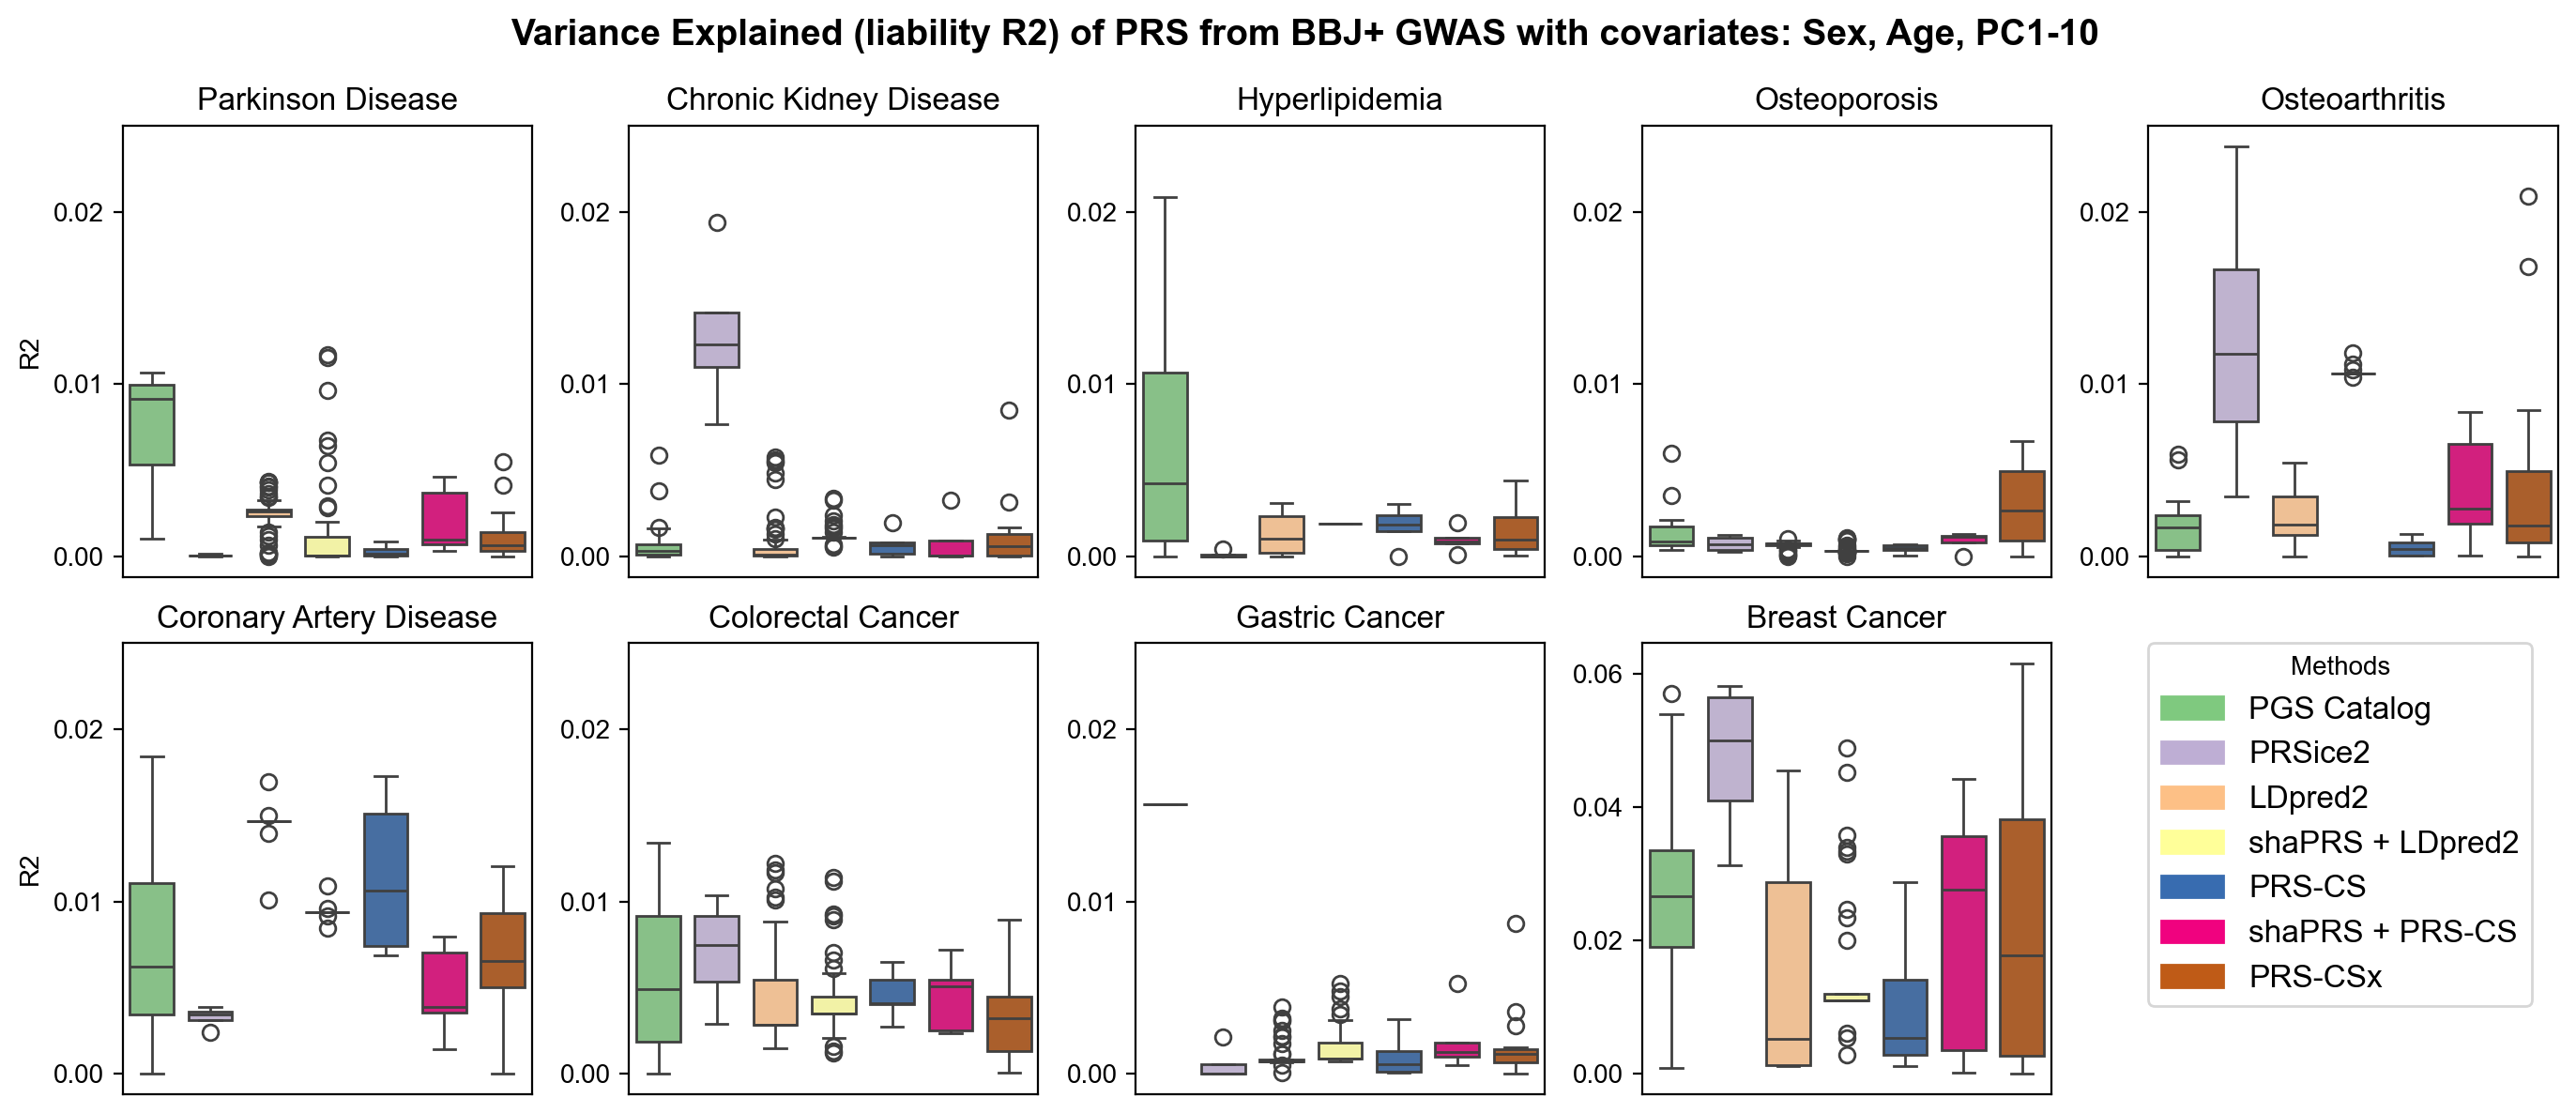

In [ ]:
prs_file = 'PRS.acc.age.txt'
prs_df = pd.read_table(f'./results/breast_cancer/{prs_file}')
mapping_func = lambda x: 'PGS Catalog' if 'PGS' in x else \
                                          'PRS-CSx' if 'prscsx' in x else \
                                          'shaPRS + PRS-CS' if 'prscs' in x and 'shaPRS' in x else\
                                          'PRS-CS' if 'prscs' in x else\
                                          'shaPRS + LDpred2' if 'score' in x and 'shaPRS' in x else\
                                          'LDpred2' if 'score' in x else\
                                          'PRSice2' if 'PRSice' in x else \
                                          'SBayesRC' if 'SBayesRC' in x else 'null'
prs_df['prs_model'] = prs_df['pgs'].apply(mapping_func)
prs_df['disease'] = 'breast_cancer'
for d in ['colorectal_cancer', 'gastric_cancer', 'pd', 'ckd',
            'osteoporosis', 'cad', 'hyperlipidemia', 'osteoarthritis']:
    df = pd.read_table(f'./results/{d}/{prs_file}')
    df['prs_model'] = df['pgs'].apply(mapping_func)
    df['disease'] = d
    prs_df = pd.concat([prs_df, df])

# Set up the figure and axes
# set font family 
plt.rcParams['font.family'] = 'Arial'
fig, axes = plt.subplots(2, 5, figsize=(14, 6), sharey=False, dpi=200)
plt.suptitle('Variance Explained (liability R2) of PRS from BBJ+ GWAS with covariates: Sex, Age, PC1-10', fontsize=14, fontweight='bold')
axes = axes.flatten()

# Get the unique diseases
unique_diseases = ['pd', 'ckd', 'hyperlipidemia', 'osteoporosis', 'osteoarthritis',
                     'cad', 'colorectal_cancer', 'gastric_cancer', 'breast_cancer']  
custom_disease = [
                'Parkinson Disease', 'Chronic Kidney Disease',  'Hyperlipidemia', 'Osteoporosis',  'Osteoarthritis', 
                'Coronary Artery Disease', 'Colorectal Cancer', 'Gastric Cancer', 'Breast Cancer',]
prs_models = ['PGS Catalog', 'PRSice2', 'LDpred2', 'shaPRS + LDpred2', 'PRS-CS', 'shaPRS + PRS-CS', 'PRS-CSx', ]

# Plot each disease in a separate subplot
for idx, disease in enumerate(unique_diseases):
    ax = axes[idx]
    sns.boxplot(data=prs_df[prs_df['disease'] == disease], x='prs_model', y='R2', ax=ax, 
                order=prs_models,
                hue='prs_model', hue_order=prs_models,
                palette='Accent', width=0.75,
                )

    # set title
    ax.set_title(custom_disease[idx], fontsize=12)
    ax.set_xlabel('')
    ax.set_ylabel('R2')
    ax.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
    if idx % 5 == 0:
        ax.set_ylabel('R2')
    else:
        ax.set_ylabel('')

# Set the same y-axis limits for axes[0] to axes[7]
y_min, y_max = min(ax.get_ylim()[0] for ax in axes[:8]), max(ax.get_ylim()[1] for ax in axes[:8])
for ax in axes[:8]:
    ax.set_ylim(y_min, y_max)
    ax.set_yticks([0, 0.01, 0.02])
axes[8].set_yticks([0.00, 0.02, 0.04, 0.06])
# Remove the last empty subplot
axes[-1].axis('off')

# Add custom legend
legend_custom = []
for idx, label in enumerate(prs_models):
    legend_custom.append(Patch(color=sns.color_palette("Accent")[prs_models.index(label)], label=label))
plt.legend(handles=legend_custom, loc='upper left', borderaxespad=0., fontsize=12, title='Methods',)

# Adjust layout
plt.tight_layout()
plt.show()

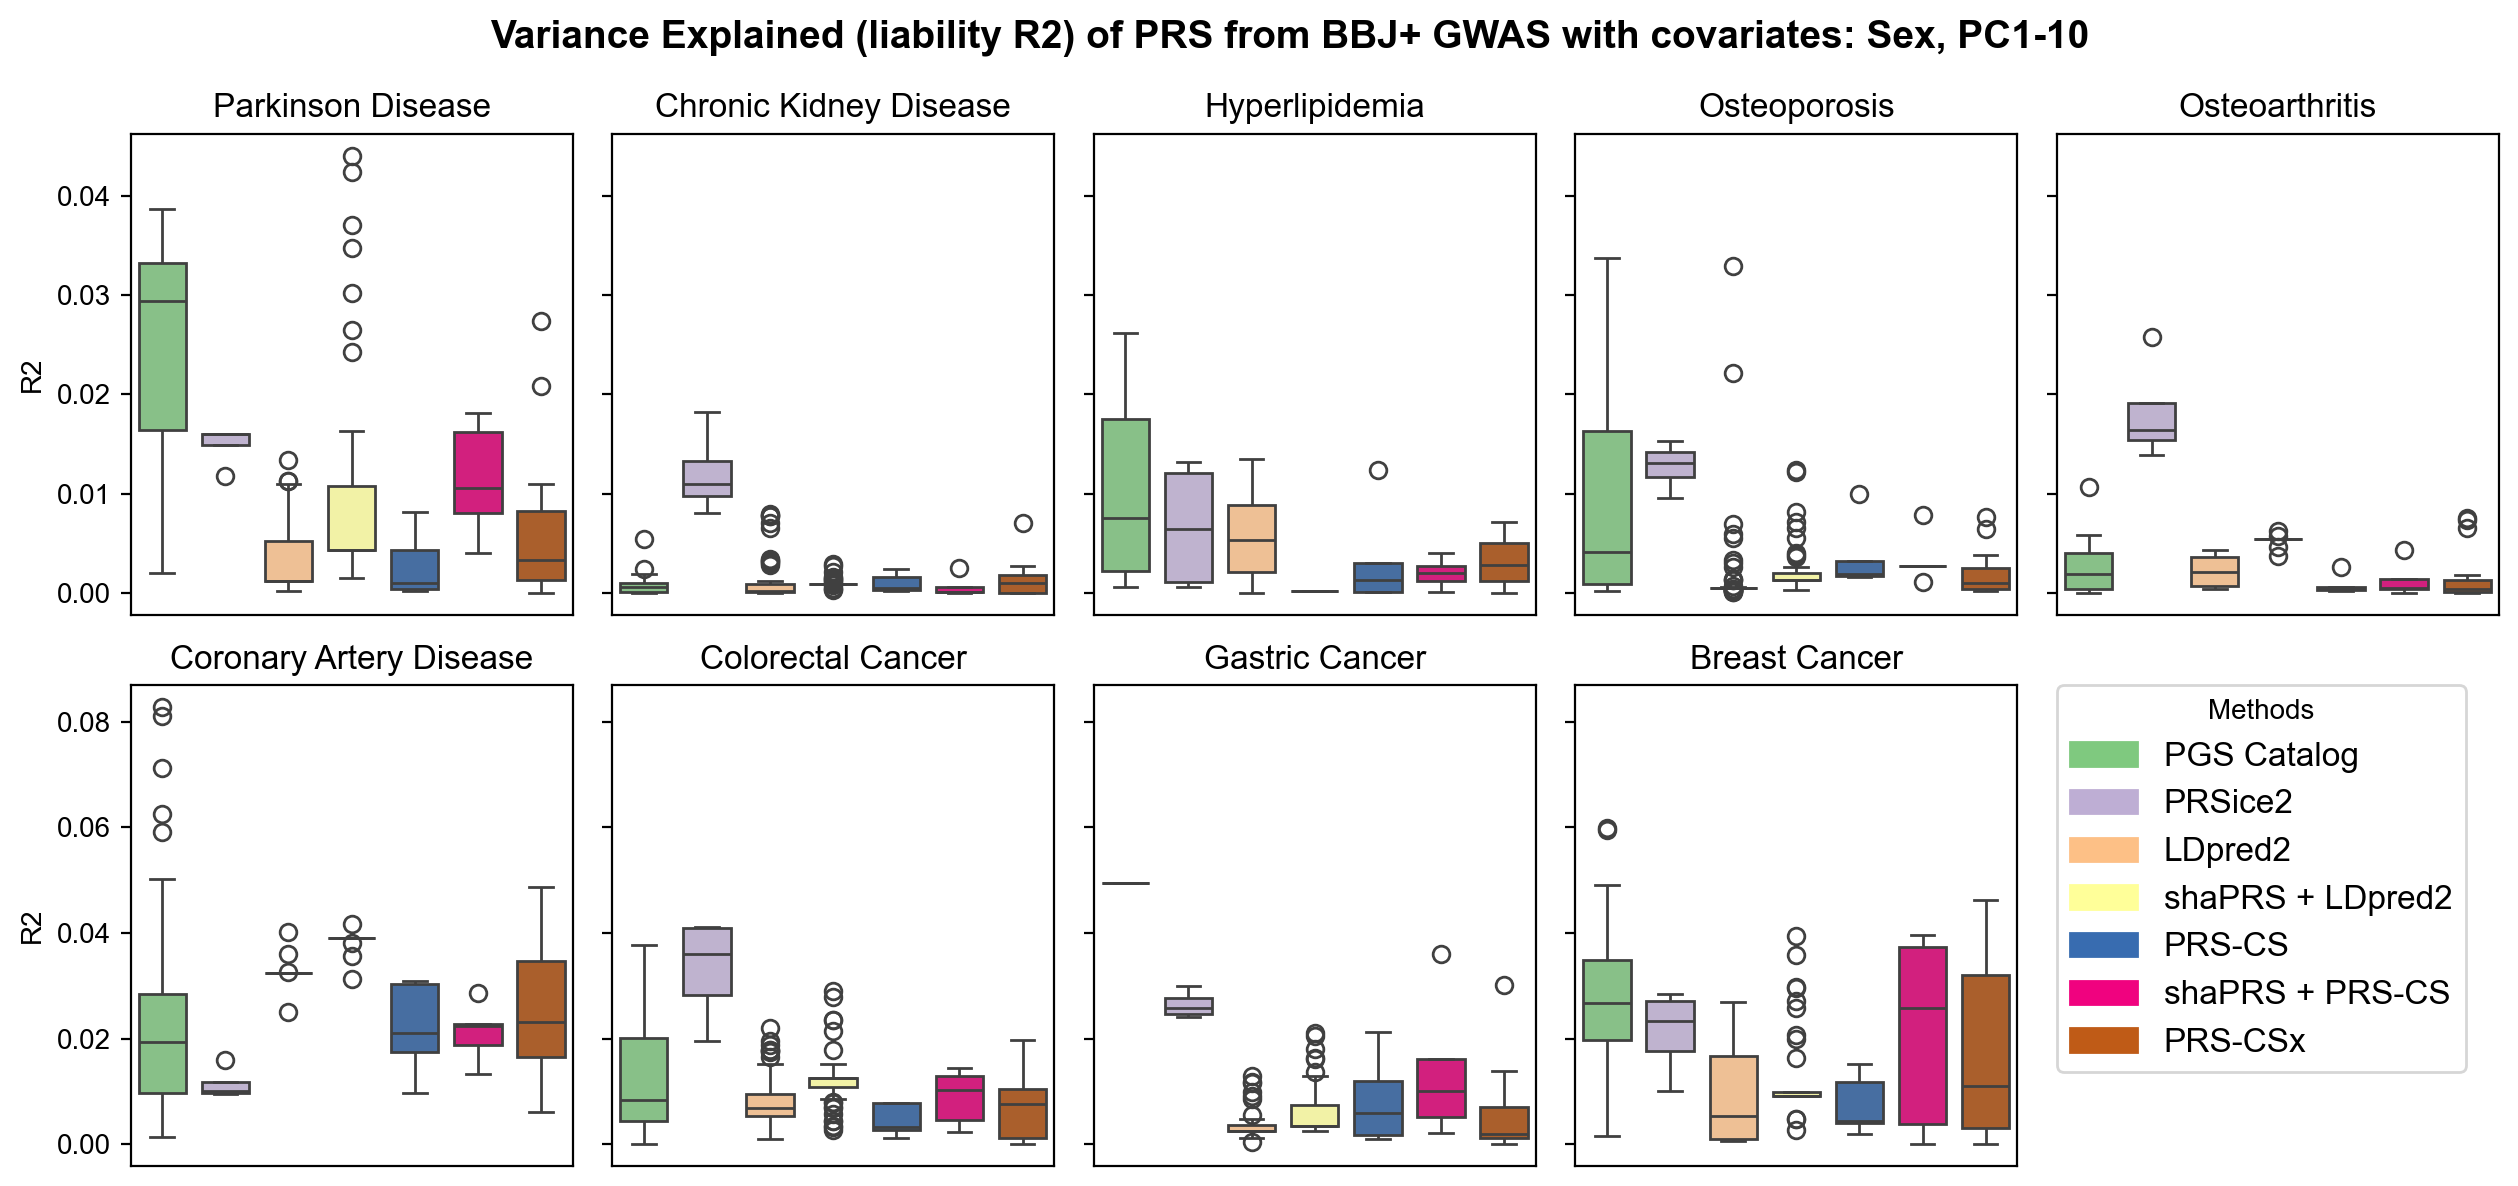

In [5]:
prs_file = 'PRS.acc.no.age.txt'
prs_df = pd.read_table(f'./results/breast_cancer/{prs_file}')
mapping_func = lambda x: 'PGS Catalog' if 'PGS' in x else \
                                          'PRS-CSx' if 'prscsx' in x else \
                                          'shaPRS + PRS-CS' if 'prscs' in x and 'shaPRS' in x else\
                                          'PRS-CS' if 'prscs' in x else\
                                          'shaPRS + LDpred2' if 'score' in x and 'shaPRS' in x else\
                                          'LDpred2' if 'score' in x else\
                                          'PRSice2' if 'PRSice' in x else \
                                          'SBayesRC' if 'SBayesRC' in x else 'null'
prs_df['prs_model'] = prs_df['pgs'].apply(mapping_func)
prs_df['disease'] = 'breast_cancer'
for d in ['colorectal_cancer', 'gastric_cancer', 'pd', 'ckd',
            'osteoporosis', 'cad', 'hyperlipidemia', 'osteoarthritis']:
    df = pd.read_table(f'./results/{d}/{prs_file}')
    df['prs_model'] = df['pgs'].apply(mapping_func)
    df['disease'] = d
    prs_df = pd.concat([prs_df, df])

# set font family 
plt.rcParams['font.family'] = 'Arial'
fig, axes = plt.subplots(2, 5, figsize=(13, 6), sharey='row', dpi=200)
plt.suptitle('Variance Explained (liability R2) of PRS from BBJ+ GWAS with covariates: Sex, PC1-10', fontsize=14, fontweight='bold')
axes = axes.flatten()

# Get the unique diseases
unique_diseases = ['pd', 'ckd', 'hyperlipidemia', 'osteoporosis', 'osteoarthritis',
                     'cad', 'colorectal_cancer', 'gastric_cancer', 'breast_cancer']  
custom_disease = [
                'Parkinson Disease', 'Chronic Kidney Disease',  'Hyperlipidemia', 'Osteoporosis',  'Osteoarthritis', 
                'Coronary Artery Disease', 'Colorectal Cancer', 'Gastric Cancer', 'Breast Cancer',]
prs_models = ['PGS Catalog', 'PRSice2', 'LDpred2', 'shaPRS + LDpred2', 'PRS-CS', 'shaPRS + PRS-CS', 'PRS-CSx', ]

# Plot each disease in a separate subplot
for idx, disease in enumerate(unique_diseases):
    ax = axes[idx]
    sns.boxplot(data=prs_df[prs_df['disease'] == disease], x='prs_model', y='R2', ax=ax, 
                order=prs_models,
                hue='prs_model', hue_order=prs_models,
                palette='Accent', width=0.75
                )
    # set title
    ax.set_title(custom_disease[idx], fontsize=12)
    ax.set_xlabel('')
    ax.set_ylabel('R2')
    ax.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
    if idx % 5 == 0:
        ax.set_ylabel('R2')
    else:
        ax.set_ylabel('')

# Remove the last three empty subplots
axes[-1].axis('off')

# Add custom legend
legend_custom = []
for idx, label in enumerate(prs_models):
    legend_custom.append(Patch(color=sns.color_palette("Accent")[prs_models.index(label)], label=label))
plt.legend(handles=legend_custom, loc='upper left', borderaxespad=0., fontsize=12, title='Methods',)

# Adjust layout
plt.tight_layout()
plt.show()

In [59]:
bc_df = pd.read_table('./pgs_catalog_results/breast_cancer/PGS000029_hmPOS_GRCh38.txt', skiprows=17)
bc_df['DISEASE ID'] = 'UTV'; bc_df['SOURCE'] = 'computed GWAS'
bc_df['P-VALUE'] = None; bc_df['GENE'] = None
bc_df = bc_df[['DISEASE ID', 'hm_chr', 'hm_pos', 'other_allele', 'effect_allele', 'hm_rsID', 'GENE', 'P-VALUE', 'OR', 'SOURCE']]
bc_df.columns = ['DISEASE ID', 'CHR', 'POS', 'REF', 'ALT', 'RSID', 'GENE', 'P-VALUE', 'OR', 'SOURCE']
bc_df = bc_df.sort_values(by=['CHR', 'POS'], ignore_index=True)
bc_df

DISEASE ID  CHR        POS REF ALT        RSID  GENE P-VALUE    OR  \
0         UTV    1   10506158   G   A    rs616488  None    None  1.06   
1         UTV    1  113905767   C   T  rs11552449  None    None  1.03   
2         UTV    1  121538815   A   G  rs11249433  None    None  1.16   
3         UTV    1  202218048   A   G   rs6678914  None    None  1.10   
4         UTV    1  203797203   A   G   rs4951011  None    None  1.09   
..        ...  ...        ...  ..  ..         ...   ...     ...   ...   
71        UTV   19   18460331   A   G   rs4808801  None    None  1.04   
72        UTV   19   43782361   G   A   rs3760982  None    None  1.02   
73        UTV   20   34000289   C   T   rs2284378  None    None  1.10   
74        UTV   21   15148511   A   G   rs2823093  None    None  1.08   
75        UTV   22   40480230   T   C   rs6001930  None    None  1.03   

           SOURCE  
0   computed GWAS  
1   computed GWAS  
2   computed GWAS  
3   computed GWAS  
4   computed GWAS  
..            ...  
71  computed GWAS  
72  computed GWAS  
73  computed GWAS  
74  computed GWAS  
75  computed GWAS  

[76 rows x 10 columns]

In [60]:
crc_price = pd.read_table('./sum_stats_data/colorectal_cancer/hum0197.v3.BBJ.CC.v1/gwas.PRSice.txt')[['CHR', 'SNP', 'A1', 'A2', 'BETA']]
crc_df = pd.read_table('./results/colorectal_cancer/PRSice2.CRC.clumpr2.0.9.no.age.snp')
crc_df = crc_df[crc_df['P'] <= 0.01065]
crc_df = pd.merge(crc_df, crc_price)
crc_df['DISEASE ID'] = 'UTDTT'; crc_df['SOURCE'] = 'computed GWAS'; crc_df['GENE'] = None
crc_df['BETA'] = crc_df['BETA'].apply(lambda x: np.exp(x))
crc_df = crc_df[['DISEASE ID', 'CHR', 'BP', 'A2', 'A1', 'SNP', 'GENE', 'P', 'BETA', 'SOURCE']]
crc_df.columns = ['DISEASE ID', 'CHR', 'POS', 'REF', 'ALT', 'RSID', 'GENE', 'P-VALUE', 'OR', 'SOURCE']
crc_df.sort_values(by=['CHR', 'POS'], inplace=True, ignore_index=True)
crc_df

DISEASE ID  CHR       POS REF ALT         RSID  GENE   P-VALUE  \
0          UTDTT    1   1298200   G   T    rs2297234  None  0.001706   
1          UTDTT    1   1306584   G   A    rs3737718  None  0.006769   
2          UTDTT    1   1421170   A   G   rs12089560  None  0.007889   
3          UTDTT    1   1422612   C   T    rs3737716  None  0.008187   
4          UTDTT    1   1423368   G   A    rs1695853  None  0.006755   
...          ...  ...       ...  ..  ..          ...   ...       ...   
13377      UTDTT   22  43388375   T   C    rs5759313  None  0.005379   
13378      UTDTT   22  43393031   C   T    rs7349025  None  0.001744   
13379      UTDTT   22  43395560   T   G  rs117346821  None  0.001695   
13380      UTDTT   22  43408217   A   G    rs4513387  None  0.003962   
13381      UTDTT   22  44578613   C   T       rs4459  None  0.003644   

             OR         SOURCE  
0      0.946541  computed GWAS  
1      0.955871  computed GWAS  
2      1.063858  computed GWAS  
3      1.070738  computed GWAS  
4      1.065889  computed GWAS  
...         ...            ...  
13377  1.047399  computed GWAS  
13378  0.917206  computed GWAS  
13379  0.916800  computed GWAS  
13380  0.937277  computed GWAS  
13381  1.084322  computed GWAS  

[13382 rows x 10 columns]

In [52]:
gc_df = pd.read_table('./pgs_catalog_results/gastric_cancer/PGS002299_hmPOS_GRCh38.txt', skiprows=19)
gc_df['DISEASE ID'] = 'UTDD'; gc_df['SOURCE'] = 'computed GWAS'
gc_df['P-VALUE'] = None; gc_df['GENE'] = None
gc_df = gc_df[['DISEASE ID', 'hm_chr', 'chr_position', 'hm_inferOtherAllele', 'effect_allele', 
               'hm_rsID', 'GENE', 'P-VALUE', 'effect_weight', 'SOURCE']]
gc_df.columns = ['DISEASE ID', 'CHR', 'POS', 'REF', 'ALT', 'RSID', 'GENE', 'P-VALUE', 'OR', 'SOURCE']
gc_df['OR'] = gc_df['OR'].apply(lambda x: np.exp(x))
gc_df

DISEASE ID  CHR        POS REF ALT        RSID  GENE P-VALUE        OR  \
0       UTDD    1  155184975   A   G   rs2990223  None    None  1.265823   
1       UTDD    5   40685795   C   T  rs10036575  None    None  1.234568   
2       UTDD    8  143761931   C   T   rs2294008  None    None  1.210000   

          SOURCE  
0  computed GWAS  
1  computed GWAS  
2  computed GWAS

In [92]:
pd_df = pd.read_table('./results/pd/LDpred2.shaprs.BBJ.EUR.pst.beta.txt')[['chr', 'rsid', 'a0', 'a1', 'beta.grid.10']]
pd_df = pd_df.iloc[(-pd_df['beta.grid.10'].abs()).argsort()[:100]]
pd_df['DISEASE ID'] = 'PD'; pd_df['SOURCE'] = 'computed GWAS'; pd_df['GENE'] = None; pd_df['P-VALUE'] = None; pd_df['POS'] = None
pd_df['beta.grid.10'] = pd_df['beta.grid.10'].apply(lambda x: np.exp(x))
pd_df = pd_df[['DISEASE ID', 'chr', 'POS', 'a0', 'a1', 'rsid', 'GENE', 'P-VALUE', 'beta.grid.10', 'SOURCE']]
pd_df.columns = ['DISEASE ID', 'CHR', 'POS', 'REF', 'ALT', 'RSID', 'GENE', 'P-VALUE', 'OR', 'SOURCE']
pd_df = pd_df.sort_values(by=['CHR', 'POS'], ignore_index=True)
pd_df

DISEASE ID  CHR   POS REF ALT         RSID  GENE P-VALUE        OR  \
0          PD    1  None   T   C     rs708723  None    None  0.992059   
1          PD    1  None   C   T  rs117747787  None    None  0.995312   
2          PD    1  None   A   G     rs823128  None    None  0.995501   
3          PD    1  None   G   A    rs6673163  None    None  1.003646   
4          PD    1  None   T   C   rs59889992  None    None  1.003537   
..        ...  ...   ...  ..  ..          ...   ...     ...       ...   
95         PD   19  None   C   T  rs113165953  None    None  0.996323   
96         PD   19  None   C   T   rs41481648  None    None  0.996487   
97         PD   19  None   C   T    rs4804208  None    None  1.003110   
98         PD   19  None   G   A   rs10413802  None    None  1.003069   
99         PD   20  None   T   C   rs16997216  None    None  0.997111   

           SOURCE  
0   computed GWAS  
1   computed GWAS  
2   computed GWAS  
3   computed GWAS  
4   computed GWAS  
..            ...  
95  computed GWAS  
96  computed GWAS  
97  computed GWAS  
98  computed GWAS  
99  computed GWAS  

[100 rows x 10 columns]

In [61]:
ckd_price = pd.read_table('./sum_stats_data/ckd/hum0197.v3.BBJ.CRF.v1/gwas.PRSice.txt')[['CHR', 'SNP', 'A1', 'A2', 'BETA']]
ckd_df = pd.read_table('./results/ckd/PRSice2.CKD.clumpr2.0.9.no.age.snp')
ckd_df = ckd_df[ckd_df['P'] <= 0.00075005]
ckd_df = pd.merge(ckd_df, ckd_price)
ckd_df['DISEASE ID'] = 'BTM'; ckd_df['SOURCE'] = 'computed GWAS'; ckd_df['GENE'] = None
ckd_df['BETA'] = ckd_df['BETA'].apply(lambda x: np.exp(x))
ckd_df = ckd_df[['DISEASE ID', 'CHR', 'BP', 'A2', 'A1', 'SNP', 'GENE', 'P', 'BETA', 'SOURCE']]
ckd_df.columns = ['DISEASE ID', 'CHR', 'POS', 'REF', 'ALT', 'RSID', 'GENE', 'P-VALUE', 'OR', 'SOURCE']
ckd_df.sort_values(by=['CHR', 'POS'], inplace=True, ignore_index=True)
ckd_df

DISEASE ID  CHR       POS REF ALT        RSID  GENE   P-VALUE        OR  \
0          BTM    1   4511184   G   A  rs78887606  None  0.000615  0.803312   
1          BTM    1   4542038   A   G    rs507991  None  0.000684  0.836706   
2          BTM    1   6209280   A   G   rs4908865  None  0.000354  1.237427   
3          BTM    1   6226217   G   A   rs4908867  None  0.000555  1.302171   
4          BTM    1   7089431   C   T  rs75137194  None  0.000438  1.452898   
..         ...  ...       ...  ..  ..         ...   ...       ...       ...   
899        BTM   22  42732026   C   T    rs738531  None  0.000346  1.149970   
900        BTM   22  42739690   C   A  rs57880102  None  0.000367  0.863228   
901        BTM   22  42758699   G   T   rs5758917  None  0.000348  1.118553   
902        BTM   22  44123534   C   T   rs3788607  None  0.000518  0.896845   
903        BTM   22  47884992   C   T   rs2064806  None  0.000060  1.172589   

            SOURCE  
0    computed GWAS  
1    computed GWAS  
2    computed GWAS  
3    computed GWAS  
4    computed GWAS  
..             ...  
899  computed GWAS  
900  computed GWAS  
901  computed GWAS  
902  computed GWAS  
903  computed GWAS  

[904 rows x 10 columns]

In [58]:
op_df = pd.read_table('./pgs_catalog_results/osteoporosis/PGS001273_hmPOS_GRCh38.txt', skiprows=19)
op_df['DISEASE ID'] = 'LX'; op_df['SOURCE'] = 'computed GWAS'
op_df['P-VALUE'] = None; op_df['GENE'] = None
op_df = op_df[['DISEASE ID', 'hm_chr', 'hm_pos', 'other_allele', 'effect_allele', 
               'hm_rsID', 'GENE', 'P-VALUE', 'effect_weight', 'SOURCE']]
op_df.columns = ['DISEASE ID', 'CHR', 'POS', 'REF', 'ALT', 'RSID', 'GENE', 'P-VALUE', 'OR', 'SOURCE']
op_df = op_df[op_df['CHR'] != 'X'].sort_values(by=['CHR', 'POS'])
op_df['OR'] = op_df['OR'].apply(lambda x: np.exp(x))
op_df

DISEASE ID CHR        POS REF ALT        RSID  GENE P-VALUE        OR  \
0           LX   1    9183752   G   T    rs797257  None    None  1.002085   
1           LX   1   10823543   A   G  rs10864474  None    None  1.001589   
2           LX   1   11501536   G   A   rs2817580  None    None  1.000031   
3           LX   1   19815777   G   A   rs3820333  None    None  1.005535   
4           LX   1   22371954   A   G   rs7524102  None    None  0.954651   
..         ...  ..        ...  ..  ..         ...   ...     ...       ...   
298         LX   9  110404512   A   T   rs3739451  None    None  0.993075   
299         LX   9  119232622   T   C  rs10818290  None    None  1.001068   
300         LX   9  122628962   G   A   rs1476860  None    None  0.997207   
301         LX   9  122629492   C  CA  rs11421222  None    None  1.016131   
302         LX   9  136384721   G   A  rs10781510  None    None  1.006776   

            SOURCE  
0    computed GWAS  
1    computed GWAS  
2    computed GWAS  
3    computed GWAS  
4    computed GWAS  
..             ...  
298  computed GWAS  
299  computed GWAS  
300  computed GWAS  
301  computed GWAS  
302  computed GWAS  

[303 rows x 10 columns]

In [74]:
cad_df = pd.read_table('./pgs_catalog_results/cad/PGS004745_hmPOS_GRCh38.txt', skiprows=19)
cad_df = cad_df.iloc[(-cad_df['effect_weight'].abs()).argsort()[:100]]
cad_df['DISEASE ID'] = 'BMV'; cad_df['SOURCE'] = 'computed GWAS'
cad_df['P-VALUE'] = None; cad_df['GENE'] = None
cad_df = cad_df[['DISEASE ID', 'hm_chr', 'chr_position', 'other_allele', 'effect_allele', 
                 'hm_rsID', 'GENE', 'P-VALUE', 'effect_weight', 'SOURCE']]
cad_df.columns = ['DISEASE ID', 'CHR', 'POS', 'REF', 'ALT', 'RSID', 'GENE', 'P-VALUE', 'OR', 'SOURCE']
cad_df['OR'] = cad_df['OR'].apply(lambda x: np.exp(x))
cad_df['CHR'] = cad_df['CHR'].astype(int)
cad_df['POS'] = cad_df['POS'].astype(int)
cad_df = cad_df.sort_values(by=['CHR', 'POS'], ignore_index=True)
cad_df

DISEASE ID  CHR        POS REF ALT  RSID  GENE P-VALUE        OR  \
0         BMV    1   11848089   C   G   NaN  None    None  0.980643   
1         BMV    1   11848089   C   T   NaN  None    None  0.980643   
2         BMV    1   55039974   G   T   NaN  None    None  0.911896   
3         BMV    1   56500678   A   G   NaN  None    None  0.972703   
4         BMV    1  109274570   A   G   NaN  None    None  0.980824   
..        ...  ...        ...  ..  ..   ...   ...     ...       ...   
95        BMV   20   62475466   G   C   NaN  None    None  1.024654   
96        BMV   21   34221526   G   A   NaN  None    None  1.023148   
97        BMV   21   34223520   A   G   NaN  None    None  1.021559   
98        BMV   22   24262890   G   A   NaN  None    None  0.971632   
99        BMV   22   24262890   G   T   NaN  None    None  0.971632   

           SOURCE  
0   computed GWAS  
1   computed GWAS  
2   computed GWAS  
3   computed GWAS  
4   computed GWAS  
..            ...  
95  computed GWAS  
96  computed GWAS  
97  computed GWAS  
98  computed GWAS  
99  computed GWAS  

[100 rows x 10 columns]

In [76]:
hp_df = pd.read_table('./pgs_catalog_results/hyperlipidemia/PGS004784_hmPOS_GRCh38.txt', skiprows=19)
hp_df = hp_df.iloc[(-hp_df['effect_weight'].abs()).argsort()[:100]]
hp_df['DISEASE ID'] = 'RLLM'; hp_df['SOURCE'] = 'computed GWAS'
hp_df['P-VALUE'] = None; hp_df['GENE'] = None
hp_df = hp_df[['DISEASE ID', 'hm_chr', 'hm_pos', 'other_allele', 'effect_allele', 
               'hm_rsID', 'GENE', 'P-VALUE', 'effect_weight', 'SOURCE']]
hp_df.columns = ['DISEASE ID', 'CHR', 'POS', 'REF', 'ALT', 'RSID', 'GENE', 'P-VALUE', 'OR', 'SOURCE']
hp_df['OR'] = hp_df['OR'].apply(lambda x: np.exp(x))
hp_df['CHR'] = hp_df['CHR'].astype(int)
hp_df['POS'] = hp_df['POS'].astype(int)
hp_df = hp_df.sort_values(by=['CHR', 'POS'], ignore_index=True)
hp_df

DISEASE ID  CHR        POS REF ALT  RSID  GENE P-VALUE        OR  \
0        RLLM    1   55039974   G   T   NaN  None    None  0.713689   
1        RLLM    1   55063514   G   A   NaN  None    None  0.976737   
2        RLLM    1  109274570   A   G   NaN  None    None  0.966676   
3        RLLM    1  109274968   G   T   NaN  None    None  0.930692   
4        RLLM    1  109275908   C   T   NaN  None    None  1.032339   
..        ...  ...        ...  ..  ..   ...   ...     ...       ...   
95       RLLM   19   44943964   G   A   NaN  None    None  1.044890   
96       RLLM   20   40513876   G   A   NaN  None    None  1.024364   
97       RLLM   20   40551182   G   C   NaN  None    None  1.050880   
98       RLLM   20   40551182   G   A   NaN  None    None  1.037284   
99       RLLM   20   44413724   C   T   NaN  None    None  0.945831   

           SOURCE  
0   computed GWAS  
1   computed GWAS  
2   computed GWAS  
3   computed GWAS  
4   computed GWAS  
..            ...  
95  computed GWAS  
96  computed GWAS  
97  computed GWAS  
98  computed GWAS  
99  computed GWAS  

[100 rows x 10 columns]

In [80]:
oa_price = pd.read_table('./sum_stats_data/osteoarthritis/gwas.catalog.EAS.GCST90134281/gwas.PRSice.txt')[['CHR', 'SNP', 'A1', 'A2', 'BETA']]
oa_df = pd.read_table('./results/osteoarthritis/PRSice2.OA.clumpr2.0.1.no.age.snp')
oa_df = oa_df[oa_df['P'] <= 0.39895]
oa_df = pd.merge(oa_df, oa_price)
oa_df['DISEASE ID'] = 'THK'; oa_df['SOURCE'] = 'computed GWAS'; oa_df['GENE'] = None
oa_df['BETA'] = oa_df['BETA'].apply(lambda x: np.exp(x))
oa_df = oa_df[['DISEASE ID', 'CHR', 'BP', 'A2', 'A1', 'SNP', 'GENE', 'P', 'BETA', 'SOURCE']]
oa_df.columns = ['DISEASE ID', 'CHR', 'POS', 'REF', 'ALT', 'RSID', 'GENE', 'P-VALUE', 'OR', 'SOURCE']
oa_df.sort_values(by=['CHR', 'POS'], inplace=True, ignore_index=True)
oa_df

DISEASE ID  CHR       POS REF ALT        RSID  GENE   P-VALUE        OR  \
0            THK    1    799688   A   G   rs2427928  None  0.026316  2.236000   
1            THK    1    865003   T   C   rs4951931  None  0.047690  0.673956   
2            THK    1    874496   A   G  rs57181708  None  0.214085  0.823124   
3            THK    1    878665   C   T  rs28483835  None  0.169815  0.801485   
4            THK    1    914991   T   G   rs6679046  None  0.380227  1.125510   
...          ...  ...       ...  ..  ..         ...   ...       ...       ...   
75811        THK   22  50711739   C   T   rs5770819  None  0.324307  0.798639   
75812        THK   22  50714126   A   G   rs9616948  None  0.006005  1.525740   
75813        THK   22  50743091   A   G   rs6010072  None  0.012756  0.656396   
75814        THK   22  50759324   C   A   rs6010078  None  0.013517  2.026190   
75815        THK   22  50774196   G   A   rs2238836  None  0.017297  2.324460   

              SOURCE  
0      computed GWAS  
1      computed GWAS  
2      computed GWAS  
3      computed GWAS  
4      computed GWAS  
...              ...  
75811  computed GWAS  
75812  computed GWAS  
75813  computed GWAS  
75814  computed GWAS  
75815  computed GWAS  

[75816 rows x 10 columns]

In [103]:
manual_df = pd.read_excel('SNP_DISEASE_VGP.xlsx', sheet_name='Sheet1')
manual_df.dropna(subset=['rsID'], inplace=True)
mapping_trait = {
    'Bệnh động mạch vành': 'BMV',
    'Parkinson': 'PD',
    'Ung thư vú': 'UTV',
    'Ung thư đại trực tràng': 'UTDTT',
    'Ung thư dạ dày': 'UTDD',
    'Alzheimer': 'AD',
    'Thoái hóa khớp': 'THK',
    'Loãng xương': 'LX',
    'Bệnh thận mạn': 'BTM',
    'Rối loạn lipid máu': 'RLLM'
}
manual_df.columns = ['DISEASE ID', 'CHR', 'POS', 'REF', 'ALT', 'RSID', 'GENE']
manual_df['DISEASE ID'] = manual_df['DISEASE ID'].map(mapping_trait)
manual_df['P-VALUE'] = None
manual_df['OR'] = None
manual_df['SOURCE'] = 'manually curated'
# remove 'chr' prefix in CHR column if have
manual_df['CHR'] = manual_df['CHR'].astype(str)
manual_df['CHR'] = manual_df['CHR'].apply(lambda x: x.replace('chr', '') if 'chr' in x else x)
manual_df = manual_df.dropna(subset=['DISEASE ID'])
manual_df

DISEASE ID CHR        POS REF    ALT        RSID            GENE P-VALUE  \
0           AD   8   27611345   C      G   rs9331888             CLU    None   
1           AD   8   27607002   T    A,C  rs11136000             CLU    None   
2           AD   8   27608798   T    A,C   rs1532278             CLU    None   
3           AD   8   27598736   T  A,C,G   rs2279590             CLU    None   
4           AD   8   27604964   A  C,G,T      rs7982             CLU    None   
..         ...  ..        ...  ..    ...         ...             ...     ...   
215        BMV   1  240282296   T      C  rs17672135            FMN2    None   
216        BMV  22   26293669   C    A,T    rs688034           SEZ6L    None   
217        BMV  16   83178793   G  A,C,T   rs8055236           CDH13    None   
218       RLLM  16   56955678   C      T    rs247616  HERPUD1 - CETP    None   
219       RLLM  16   56955678   C      T  rs10412048  SMARCA4 - LDLR    None   

       OR            SOURCE  
0    None  manually curated  
1    None  manually curated  
2    None  manually curated  
3    None  manually curated  
4    None  manually curated  
..    ...               ...  
215  None  manually curated  
216  None  manually curated  
217  None  manually curated  
218  None  manually curated  
219  None  manually curated  

[210 rows x 10 columns]

In [109]:
all_df = pd.concat([bc_df, crc_df, gc_df, pd_df, ckd_df, 
                    op_df, cad_df, hp_df, oa_df, manual_df], 
                    ignore_index=True).sort_values(by=['DISEASE ID', 'CHR', 'POS'])
all_df = all_df[all_df['CHR'] != 'X']
all_df.to_excel('vgp_10_diseases_report.xlsx', index=False)

In [4]:
mapping_func = lambda x: 'PGS Catalog' if 'PGS' in x else \
                                          'PRS-CSx' if 'prscsx' in x else \
                                          'shaPRS + PRS-CS' if 'prscs' in x and 'shaPRS' in x else\
                                          'PRS-CS' if 'prscs' in x else\
                                          'shaPRS + LDpred2' if 'score' in x and 'shaPRS' in x else\
                                          'LDpred2' if 'score' in x else\
                                          'PRSice2' if 'PRSice' in x else 'null'

In [55]:
from sklearn.metrics import roc_auc_score

# each PRS in each column, run AUC metric (y_pred as PRS in each column, y_true as PHENO), and plot boxplot
df_auc = pd.DataFrame([], columns=['disease', 'PRS', 'AUC', 'Methods'])
for d in ['breast_cancer', 'colorectal_cancer', 'gastric_cancer', 'pd', 'ckd',
            'osteoporosis', 'cad', 'hyperlipidemia', 'osteoarthritis']:
    df = pd.read_table(f'./results/{d}/PRS.score.{d}.samples.age.txt')
    for c in df.columns[2: -1]:
        auc = roc_auc_score(df['PHENO'], df[c])
        df_auc = pd.concat([df_auc, 
                            pd.DataFrame({'disease': [f'{d}'], 'PRS': [c], 'AUC': [auc], 'Methods': [mapping_func(c)]})], 
                            ignore_index=True)
df_auc = df_auc[df_auc['Methods'] != 'null']
df_auc

disease           PRS       AUC      Methods
0      breast_cancer    score.auto  0.599439      LDpred2
1      breast_cancer  score.grid.1  0.574216      LDpred2
2      breast_cancer  score.grid.2  0.581569      LDpred2
3      breast_cancer  score.grid.3  0.587479      LDpred2
4      breast_cancer  score.grid.6  0.594813      LDpred2
...              ...           ...       ...          ...
1442  osteoarthritis     PGS001290  0.577440  PGS Catalog
1443  osteoarthritis     PGS002750  0.540546  PGS Catalog
1444  osteoarthritis     PGS002728  0.470595  PGS Catalog
1445  osteoarthritis     PGS002749  0.406994  PGS Catalog
1446  osteoarthritis     PGS002729  0.425843  PGS Catalog

[1438 rows x 4 columns]

In [71]:
df_auc[df_auc.groupby('disease')['AUC'].transform(max) == df_auc['AUC']]

disease                   PRS       AUC           Methods
141       breast_cancer             PGS000335  0.642907       PGS Catalog
429   colorectal_cancer             PGS003852  0.648621       PGS Catalog
559      gastric_cancer             PGS002299  0.673472       PGS Catalog
619                  pd  score.grid.10.shaPRS  0.659563  shaPRS + LDpred2
857                 ckd    prscsx.EUR.phiauto  0.553909           PRS-CSx
1019       osteoporosis             PGS001273  0.639842       PGS Catalog
1146                cad             PGS004746  0.700377       PGS Catalog
1278     hyperlipidemia             PGS004784  0.609524       PGS Catalog
1439     osteoarthritis             PGS001882  0.599583       PGS Catalog

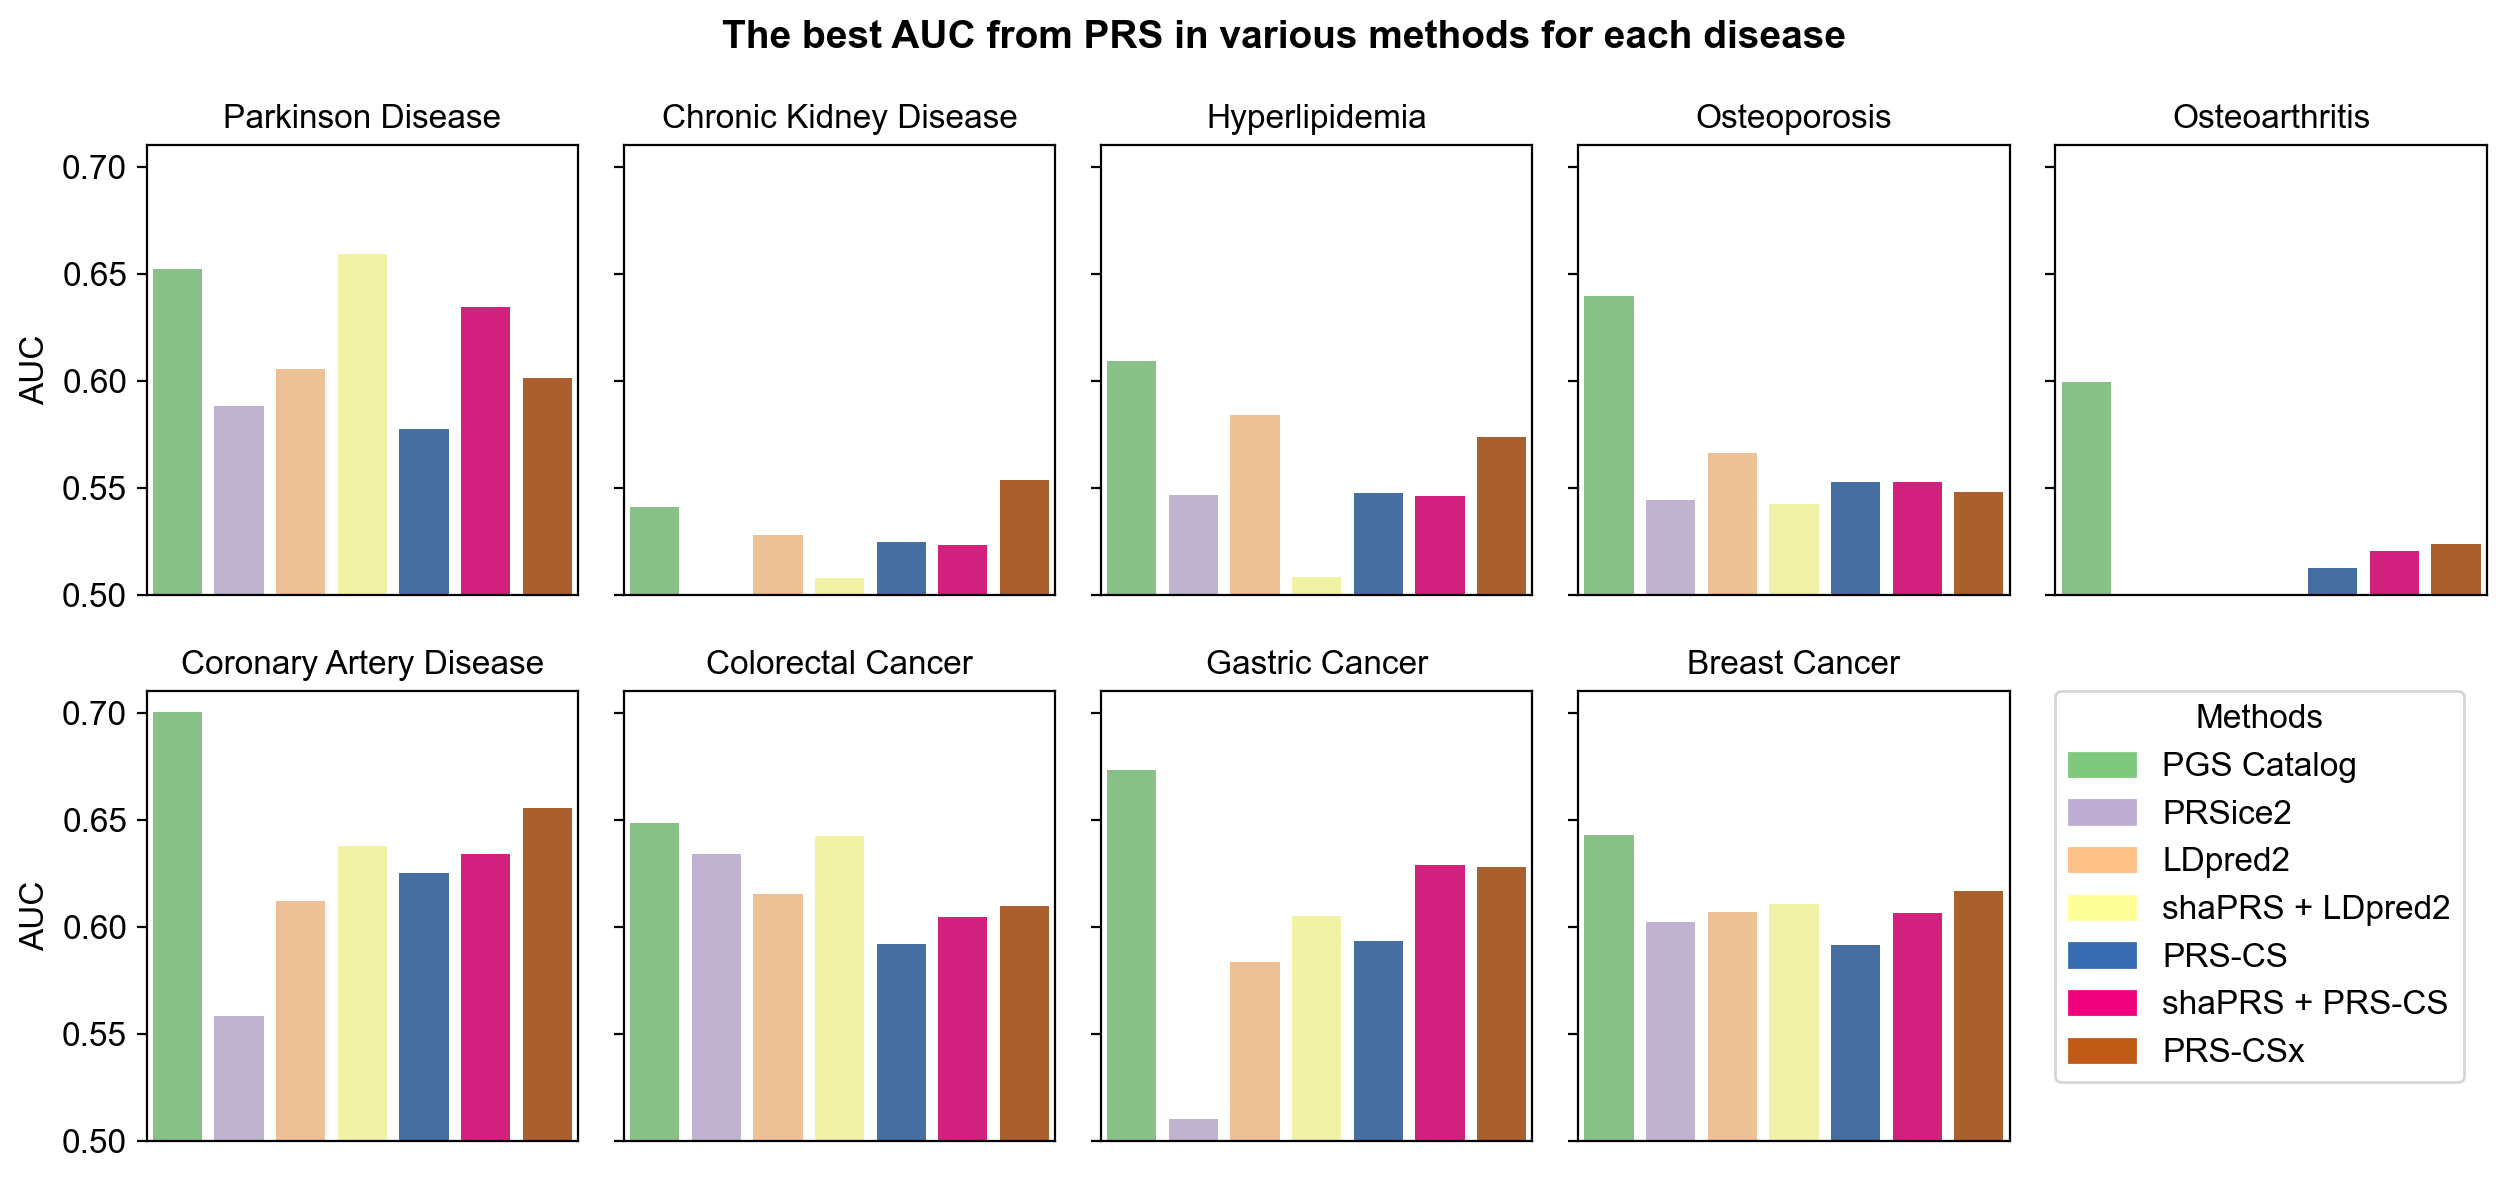

In [64]:
import seaborn as sns
from matplotlib.patches import Patch

best_auc_per_method = df_auc.loc[df_auc.groupby(['disease', 'Methods'])['AUC'].idxmax()].reset_index(drop=True)
import matplotlib.pyplot as plt

# Get unique diseases and methods
diseases = ['pd', 'ckd', 'hyperlipidemia', 'osteoporosis', 'osteoarthritis',
                     'cad', 'colorectal_cancer', 'gastric_cancer', 'breast_cancer'] 
methods = ['PGS Catalog', 'PRSice2', 'LDpred2', 'shaPRS + LDpred2', 'PRS-CS', 'shaPRS + PRS-CS', 'PRS-CSx']
custom_disease = ['Parkinson Disease', 'Chronic Kidney Disease',  'Hyperlipidemia', 'Osteoporosis',  'Osteoarthritis', 
                'Coronary Artery Disease', 'Colorectal Cancer', 'Gastric Cancer', 'Breast Cancer',]

# Set up the figure with subplots
# set font family 
plt.rcParams['font.family'] = 'Arial'
fig, axes = plt.subplots(2, 5, figsize=(13, 6), sharey=True, dpi=200)
plt.suptitle('The best AUC from PRS in various methods for each disease', fontsize=14, fontweight='bold')
axes = axes.flatten()

# Plot each disease
for i, disease in enumerate(diseases):
    ax = axes[i]
    sns.barplot(data=best_auc_per_method[best_auc_per_method['disease'] == disease],
                x='Methods', y='AUC', ax=ax, palette='Accent',
                order=methods, hue_order=methods)
    ax.set_title(custom_disease[i], fontsize=12)
    ax.set_ylim(0.5, best_auc_per_method['AUC'].max() + 0.01)
    ax.set_xlabel('')
    ax.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
    if i % 5 == 0:
        ax.set_ylabel('AUC')
    else:
        ax.set_ylabel('')

# Turn off the last subplot and add legend
axes[-1].axis('off')
legend_handles = [Patch(color=sns.color_palette("Accent")[i], label=method) for i, method in enumerate(methods)]
plt.legend(handles=legend_handles, loc='upper left', borderaxespad=0., fontsize=12, title='Methods')

plt.tight_layout()
plt.show()

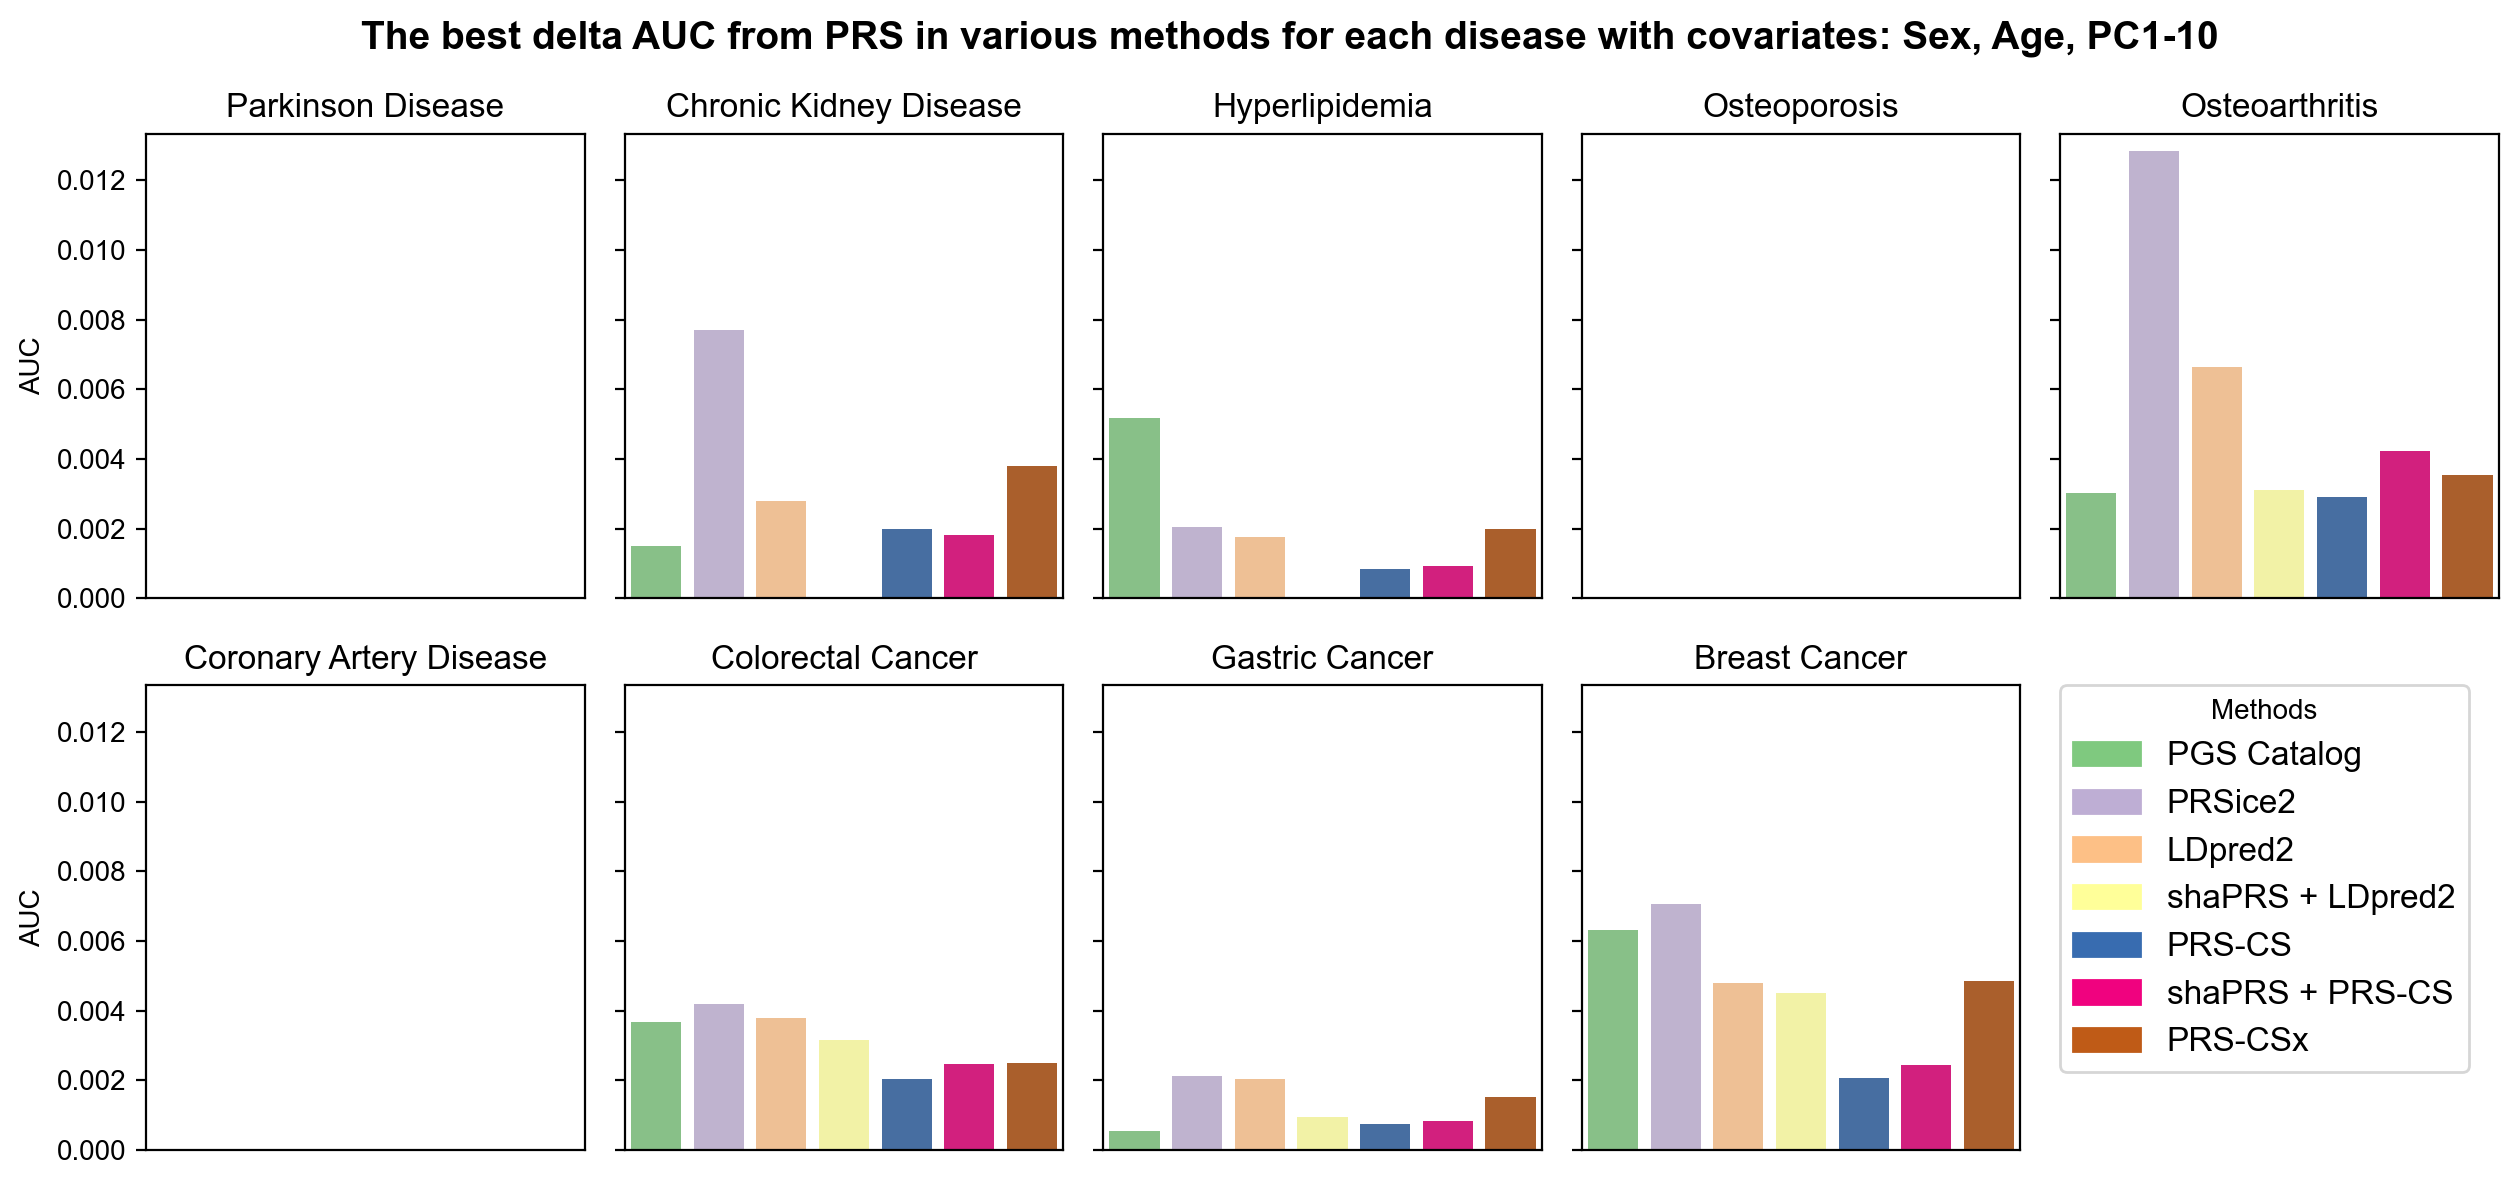

In [ ]:
from matplotlib.patches import Patch
df_delta_auc = pd.DataFrame([], columns=['disease', 'pgs', 'delta AUC', 'Methods'])
for d in ['breast_cancer', 'colorectal_cancer', 'gastric_cancer', 'pd', 'ckd',
            'osteoporosis', 'cad', 'hyperlipidemia', 'osteoarthritis']:
    df = pd.read_table(f'./results/{d}/PRS.delta.AUC.age.txt')
    df['Methods'] = df['pgs'].apply(mapping_func)
    df['disease'] = d
    df = df[['disease', 'pgs', 'delta_auc', 'Methods']]
    df.columns = ['disease', 'pgs', 'delta AUC', 'Methods']
    df_delta_auc = pd.concat([df_delta_auc, df], ignore_index=True, axis=0)

best_auc_per_method = df_delta_auc.loc[df_delta_auc.groupby(['disease', 'Methods'])['delta AUC'].idxmax()].reset_index(drop=True)
import matplotlib.pyplot as plt

# Get unique diseases and methods
diseases = ['pd', 'ckd', 'hyperlipidemia', 'osteoporosis', 'osteoarthritis',
                     'cad', 'colorectal_cancer', 'gastric_cancer', 'breast_cancer'] 
methods = ['PGS Catalog', 'PRSice2', 'LDpred2', 'shaPRS + LDpred2', 'PRS-CS', 'shaPRS + PRS-CS', 'PRS-CSx']
custom_disease = ['Parkinson Disease', 'Chronic Kidney Disease',  'Hyperlipidemia', 'Osteoporosis',  'Osteoarthritis', 
                'Coronary Artery Disease', 'Colorectal Cancer', 'Gastric Cancer', 'Breast Cancer',]

# Set up the figure with subplots
# set font family 
plt.rcParams['font.family'] = 'Arial'
fig, axes = plt.subplots(2, 5, figsize=(13, 6), sharey=True, dpi=200)
plt.suptitle('The best delta AUC from PRS in various methods for each disease with covariates: Sex, Age, PC1-10', fontsize=14, fontweight='bold')
axes = axes.flatten()

# Plot each disease
for i, disease in enumerate(diseases):
    ax = axes[i]
    sns.barplot(data=best_auc_per_method[best_auc_per_method['disease'] == disease],
                x='Methods', y='delta AUC', ax=ax, palette='Accent',
                order=methods, hue_order=methods)
    ax.set_title(custom_disease[i], fontsize=12)
    ax.set_ylim(0., best_auc_per_method['delta AUC'].max() + 0.0005)
    ax.set_xlabel('')
    ax.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
    if i % 5 == 0:
        ax.set_ylabel('AUC')
    else:
        ax.set_ylabel('')

# Turn off the last subplot and add legend
axes[-1].axis('off')
legend_handles = [Patch(color=sns.color_palette("Accent")[i], label=method) for i, method in enumerate(methods)]
plt.legend(handles=legend_handles, loc='upper left', borderaxespad=0., fontsize=12, title='Methods')

plt.tight_layout()
plt.show()

In [46]:
best_auc_per_method['delta AUC'] = best_auc_per_method['delta AUC'].apply(lambda x: round(x, 4))
best_auc_per_method

disease                    pgs  delta AUC           Methods
0   breast_cancer          score.grid.64     0.0048           LDpred2
1   breast_cancer              PGS000212     0.0063       PGS Catalog
2   breast_cancer         prscs.phi1e.06     0.0021            PRS-CS
3   breast_cancer    prscsx.EAS.phi1e.06     0.0049           PRS-CSx
4   breast_cancer            PRSice2.0.1     0.0071           PRSice2
..            ...                    ...        ...               ...
58             pd         prscs.phi1e.00     0.0000            PRS-CS
59             pd   prscsx.META.phi1e.00     0.0000           PRS-CSx
60             pd            PRSice2.0.1     0.0000           PRSice2
61             pd      score.auto.shaPRS     0.0000  shaPRS + LDpred2
62             pd  prscs.shaPRS.phi1e.00     0.0000   shaPRS + PRS-CS

[63 rows x 4 columns]

In [47]:
# Create a pivoted DataFrame with methods as rows and diseases as columns
temp_df = best_auc_per_method.pivot(index='Methods', columns='disease', values='delta AUC')

# Ensure methods are in the desired order
method_order = ['PGS Catalog', 'PRSice2', 'LDpred2', 'shaPRS + LDpred2', 'PRS-CS', 'shaPRS + PRS-CS', 'PRS-CSx']
temp_df = temp_df.reindex(method_order)

# Display the resulting table
temp_df.T

Methods            PGS Catalog  PRSice2  LDpred2  shaPRS + LDpred2  PRS-CS  \
disease                                                                      
breast_cancer           0.0063   0.0071   0.0048            0.0045  0.0021   
cad                     0.0000   0.0000   0.0000            0.0000  0.0000   
ckd                     0.0015   0.0077   0.0028           -0.0002  0.0020   
colorectal_cancer       0.0037   0.0042   0.0038            0.0032  0.0020   
gastric_cancer          0.0005   0.0021   0.0020            0.0010  0.0008   
hyperlipidemia          0.0052   0.0020   0.0018           -0.0011  0.0009   
osteoarthritis          0.0030   0.0128   0.0066            0.0031  0.0029   
osteoporosis            0.0000   0.0000   0.0000            0.0000  0.0000   
pd                      0.0000   0.0000   0.0000            0.0000  0.0000   

Methods            shaPRS + PRS-CS  PRS-CSx  
disease                                      
breast_cancer               0.0025   0.0049  
cad                         0.0000   0.0000  
ckd                         0.0018   0.0038  
colorectal_cancer           0.0025   0.0025  
gastric_cancer              0.0008   0.0015  
hyperlipidemia              0.0009   0.0020  
osteoarthritis              0.0042   0.0035  
osteoporosis                0.0000   0.0000  
pd                          0.0000   0.0000

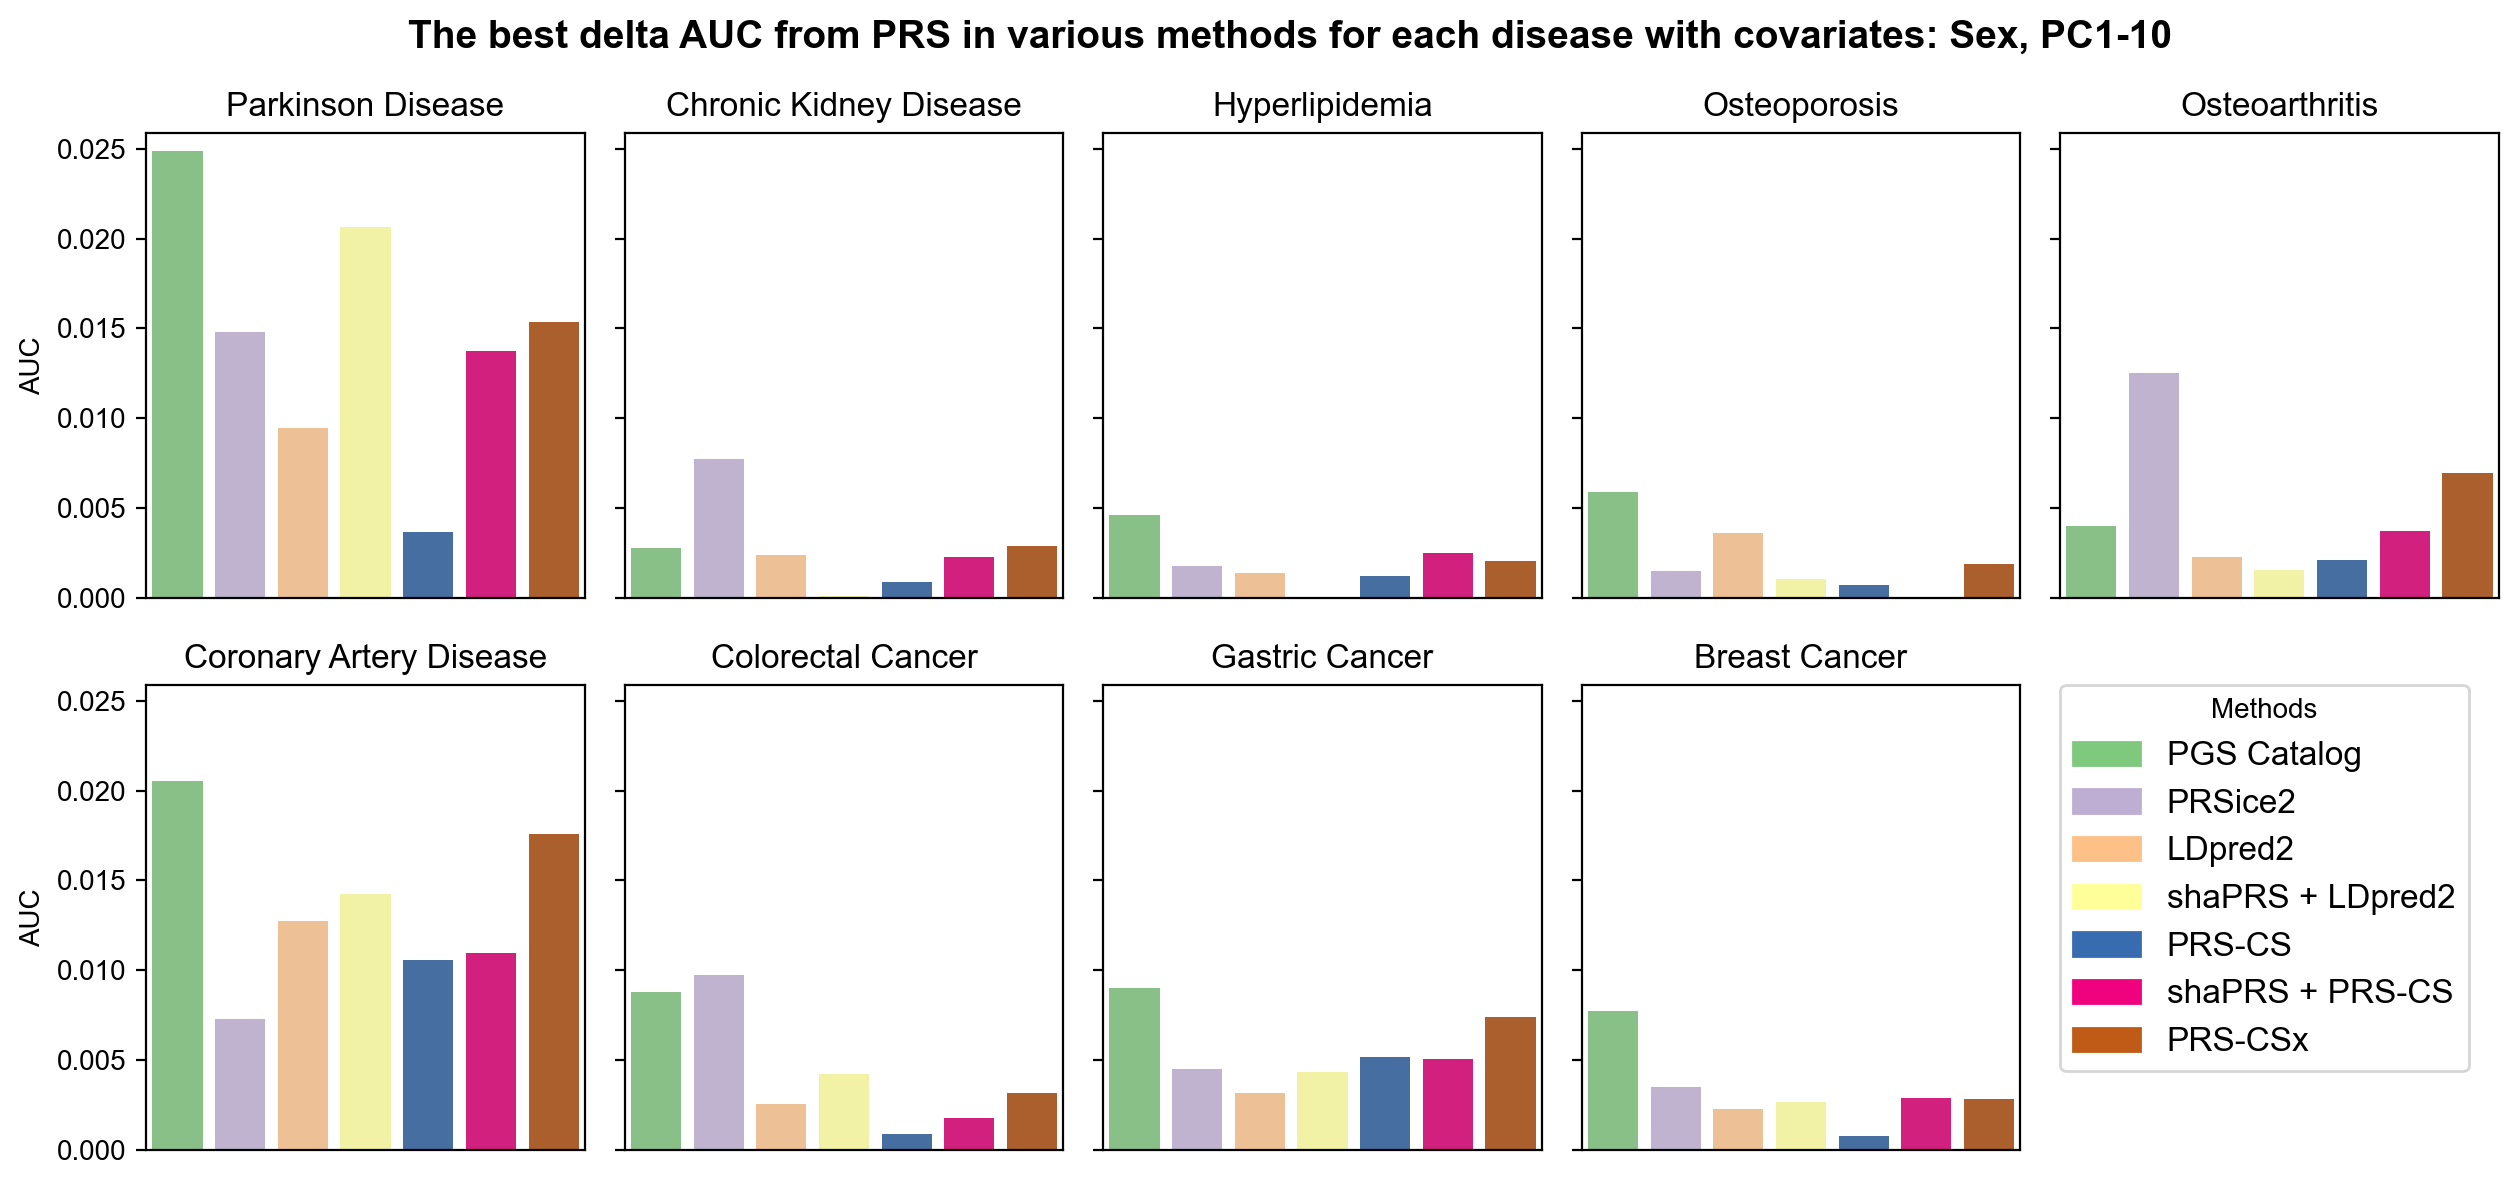

In [ ]:
df_delta_auc = pd.DataFrame([], columns=['disease', 'pgs', 'delta AUC', 'Methods'])
for d in ['breast_cancer', 'colorectal_cancer', 'gastric_cancer', 'pd', 'ckd',
            'osteoporosis', 'cad', 'hyperlipidemia', 'osteoarthritis']:
    df = pd.read_table(f'./results/{d}/PRS.delta.AUC.no.age.txt')
    df['Methods'] = df['pgs'].apply(mapping_func)
    df['disease'] = d
    df = df[['disease', 'pgs', 'delta_auc', 'Methods']]
    df.columns = ['disease', 'pgs', 'delta AUC', 'Methods']
    df_delta_auc = pd.concat([df_delta_auc, df], ignore_index=True, axis=0)

best_auc_per_method = df_delta_auc.loc[df_delta_auc.groupby(['disease', 'Methods'])['delta AUC'].idxmax()].reset_index(drop=True)
import matplotlib.pyplot as plt

# Get unique diseases and methods
diseases = ['pd', 'ckd', 'hyperlipidemia', 'osteoporosis', 'osteoarthritis',
                     'cad', 'colorectal_cancer', 'gastric_cancer', 'breast_cancer'] 
methods = ['PGS Catalog', 'PRSice2', 'LDpred2', 'shaPRS + LDpred2', 'PRS-CS', 'shaPRS + PRS-CS', 'PRS-CSx']
custom_disease = ['Parkinson Disease', 'Chronic Kidney Disease',  'Hyperlipidemia', 'Osteoporosis',  'Osteoarthritis', 
                'Coronary Artery Disease', 'Colorectal Cancer', 'Gastric Cancer', 'Breast Cancer',]

# Set up the figure with subplots
# set font family 
plt.rcParams['font.family'] = 'Arial'
fig, axes = plt.subplots(2, 5, figsize=(13, 6), sharey=True, dpi=200)
plt.suptitle('The best delta AUC from PRS in various methods for each disease with covariates: Sex, PC1-10', fontsize=14, fontweight='bold')
axes = axes.flatten()

# Plot each disease
for i, disease in enumerate(diseases):
    ax = axes[i]
    sns.barplot(data=best_auc_per_method[best_auc_per_method['disease'] == disease],
                x='Methods', y='delta AUC', ax=ax, palette='Accent',
                order=methods, hue_order=methods)
    ax.set_title(custom_disease[i], fontsize=12)
    ax.set_ylim(0., best_auc_per_method['delta AUC'].max() + 0.001)
    ax.set_xlabel('')
    ax.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
    if i % 5 == 0:
        ax.set_ylabel('AUC')
    else:
        ax.set_ylabel('')

# Turn off the last subplot and add legend
axes[-1].axis('off')
legend_handles = [Patch(color=sns.color_palette("Accent")[i], label=method) for i, method in enumerate(methods)]
plt.legend(handles=legend_handles, loc='upper left', borderaxespad=0., fontsize=12, title='Methods')

plt.tight_layout()
plt.show()

In [50]:
best_auc_per_method['delta AUC'] = best_auc_per_method['delta AUC'].apply(lambda x: round(x, 4))
# Create a pivoted DataFrame with methods as rows and diseases as columns
temp_df = best_auc_per_method.pivot(index='Methods', columns='disease', values='delta AUC')

# Ensure methods are in the desired order
method_order = ['PGS Catalog', 'PRSice2', 'LDpred2', 'shaPRS + LDpred2', 'PRS-CS', 'shaPRS + PRS-CS', 'PRS-CSx']
temp_df = temp_df.reindex(method_order)

# Display the resulting table
temp_df.T

Methods            PGS Catalog  PRSice2  LDpred2  shaPRS + LDpred2  PRS-CS  \
disease                                                                      
breast_cancer           0.0077   0.0035   0.0023            0.0027  0.0008   
cad                     0.0206   0.0073   0.0127            0.0142  0.0106   
ckd                     0.0028   0.0078   0.0024            0.0001  0.0009   
colorectal_cancer       0.0088   0.0097   0.0026            0.0042  0.0009   
gastric_cancer          0.0090   0.0045   0.0032            0.0044  0.0052   
hyperlipidemia          0.0046   0.0018   0.0014           -0.0000  0.0012   
osteoarthritis          0.0040   0.0125   0.0023            0.0016  0.0021   
osteoporosis            0.0059   0.0015   0.0036            0.0011  0.0007   
pd                      0.0249   0.0148   0.0094            0.0207  0.0037   

Methods            shaPRS + PRS-CS  PRS-CSx  
disease                                      
breast_cancer               0.0029   0.0028  
cad                         0.0110   0.0176  
ckd                         0.0023   0.0029  
colorectal_cancer           0.0018   0.0032  
gastric_cancer              0.0051   0.0074  
hyperlipidemia              0.0025   0.0021  
osteoarthritis              0.0037   0.0069  
osteoporosis               -0.0000   0.0019  
pd                          0.0137   0.0154

In [11]:
prs_file = 'PRS.acc.no.age.txt'
prs_df = pd.read_table(f'./results/breast_cancer/{prs_file}')
mapping_func = lambda x: 'PGS Catalog' if 'PGS' in x else \
                                          'PRS-CSx' if 'prscsx' in x else \
                                          'shaPRS + PRS-CS' if 'prscs' in x and 'shaPRS' in x else\
                                          'PRS-CS' if 'prscs' in x else\
                                          'shaPRS + LDpred2' if 'score' in x and 'shaPRS' in x else\
                                          'LDpred2' if 'score' in x else\
                                          'PRSice2' if 'PRSice' in x else \
                                          'SBayesRC' if 'SBayesRC' in x else 'null'
prs_df['prs_model'] = prs_df['pgs'].apply(mapping_func)
prs_df['disease'] = 'breast_cancer'
for d in ['colorectal_cancer', 'gastric_cancer', 'pd', 'ckd',
            'osteoporosis', 'cad', 'hyperlipidemia', 'osteoarthritis']:
    df = pd.read_table(f'./results/{d}/{prs_file}')
    df['prs_model'] = df['pgs'].apply(mapping_func)
    df['disease'] = d
    prs_df = pd.concat([prs_df, df])
    
prs_df[prs_df.groupby('disease')['R2'].transform(max) == prs_df['R2']]

pgs        R2        se   lowerCI   upperCI          pval  \
0             PGS000029  0.059826  0.018515  0.023351  0.096301  1.232780e-03   
0           PRSice2.0.9  0.041151  0.011650  0.018201  0.064102  4.120204e-04   
0             PGS002299  0.049486  0.012958  0.023958  0.075014  1.340856e-04   
0  score.grid.10.shaPRS  0.044006  0.012290  0.019794  0.068217  3.428964e-04   
0           PRSice2.0.9  0.018172  0.008111  0.002193  0.034151  2.506973e-02   
0             PGS001273  0.033719  0.010869  0.012307  0.055130  1.920221e-03   
0             PGS004745  0.082720  0.016168  0.050869  0.114571  3.116362e-07   
0             PGS004784  0.026175  0.009656  0.007154  0.045197  6.709961e-03   
0           PRSice2.0.1  0.025776  0.009586  0.006893  0.044660  7.165385e-03   

      power  coef_regression  se_regression  pval_regression  \
0  0.999990         0.060363       0.013146         0.000005   
0  1.000000         0.033323       0.007796         0.000021   
0  1.000000         0.022100       0.006072         0.000286   
0  1.000000         0.022148       0.006553         0.000752   
0  0.993152        -0.013384       0.006233         0.032007   
0  0.999981         0.018522       0.005967         0.001960   
0  1.000000         0.028606       0.006092         0.000003   
0  0.999628         0.016026       0.006040         0.008087   
0  0.999567        -0.015973       0.005905         0.006944   

          prs_model            disease  
0       PGS Catalog      breast_cancer  
0           PRSice2  colorectal_cancer  
0       PGS Catalog     gastric_cancer  
0  shaPRS + LDpred2                 pd  
0           PRSice2                ckd  
0       PGS Catalog       osteoporosis  
0       PGS Catalog                cad  
0       PGS Catalog     hyperlipidemia  
0           PRSice2     osteoarthritis

In [10]:
df_breast_cancer = pd.read_table('./results/breast_cancer/PRS.score.breast_cancer.samples.age.txt')[['IID', 'PGS000029']]
df_breast_cancer.columns = ['IID', 'breast_cancer']

df_colorectal_cancer = pd.read_table('./results/colorectal_cancer/PRS.score.colorectal_cancer.samples.age.txt')[['IID', 'PRSice2.0.9']]
df_colorectal_cancer.columns = ['IID', 'colorectal_cancer']

df_gastric_cancer = pd.read_table('./results/gastric_cancer/PRS.score.gastric_cancer.samples.age.txt')[['IID', 'PGS002299']]
df_gastric_cancer.columns = ['IID', 'gastric_cancer']

df_pd = pd.read_table('./results/pd/PRS.score.pd.samples.age.txt')[['IID', 'score.grid.10.shaPRS']]
df_pd.columns = ['IID', 'pd']

df_ckd = pd.read_table('./results/ckd/PRS.score.ckd.samples.age.txt')[['IID', 'PRSice2.0.9']]
df_ckd.columns = ['IID', 'ckd']

df_osteoporosis = pd.read_table('./results/osteoporosis/PRS.score.osteoporosis.samples.age.txt')[['IID', 'PGS001273']]
df_osteoporosis.columns = ['IID', 'osteoporosis']

df_cad = pd.read_table('./results/cad/PRS.score.cad.samples.age.txt')[['IID', 'PGS004745']]
df_cad.columns = ['IID', 'cad']

df_hyperlipidemia = pd.read_table('./results/hyperlipidemia/PRS.score.hyperlipidemia.samples.age.txt')[['IID', 'PGS004784']]
df_hyperlipidemia.columns = ['IID', 'hyperlipidemia']

df_osteoarthritis = pd.read_table('./results/osteoarthritis/PRS.score.osteoarthritis.samples.age.txt')[['IID', 'PRSice2.0.1']]
df_osteoarthritis.columns = ['IID', 'osteoarthritis']

# Merge all dataframes outer, join on IID
dfs = [df_breast_cancer, df_colorectal_cancer, df_gastric_cancer, df_pd, df_ckd, 
        df_osteoporosis, df_cad, df_hyperlipidemia, df_osteoarthritis]

df = dfs[0]
for df_temp in dfs[1:]:
    df = df.merge(df_temp, on='IID', how='outer')
covar_list = pd.read_table('./target_data/covar_list.tsv')[['IID', 'Sex', 'Age', 'PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10']]
df = pd.merge(df, covar_list, on='IID')
df.to_csv('prs_best_full.noAge.csv', index=False)
df

IID  breast_cancer  colorectal_cancer  gastric_cancer  \
0      001782851700            NaN                NaN             NaN   
1      008006417400            NaN                NaN        0.872786   
2      010073013500            NaN                NaN             NaN   
3      013553762400            NaN                NaN             NaN   
4      014472918300            NaN                NaN             NaN   
...             ...            ...                ...             ...   
1553  VN_04_01_0288            NaN          27.865058        0.446443   
1554  VN_04_01_0289            NaN          15.832128        0.235722   
1555  VN_04_01_0291            NaN          -6.856635        0.471445   
1556  VN_04_01_0292            NaN           5.922936        0.827684   
1557  VN_04_01_0295            NaN         -15.925633        0.000000   

            pd        ckd  osteoporosis       cad  hyperlipidemia  \
0          NaN  -1.782917           NaN       NaN             NaN   
1          NaN        NaN           NaN       NaN             NaN   
2          NaN        NaN           NaN  1.146180             NaN   
3     0.044826        NaN           NaN       NaN             NaN   
4     0.254317        NaN           NaN       NaN             NaN   
...        ...        ...           ...       ...             ...   
1553 -0.469697  -9.373562      0.134425  1.169760        0.354358   
1554 -0.155614  -0.862411      0.168217  0.641602        0.550549   
1555  0.192454  -4.355475      0.045172  1.093760       -0.038326   
1556  0.024031 -13.866334      0.062098  1.080960        0.386121   
1557  0.275585  -7.375474      0.206669  1.068740        0.205606   

      osteoarthritis  ...       PC1       PC2       PC3       PC4       PC5  \
0                NaN  ...  0.013685 -0.007565 -0.012978  0.018074  0.004409   
1                NaN  ... -0.033135  0.030661  0.055102 -0.010962 -0.012330   
2                NaN  ... -0.048811 -0.002826 -0.040457 -0.011474 -0.033693   
3                NaN  ...  0.011482  0.005948  0.000377 -0.055430 -0.010423   
4                NaN  ...  0.002751  0.002325 -0.001053  0.012057  0.010681   
...              ...  ...       ...       ...       ...       ...       ...   
1553     -544.674854  ...  0.001491 -0.009565  0.004594  0.010573  0.017088   
1554     -488.865849  ... -0.004134  0.007334  0.000409 -0.005148 -0.021328   
1555     -608.729169  ...  0.010123 -0.001781  0.002779 -0.010233  0.028043   
1556     -507.140540  ...  0.011331 -0.014261 -0.019137  0.026377  0.036289   
1557     -590.721337  ... -0.039786 -0.010084 -0.015374  0.004478 -0.012315   

           PC6       PC7       PC8       PC9      PC10  
0     0.012798  0.006198 -0.021945  0.035522 -0.001423  
1     0.017125  0.019660  0.012129  0.009386 -0.000002  
2    -0.002505 -0.004715 -0.003068  0.011132  0.035889  
3     0.001917  0.030632  0.017270 -0.032027  0.009022  
4    -0.018968 -0.008112  0.006599  0.000845  0.002987  
...        ...       ...       ...       ...       ...  
1553  0.013281 -0.006175 -0.000587 -0.033680  0.007491  
1554 -0.004240  0.011148 -0.011859 -0.005612  0.016164  
1555 -0.008237 -0.007476 -0.009624  0.013374 -0.018214  
1556  0.001046 -0.012186  0.006634  0.001040  0.001842  
1557 -0.003505 -0.010670 -0.037912  0.008127  0.023096  

[1558 rows x 22 columns]

In [27]:
df_breast_cancer = pd.read_table('./results/breast_cancer/PRS.score.breast_cancer.samples.age.txt')[['IID', 'prscsx.EAS.phi1e-06']]
df_breast_cancer.columns = ['IID', 'breast_cancer']

df_colorectal_cancer = pd.read_table('./results/colorectal_cancer/PRS.score.colorectal_cancer.samples.age.txt')[['IID', 'PGS004243']]
df_colorectal_cancer.columns = ['IID', 'colorectal_cancer']

df_gastric_cancer = pd.read_table('./results/gastric_cancer/PRS.score.gastric_cancer.samples.age.txt')[['IID', 'PGS002299']]
df_gastric_cancer.columns = ['IID', 'gastric_cancer']

df_pd = pd.read_table('./results/pd/PRS.score.pd.samples.age.txt')[['IID', 'score.grid.10.shaPRS']]
df_pd.columns = ['IID', 'pd']

df_ckd = pd.read_table('./results/ckd/PRS.score.ckd.samples.age.txt')[['IID', 'PRSice2.0.9']]
df_ckd.columns = ['IID', 'ckd']

df_osteoporosis = pd.read_table('./results/osteoporosis/PRS.score.osteoporosis.samples.age.txt')[['IID', 'prscsx.META.phi1e-04']]
df_osteoporosis.columns = ['IID', 'osteoporosis']

df_cad = pd.read_table('./results/cad/PRS.score.cad.samples.age.txt')[['IID', 'PGS003725']]
df_cad.columns = ['IID', 'cad']

df_hyperlipidemia = pd.read_table('./results/hyperlipidemia/PRS.score.hyperlipidemia.samples.age.txt')[['IID', 'PGS002504']]
df_hyperlipidemia.columns = ['IID', 'hyperlipidemia']

df_osteoarthritis = pd.read_table('./results/osteoarthritis/PRS.score.osteoarthritis.samples.age.txt')[['IID', 'PRSice2.0.1']]
df_osteoarthritis.columns = ['IID', 'osteoarthritis']

# Merge all dataframes outer, join on IID
dfs = [df_breast_cancer, df_colorectal_cancer, df_gastric_cancer, df_pd, df_ckd, 
        df_osteoporosis, df_cad, df_hyperlipidemia, df_osteoarthritis]

df = dfs[0]
for df_temp in dfs[1:]:
    df = df.merge(df_temp, on='IID', how='outer')
covar_list = pd.read_table('./target_data/covar_list.tsv')[['IID', 'Sex', 'Age', 'PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10']]
df = pd.merge(df, covar_list, on='IID')
df.to_csv('prs_best_full.csv', index=False)
df

IID  breast_cancer  colorectal_cancer  gastric_cancer  \
0      001782851700            NaN                NaN             NaN   
1      008006417400            NaN                NaN        0.872786   
2      010073013500            NaN                NaN             NaN   
3      013553762400            NaN                NaN             NaN   
4      014472918300            NaN                NaN             NaN   
...             ...            ...                ...             ...   
1553  VN_04_01_0288            NaN            3.24401        0.446443   
1554  VN_04_01_0289            NaN            3.72309        0.235722   
1555  VN_04_01_0291            NaN            3.68182        0.471445   
1556  VN_04_01_0292            NaN            3.79967        0.827684   
1557  VN_04_01_0295            NaN            2.91578        0.000000   

            pd        ckd  osteoporosis      cad  hyperlipidemia  \
0          NaN  -1.782917           NaN      NaN             NaN   
1          NaN        NaN           NaN      NaN             NaN   
2          NaN        NaN           NaN -3.14070             NaN   
3     0.044826        NaN           NaN      NaN             NaN   
4     0.254317        NaN           NaN      NaN             NaN   
...        ...        ...           ...      ...             ...   
1553 -0.469697  -9.373562      0.017245 -3.72417        -154.496   
1554 -0.155614  -0.862411      0.059525 -4.71607        -169.272   
1555  0.192454  -4.355475      0.158393 -3.43392        -175.128   
1556  0.024031 -13.866334      0.061053 -3.96687        -169.861   
1557  0.275585  -7.375474      0.087442 -4.18448        -166.613   

      osteoarthritis  ...       PC1       PC2       PC3       PC4       PC5  \
0                NaN  ...  0.013685 -0.007565 -0.012978  0.018074  0.004409   
1                NaN  ... -0.033135  0.030661  0.055102 -0.010962 -0.012330   
2                NaN  ... -0.048811 -0.002826 -0.040457 -0.011474 -0.033693   
3                NaN  ...  0.011482  0.005948  0.000377 -0.055430 -0.010423   
4                NaN  ...  0.002751  0.002325 -0.001053  0.012057  0.010681   
...              ...  ...       ...       ...       ...       ...       ...   
1553     -544.674854  ...  0.001491 -0.009565  0.004594  0.010573  0.017088   
1554     -488.865849  ... -0.004134  0.007334  0.000409 -0.005148 -0.021328   
1555     -608.729169  ...  0.010123 -0.001781  0.002779 -0.010233  0.028043   
1556     -507.140540  ...  0.011331 -0.014261 -0.019137  0.026377  0.036289   
1557     -590.721337  ... -0.039786 -0.010084 -0.015374  0.004478 -0.012315   

           PC6       PC7       PC8       PC9      PC10  
0     0.012798  0.006198 -0.021945  0.035522 -0.001423  
1     0.017125  0.019660  0.012129  0.009386 -0.000002  
2    -0.002505 -0.004715 -0.003068  0.011132  0.035889  
3     0.001917  0.030632  0.017270 -0.032027  0.009022  
4    -0.018968 -0.008112  0.006599  0.000845  0.002987  
...        ...       ...       ...       ...       ...  
1553  0.013281 -0.006175 -0.000587 -0.033680  0.007491  
1554 -0.004240  0.011148 -0.011859 -0.005612  0.016164  
1555 -0.008237 -0.007476 -0.009624  0.013374 -0.018214  
1556  0.001046 -0.012186  0.006634  0.001040  0.001842  
1557 -0.003505 -0.010670 -0.037912  0.008127  0.023096  

[1558 rows x 22 columns]

In [4]:
df_breast_cancer = pd.read_table('./results/breast_cancer/PRS.score.breast_cancer.samples.age.txt')[['IID', 'PGS000029']]
df_breast_cancer.columns = ['IID', 'breast_cancer']

df_colorectal_cancer = pd.read_table('./results/colorectal_cancer/PRS.score.colorectal_cancer.samples.age.txt')[['IID', 'PRSice2.0.9']]
df_colorectal_cancer.columns = ['IID', 'colorectal_cancer']

df_gastric_cancer = pd.read_table('./results/gastric_cancer/PRS.score.gastric_cancer.samples.age.txt')[['IID', 'PGS002299']]
df_gastric_cancer.columns = ['IID', 'gastric_cancer']

df_pd = pd.read_table('./results/pd/PRS.score.pd.samples.age.txt')[['IID', 'score.grid.10.shaPRS']]
df_pd.columns = ['IID', 'pd']

df_ckd = pd.read_table('./results/ckd/PRS.score.ckd.samples.age.txt')[['IID', 'PRSice2.0.9']]
df_ckd.columns = ['IID', 'ckd']

df_osteoporosis = pd.read_table('./results/osteoporosis/PRS.score.osteoporosis.samples.age.txt')[['IID', 'PGS001273']]
df_osteoporosis.columns = ['IID', 'osteoporosis']

df_cad = pd.read_table('./results/cad/PRS.score.cad.samples.age.txt')[['IID', 'PGS004745']]
df_cad.columns = ['IID', 'cad']

df_hyperlipidemia = pd.read_table('./results/hyperlipidemia/PRS.score.hyperlipidemia.samples.age.txt')[['IID', 'PGS004784']]
df_hyperlipidemia.columns = ['IID', 'hyperlipidemia']

df_osteoarthritis = pd.read_table('./results/osteoarthritis/PRS.score.osteoarthritis.samples.age.txt')[['IID', 'PRSice2.0.1']]
df_osteoarthritis.columns = ['IID', 'osteoarthritis']

# Merge all dataframes outer, join on IID
dfs = [df_breast_cancer, df_colorectal_cancer, df_gastric_cancer, df_pd, df_ckd, 
        df_osteoporosis, df_cad, df_hyperlipidemia, df_osteoarthritis]

df_prs_full = dfs[0]
for df in dfs[1:]:
    df_prs_full = pd.merge(df_prs_full, df, on='IID', how='outer')

covar_list = pd.read_table('./target_data/covar_list.tsv').iloc[:, :15]

df_prs_full = pd.merge(df_prs_full, covar_list, on='IID')
# df_prs_full.to_csv('prs_best_full.csv', index=False)
df_prs_full

IID  breast_cancer  colorectal_cancer  gastric_cancer  \
0      001782851700            NaN                NaN             NaN   
1      008006417400            NaN                NaN        0.872786   
2      010073013500            NaN                NaN             NaN   
3      013553762400            NaN                NaN             NaN   
4      014472918300            NaN                NaN             NaN   
...             ...            ...                ...             ...   
1553  VN_04_01_0288            NaN          27.865058        0.446443   
1554  VN_04_01_0289            NaN          15.832128        0.235722   
1555  VN_04_01_0291            NaN          -6.856635        0.471445   
1556  VN_04_01_0292            NaN           5.922936        0.827684   
1557  VN_04_01_0295            NaN         -15.925633        0.000000   

            pd        ckd  osteoporosis       cad  hyperlipidemia  \
0          NaN  -1.782917           NaN       NaN             NaN   
1          NaN        NaN           NaN       NaN             NaN   
2          NaN        NaN           NaN  1.146180             NaN   
3     0.044826        NaN           NaN       NaN             NaN   
4     0.254317        NaN           NaN       NaN             NaN   
...        ...        ...           ...       ...             ...   
1553 -0.469697  -9.373562      0.134425  1.169760        0.354358   
1554 -0.155614  -0.862411      0.168217  0.641602        0.550549   
1555  0.192454  -4.355475      0.045172  1.093760       -0.038326   
1556  0.024031 -13.866334      0.062098  1.080960        0.386121   
1557  0.275585  -7.375474      0.206669  1.068740        0.205606   

      osteoarthritis  ... Alzheimer  CAD  CKD  Osteoporosis  Parkinson  \
0                NaN  ...        -9   -9    1            -9         -9   
1                NaN  ...        -9   -9   -9            -9         -9   
2                NaN  ...        -9    1   -9            -9         -9   
3                NaN  ...        -9   -9   -9            -9          1   
4                NaN  ...        -9   -9   -9            -9          1   
...              ...  ...       ...  ...  ...           ...        ...   
1553     -544.674854  ...         0    0    0             0          0   
1554     -488.865849  ...         0    0    0             0          0   
1555     -608.729169  ...         0    0    0             0          0   
1556     -507.140540  ...         0    0    0             0          0   
1557     -590.721337  ...         0    0    0             0          0   

      Dyslipidemia  Osteoarthritis  Gastric_cancer  Colorectal_cancer  \
0               -9              -9              -9                 -9   
1               -9              -9               1                 -9   
2               -9              -9              -9                 -9   
3               -9              -9              -9                 -9   
4               -9              -9              -9                 -9   
...            ...             ...             ...                ...   
1553             0               0               0                  0   
1554             0               0               0                  0   
1555             0               0               0                  0   
1556             0               0               0                  0   
1557             0               0               0                  0   

      Breast_cancer  
0                -9  
1                -9  
2                -9  
3                -9  
4                -9  
...             ...  
1553              0  
1554              0  
1555              0  
1556              0  
1557              0  

[1558 rows x 24 columns]

In [29]:
# list diseases:
diseases = ["breast_cancer", "colorectal_cancer", "gastric_cancer", "pd", "ckd", "osteoporosis", "cad", "hyperlipidemia", "osteoarthritis"]
df_pheno = pd.DataFrame([], columns=['FID', 'IID'])
for d in diseases:
    df_sample = pd.read_table(f"./results/{d}/samples.txt", names=['FID', 'IID', f'{d}'])
    if df_pheno.empty:
        df_pheno = df_sample
    else:
        df_pheno = pd.merge(df_pheno, df_sample, on=['FID', 'IID'], how='outer')

# Replace NaN values with -9
df_pheno.fillna(-9, inplace=True)

df_pheno.to_csv('pheno_full.csv', index=False)
df_pheno

FID            IID  breast_cancer  colorectal_cancer  \
0      001782851700   001782851700           -9.0               -9.0   
1      008006417400   008006417400           -9.0               -9.0   
2      010073013500   010073013500           -9.0               -9.0   
3      013553762400   013553762400           -9.0               -9.0   
4      014472918300   014472918300           -9.0               -9.0   
...             ...            ...            ...                ...   
1553  VN_04_01_0288  VN_04_01_0288           -9.0                0.0   
1554  VN_04_01_0289  VN_04_01_0289           -9.0                0.0   
1555  VN_04_01_0291  VN_04_01_0291           -9.0                0.0   
1556  VN_04_01_0292  VN_04_01_0292           -9.0                0.0   
1557  VN_04_01_0295  VN_04_01_0295           -9.0                0.0   

      gastric_cancer   pd  ckd  osteoporosis  cad  hyperlipidemia  \
0               -9.0 -9.0  1.0          -9.0 -9.0            -9.0   
1                1.0 -9.0 -9.0          -9.0 -9.0            -9.0   
2               -9.0 -9.0 -9.0          -9.0  1.0            -9.0   
3               -9.0  1.0 -9.0          -9.0 -9.0            -9.0   
4               -9.0  1.0 -9.0          -9.0 -9.0            -9.0   
...              ...  ...  ...           ...  ...             ...   
1553             0.0  0.0  0.0           0.0  0.0             0.0   
1554             0.0  0.0  0.0           0.0  0.0             0.0   
1555             0.0  0.0  0.0           0.0  0.0             0.0   
1556             0.0  0.0  0.0           0.0  0.0             0.0   
1557             0.0  0.0  0.0           0.0  0.0             0.0   

      osteoarthritis  
0               -9.0  
1               -9.0  
2               -9.0  
3               -9.0  
4               -9.0  
...              ...  
1553             0.0  
1554             0.0  
1555             0.0  
1556             0.0  
1557             0.0  

[1558 rows x 11 columns]

In [43]:
# save prs score for all disease
def predict_R2_between_disease(df_prs_full: pd.DataFrame):
    for d in ['breast_cancer', 'colorectal_cancer', 'gastric_cancer', 'pd', 'ckd',
              'osteoporosis', 'cad', 'hyperlipidemia', 'osteoarthritis']:
        samples = pd.read_table(f'./results/{d}/samples.txt', header=None)
        samples.columns = ['FID', 'IID', 'PHENO']
        prs_df = pd.merge(df_prs_full, samples[['IID', 'PHENO']])
        prs_df.to_csv(f'./results/{d}/PRS.score.{d}.all.disease.txt', sep='\t', index=False)

predict_R2_between_disease(df_prs_full)

In [74]:
df_auc['Params'] = df_auc['Params'].apply(lambda x: x.replace('1e.00', '1e+00') if 'phi1e.00' in x else
                                            x.replace('1e.02', '1e-02') if 'phi1e.02' in x else
                                            x.replace('1e.04', '1e-04') if 'phi1e.04' in x else
                                            x.replace('1e.06', '1e-06') if 'phi1e.06' in x else x)

# Plot risk stratification for all diseases:

In [5]:
# 
percentile = ['0-20', '20-40', '40-60', '60-80', '80-100']
df_odds_full = pd.DataFrame(percentile, columns=['percentile'])
for d in diseases:
    df_temp = pd.read_table(f'./results/{d}/samples.txt', header=None)[[0, 2]]
    df_temp.columns = ['IID', 'PHENO']
    df_temp = pd.merge(df_temp, df_prs_full[['IID', f'{d}']], on='IID')
    df_temp['percentile'] = pd.qcut(df_temp[f'{d}'], q=len(percentile), labels=percentile)

    df_temp = df_temp.groupby('percentile')['PHENO'].value_counts().unstack().reset_index()
    df_temp[f'{d}'] = df_temp[1] / df_temp[0]
    df_temp[f'{d}'] = df_temp[f'{d}'] / df_temp[f'{d}'].iloc[0]
    df_odds_full = pd.merge(df_odds_full, df_temp[['percentile', f'{d}']])

df_odds_full

percentile  breast_cancer  colorectal_cancer  gastric_cancer        pd  \
0       0-20       1.000000           1.000000        1.000000  1.000000   
1      20-40       1.895178           2.935266        1.379310  1.211707   
2      40-60       2.173077           5.260606        2.143541  1.835468   
3      60-80       3.739953           5.535714        3.959596  2.059701   
4     80-100       3.739953           7.309474        6.114943  4.312500   

        ckd  osteoporosis       cad  hyperlipidemia  osteoarthritis  
0  1.000000      1.000000  1.000000        1.000000        1.000000  
1  0.909091      2.029126  1.346216        2.860000        0.738693  
2  1.491651      4.574074  3.812604        1.514563        0.480392  
3  0.814131      3.812604  4.201005        3.695431        0.482759  
4  0.351399      6.463918  7.256944        3.959391        0.356796

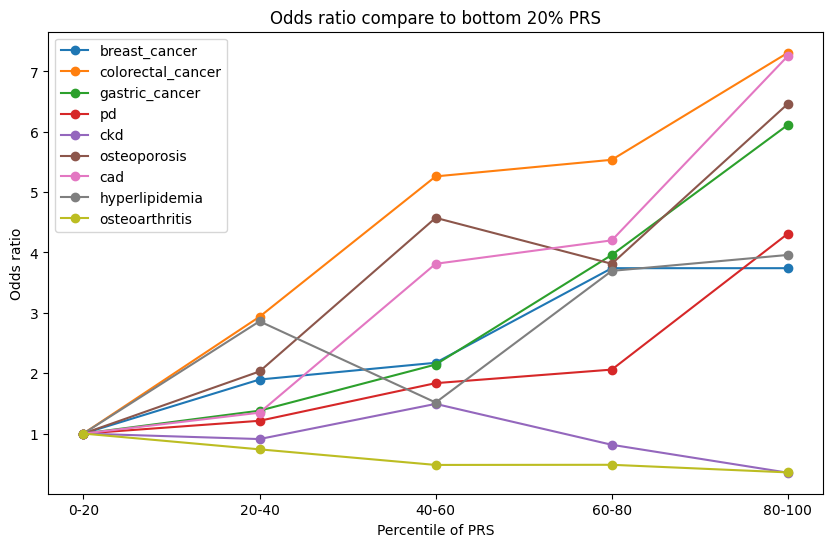

In [6]:
# plot df_odds_full with multiple line plot, color by diseases 
plt.figure(figsize=(10, 6))
colors = [x for x in sns.color_palette("tab10")]
for i, d in enumerate(diseases):
    plt.plot(df_odds_full['percentile'], df_odds_full[d], marker='o', c=colors[i])
plt.xlabel('Percentile of PRS')
plt.ylabel('Odds ratio')
plt.title('Odds ratio compare to bottom 20% PRS')
plt.legend(diseases)
plt.show()

In [7]:
df_odds_transposed = df_odds_full.set_index('percentile').T
df_odds_transposed

percentile         0-20     20-40     40-60     60-80    80-100
breast_cancer       1.0  1.895178  2.173077  3.739953  3.739953
colorectal_cancer   1.0  2.935266  5.260606  5.535714  7.309474
gastric_cancer      1.0  1.379310  2.143541  3.959596  6.114943
pd                  1.0  1.211707  1.835468  2.059701  4.312500
ckd                 1.0  0.909091  1.491651  0.814131  0.351399
osteoporosis        1.0  2.029126  4.574074  3.812604  6.463918
cad                 1.0  1.346216  3.812604  4.201005  7.256944
hyperlipidemia      1.0  2.860000  1.514563  3.695431  3.959391
osteoarthritis      1.0  0.738693  0.480392  0.482759  0.356796

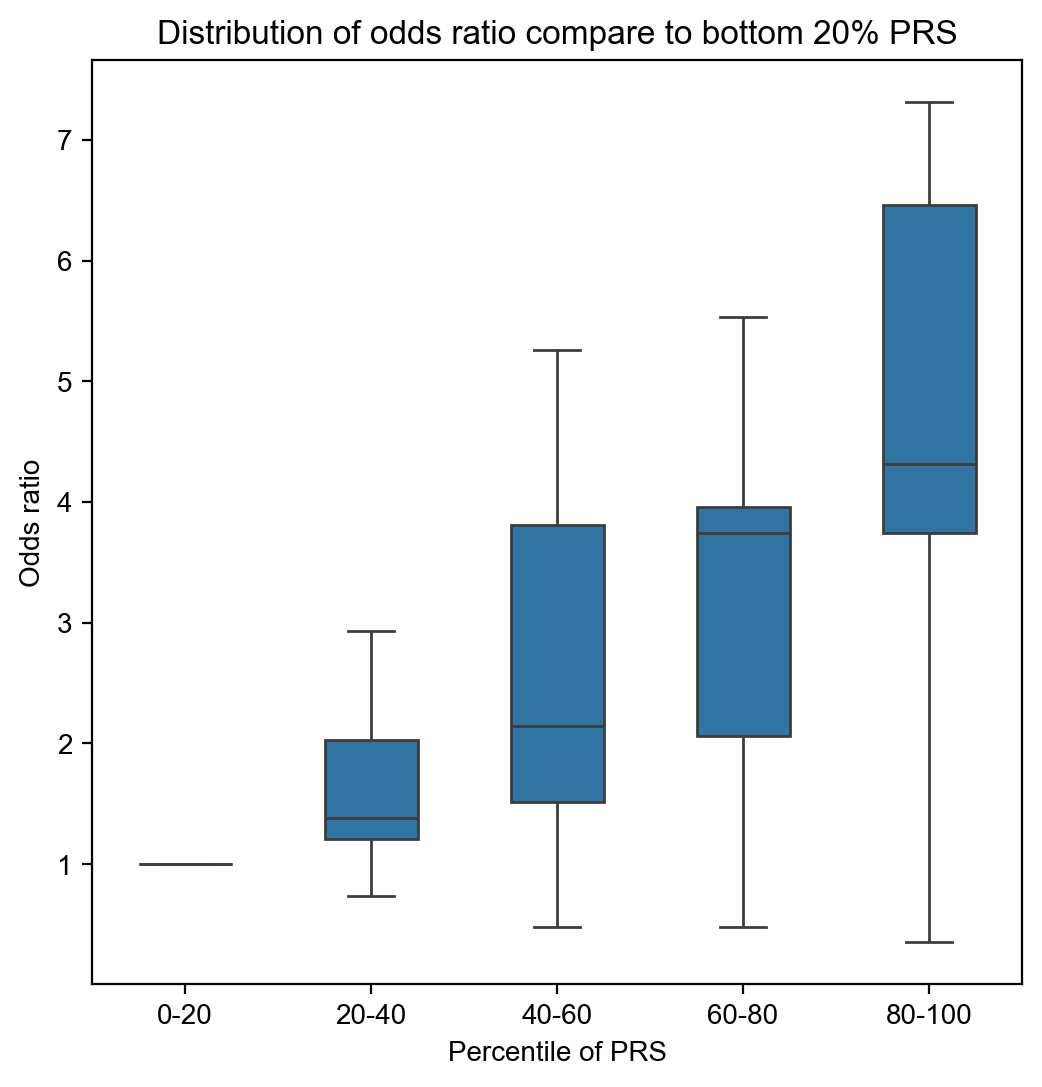

In [8]:
# plot boxplot of odds ratio following percentile of PRS using df_odds_transposed
plt.figure(figsize=(6, 6), dpi=200)
plt.rcParams['font.family'] = 'Arial'
sns.boxplot(data=df_odds_transposed, color='C0', width=0.5)
plt.xlabel('Percentile of PRS'); plt.ylabel('Odds ratio')
plt.title('Distribution of odds ratio compare to bottom 20% PRS')
plt.show()

In [9]:
df_odds_full_male = pd.DataFrame(['0-40', '40-70', '70-100'], columns=['percentile'])
df_odds_full_female = df_odds_full_male.copy()
covariates = pd.read_table('target_data/covar_list.tsv')[['IID', 'Sex']]
for d in diseases:
    if d == 'breast_cancer':
        continue
    df_temp = pd.read_table(f'./results/{d}/samples.txt', header=None)[[0, 2]]
    df_temp.columns = ['IID', 'PHENO']
    df_temp = pd.merge(df_temp, df_prs_full[['IID', f'{d}']], on='IID')
    df_temp = pd.merge(df_temp, covariates, on='IID')
    df_temp['percentile'] = pd.qcut(df_temp[f'{d}'], q=np.array([0, 0.4, 0.7, 1]), labels=['0-40', '40-70', '70-100'])

    df_male = df_temp[df_temp['Sex']==1]
    df_female = df_temp[df_temp['Sex']==0]

    df_male = df_male.groupby('percentile')['PHENO'].value_counts().unstack().reset_index()
    df_male[f'{d}'] = df_male[1] / df_male[0]
    df_male[f'{d}'] = df_male[f'{d}'] / df_male[f'{d}'].iloc[0]
    df_odds_full_male = pd.merge(df_odds_full_male, df_male[['percentile', f'{d}']])

    df_female = df_female.groupby('percentile')['PHENO'].value_counts().unstack().reset_index()
    df_female[f'{d}'] = df_female[1] / df_female[0]
    df_female[f'{d}'] = df_female[f'{d}'] / df_female[f'{d}'].iloc[0]
    df_odds_full_female = pd.merge(df_odds_full_female, df_female[['percentile', f'{d}']])

df_odds_full_male = df_odds_full_male.set_index('percentile').T
df_odds_full_male['gender'] = 'male'
df_odds_full_female = df_odds_full_female.set_index('percentile').T
df_odds_full_female['gender'] = 'female'
df_odds_full_gender = pd.concat([df_odds_full_male, df_odds_full_female], axis=0, ignore_index=True)
df_odds_full_gender = df_odds_full_gender.melt(id_vars=['gender'])
df_odds_full_gender

gender percentile     value
0     male       0-40  1.000000
1     male       0-40  1.000000
2     male       0-40  1.000000
3     male       0-40  1.000000
4     male       0-40  1.000000
5     male       0-40  1.000000
6     male       0-40  1.000000
7     male       0-40  1.000000
8   female       0-40  1.000000
9   female       0-40  1.000000
10  female       0-40  1.000000
11  female       0-40  1.000000
12  female       0-40  1.000000
13  female       0-40  1.000000
14  female       0-40  1.000000
15  female       0-40  1.000000
16    male      40-70  2.587192
17    male      40-70  2.273224
18    male      40-70  3.012048
19    male      40-70  1.065707
20    male      40-70  0.000000
21    male      40-70  6.131519
22    male      40-70  3.876812
23    male      40-70  0.789677
24  female      40-70  3.256000
25  female      40-70  2.607143
26  female      40-70  1.186251
27  female      40-70  2.350427
28  female      40-70  4.832251
29  female      40-70  1.359477
30  female      40-70  0.813986
31  female      40-70  0.439965
32    male     70-100  2.693333
33    male     70-100  5.045822
34    male     70-100  6.106870
35    male     70-100  0.258974
36    male     70-100  1.192053
37    male     70-100  7.323944
38    male     70-100  8.117241
39    male     70-100  0.886957
40  female     70-100  5.110791
41  female     70-100  4.415323
42  female     70-100  2.797222
43  female     70-100  0.860215
44  female     70-100  4.895833
45  female     70-100  3.813333
46  female     70-100  0.981781
47  female     70-100  0.393105

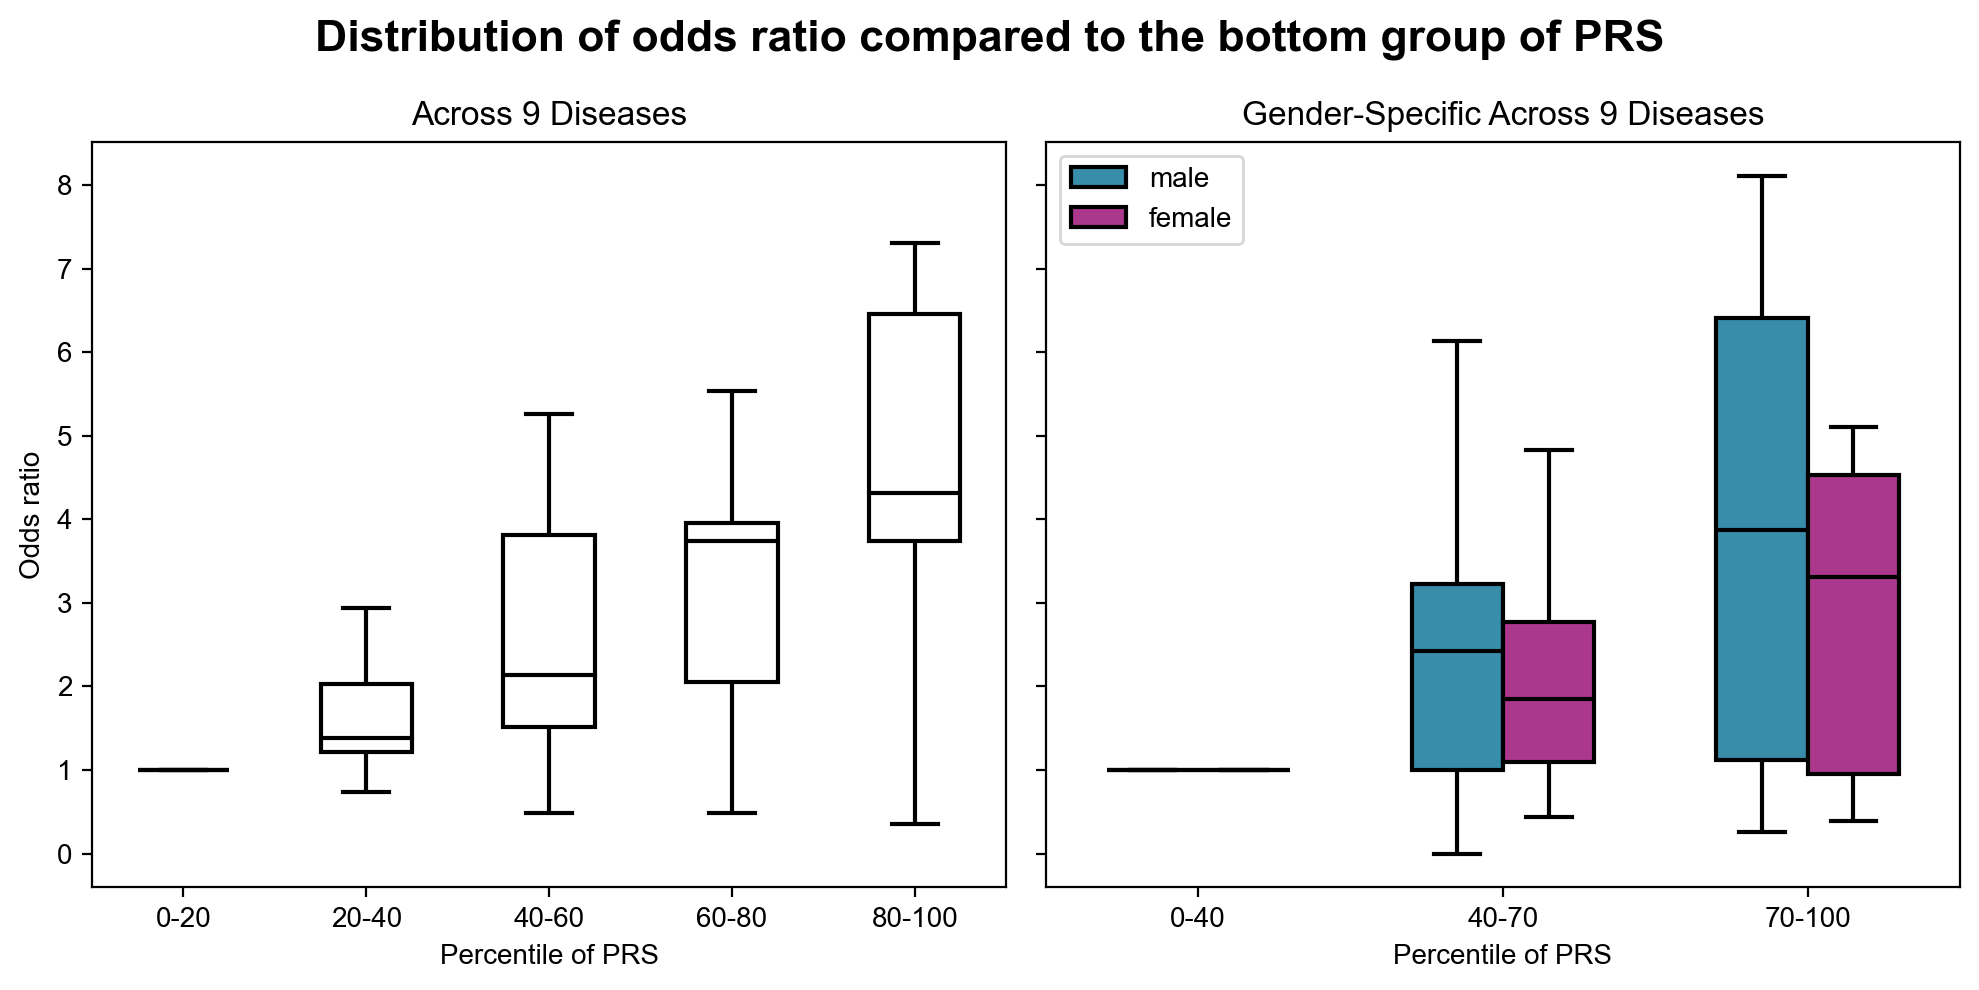

In [31]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5), dpi=200, sharey=True)
plt.rcParams['font.family'] = 'Arial'
plt.suptitle('Distribution of odds ratio compared to the bottom group of PRS', fontsize=16, fontweight='bold')

# Plot the second chart
sns.boxplot(data=df_odds_transposed, color='white', width=0.5, ax=axes[0], linewidth=1.5, linecolor='k')
axes[0].set_xlabel('Percentile of PRS')
axes[0].set_ylabel('Odds ratio')
axes[0].set_title('Across 9 Diseases')
# Plot the first chart
sns.boxplot(data=df_odds_full_gender, x='percentile', y='value', hue='gender', width=0.6, ax=axes[1], 
            palette=['#2596be', '#be2596'], linewidth=1.5, linecolor='k')
axes[1].set_xlabel('Percentile of PRS')
axes[1].set_ylabel('Odds ratio')
axes[1].set_title('Gender-Specific Across 9 Diseases')
axes[1].legend(loc='upper left')

plt.tight_layout()
plt.show()

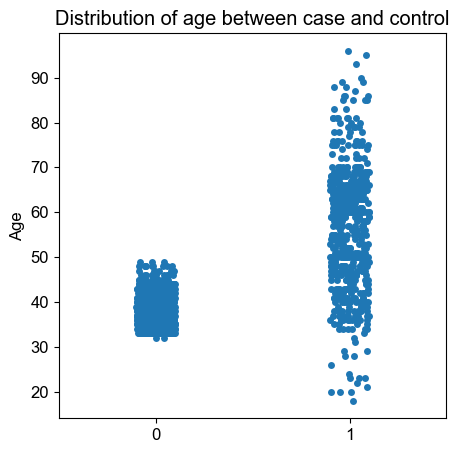

In [135]:
covariates = pd.read_table('target_data/covar_list.tsv')[['IID', 'Sex', 'Age'] + [f'PC{i}' for i in range(1, 11)]]
covariates['PHENO'] = covariates['IID'].apply(lambda x: 0 if x.startswith('VN') else 1)
# plot distribution of age between case and control
plt.figure(figsize=(5, 5))
sns.stripplot(data=covariates, x='PHENO', y='Age')
plt.xlabel(''); plt.ylabel('Age'); plt.title('Distribution of age between case and control')
plt.show()